卷积神经网络之池化层-Pooling
===

# 1.池化层的定义
我们知道卷积可以提取图片的特征，之所以使用卷积后的特征，是因为图像具有“静态型”的属性，也就意味着在一个图像区域的特征极有可能在另一个区域同样适用。所以，当我们描述一个大的图像的时候就可以对不同位置的特征进行聚合统计这种统计方式不仅可以降低纬度，还不容易过拟合。这种聚合统计的操作就称之为池化。

对于上述所说的聚合统计，一般来说就是计算平均值或者最大值，也就对应了两种池化方法即平均池化和最大池化

# 2.池化层的作用

## 2.1.保留特征的同时减少参数和计算量，防止过拟合
池化层在保证图片特征的情况下，将图片压缩变小，可以简化网络计算复杂度，提取主要特征。

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA08AAAGCCAYAAAA41/hZAAAABGdBTUEAALGP%0AC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3Cc%0AulE8AAAABmJLR0QA/wD/AP+gvaeTAAAAB3RJTUUH4wIEADUnrp1wZgAAgABJ%0AREFUeNrs/XeQHUmWnwt+7h5xZd7UWiCR0BoFFERJlEBJlOyu7p7hqB5ybMhH%0Ae0tySa7Z2pqt7XJtzXbf2vLto3HImTcznOEI9kz3dFdPaQWgIAta64QGMhOJ%0A1PLKiHDfPyLuzQSQKNFd1VWFjq/sViJv3hvC3SPCj59zfke42YIhJCTkG4IB%0A8XUfQ0h4U/z68fDIOlliJ7p44//6f+Ohulrq/k//GnvpUoyRCAlCGgSG0Ws9%0A9P/nP6Vi605UeQIWzsH+Z7+HtWYl2pIkEQiM368ivMBCQkJCQn5xLEQ4TQgJ%0ACQmZjrn932LmvxURoc37peMJSV5ZxHMeTfOXEHn0QdTsdowFyvPAGIQHBoNM%0ARLDnL0RfGSHfUkvqyXVYc2cjpUAZMMaAEAgp0F/3iYWEhISEfKsRTi4fWk8h%0AISEh0zDcZiSJu7xf/HNoPH3paKBgPBLDGSZ7+7BaGpFVSZSQRLTxjSfh90ch%0AX8DpH0b0DOJVl2M316OTNgKBFL4BhZSIYLshISEhISG/KKIQGk8hISEht1C6%0AKYoZvFAzIAiNpy8TYwxCCIyncV0HDOhoBCUEShtsAyL4DBi09kPyXNfFUQJP%0ACCwlEQgU4pa+Mbd1lAjD+EJCQkJCvgDW130AISEhId9IpnmbQn71GK1RgGcp%0AMBD3DEIYBCIweHzDCQNSCLQAEbGIBGF6UoMnQWNuNWyndWhoOIWEhISEfFFC%0A4ykkJCQk5BuH0CANFGwJxhD105ww4lZPX9EWMhoUAiPASHGLh2m6ARyaSyEh%0AISEhvwyh8RQSEhIS8o1D4BtPjvAF8jwT5JbdJUZSGhAeeMo3sLTwja3SxoqE%0ArsSQkJCQkF8Ckc+HOU8hISH3KgYtNHnpoYUfymUbsLQEFEaI24O6AIg6wT8U%0A5AW4EiR3F4a4J3KezBc8C3E3+Ywv6XCM8V/F3ZV++iIQd3x++odCQkJCQkK+%0AIkLPU0hIyL2NAan9fBlZMpUEBo1GzDj994QvNlA0J5S5U2jg3uOLGkK/mnW3%0Ae77ZQ0JCQkK+VYTGU0jIt5ww6f3TUQgkgNa+t8QIP6EGg7mL8eRI38NhC4kF%0AGIQfPsY97Hn6wifw1Z1xUW2vOLaNmeqlL3uv4fUTEhLyTWH6vS7km0toPIWE%0AfIu5feL36zoRLD5wZj5/ASg8T4P24+6kNEGOjAKj7viGi4sdjZD1XJAC27Kw%0AdeB9Kj7chChtPWRmPr1fvl5mOqZv4nGGhITc+0y/V4YG1Def0HgKCfkWUpzk%0ATV+dD5l58mtQeAiM1ESExMkVKExmEJk8KusgvKIxJKd9R5K1FHZrPaQSMN3r%0AJMP29vm0B/zU+Cy9Iz5tVVXcskUZTCC+iPH1RXtl+jUUEhIS8k3AlOrX3fl+%0AyDeH0HgKCfmW8Fkr5ffuJNBw59RY3PJvg8EzGiUMEokxujQd9zxNxvNQ6Qzm%0ARjdjF7tJX+jG6+4l3n8DO5+9Y4+OrseJJ0ltWkfVc49gassB6RtR38J2vlWq%0AW/7C27llm8YtbVlIgdEaEAghmdmU8eXyjJ7y3AkhSiVsBaABLQRC3z1s78si%0A9NqGhIR8EygVBZ/283am359CQ+rrJzSeQkK+hdxbE727ZB4VxdwCfWqDL+Jg%0AMGjhlSwCJRQFNJO6QCoQhyhkJrEcg5PN4w2P4vQMYk6cRR87TnZwiDEJufIE%0A8cokVk0CSkcQ/N8rY/T8BRb/6WEmCkMkv/MCmZoqbCOIImY8g19ZAF8g2V3E%0AK9lCtxY2koGsd0m2O3hf3eVINfqW3wXcambd1kXiFrU933gSUvl1lmbYvgCM%0Aq3E9B6UUSIUrDMoIrEDFUAtwEUSDQzFf0Mt3b10XISEhv05MN6BuJzSYvlmE%0AxlNIyLeA20OM7jWPk7ibpyJ4aYTvkTBFf5LAFC0IozE5B8sBNdBN5sZ1Ji9f%0AJzKWZnBggKGBQfLdQ1TmPebW19Hy8EM0L1uAaG/2PUoR2z8CIShN+50Iev9B%0ACn/2F3T+5Gcsa25CPr0BqRRCqBnP4Gt7tJX6f1phIzHlrxNB+3rBe9Lc3cyb%0Arigoil3A3YwtA+hAjMMgtMY4Hkb7Uhy3+7v8wrW6VMBWGC9oN79vpSH4t29E%0AieK53WUy8eU137f/+gkJCfn28kXuQdONq9Cg+voIjaeQkG8x98bEb+ZzML6P%0ACYIJtQcYYRDGILRAa4MpOBRGxvDOdzHZPUB2z/tEr3ZTP5pDKkk0EcNuqCS7%0AfCmVq+/D3LcY01yPjEWxDXjKw0hfeW/K/JEoAzQ/zrhlUfO//if0j/8Re0E7%0AdnMzJh4PjL3p4YSGr9rzVNqDmC5cITAli0cz3WAxRX+YEX4oI+I239Kd27/9%0A97udlTEGRxowGrvgIYYnYHSMias95MbGEMZDi0KpfyU2JONEWhuI1FQhUins%0AZAIlFZ5SOPgPIw0YIygo3+tlERjWv4KwvZCQkJBvOqGgxDeD0HgKCfmWMD0H%0A5Ndh4meEwBHKlxrXgPHwjEchk8Eby6D7Byl036Ds6DGcK5eYGOwnE6mgcsFC%0A4gvmoNtasGtqmF9TAxU16GQCL25jlEQaEyjvSYpGhymZFhKNC5ak+pEHSB58%0AiOFtW7G3fUz9pk2IaJOf42NE4PT56kP2THCUxWwiYwxo7XviCgUKTgHjeRgT%0AGFDGRRgXFbOxk0m0jCGM35Zf5EjFbUdh9JTbyhiJzhTInLlEbMcnRK9cIX/j%0AGmnXz4VyhRtsQyCNQkRskjU1RKrqmJw3F+uBtSQ6ZiHiFspoPOEfW9RM1eKS%0ARQ/ar8F4DwkJCfmse11oOH0zCI2nkJCQbygCgfSV8jwPK5eHq904h48zdu48%0AQz1dFCYnaYwIqtvqmbtuCcNLHibe3oJsqMKL++F4vstKghSYYhKPKcaFyWmx%0AatPyd4qHUB0l8uKzTPRep/rtd6F9NrqhAbScJoxwN4GELw+DwQUirvHznRyB%0AGU3DjZuY4wfxxkfRroNxfQNQ46GVRs9qIPHgWiJtc5EqhjR3N54kt3qfbj8r%0AA+jA6NRGI69dQ5y5SPrdbfRcu0RjXRWxRfMpb2nBSGsqrBJ8QzWbwbvRy/j1%0ALsZPdlJ58gLxxx5Azp6FbGrG1KUQSiKDfK17o3hWSEhISMi9Rmg8hYSEfO1M%0A+RoozeCl8IUE8kbjTkwwcugYzls7sE6cpUy5uHOasFatwH58HVbHbCKVVUQi%0AMexIFGE0CW0CeQnjh+YJgTIGYaTvvRHBXs1UZlBJPQ4bMCjh4i5bgP3ko6T+%0AP/9fBnZ9QnT5MsrrGvzPC19+wdwW9PbZa4PmlnMt5ihN/74fcmfA8cBxcNwC%0AmRsDpPuHyZ3rwXT1Ee3qpun0DhKWhZCBFITww/PShQK9jRXoRIK6+haIR5Cf%0AYo3IYMe32C3Tjk8EfeJkMlw8fZr4z16n4lQnFaN5Mr/7Mt7Da4jWNqKqatBS%0AMWWpAniIQgE5OowaGKD6vR2UfbST/KmjDLS0E3/wUaqefwjZ2oBnWVjaMH0B%0ANrShQkJCQkK+KYTGU0hIyNeKoZjLFKjIaePXUhKA62L6uvG27YA3tzA+aah8%0AZB2V65ZTs3gOOlGGqa0Ay8ITgog2KC0QRpbCGzQ6+HdRT0+XzCRjirlBgblg%0ATKAwpzHC+KIIsRg1K1YyvOpBRg6epO2t9+EH38GUVWCkBcGxFyllIE0ziG43%0ApiQGaXwvkTFFAQzAaASanBDgOJi+AeTJTuTJc6j+YdIjI+QzGYZHRzBSES1L%0Awndfpqm9HTsWQygFQiALHpOnz5PftQu1/yzu8tVYs2KBGt7d9PamhDvE9JMx%0A+PllRuMODVPYvZvIG28w2DdCtq2dphdX0vrdZxCN9cSMxEiJLsr8lbAgEUFV%0AJqme3Qa1DUzObqPr3GkmL3RT9sZbyMIwlS8/h2mdhSdcLMsOhCW+7hEaEhIS%0AEhIyRWg8hYSEfM0E2mzCV3AzRiM8kOkc+sJFcju2M7RjN2UqTtP3XyT6+AZU%0ASz3aUrie9if8GhCCuFD+vwNjyDeZBEHs3rQ93i6IcJs6nPFKk3ZHG6xZrdg/%0A/F1q/+avSezaQ+Hxh4gmU+hgH7LkO5tWKT7YbNGG0IJSXo8yBgs3sJwMnhFo%0AYRDaQeUycHMA79wFhg8fZ+z8dSoKUFNeQ7Kyiqq5c6iur8CrqkBXV6JWrMSk%0AUhCJBAahAUcTWbqM+pEx9JHTjB05SVVNJSoZx8gIIGeIrb/NcKJ4eAbjuoiJ%0ACZyt2xh88x+pdAuUffdV5Lr1RFrqoCoFQgZ1m4yfU3YbnhA4QSFiMauZyGsv%0AUDf6CI0nLzL0zofktmzBLYsTefEF3JpypPhi+VkhISEhISG/CkLjKSQk5BuA%0An9OjhcHg+R6nc2fJ/MVf4V25QWreYuwnHyGxdjWyvg4tJdrzTZ+vQkyg5AUz%0AoCWYVIL4ygXYi+dT2LsHZ2yE6NSnS+dQ+n8xb6ckHS5wBDjKTNVPEhrQGKMx%0A2uCiydy4Tvfe3UT3Hqby3HUSKo56+DESy1dgtbRip8pQ8RgyGcWxFNqySCSi%0AuK6L1kVPlkHjUdZah1i1lJtnTqOvXKc8ncNOxIPQvMDA+6zkZAwFz0Hk84yd%0APof31jukPE3kN75H9KGHoKoay7KwEOBq9KdsTguBCYwnKQSxeJx4IoFOViBT%0ACcQf/RF9W7fSsHQBsnY9Gokdep1CQkJCQr5hhMZTSEjI18DUrFgYg/QKoCTa%0AMXiX+3APn2b0vfeYuH6SiqeeIf7yd4i3zkJGoggPtNEY8RmGkzB4rkYqv6Dr%0AdJUiIabkr43/xi1ejozlO7ASGqJILCkYiUpU1AbPQ3vuHZFvt6ogmVtqJBlt%0AfNltA8L1ENqgtYWXG8cb6INrlzH7D+AcPY7s62ciVU3k4cepe+QhyhfPxk0l%0AcaJlaKkQBiLSIoIp1XgSQpSMJwChBDIhobEOL5lC9g/hTExiaqqwhEYKeYf6%0A9/QWMABa+6GD3T1423dg3n2P0aE0tT94jeijj5Grr0IgUMbftwZGlaDMg9jt%0AbQ0IbVBoX2oXKGAQQqKTSVIrljG24VFGf/YT6rbvJLb8PkQyfDyFhISEhHzz%0ACJ9OISEhXxOBa8dohOPCeB7nVCc3fvIho+cvkbIMZc8+TfKlTag5HUgZ878h%0ADUIWQ8Q+ZeulOkh+ragv5KAK4vk8AZYG4RmMBm0knmtwCgUoyoLfLuhtTCmX%0AatqboA3SMUipIJMhf/wU/WeOc7PzDPJGN5XpLNXlVcx+fDXm/jXI+5ZjNdVA%0AzEMi0MJG4xeTFdpgjAfaP8bbq9IbrdFaIxvrES2NyKvXMd19iFntCPXZUrha%0A+0aOTqdJH9hP/xs/Jzk5SeWGp5APPYhbUYkQFirw0Akl8TA4xsUrxmAWEVPh%0AgEoIpFRBIVyDEQKjDSYWRa1bS8XuPdi7DuG8fI3YwgUYFT6iQkJCQkK+WYRP%0AppCQbyif5lUxM6zsf/MparhNL9VqQILGwew6ysiP3kRe76Vx4wOoh5ZhFndA%0AXROWslDGMF5IMzA6QnY8jfY0Ukrq6uqoqKggEonc2kYatPEYGx5leHgQx8mj%0AlKKiooKqqiqi0ehdjzTu+mZRwTKMDQ0xOjqKawniUpFxPSZHR2l0XYgEoYO3%0An5kweIAbGFBSgnQ1hYFhrnRewjt7innvvYPdN0B9XR3u+nVUrFiGmrcAUd9E%0AJJVAxhRaOKQnHUbHJxgencDTGkso2mrrKC8vRymFxivVACsVUDQG6Xmohioq%0AVy5G/aiTof0nqJi3iPLmqkCU7w7Xme+BEwKpJIV8gd7Tp/Hee5caBeb3f5fY%0Agw9imltJOy4DPT042RwKSCYSpCorKEslsbXGYFBSlrYHvpHneZpCvsDgyDCT%0AToHq6moS8ShSKexFC2lY+yiRv/w7ruzcTkdrE6K86usetCEhISEhIbdg+auk%0A5pYCnCEhId9Mvp1G060ILXCNR4Y8CaUgl0XtOMjkn/4N7uAozr/+Xdoefhhd%0AU4FngW3bGNfj6rUr7Nm3lx27d3HmzDnSmQzlqXIee+wxXnjxBZYvX04kXoZ2%0A8gidY2JikmMnTrF52x4OHNjP+PgI5QmL5cuW8tiGjdy/5gHqGhqwIgqEQRoH%0AgQQTwZMaT7tcu9LDj/7mxxw/forf/Z3fo/a+dfQeOEL9R1thwQLEgiUIHQOy%0AoBwQSQrGCsIEwfYcpHERwxNw/Azun/0N+vxx+ibTfDiZp9PLoKKCJRGPp1sa%0AmTe7FZNMBDWVPHp7b3Lw4CG2bNnK8ZOnSGcyVFZUsmb1Kp55+hnWrVtLWVnq%0AjnEhlcLTirwF6ZggOjrI5cOHmPvUoyQby0AqML4ceHEcSW2jXYNn5xEFB3P4%0AKOI//Wf6cnms732Phmc2MlGV4lr/TQ7s2cvuzdu5fP4SnpNjVnsb69av58UX%0AX6G9tRWhBB6gigIRgWp5Lpvj5MmTvPHGGwyNDPPd736XBx98GJVIIBMxIs8/%0AwoFPPsT66D1mP/lEaDyFhISEhHzjKHmebp+IFX8PqxmHhPzqENNyWD7rM982%0ASiWDjEAbsJXCcg3j5y6Q/ou/xhsfp+k3vot5biOqohIpJVLncQp5uq518bOf%0A/oyPt35MPl8gnkySKk+RyWR46+03uXb9Kj/84Q9ZsfoBEjGJk55kzyc7+cnP%0A3uBk5zUqKipoaKwnNznEvr17OHn8LC+/0serr32HhuZ6LCWQviY3GIkVsRjs%0AH+Ddd97j3fc/YHhojOGhMfTCJZTPn4vc8R7Ovv2Y5lmoqI1UGozvcbGFL+3t%0AjE4y3nWZ4e5riNPnufKzt5hz5goTMoNVV4/bPgdHZjmdHefwB+8xMpHmu1rT%0AsXwpkWiUru5u3nvvPd59712Gh0eorK6hvLycbDbLlq1b6Tx/gX8y/E945aWX%0AiEajty2ASYRU9Nzs5eTRwywa6CPX0oR23Wmy7b6BRzHkzwGiGi+fJ3PpCt1v%0AvU3HjRtUf/8HRJ7aCBUVXO/p4ufvvM1H772Pybik4glMVHG2s5PLV68yNpbm%0A93/vd2ltbfF1CP34RYQReJ5Ld3c3mzdv5oMPPiCRSPDEY49jtMYYgcagm+qw%0Al83D/eBDuHIVFiz+uodtSEhISEjILVjTH7jTJ2WfZ4J2u2H1mcpNt62O3gur%0A6CEhXzbTr8eS7PU9cn1oASiwtcB28pgd5xn7kz8jdu0mmX/zT8i+8hRlyQoc%0ABK7nYUtIZ9Ps3rebLdu2IITghZdfZN0DD5JMltHd3c1Pf/pTTp48yeuvv05d%0A2xw6muu5dukyb//jm1y+cJGV96/nhRdfpKWphrH+bvbs2s32LTv58L33aZsz%0Aj8drHiZl24hSvSfIFgocOXqUnbt2cv36dRKJFK4At6WW+JMPkzh2iN6ffUik%0Adjbq8ceJR8pIYFC4iJEsA0fPk/yHn5Das53q7AQDMoabz/D/KovQv2IZL77y%0ACi+vXMpG43Lo+DHefOdtNu/YRll1Fd9vbaayspJDhw7xzjvvMDQ0xPPPb+LR%0ADY9RUVXJjZ4bfPDhB+zcuZO3336bZUuWsGTJEqScVtvK8+jvu8nuTz7h7L69%0ANIyO8Gmle43RGFzMhEv29FXEH/8ZDWdP0fvM48x7/il0YzU3R0fYs30Hez7c%0ASpWd4MXfep6VK1YAcOjwYf7x5z9nx7bNLF+6iIbGeiIRC218KXltNKOjoxw+%0Acjho0y7mzp2LEAJLWkSxMJ5EJhLwxKMs/um7qL1HMc8+/3UP2ZCQkJCQkFuY%0A0fM000Tt80zePitH4/a/Syk/13e/LXweL90tSd2f06t3L7TNFz3nz/Pde9E7%0Aenv47L3U96B9cQE8hPCYuN6F/b/97+SuXEX9X36flk1PoBMVgBVIhWs8TzM8%0AMsapU2eYmMiwadMmvvPad+nomIuUivnz51MoFPjjP/5jtm3bxlMvfYf2phrO%0AnT3DiRMnmD1/Ia+99hoPPPgAiZhCZ2dTU17BxFCa7Tv3cuzYUdasX0kyWY7W%0ABu1qlND0D/bz3rvvceniJaKxuB8Kh8CWUWKLlpF/6QVGf/xT6g8fJr5mFVZZ%0AFO16yP5RxF/9A+m33uFqIUPD849TsW4V1miaj/7sj7mU8fitl5/npe++SEV9%0ADUJrmtpn4Xkef/f3f8eR48d47MmNCCG4cOECwyPDrF27lldeeYVFS5cSi8ZY%0AtGgRFRUV9PT0cOTIEU6cOMHChQsB8DwPgFw2w9mzZ9m7Zy/OwAACX5hBB2Ha%0AnuvheQVi0TgFJw+AkQLGxxh7ezNjF0+z4DvPkvj+95hsrEdpw41rXRzfux+7%0AUODVV57n5VdeprGpBYCO9rmgBYcPHWRiYgLP9RCRCEL4hpzWmuvXrvHJ7k8Y%0A6B+gsrKCWDzqFygWAqGUXygYi8aKGuxEAtzC1z1gQ0JCQkJC7sC620Tti0za%0APq9hdbun6d6dJH56O/wqvnMvcDej6G4hpvcC9/S5AWAQwkNkMlzauYfUkWPM%0A/f3fw/3eC4hEyhff8yRSgC0sHK9AoVAgkUiyaPFi7l+7lpbmNqRUeJ5HPB6n%0Avb2d1tZWrly5Qm9vL9rzde4aGxtYtmwZCxfMJ5GMI42LHY3S3NzMnLlz2LPv%0ACEODQ2SyaaQoR1g2wjX09w/ydz/+e/YfOMDCRQuZGM9x9uwFtDHE7AhRVcZ4%0AbTWO5zB5/BhdB/bT+NBaaoXF+Xc/IvkPPyYxMEBm+WI6O1qpW7ucssExRue3%0A0xQVPPTAGmqbG0gbl4iUlFeWM2f2bGpraxkZHWVkZISKSl8Ao2N2B8uXL6e5%0ApZmIbQOQiCdob29n7py5HD54iBs3bpDJZIjH4yilyOfznOvs5IMPPqC7u5sH%0AOuZSnetm2Bi/bQI1vf7+fnbv/oRcLsuyZcuZP28Bkd4bJI+dwmuu53IqwicH%0A9tHWPou5bW10XbpCf1cPc1pbeWDdGqqra3DcAsZAdU0t3331NZ55+mmi0SiW%0AZQG+hLnnacZGR9i1axed5ztpamoikUyglPI9fUKAFAjtv6K+/w5zD439kJCQ%0AkJB7hzs8T19k8vZlhBXdU5PDL3gu99K5/6rP+V5vu3vx/Fzhv2JaI7oG6Hhj%0ANzsfaWLO//wsJl6LI0BjiFAMMBNIJHU1Dbzy8ndxCgVmt3dgKRvtaX/yLQSe%0A5+G6LrZtk7CjSCFZvX4d1fV1VNc1UltZhfQESgiUlHjGkM7n8DDYtsQSwvfM%0AGEXOyXPgyH7eeutN5syZy7PPbuLQwRNcunQdtMEWFpZ2EUQZyec4tn8Xl5Xm%0AMTIstywa3/wJbybzvOM5XOk+xzPdS/jNDFitbfzgD/6QeNSmtWM2dr5ApSdB%0AgauhYDRoiCqLSCRCbU0tzz33HA8/8jDNzc1UVVWhjUEGnqNMJs34xDhSCOJx%0A3zPmOA7GGAYGBti1Yyed586xdNlSNtQ1U9P/EReMQWuvNL6UUnzyyW52797N%0Ahkc38P/44b+FI51ELp1g87p2/vbd13EzFr/xm9+lLm7RfeE8zkSa+vva6Es7%0AnHn7bXqudeM6mpbmNpYsXcKCBQuIxSyE8L1gSkpy2Szbtm1jy+YtNDU2sfK+%0AlRw6dIj+vj4/XNAYpAAhfen3vIKk1ggTiL0HkvNFRfg7xeFDQkJCQkJ+dVi3%0AG02fd9I2k1fg9jCq20PUphemRITqfiG/GLeP1XstbO9eRRqwDHjY6Jt9qOuX%0AWP7Pvo+obUbhARKjdalGkBAaJS2qKquoTFUihcSyfTlyz7h4nsfo6CjHjx+n%0Au7ub5uZm2tuasW2L9tlzmdU+F21AWlEQLsJ4ZLMFLl26yqnTZ5AWzJrVRlky%0AAdolmxOcPXOOf/zHf0QpmxdeeIHFi5Zx4ug5pFAIFFnXwxUgYhZR20Jnc5w5%0AfYLEjnoqU1W03xikT3tccxTz16zmiaeepqO9HduSPPbwowhhsIXANQYTFO69%0A2T/AsWPHGR0bY9Wq1dTX11NeXs7ixYtBFMObJQbfyEhPTHLq1Ek6z56luaWJ%0ABQsWkEgkEEJQKBTo7Ozk5IkTNNc28OTjT9CezROx/RZ2hEQH46y2tpaXX36Z%0ACxcusHfPHna2LGHhRJqGbIYTF7vpyY7z1KNPsG7dOmzLovtGD5lslqtXr3Lj%0Apz/l6vXrjA2PkM86ROw4ixYt5Dvf/Q4bNjxIZUUKYQzZyQwnjx3n/ffeRyqL%0AZ5/dRFVVFSePnwFsMDYYidECLX3Rd4FCeQajDZ7RuANjqFgMlYrj4juqwhob%0AISEhISFfF7/wM2imSd6neaGKhlOxunxxZfnTkphDfr35vIbEvWxw3Eso499w%0A8tJGeJqU8Risb0FYCWyhsfHvEX5JW/8uIYRCSRspi94hf0KtjWZycpIDBw6w%0AY8cOHMdh48aNzJvTjpQCqaIlz7jnuRjH4LguV650sXvPfi5evkT77DaWL19G%0AMhHHc11u3hxjy7btXO26zAubnufRhx6hUDAIFJ6j0UbiSIlRAmxDMh6jo6WV%0AmOVyce9+FqTqSA2OcSyXQ6xcziPPvsiChYuJW1ZJzMEYD9+/oil4DsPDw+za%0As4cD+w8SSyZZseo+amtr/fYKPGsQFK71PMYzac6eOcvHW7cwPDTEs889w5Il%0AS1BK4bouV65cYdeuXeQyWZ7d+DQrli2HUycQeBghcZFoY1BCopRk5cqVPP/8%0A8/zkxz/m7XfewGtsJJ6d4MZNzZy19/HU00/Q3j6LkZ5espkMQ8NDZM+do6Kx%0AgfkLFjPvmQU42QJ79uxj374DOJ5DbW0l69evRbma3q4edu/YRe/NPp565hlW%0Ar15L380+jFGADSICRqE1eJZAGYXAxgpUANP5HF079lDV0EDjo2t8wRHhG+Eh%0AISEhISFfB5/bePoyzBxzxzbCJ2BIyK8Xxdgrg19SVgYvze3BWOaOdwN5bQy5%0AXI4zZ87wxhtvcO7cOVatWsWmTZuora2dMZ9Sa01PTw9btmxh165dJJNJnnzy%0ASZYvX0I0GmEyPcL+A/s5cOAACxfO5amnn6SxsZ6urv7bjgYEGqldrGiE5qXL%0AWBIXXN6zn+7rQzjpHNmySp567HEeWbueusoqpJDBMYExEhMYf6Ojo3zyyW7e%0AfPNNhkeGefyxx1m9ajXJZJLp9feK55DPFzhz+jRvvPEmB/YfYP78eTz33HM0%0ANDTgui6Dg4Ps3LmTM2fOsGTJEpY88gCV9bXklYUSfj3fmCeRZqptampq2LBh%0AA+fOnKVr8yecGRxk8eQkNe1trN/4FGvuv5+qqnLGbt7AcQpMTqYpq25gw2NP%0A8vTGp5jV1obraDpmd/BXf/XXHDlygq0fb2PlfSvRY5McO3iYs6fOsmjJEp59%0A/nlaW1sZHhpCSlkqLCyCiDxtDEIKjLRBSBwpGHMKZHI5Yvk8WemfQ2g4hYSE%0AhIR8ncjP86Hig3ym1+f9/K8bn6focPEzoefkVsI2uVcRYGQpLK/oWTJGlJZR%0AtBAY4UuaB6LbIDy08NDGwfUcxsZGOXb8GG+88QbHjx9nwYIFvPLKK6xatcqf%0AlN8WLuw4Dr29vWzZsoXNmzcjhOC5557j6aefpramlkLB5eKFi3z4wYdMTEyw%0Abt1aGhsbKDgFcrlsIIqgcZ0CTi6NcD2ENiAV1a0trH/sMVbMX4RyXAbxWHDf%0ASjY+/jizW1uwbesWm9DzPAqFAsNDwxw6fIh3332Xnu4e1ty/hueee46Ojg6U%0AUn5rBdeBMb6xeOHCed586y22b99OU1Mj3/vea6xbuw6lFNlslmPHjvHxxx/j%0Aui4r71tJTX09+XwOJ5sBrfEQ5DyPvFMoqfLZdoQ5HXPZuHEjVVXV9Pf1k4jF%0AWbdmLY888ghVlZUY7cuNKyWJRiPMam9n3br1LF66hNq6WppbGnjyiQ089+xG%0AlNCcO3eOsbFxzpw6xa5dO3E9l3Xr11NdVUU+nyOTzeG4LgYoOC65XA7HcfBc%0AD6MNxojATpWkypKs2PQMsx5ajzLFURMSEhISEvL18Zmep5IB9Au5noqrpsFv%0AtynuMW2T98ZU+fZGmpokhnwWdw6wsBbYvUbR1xD824AU/vqNCf6kg5ePAfxJ%0AvtEaxykwODTCkSPHeOe99zh58iRLlizhtdde48EHHySRSOB5XmncFI2K8+fP%0AlwwnpRTPPfccmzZtoqNjDkIqhkeG2b59BwcPHqahoY7BgQG2bfsYz9NMjGe5%0AevUS6YyfZ1S3rY5lHU3U3RzEKRQQqTJaZ3fgtsxm6MQFBi3BrDmzaWtsoCwW%0AnSoUKygZQT03ujh86DDvf/A+3V1dPPTQQ7z88sssX77cz12SIshz8sUwxsbG%0AOH36ND//x5+zd89e2tra2LRpExs3PkVlZRX5fIEbN26wefNmTp48ybJly+i5%0AcYNt27ZRnp2g5vhx2kaGuS4TXDx8kPluP4sWzaOpqQWjNalUGfMXzKepsRHv%0AeheWbdHW0kpDfR22bWG0RiqLslSKVCpFY2MDdbW1CEvhGA8LSJVHaG+vpyJp%0AkU1Pcv3adXbt2sn+AweZNbudocEhdu3ajee6XLp0me7uLsbHJzh+/BiVZSmW%0ALV1GVUsdMhoFzwASYSRKKJzaJBaSqGfwZNFfGd4LQkJCQkK+Hm4znqZPbgBj%0AkIBrDK7rTYk98DmMHuP/VQiBZVvBhKb4jakAvnvLeDKIQD1KG4MJZHhv96QU%0ADQLP83ylqWmr5b++BoJf5cUYjRdITQshkDJYhS8JXU8zpmbcSsi3Cw9fY+/2%0AO8MUAj9v6ebNm2zfsYvNm7dyrauL++67j1dffZXVq1dTVVUVjBdZCtNLp9Oc%0AO3eOt956i23btlFRUcGmTZt4/PHHmTVrFlIKPO0xMTFBT08Prqu5eXOAd955%0ADysiyeVzYCy6uvrJZCbZvnMHXaMDvHz/cp69fgXP88hWlnHzZi893dcRjoPn%0AOly9cJG5ly/T2FBNIhYpjVPHcejp6eGDDz5g68dbmZyY5JFHHuGFF19k0cJF%0AJJPJ27zRhtHRUfbv38/rP3+dU6dOsXTJUl5++WVWr17thygGsQPDw8PcvHmT%0AfD7PpUuX6B8aQFuShZMZ1g2Pkhse5FjG5fhPX2fpxdn84AffobKyBqvMIp1J%0Ac+3adUZGR0hoj3zB49r16yR6b1KfaiNiRYjF4pSnfPl033zReMI3eqXQIBzA%0AQeAgjMfE6Bg9vb1k8jkuX7vKzZ/8A7F43Fc6TKe5ebOfXC7Hli2b6eu9CRLW%0ANzxKWTyOa1yMFHhAQUAyyJctSD9kT8G98sAICQkJCfkWYk2XfRXBf0WzxmiP%0AnmtnOHjkMNf7JvEcF6O9YD1YYgDL6Bk2KxBSEY8laGpqYlZbO1XV1aQqK4gk%0A4sSVwBZgpMQUH8D3QGifMAacPP1dVzly5AhdNwcxiSraVz3IukUdVMZVqa0L%0ATp7j77xBZ1cPY5Ekqdlreezh1bSndGniNFO73tOzBu0w2t/LoYMHudzViyMi%0ANC1/iAdXLqapLIIspssI39ASdxky5ktqo+lbMaET8ZfGBTwJrtQo4WBEFiFu%0ANYaNgEkJtoGIMWA0WnuMjgyxb99e3nzjDW7e7Gf1mjV873vfY/X99xOLREty%0A1koptOdRyOc5d/Ysb7/9Njt37KC6qoqXXnqZp57aSENDI5al0J7GkpLq8hTr%0A7l9FItpE3ikgVA4pDJ7nMTwxwkQ2Q66QZnZDJettw8JDB4lfu0nF/FaG6qvY%0AdfQIw53nWYjBisbpPHuS+LYPaG+tZ87s2USjNtrAwMAwmz/cyltvv4/ruDzx%0AxOO88NJLLFmylGg06p+/9heptDZMTIxz4OABfvb6zzh69Bir7lvFb//2b3Hf%0AqlXEY3FA4boGqSzqGxp4/MknaZs1K6jjVMDSHos6u2npmeSsshkqK2P27NnM%0Anzef6qpabKVwHYcrly+zbetWhgb7md/QgOjq5eTRY6T37WN2XQX1dfXEEuXU%0ANzZjRWKMjWcYT+cwrsGKSoQUFByHkdFRJvPQHi+jrraGNesfoKKmhkKhgOu5%0AqIiNa1z6+wfI53NMTEpmtbewYOEcqmsqsCL+thw8sPIo5RDFV2kEP+JTen6s%0A+UxGdkhISEhIyK8CywBSCIQRSALvkPCTst1CnvOn9/HXf/HH7DvVRz5XwHgu%0AAB4KECjjzbBZgZAWiUSS5uYWZs3qoKG+kbkL5rN0zWqWz+2gvrICFVFoAZ4w%0AKPMtNwsCdSjj5rh28RQ//u9/zs7Dp9A17Tz9LxLMbm6mIpJASn/y77oOW//7%0Af+Pnew9wPV5J85P/ipZFK2lLaqSaIefHQLDmek/iqzE6DN68yhs//h+8v3M/%0AaRPl/t/9P9PU2kF93EZavlHpT7invBW3Ikteql/6mLhtgiZu+fEr526Txa/6%0AeL6snEVXGAoCPDQ2DpBBB/3oEUySDeQkSM/4uTbGJZfNcOL4MT54/116e7pZ%0AtXoNzz/3HIsXLSIaiaC1Ruf9+5AV8QvJ9t64wUcffsjHW7eSTJax6fnneeLx%0Ax2ior0dJifb8RR+pNXVVlTyz8UnWr7NxNHiygPAKRKJRLndfpCyb5uRQP8/V%0Al/OwzjK3+zpllU3I+5ZxzElz6NxpZlmSZFUVteUpokO9HNq7ncULFlCdKqO+%0Avo5s3mHP7k94+613GRvN8Oyzz/Dcs88zd94ClBWh4Ojg/D2k1DiOw+lTp3jv%0AnXc5duQo8+cv4MUXX2LZ8mXEolE8T6O1RngCITStbe289MorpCcn0cLD0nmi%0AgyOU/eh9Bi4M8IHII9rb+cFr32f56jnUN9aQSCQYHBzgk127OXb0KCtaW1lZ%0A10Ds5jBD/f30bN/BwvYW1j/wEIlkOXMXLKKhqY2bgyOcOXuRWa2zaWyoxhMO%0A3V09nD7TiWPizJu/kJbWZppbWng0nSktBmnhkStkOHHiBJOTowwMDPDE44/y%0A/HPP0djYhBW1wS1gBgZI41AWk0S1Rgg/hJFAdGP6mA8NqJCQkF9Xfn0jlb5+%0ArFvCyaAkBWu0xmiNW3CZHJ/063k4LpQ8Tb7xJGY0nkCgmByfpL+vnzOnzhCJ%0A2NTWNbDy/nW89OImnnrqCZpqakB4GONxT1TuCCZ/ruMwPpFhZHQCrHFyuTxa%0A61sm3wLBwGiakfE0Y3lB1eQg2i0ANt9yM/KXwnNdJiYzjI5OkDZZspmMX/sn%0AxOf2ofEtmj0qIIIhjy9AgIngCoMRmrwQKOPLmac8/6cUAtfT9Pf3s3fvPo4d%0AO05lRTWtra14nseZM2ewlOVfWwHzFyygLFXG4UOH+fDDD7l5s4+HH55LKpWi%0Ap6eH3t7eQJTAIKWguamRlpY6aupqqKouxzMSLT08M07UjoCl2aDKmZ+WPHLx%0APJWL5+Fu2kBh0UK6peCTT3YzOj7MC2tWMWs4R7yignXz2nn77El27dzOvNnt%0AVJeXc+3qNT56/32uXbrMnAULaGpqYHRslJPHj5fKNggDqWSMWW1NZDJp9n6y%0AiwP79mI8l7kds5FCcPrUKSKRKPm8gxQWlhVhVmsT9c1N1NTXUVlfgxAudi5N%0ApmeAiRs9ZKoTjOtKVKqMWW1tNLc0oyxwXZcTJ07w4YcfgoAnn3qKjnSW+KGj%0A1Dc1sO3qFbZu+5i6hhaWzFvAvHnzWbt2De9/vIMtW7YihGDFskU4zgS7d21h%0Az95PmNXUyiOPPkqqvIJoLF4qTwEGhEc2N0lffx9lqSSjYyNUV1fR2NhIRWUF%0AGWWhOy8hP9jMeKSOZMcyEEVFxpCQkJCQkG8GljFmStEBECYwoIKkZYVEeMZP%0A4jUxkAo7FkVhkNIgvPydWzWgjERJhes6uE6WTH6S7vQYY4N99PVN4Fn1vPrs%0AGsor7HvOnxI4oabliAmEkr5kMbokyVsoq0GVVZIQkppEhogeRckm37MShDP9%0A2ikVCn+FuZQ3ZgLVMfmrNSjNtJ+lYMlvQld8E47hF0QEAZUWLkoLtJsklp1E%0AOBnsSHnpcwldzIATOI7DxUuXOHr0KH19fUxOZvnwo4/YvWfvjPv4V//qXzNv%0A3lx27tzJ2bNnMcZw7Ngxent7sSzrFgVQ247w5MZn+f5rr9DQUI6UCiXASIeY%0AK7Am09TuO8KyC5dpEYKh1QuY/b3voBbOYyRf4OO33uHQkaPMn9POfQ8/RmT/%0AKSIVKTbct5hON8uxIwfZ3NhAXXU1Rw4d4tjRI4yNjXLt2jXe+Pkb2FG/YG1R%0AklwAC+fN4bd/6wfkczkOHTzI9avXsCyLndt3cPjocUAHNZ00Qihi8SQvfe97%0AvLDpRSorkijhAh6MDKH37GcgM8rw/YvJXblMRrvkyfti7wauXLnCj3/8Ey5f%0AucLTT23kwccegwMHSVaXc/+D6zly7hS79nxCY9Mc6irraapv4sknn2BwPM0n%0AR07wN3/111SUJzAmzcBAL+XlFbzw/CaWLl2GHY0hlZpm7AcmogQhjP/IMRoh%0ADJYlUMYlknHwdnxC2a79pL//EuaRB/xYPfzr/1s89ENCQkJC7iFucfeI4H/+%0AT/+BJQiUjYxBWHEWLr2Pp559hvqqOJbQSJ27Y6MSQUzZGO0xPDTI6dOnOHr0%0ACDf7+5kYG+LIgcPEK95h4ewKVq+aTyQS+RJ9LZ/2iP3KA5z81zSjyf9/EIYn%0ASr9hWRbf/b1/xuqnn2FUuyQXLqa1IYW83UgQt//yzfFKTa9D82Xh2+3iztP+%0AOs4vWDCfbkB9nRO4b07P/2IUqzQJDLIsRTpeSfeBA7SsX0u0YwHatvGEKdUh%0AEsKUPBcNDQ2sWrUKUL68ubhFv6ZEoVCgUHCIJ+KsXr26pLo3XZCl+G+lFNoo%0AXCMxwkIK0Gh0doKxU50MnTmH+snrxIdHSC6cx8mXnsd6+GFkLMpk52WyjmHB%0Agvk89cRjtLcv5ubxi4holDkL5/G8eR6DJJtJM9B/EzDMmdNBY10DnlQI6RfK%0AFcWTmPbTdVxcx6G+ro777rsPrT2EVBT9a56nS+dgEORlBFf4EvDK88hPjpI+%0AegJ58DC1s5pRGx5iWW0d40CyIoZtK1ynQH9/H57n8cjDD7Np0wvUt7czdOQI%0A8USU+++/j+45bRzZ/wkTk5OMj0/S3lDHwiWL+Z4do25WB8cPH2V8fAAhFQ8+%0A8DAPPfQIj65/mtq6GpSl7hywwqCUpLKykoULF1BTU01LSzO2EEjXJXPpGv27%0AP6ElmkA+uwFa6gi9TiEhISEh3zQ+X6ycMUgMiggtHYvZ9OorrJrbiPIcxAxu%0AIwHYEoznMTk+zJVLl9j80Ye88dY7XLh6nVzuBicOv8v7O1bQ1NJOe4PtR6t9%0AKUx5bW59+1dkeEzbtRDThAaKLRPMwC3L5pFNz/OAdikIQzpikYzHphrwG85X%0AYTh9Iwm6THxDlr2/xVF7KPy8Ji1AzmpmYON6ku99yEQ+gvO97xN/8D4KZTGM%0AJbAN2EYQjcVYvmw5NZVVZPMFMNKvCyXEjCc/b+484okEv/3bv0M2m/nU45FC%0AUl/dQnVNLfmIwspp8le7GN2xmcp336d2bIyBjg5S3/0NrNkdrF+2gFS8GoRH%0Aa2M733n5NTI6T0NLI6lBh4Eg266qspJnNj7O/HkLUEbS0tJGa3sHC+bOR0qJ%0Ah0BjfC/0tD4UBipSCVrbmink89TV1JDJZnwvLBItrWmf9o0lqSLUNbeTSCTJ%0Aew72mQukt3+C3LkHayxN/abnqFy/nteWrUQLQXNjIxFlYSnJkkVL+MM//EMS%0AiQTtbbOwjB30kaC5sY5XH1nPw/evIh5P0dLagLQlibIylq9YQsOsNp7Y8Cj5%0A9DhC5aiqraehsYGKWDVGiilVh1tGrsS2o7S3z+bVV75LoVCgqamJiFaMXejB%0A/ru38K70Yp59hljHPPJS+Y+FX4PbTEhISEjIt4fPZTwJDJbQuEaBsomWRaio%0ALCPieRglZ/y8NB4CQao8RU1tAxXVleTcNNmfvUXXzWFGhnrYvfcoGx97hJba%0AMiJ3MZ6M8VWvihLEpRXXYPKutS6FtvnhXTrQC5z+5L776uX0Ir5+xJgMHtYa%0AY/y8r6JcttYEnqEvuhpanCIVPVN+K8USSbTWxGyQqrjS7heINMJPsBYmSDMT%0AEonBGBeDh2skSlmgZUnKuSjVPHVe2g+tFDoQWRBA5K7HrzFoDAbp79SAEgKt%0APSzlz4YMwSkYv8Bp8d/aOGjhoWQUY+Qte/jljKyZjF4dvIp9K4LjKJ5BKfpv%0A6hsGtDa+V6s4jozxp69iag++J0ChEXhaI/BQQqLMtJX0GU7HbzdTOhZpil4T%0AA8YBGQEhfc+L8Y/RCIVBlOaZfuqOAe2PdylloJzmexokt51U8HHEVN8p8A0L%0AhC9AEHzcJTgm1/W9ykr5+yy2oA5CqeRXv9JveRKvqprU917GGpng6IlTzO/t%0AJ3nsYeyFCzCLF6Aa6iAiEBFJbX0ttTVVCCUpGg0zrtrgj1djDEuXLQRlIYUK%0ATJpiyV0T9I/f13JiHH3+DM6lq4ieESZPnqT/8lnyrc3MemojyQcfwJo3B+IJ%0AlKUQQaOWV9exqLIKTzhggRzt9/tM++UdqqurSdTUIz2DrWyEsWhua0Hbakoc%0Axxi0ASElJsh5kkKjLD/ntK6u1u8jAwbpe5+CMGstfCMSTxPpuYH74RYKF68y%0AeuwE/b09VLTU0/zik8SeeAy7rZUOoZAGVKlGsaSmtpHVFZUIKbCUxEykyVkg%0AcUkqlzktdbQ3NOFiiEWigVdYEbNtmhtiNNbXYDwXITyUZSOFQOqgjUvFunQw%0ATDXaeBhhSJaXMa+lHZXxkEis/cfJvPEmmTOdJNesQr78LHYyidZ+Rwnj++tN%0AaESFhISEhHwD+JzGU5CvoCRSSaTQwYNUcje5CD8uRSJlhFgyzrzFi3hy4wbO%0AHj5OX98IE06Bvr5eRkZG0bplxq1MN5yKBSYdxym9/LwFm/Ly8qD+SPFoi9PC%0Az/Y2FY0nIQT5fJ58IY/rFnDdAp7nIqUgmUySTJSjlB2898tOMKeUI4QQSAcs%0AWSwHGuT8lCbDBtd1MSiidhQhNcY4uJ6/gi20IpMeJZ/N4nkeSimi0Sjl5anA%0A4PQQIg8iEOUwFnc3ngKZb+FPticmxylMptGeh8AlkYhTWVkdGJOu7wHQvvy6%0AlBLP5MibCAJB5EsTDP8caH+yqbWHFoK8kyOTSeMUnJKYgLAjJJNJohGLiLRL%0AxiBCB9Ln/q+e52F0HlQMjcKSOrB5i312d1+PLnVrYJx5HsJ1MMrBaBEYUAbw%0ADZiCK/wcQiUoOB6ZbJ5cNouTncC2LCzLoqLCr60jpZzR01IMDDVCo/GQjoer%0ABSISQSJwHQfXMggZIV9wGOvuRiNIVVaQqKoEAZ5nsDwDRY/BV4kA4SmUnSC1%0AYjll//b/SPzgYar/+E/x/vrvGbOiXF6xlIaH11H16CriC9uI2BZSCv/8jItA%0AoEXgfboNJQwa/P5Vtq/sFxhQRY1G47pkx8bpv3KF/CfbsDbvovHqAPGMprpj%0AFolnnoLvvIhqacaO2Ag7QnHhQyvf6BVGYGNhC4URDp6yMMggn9GGSBQhlZ8v%0AqjXKGLQUeAqkFih8I0/in4cRgbFrtC/rbQSWlCAEjvHHiSUUHuBpQ0FILKXI%0A3Bwk/6O/YeSDT5g14hGtb6DyqY3ITQ8RnzsLU16OUZY/1IN7izIa42mkpbBk%0AzD8OSyBiCl0eI5dL0995iooVSxDlzRjh4ZoCWsvAGJXYQqIlGMtCosD44chI%0AkMW1jeJYCtRbEb4hODYxTu8Hu8l9cgIEzL5wlqruq8SffQrrd76PWjzHN+aK%0A4+XbrsQaEhISEnJP8QUl7oor35/nURasEiPQ2mDbcebOnsOSlhaO2meYzGnS%0Ak5PcmJxgSGiaUHfM24oeguHhYc6dO8f58+c5evQoXV1daK2Jx+MsXLiQ9evX%0AM2/ePBobGykrS6KUDI7zs1XahIDJyUmuXbvGhQsXOHbsGOfOnSObLWCMZO6c%0AeaxZs4YlSxbT2tZCVVUlJTvtF0L4y95GM3S5h+GJMfK2JFtTTWtjLRUqmC1g%0AQBvSEyPc7B1mZMKDSBnNzbWUJyVRnWVoqIcLF66yY/deTp89y9jYGGVBLZdH%0AHnmE+Qvm0draRDJpoVTgcRKUauLcjnI1nuvSe62Ly1cuc/DwYfYc2M9kJksy%0AWcHixYtZu3YtS5ctpbmpkUhkjKGhy4wOeXiylvK6eupqFJb8FU52DLiuw8jI%0ACN09PXTf6OH0mTOcOXOG4aFhPM83ScvKK7h/zRqWLV3M4gWLaG5sJhqPYIRA%0AI/BT9z2MyTPQ18vg4DguSSLRapqaa6iqVAj9aWflXxcWDk6+wNWuXjI5lwKK%0ASE0NrbVJkkIgBRRk1J9Qezl03qW79wYXLlzk6NGjnDvXychkBqUsotEojz32%0AGAsXLmTJ4iXU1tTc6Xkq/ep7LwrOJL29Q4znNK5XTVtzOTWVisEb+9iybTtv%0Af3SKwtgoc2bPYe3GZ1i6dCmzmhpJRRSor1bxUhqB8ARagicExooRXTibaEcj%0A46sWM9R1jfGrV0l8uAXvzw+Q/LsUYvki3HWrMPetRJTXIETUD90T2RkNWceG%0ASMrGkg7e4bPoA4dxR9III0EKjDAwniZxpZvmS9folIaRZXNJ/Iun6OlooG5u%0AB9X1LciKalAWnuugZGCAS+l7NLnT++zZYEuX8v1nEStP4irLX2TQHq4UaFeg%0ABQglcA24aN8jWVQ3JbhfaYHxBAXLworHUJaNlzeYbB7HdaH7Gly4SKz3JqJQ%0AIH61ixtHO7GefohrT66lvH0WNR1zoawcx4KgNoLvtcQ38D0p0Ma/L1so39es%0ADcIqp2bVBobu34v8sw+I7+7DWz4P675lsGIBk9VxhPCICkPEqGle+Ns8otL3%0AgxaEwcNfnLDQvsdVu+DmyE0OMTl4A2ngZrSc1MbvUvZ730cumYOwbaTIoJEY%0A81nx3EWP/jcrHzQkJCQk5N7lV6MPHnh34rE45WUpbCsC5HEKObLZHO4MUtRa%0Aa8bHxzlx4gTvv/8+H374If39/UxOTpLP50uJ4Fu3buVHP/oRCxcu5Omnn+b5%0A519gzpwObFuBKNYEuv1w/OPJ5/NcuXKZrR9v5aOPPuLsmU7GxsaYnJwMPF5R%0A9sT38frPf0ZLSwsbn3yS5zc9z4oVS0ilUgBf0As1peHmeS5/9L/8P9m6fz8j%0AlmLBUy/z7/7n/4nGjgYEBiPA8TzOnT3Jn//537L30AUqm2fxz//Z7/LshvWc%0AOHmA119/nY937qXrRj8FxyGfzyOEIBqN8tZbb7F69Wp+4ze+x4MPPkhdbTVS%0ATRm0M7XJ4NAQh/bt46c/+nuOnThBz40eJgs5Cp5GqRg7du7ixz/5B9avW8cP%0AfvB9Fsyv5sP3fsQ7b39CwW7j5d/6l/zwtQ3UVMR/JeFfxhjS6UkunDvPe++9%0Azzvvv8eNGzcYn5ggl8vhedNDOiVbt2yloiLF/avW8fLLL/P0009R1VCLxvi1%0AtYxhbHSY9995k7//u58xOOxS3byEf/qHP+Tllx6nLBr9tABQf9x6eS6cOcF/%0A+A//C+ev9JGobuLl3/s9fvvV50hUxBBGI5F4WjMyNMjBfXv5xzfe5MCBg4yO%0AjDI6NkFeG6SUWJbFli1baGxs5Nlnn+W1115j8aLFlKXKAk+Kv8/SMRnNlUud%0A/Oc/+gs+OXCasopl/Pt/8/usWGDxn/63/zcf797N5Z4sluMQjyV4f/dBXnrx%0AJf7gh79NWXs9ohgKxldTP0JDaZ4tMESQGOGi4nEqly0hNX8OOpvFe+ghvGMn%0A6du2jZuHD5M9cRxZXUM0UYYWKpgqz+wBdCKKBZueoOrRVYwcPcyxDz+kMeNh%0ATDHY06AQ1FVUUf/kIyx9+CFYtRSrvhKnzMYIcFEIZfshvLbCnda//ilMn6hL%0AwEJWlVF73wIKx09x4X//E/TrVXgRf3sGTVUWskYzKX3PmDKapJf3z0X6nno3%0ACBMWWqCloryunmRVDYODI0yMj5HLZsgP9WNplwplo2SESDRB3WsvUPO9F5EL%0A2pC2hbBstFD+vSmokWSCeFth/AUpZfneIs/TvmdIgGsUqbmtVPzOb5O1NnP5%0A2BkGLh7HbP6A+jUraHjyIWIL5iKSScCaltRZvKcUw5JdhNGI/kHkwCDksv5o%0ANR4STY3WVCdTqMcfBcDt7kf39tJ15ghNbTXEKqr8OOaihsaXPhJDQkJCQkJ+%0Acb464+kW4QThx8MLgZT+y89P8sMAfTG/WyXTR0ZGeOedd/ibv/kbjh8/zvj4%0A+C2y3b5cr8vY2Bijo6P09PRw7NgxTp+8xh/8wR9y36pFxOIyCFe7k8nJSQ4e%0APMjf/u3fsnnzZkZHR3Ec14+zRyOEhesWGBt3GBvX3Lx5k87Oc2zfsZ1/+S//%0AkOeff57KysrPaTwVJxcC8MBoHKfA2JWzXD13khvRMszCSSadaBCj4lH03OUy%0A43RdvUJn5yXqspqu69fZ8v4IP/6rP+HAkZMMZLNo99bpheu6XLx4kd7em/T0%0A9PFPf9/hlVdepKoq5c+lpnWO4zhIKRkcHOTN13/O3/7VX3PmxAnyTgEjJAXt%0A+ZNOXWBi3GNyYpyBgT66u7t46sn7uHrpGGfOnCYbc1k+lMd1HCyjMET5KleC%0AjacZHxtn145d/PVf/TW7PtnD4MhIafCJIPdlSsTMY2R4mNHhYW709HHyTCdj%0Ak3m+84PXSFWUYSuBRJKIR2lursHLjdHT2c313jwfL13MkvuXsHRWC1FFMCG9%0AFU97eMJAfpx9H3/A4QOH6R4RtK9spbK+mXgqiRAOeC7a87hy8RJv/PxnvP6z%0An3Px8iWy2TxKgucSTNYphacODAxw9epVDh46xA9/+EOeffZZautq0cagpJoq%0AGGogkx3j2vUrXOi8SLysnDOnT3Ng17u8/c5eegZG/LAqAZl0lu6rN7hxo5+C%0AE8hbo/gqCzFr6RfKjXi+81WiQdkYzyMzMkqu4FJeW4tZVUNhxTLcZ56g9tRp%0A7GPniJ++gMpOomUeIzyEKeYy3dYPLiQnx1E2lD3/HItXrCFesMnZBiMFSgMR%0Ai3hTNaK1ERErAyw/G1CIoHRvsYrdndzZQsofbxUxyp9ezaQzQfO+01gTWTw8%0ApAY5PknizDXcQo5CayNOeRmyp4fI5csoHQivSImQEs94GOURkRFkvAJR20BF%0AYz25siheTTn59UuhuQExay5ClaFiZSTXLUZYEZQOchVdAZailB9m/LA5JUAF%0Aip/aBHmA+HmARhikDVrFsNatQc1dSsWla1RfuYQ4dBhr81bcDz7i5pK5ZBqq%0A8ITAQiKNCvLPpsKlPZ3FuA51p7uI9fZTmde+4njgfSpeo6V8PTcNbfWUrWtC%0A5ccQugK07UuaE1wPoVMpJCQkJOQbwlfoeSrmHAUrq8ZwY6Cfzr4+RhwHrRSJ%0AshRNZWVUm1tD9iYmJnjzzTf5L//lv3DmzBlc159O+rk85USjUcA3EjKZDOl0%0AGsdx6O/v58c/fpPxMcm//Xf/gvvXziES9cNhdLAHaQy5dJoD+/bzX/70T/j4%0A4+1kJ7P48xdJKpUgFosjhEZKTS6XYzKdpZB3mJgY4cjh/fzX/5TB0R4vv/Iq%0AVZWVwUTwM5hm3xTFHKImV5x6UaAchzgIt7Ra7H/JARwMGrcwyKn9W9h6/jzH%0Azl0kg42qmUW9rbGCHeRyOcbHx3EKBSYnJzly5BiJ+Bs0N7fzxBMPEoneNgAs%0Ai8HBQX72s5/x53/5l5ztPIcrXISARCpJU0UFoPHcvD/JzWSZzIxx4OBuLp8/%0AhdIemXED8QJ5K40Wo0AKX5jiq5vxuJ7LscOH+LM/+RN27tlLLp9HKt/rVlFe%0AUarpUySXHWNyMke+4FEo5Lh44Sx/9t/+G21z5/HYE4/gTyg10ajFkkULeXDt%0Aei6dGaBv/Canj5/l8qUhFjTXELWKRYxvPTclJAiXwevX2Lp1K8Ojw8TKFrJm%0AzXqeXDGHlAVGSozRDJ47wOv//a/5q7d2cbW7B+152PEU8fJyMIZERGG0xvM8%0A8vk84+PjTExMsGfvXsZyGQrC8PRzz1JTXUNEEExIi+OlgG8ICSLuebZ+9Pdc%0AHTxB3ziUVbXSUunhOA6TWYdkbS3Lli6ivqYyyPn6ameoyvVQngc5gSc1OiH9%0A8MXhYbz/+3/A6h9GLlpKLJIigiBlG6SXRuRy0FAOboWveCA8MAVmDMuNxuB6%0AH/z5myQKLgnPAcsKQhJ9UQaEwUgzdbql6gICBZRJGeQGztAexswQLSjAuCjP%0AoRoDjfVQ6wB5fzFkSMAFh0ghQzRuMJU27oDG074X0lI2WBaiqgJr3mzM8qWI%0AWS2YlmbM7NnYLY2IeBmTVpyEFUEoSVxJPOMLR2RtzaTxDaMqT1CwJHkpiJtA%0AQMSYkrfPV5+RaOOHDxrphwkLbZikgBQutg3Rhmqa6uvx1q/GeeEZshcucHnr%0AdgYOn8I+3YcrBDG3gDAOBqdUlwuiZLWHidhMrF9Lw8I5DFeUYWn8vDzh+e0t%0AptKirFSM8uZGqho7sJI1vtdJFoLxaAXnAJ4odde015SKSxi4FxISEhLyq+DT%0AjadiQUkCMQEDxgi/Xi7BwqGYeYLhVzfVgVqUZnR4iNOnTnO5q5u84yBljIqK%0ACirKU0SkwDU6mIC47Nuznb/8i7/gzNnzGCR2JEZbWxvPPvsMm55/jtbWVizL%0AYnJyktOnT/POW2+xf/9+hoaHyRcmef+Dt0nVlFNR94fMm1dPRPorr55xsZ08%0APVcv8o8/f51Pdu8lk8mhpKK6uooNGx7l+eefZcmSJSTLYigluXD+HNu3b+Oj%0ADz/i0sVreNrl9OnT/Pmf/3eq61p49pmniCpTqtdSVDoz05rBGOEXeyylGnkY%0AvCBLBYoyvmbaO+CvzitjkEYjcRke7Oe9994n4mgS5XWsWfcAD730ChvvW0TC%0AtnA1nDt7hrffeoMd27YwPp4hn89y/Pgxtu7YzcIVi2lrqkBN24d285w4up+f%0A/fQfOHf2DE4uj13RwNwls9j04jO89PRTVJSXo7VL1/Ur7NixnffefY/u7l5G%0AhoZRRhT17XyVvtK5G2YeGp8ShGPMlI15S1Gl6eqJ/gRwor+HD976Rw4fOEQu%0AW0BbUVpnt/P0Ext4euMTzJ49m1gshgw8MxcunGbrls1s37aNCxe7yBVczp05%0AzVsffMTy9etIRaJIaSFlitrmdtauXcu2zXsZuNpHz/VrHD9+hnUrGknEqmec%0AoBkBTiHPoX2HOHe6k7xjKK8oZ8GC+bTUV6HwIJ8nM3SDfbs+4cPNu+jq6gZp%0A09I+h7UPPMBzT29k8eKFVKXiuJ5DIV/gvffeY8uWLZw5fZr0xATnjp/mpz99%0Ak6a2uTy4vopoPHAuBC2v0CjjIYzH8NgNDhwcxKQkS1c9wPe/8wqbnliOshRn%0Azl3k9KV+1ty/mmQyHii/+Zn58pcM2TMGtKd9Q0MFri58B4UzOsTgz7cwOjbC%0ArIfXkKiuxhsZgbFxevcdQOw5RMRO4EhwlYeyHFwh0UKhtCIvJK7QWMIJAheD%0AKXNQRy0nbZSBiGewjK+kqKIWplBAaV0qAl4Q/pRfBsp7Kshl0gZcKWb0bAkE%0A0hhftbA0LgEkWkqMAmE8jPHQRiOF4+cYYZhdMDi2RebqNca6rxEruLTFoxjH%0AQxsXWfDQQwP0ZSbou3IZ0dSAvXghyYULqFq+lEhNPXaiAksIlPCXJlwjcY3B%0AVv6NXJYU+6Z5zoIbke/d8sUritepDK4ziUYF4YwqojAxibbK0JEonpBEojbR%0AJUtY2zILXsr46zkAxvNf0i21EET9vvBcqC2D8gSoIGYSDUL7f1cSaSt/oUh6%0AwYEmgsvbA9cNxGv8/FVxmzR9yXgqFicEX6xj2pGIW/ru0whNrpCQkJCQz48l%0ACIQZbn+AmCkPicHgGtAqilFxckbiaIONwMyQr+RbDB5Gu+SzaQYG+9m/bx9/%0A/+O3OXL2MllPU12dZP2axcxuq8FWhnHhYjkT6K4z/PRv/yuHDx7GEZXEExb3%0Ar7uf3/qN32DTsxtprKvGjlhoI/A8w8rl9/Hg/av52U/+np///HUuXr6G547z%0A1q6tzFm/nt9peY6ORJ48HlmvQGT0Eif2vMWOj99ndDiLilQyZ9ECvvPqS3z/%0A1RdYNG8O8VgUA7haM3vWfB5Y+ygPrFzHf/0v/5kTp8/g5h3Odfbwd69vZ+7C%0AtSyYlfRV2bD8lfFAvt1/1isw6taGlQ6GDEJMN2MkxSmPL2cNEW1IeC4xU8DW%0ABbIZw5iUVDXP5uXf/Jf85vdeYNWSRioiFggoiDgrli9j5ZJ5LK63+NufvkvP%0AUJbRiUEOXLnGA4Pj1DVUUlaacBjSQ5fY9+H/4NzZEziOQyQRY80jv88f/vPv%0A8/iDs2mttEFZ5HSUJcuXsmbtShbPa+EffvxzTh45Qzad91UCTRTpVSBMGZgv%0AMWRPeBDIiRfbz+gCI2c/5uz21/EmstgqRdOy+/nBH/xTfueFx5jbUIlSll+E%0AVAiEkMyaO4/71z7AmhVL+E//vz/izIXr5N00+7p6OZFxmVuhQFsYEyUSjbB4%0A8UJWL6rick8P44M3OXf6LD0311FbW0/UnlmePzsxwrEDZ+nrm0RaNm3z5rH2%0AwTWkIgY8B+Nl6Lxwip9/vI9j3ZNgVbJoxTpe+8H3efbZR1nSXkeqLOrn2gTX%0A0fz5c3ns8Ud4/e//nj1vv83F/gyHD1/jnQ+PMWf2MipaIgjLn/zbGlJujpSX%0AJkaaMRw8Usxe8DL/5t/9Do89uoqGOgtpFO0Ll/NEzsW2bexoBC20Lz3/S/ab%0AQOA5DgNdN3DHJ6luqkelkiDA0qM4ExepOLeX+NZ9pP7ozxF1lZhclpRRzI1V%0A4KJxq+JYrfUUWuoolCVA+KaB8TX80cLClTZeIPVuYnFMLAbxOOVWzBcawMIV%0ALkb6UWwGD1d4+F45/8q0kQhsjG3jRi0iwsUymgjgTfNqlbxSxQWQ6b6PwA1V%0ANDhNIP4g8fONlNZEDQx5EjwPnclgpycRw4NMnj6O7O8nOj5JNFtAGWjJu9SP%0ApnEHL8CpixjzDloYjB0hmkgFxXUNOTyisZRfD8uaFrrp34UCgQYv8DYZhJS+%0AR0cbiPkLQ6W7UmCUxFWEQnkZAw3VZOur8SpSWBUV2IkqPBHBLRTQnlcq6Cvu%0AshByN5keE3hIjVJEaysob2nAjsfQSmFkYNCVBB8FnhXFqm4kWueHRxcl3o3w%0A+/SO/QaS/VCsS4if42XEp4zq0HAKCQkJCflifK6wPV30oOAxMTHM1cuXqS6M%0Ak1ASY9wZvmEQ2pdd7uq6zqGDB9m5cxdnzl4gnytgxepYuOwxntuwjNaGKNKS%0A/gNfa44cOsyOXQdxPbBiMRatXMY//Rf/nOce30B1eRKFCQriSD+HKmIzf9Fi%0Afuv3fhetC/yP//ETem8OMnLlJFu3bGXDU4/R0ebLBysBIzf72LltJ903BjA6%0ATl1DCy++9Crf//53WdjRQsy2EUEUlJQKOyqI1tby/AubiEUF/+t//I+cPH6O%0A9GgvB/dsZf/Bl5nVuJJ4nK84s9mXLber6njgxe/xP/3B95jf0YwVEUjtICDI%0AaVDMmz+fF195iaNnL9L7yUk8VzMyOs7oWAZPBx/EAB6dJ09z+MBxJsYmETLJ%0AqnWP8m/+7W/z8PrFVCU10pNo7YFwwESorZ3Fiy+9hgDyExOcPXUZz9VT3slf%0A9OyKbjptkOLOlePbP9vbn8dYKWrqoiQiTWx84mlefW4DbU11SDx/QRtZEoeM%0ARSM0Njbx9NPPsP3jj7l4uYe865HPZMnmvKAGlL9PpSR1TU0sW76YrQcvMjYy%0AzvWrF7na3cOihW1E7Tvzgox2uXq5k2PHjpN2HOLVtay8bwmzO2pLq+vZyQwn%0Aj5zg1MlTZF1Dy+JV/Obv/havvfAU7c3VxGyFMAYjgumnEJSXV7Fu7TrqUjEa%0AC1387c+3c3n0KgcPfsLRxx6guWE1KUtMuZ8C1cBi6F4iVcnGZzeyYcOD1NZE%0AgRxaSCJRi0g0Fowsf8I/wxLKFx6jBo3OjJHZuxNv+2G8hiZMXRVCgCaNrScw%0AKkKkpRHX6UXnJ8BSWGOjkM4j83liIwp7ZJx4bz/E7JL3wS96FmQdiSBMTEp0%0AWRlUV0NFOW5DvX8kQgbheRKBRAS5P4jp9cEkImohlnegli9AliUCT5bEZVoU%0AY7E7imIa+IZDqa1uG6+e8D3QAv/eWWxkf8saHBfyObz+GxRu9JK50Uchk0MY%0Ag5pMk+vrY6yvn+z4BNpxkUEepsQl7rlYBZfyc9fRbj6oh6Tv0nOi5P0VQmKE%0AQHW0k3tkA155eanvizjA+Ng4meER8hMT5Pv7UN4NlG2hjcZ1HPR077C5vZ7e%0A1CiYGQ9DAaMNFek8caOIxBKBB6xUKCHQmhFkEjU4T7xM7J88hY7YFDBEiuso%0AM5yuMgbbFLdTLD9Q9Ex+9QI2ISEhISG/HnyhnCedm+Dkod38x75TNEYVcUuR%0AzUxw5wPUIHFxXY+x0RGGh4eYTGfxHIhFymjuWMirr36P9auXkkrYGCWxjSA3%0AMcGxg4fpG5hECEWquoknn36Wxx7bQE1VuV/UEoOQIigcWxSfUHR0zOGVV1/l%0AwqlOPt6+i2w2zcmjJzh7aohHW6v9SUShwM1LVzh54gz5gsFKVLDi/vVs2vQc%0AHR2zsO3pRUX8iYeQfhJ2WXkZzz3/HD3XrzPU9UdcGRpmZPAm+/ef4elHl1OV%0AsL5i40lgSZuW9gU8/uxzdLTVEregUCyegh8Z6GlNLJGgpWM2S5csYe/hS4xl%0ABdlsjmymgHZcP89BgleY5NTJ01y6MojjaMobGnjx1d/m4QcWkkr4NXOQyl+f%0AFx4ShRCCupomNmx4lM5jx+m93IsznsHFl2L+VSQeSKlYsf5x/g//Ps6Vm+Nc%0A6Tes2fAos1uqsC1fEruYJO/rkAgKnosQhngySWtrCxFbIY0gl8uRyzoYEyuF%0Al4EgUV7NnMUrmN1ymBsjPfTd7OLy1RtMph1S8dgdIYluPsvl08fovHIVZISm%0AlrmsuX8FVSm/RpBxXfp7b3DyxBmGhoaxy2pZ+fAGHntiA63N1UQFgeFEaWUf%0AQGuXaCzKvHlzefLx9ew8cIjLnZP0XO/kzPnTPLJ2Ecl4CmVKhz5tImpTU1PL%0AqvuXUFkZw5IGTwssAiW2YvK+mDIMvgwsS1BflSKdHufm5tNMFusYu5PElUfO%0AMkRcj6StmRCaiIS6eBQrGkG4SV9xztOYvmEMXqmtTTDI/chXB6dQQHgeuBqF%0AX0R7rDLpS5JLgacERiqkjGAZUSpc7HvUFQaJFSvHenoDqcoY0bnzQEVAKkyw%0Ajamrb5pREDicSho3Ar/uFNNCKGXw+zQ3jAlqO2HFMLE4biqJmjOfsoKDFAqM%0AQboeiXSa8ok0XlCnzA91dRGmgOUUkNkc+ifvMXz8OBPj40TMlDdtal9BuLXE%0ANzSNxhiPxtoqki++SKSl1f/ctG6PWxFSjoPJ5CFXgGwBMmn/KWFcjOP6XvXp%0ANceme5/EdGtzpqJkLoI8uB769AU4eBxVcAJjNPiO8ftba7DjZSg7ghDSr79m%0AFT2yM4+76bp/pQ+arzyVLyQkJCTk14zPVyS3GHruZsn2XeFq3yRXvWLRxZnV%0A7KZn8yAUyrIpq6xkTsdSvvvai3znhTXUVdehhUILiBiYmEjTc7ULx/UwdoKW%0AuSu5f90DVFcmEdIvIimCGYmS0/KDjEEqxcKFi3hq5VLO7d5NvzLkBoYYu9hL%0ATjcRMSALeYb6BhkZHqdgbOoa5rH+0SdYvKSDSFQg0Aihg6wdGRgLICy/amw0%0AHuOZjU+w/X/8iJ6hQfLZLNevdDM2lMHUV345i5smmKQVVX+negFb1dLevIAF%0AHfVEox6IPJJoSbZZAsqyEG6eSCxCeXkZUgk845HN5picmERrjZYSbQqM9V7k%0A7LlLDE7kMULSOmshK9c9SnVcAA62sRCBtLIIciSM0aAEbbPaWbvyPg59tJ/R%0A8TSuAEdKPCmnGSFf9NyLE9vP+JyUlM9ZzjMdK/A8wcR4DqEc4jKD9KI4np+7%0AgtG4rks+7zCaKZCdHGO09zIXLlzC0x7adcnl8mSzeaBiWp6VIRKvoGP+CpYu%0AnM2JC1cYHe7m9Pku+gYnqKtKooJzlMHENDs8wJVDn3BtdJyCXU7DnAdZsWge%0ANRF/Nu25OW50X6Pz7BXGxyeJtzbR3FiPwONmXz9R4+fAGcCoO725ws2hKptI%0AVNRiqzTZ9ChdVy4wMjZGc22qOESmVtoBIWyqqutobi4nagejWsbwq+/oUjeJ%0AYOL/y88x/X3reAr54EPka5vIX+rGyuZxBCgc0C7K8nCNJoMgJwsYqRjLCBwp%0AcKXAlaC0bwQX83OmRFQ8pM5jsmO4N/uxhscov3qT2HgWO52nJjOGUX4xWse2%0AEHaESKosMKQNRmtc18PT/qzaUgpvZJChfYeIXupGRqMQjSNSCVASM209xc9n%0AMoHx5IeD+jLjAi+icC3p13KSCqTCEyKIEhRYERthWThG44piwV7Xn/AH28MU%0A85YkXjxOIRn3ryvhe4kVDjHPQRkD//73GD12lqGLV0E7M2tbBF1iEHhG+96j%0AWe1UKJATY4DvCyqOARkUuAbAthC2hUglbvWyTdv2HfmL066fksE7LT/ML9jt%0AgoGJllmMb3rKLwZsBMr4dxitwVKKguOQKotTW1GOa9s4joMtZbEU1oyhgUbg%0AqwYa7S9EFBx01kFGIshYHL4C+f2QkJCQkF8/Pp/xVHp5/kPpc0y1BIZIPE5l%0AVTVlZeXU1NQyb/4iHnp4A09tWEtbUy3KUv5EA4HnOoyNjjI8NO4bWypKXVM7%0A7W2zsJW6LVZDQNGYmvZ2JB6jY24btZVR1ESBgpOne6QbU7gfoTSFbI6+G/2k%0AJwogU5RX19PWPodkma+uV5TanVJ2KMrpGl+tSxhq6+uY01pDrNMm7RkmM0OM%0AT06gdXUgA/zVIBAou4yaqiqqogoPCweDXVp1DnauDUIqVCRCJFqs5ltcMRfF%0A2rsYYxgfG+bGjZtkCy7CCNraWqhrTCCFxBg/3MngBV+TGFyEdJB4qFiSjlnz%0AaKqtpfN6N9miUMRtohdfXYP4gTlKCioqLTw3T2Z8kpGxAcYmskxMTDAxPs7k%0A5CS9vb1c7xtidLCf3sudnDhxinzem1bwedrxBgWKpRWhsWUWK1YsYPOe/Qz2%0AT3LmdCeXr3Yzf1Y1yXgUrTUoiet6XLtyldNHzuJqQbQsyeyFS6mrqUQKF7TE%0A8/IMDw0wMjKGMeBm05zdt4u/HRkhZhlsk8ciC3gYeaf1KI1HdvAG1wZzaA35%0AdIaxvgHyE5lihN6tfQ1IaVNTU0MsHplB+mCmK/jL6TcpJPGKKtpXVyNW3o82%0AkFH+aIpqDdLgCkMeTVkgwmBcgaMEnvQ9vpYHVnH2X/rhK2ca42K0h87lkaNj%0A0NuPMzRKbmyczIULFLJZ8ulJ0mOTvlBEIUshPYnn5NFa43genqcRRpDKeRSO%0AnWC88wzVsShxqYiisJJJUMo3noIRrfQ04wmJkAppWb6KYkShbYUnBZMRm7wl%0AyUpJDpucZxC11URrqxiJKCYtX9fPDnIhBaJk9PqLEEEYrJiqjSWNwcIQ0R7S%0AGOKeIeIZZH09ecwdhkGxf33Hk2+ECiHo8gznDh/FC1Z6isaNFMIvXBy0d9FU%0AlYFgze11tUrG6O07DRYtpudg3fKt4DOOhIIMBHYMJaNNa43W/jNm4YIFJFfd%0Ah7YVEdtGGD/XSd9lkUoY0K5HbmSMwtAY5nofcmCcslltyAcWB/LtISHfHMxn%0ArhT+4nwZtfo+7fi+ilqAISHfFj638aTwJ2OV9U20zqqlKu4XDNXizjVAf84j%0Aqa6vZ+7ceTQ2NtHa2kbHnA6amhupKYtiF+u14sequxomx8YZG8mgtZ+jVF1b%0AT01VBVYQI+MvrPuT26I/ZPr8SkaitM5upaomheyepKAL3Bztw3EMsaghn8nQ%0A1ztALmfAtklV1lJXV4sSGhEoQRWLaZZO3Oip+BxlE4knaJ/dSiR6Ap3XZPOT%0ATGQzaCP8fKxfkulZBNPDTwwGYwliiQhxJRHC8nMkhC7NWfwVbI2Qll83Rggk%0AGoGHQaCxg2R6AUYzPtjP6MgQruchVISK2mriCRuMQaEQRuEJHSTAE7SR57eT%0AsKipbaCpphormGT6xTaLo+XLIZCLuKORiufgZScY7OvmwoVzXLxylc5L17nc%0A1UM6nWZifIJMJsPI6AhjE1nyuSwmm8V1i6FgxSnm7cercaXEqq5l/qLlzG5u%0A5eKNK/RePMfJ052suX8+8ZhN0b+q88OcP3WM05f60SSoqG1nxeolVFTG/LYX%0AAscpMDI6wmQujRaQGx3i0PYPOLbnE39M6wKSLHdPt/cnlvlcHsc1kM4yOjDE%0AxETa99RNlxkrehNkhFRFJbFoxO8/A3pabpMQ0ye/X86D0L9GReAF8K9XIwSe%0AMhgj0NoG4ecFaaExnvSvuYhBKz/0U+BPkEv5QkxPdJEgLIyQmHg5uroW0zEX%0A7bpI1yE6nsEu5Elm86RGJhju7qbryEEGr3cRtSTRqBXUAAu8Pa6HpV2iQiOy%0AaUw+j8w5kJn0PUuI4F7jq4YWFd2MNgwNj3Cjt49cPk/clkSUX6vJjUZwhMAx%0AEikUhYKLTiVI1NdBKo6yBVJaRKRV8s8bIQODySCkF5TenWYEGVBalDQtbQ8K%0ASuJK30ibqR+kEchoBFFZjo5aKGWBBhnIsEvLIqckngSjFAVLlELcigtTEhN4%0Anm73MpkgD/b2zqeU31X861SEn0RjYQQl1UItfGEeIaHgFJhIp8nkcgilaIxG%0AEYsWI4WN1A6qtx+3qwuTz/lKirefszEUJiYZuHiZ4Z5eMr39JGSEjvVrqVoz%0AHxEaTyEhISEhXwKf23iSgLAqmL/qEX74B6+xsqWOmJqqvTEdE0zS4okk5RXl%0AxBMJ4vEYUdvyy7SUnrCipNgklYWTz5PLFTBaI6UgGosTsQRSuH6OwS2P8KmJ%0An29QCSSKeFk5ViyGxgFpcBwXlwJaWDhOgYnJiWDXAjtqE7FtX8I4iM2ZPrmU%0A6NJeRBA6JCJRklV1fsvlPbQRFLSHJzTWl7QSUzwGWTpjP9FdqzRCeVhYxIwI%0AUt4VoMEwLe9FBP4zjYUGnMCEstFFoXLPkBsbpZCb9Pdox7BjKZQtA1UsWepH%0AAcF2jC9bISIYKYjFoqSSUYyUuAR5GaUyol/CqhdTxlNJ5Kw0xjSTo4N0HtzB%0Azi1b2LX3EOe6RxidnGB0ciL4jMHTxbBSi4itKIvHcJ0CuZwDmJIaV2maGoRI%0AFTAUIlHa5i1n7X3rON3Zx0DfRfYfPMqDTz9GfVWKOP4k0Ixc4uieXVwd1xhR%0Awbwla1i+rAUrJnCCPnAKLhOZSSa9nK9caTwyuXHIjATHYTAiqEVE4a5tIg1Y%0ASLTR5NwCk66LN73Bpq0mGKkQto0lg14xUyrTiGnX0lQqz1Tk1S/RZ/7F6nss%0ACbwLiSAhqKg4bSOwjV+cVYtgZBkzNYbxPS8zbH0qNCzIaTPG+OpxVhQdi+N5%0ALrgumajF1d5rnItYxBbOZ27HHKprakoFlP3Nu/5LgNCaggHH+O9KIYN4Zb9N%0ADQZXa1zPpfdmL9u2b+dweoRksppVrW3MSiYpE5LqnMfwtR5GrnVTk0tT4RaY%0A7dTTYOWI9WWw8nkwDqjMXTw0U9zt79PFKu7m6TUY0nGbyfpKdE05RCIIIxE6%0AgSdtVLKMfH01Kh5Hxy0cO/65+/7zrDobUzyKYr/59bNMcN8vhgNqxw9fHC6M%0AcW10gNGJcQoSot030Kc7yWMxPDAAn+yn7ORpyrJZhHFmOCiFXdBUKojUlpNu%0ArUWsXoS1YFbgdQpXykO+fr5Kb9NXdZy3H3PpHvo55zy/zDmHHq6QbyKfTzCi%0AOCmTioqqahYvW8LKjlZi6lMmWsWQqKm0pKBifLGgp5iaaOF7NTwvyEUgiMEX%0AtymA3X4NiZl2KwOpZxNMLJhaBb9lqVQEMtbTwxJvvVBLKSSl34LvSDkVJiPE%0ALzXZnLHdpsUi3hJeJQxCGD8vouQNmtYUt0dT3nZu/rZF6X1fhj4wEKf97dam%0A9afTpaMRvkCHMX7euJR+cnyxR4XxPVZfSpL2VDTTLc2DMWTGevlkx8f85C//%0Aiv0Hj9I/kiHtxTDCwShBsixJMp70pbhtm7LyCtqam2irr+DY0SMcPn6O4uy+%0AFMQmps5VIVCWTXVLK2vWrmP37iP0nTlP5/lOOi/cZM2ceuIxC1y4eamT4yeO%0Aki7kUTWNrH3kceY2+XLpXiAVXcwRKU4kI5E4FbWNlCcsLKFRRuOJOBqJRY6Z%0AriyJDmSXLTwZo2N2O6myxG0RW9MaTAh/oloaB6IkA317L9/y9dv5ggO8uJfb%0AxyCBx+eWOlKl8faLKf2VPF2lbRlcx2Hg5k3OHTvB+c5OIrEYCxcsor29nWQy%0AWdqT3xsuAq90H/I3pPxFA+Hn74ng2tAYJjMZrly/xqHOCxy7eJlUSytPPP4E%0A65cup6msDFko0H3+PPtG3+ei5aKURuYdvrNsGW1PbiTqGbyxCbzcBNKkZ2za%0A6RLgZvrPaQ30WV3ioXGFQ35ikuzoGE7GQ+cc34A1LqAQoyOU9/RQbttElMTz%0ANQY/Z8N/gd4qJUAF0vDFe1BRerzggOtSm05TMz5KznPJuy51g4Po06fwvCgj%0A6SzZSJT6RQugIjXVX9OxI8h4gmhjA8nmehobq1EtDQjbwqhiceuQkG8OX4Uh%0A9WUaG8Xjm+k4iwbUl73PkJBvA5/LePInfkxNZoNVQ7SAu8WfM+35aqZEmaYH%0Actx6wQnsaJRIIANtPE0hl8dzXYy2AwmHmS9S7fn1fDyjyeayOIVCaaeWZZV2%0ALKTCsq1SOJ5TcHAKjn8+Yuocb99DUQpYaxfHdclls7jaAxlBSIkMEsu/eoqG%0A5szv3/qZGUJtpn3EAFYkgizmnHmafD6H6+g7ClLe1qulei2OUyBfyPriC4HY%0Aw9RU+StaXRMCt+Bw8tAn/O1//298vOMwo2kPO15JS0s7NXVJqqqTdMzpoLW1%0AlfJUGdFojIrKKlqb66lJ2vzZn/4pR05dRMyYde4bT5aRGCFRZSnmL1nE0kXz%0AOHblMoM91zh94iT962ZT1VCByaY5tP8QXTcG0QgqZ7WzbO391JdZeKKowFhA%0AILAsCyF9j15lTQNPv/wD1q2YR3nU9+x5IoZGYJOfsW+l0b7ymLFwhE1NYzNz%0AZjX5ZcXu0txFr13Rc3dLz9xxLX1ZfVb0Vc/YfV86Er9AKgCux+DNXk4dPcbl%0As53YUrFw7hw62maRiMYQji4Z+6VDveXcp5YbDIA2KEvheR6FfI7uK1fZ8fE2%0ADuzdS1k0zjNPPMWGRzdQX9eA67hcvXKZ9y+c55PBPsrmtFLIOFy6cIXZbU2s%0AeeQBVDyOdF2EdlHGnbEPZqqfdLvx9JkYD1e4lKVzlA2NYdI5jOdhMAjhIjyN%0AzuaIdt8kMjqOclwwWT7XGLjl5v45Plx6DigEvufJGI3QUCgUGB4ZIj06ipJQ%0AHk+QVIKxsXHK7Cjl5RWIeCXRhkbyK1cRb21AlSXxZkgwFUoiLRsvauPZCqUU%0AMaQvsBFO7kJCQkJCviQ+t1T59BAfUcwDKvojxK0/Z6KYPnQ375HAEE8kKEvF%0AAmlah7HhYbLZHJIo+lNyQabtga6ubkZGx0p5V2WpMmSgzBeJRUlVlGNZYLRH%0AZmKc8bExoLlk4AnJXSYpGtdzKORdrlzvopDLI6wEKholEo3eupr+VSGmvGUz%0A9k7J/VQUvvj0/ixLlZMsK0MKiXZdxkbHmEx7iLrAG2Nm+lax3yWTk2nGRifx%0AXHOLUfzVYhgfHWXH5i3s23OIobRDNNXAfese4fmnn2HRwnZqqhLU19VSWVWJ%0AbdsopbBsm6itcNKjpFKpopPptk0HahrC90dZRqKVRU1bK0vvW0rjoYOM9o1w%0A6uhBLlxdTVtVjNyNi+w/eIKBcU00Ucni+5czf1ENEWVwim1lDBHbpjyVIhrx%0ARTyi8RSLlq/juRcfoyGlsIXGGN+QFdKZ6bT9RCApcDTkA89YImr7qnkzujDg%0A9m6c7kf8KvlVrUQaY6bqHBnDyMAgZ46doPP0WVJ2hIXzFjBn1izKY3G/7lfR%0AkxQ0ql8YuNgyxZ/+TaC4/CANeK5H99Vr7P54Owf37iUVj/PkxifZ8OhjNDU1%0Aksk7nL9yhc3btrN730EqyqtZv2Y1N7q6uH75CggXFQERlyhjI7GJaN+Qu72j%0A5V2Mpy+yQOMhsITClAuo1whTzGPy7w0GA1rj5PO4uTyOxr/HftndNt2Tb/xM%0ALgNo7ZHLZLnR08OFs+eYHB+jsqqa8poqJvM5rly/zoo191P2yKOkqsopK0sQ%0ALyvDVr4CqqvubCNp/Fp4BWFwMb5yqi4mYIX5TiEhvwjfljDDkJBfJV+ozhMU%0AJ0Wf/wlrpi3omkCGe2rqYqaCdQRUVFXS1FSLlJdwXZeb16/Rdf0aC9qWY9Td%0A96qkwhhDNpfnfGcnQ8MZP9ncsmhsbMS2LaQ0JJNJ2lpbKCuLwJjHSF8/ly5e%0AJPNoO6myZHB+d25fSn8yJYVkYKCPCxcv4rgaEVXEUmWUlaeCSdBXe5Pxw+Km%0AK1/9Yvsrym1U1dbQ0tqKHT2PyWhu3rjBzZtj6DbfoLrze1Pkc3lu9PQyMDiK%0ApwNpYiFB+MIbX0mIjBAYT3Pt6lX27jzG+KgDdgWti5fx6u/+Ji9tfJim6kqi%0ASqKm16MJQjYFmpH0JMMjwwijMUbcfUVa+OFnlqeIl6doX76QjlktXOvv5PL5%0AY5zu7GHdwgounPyIE6cuUCgoyhpmsWH9IlpqbFypUUFeGlIQScSpa2igvLwc%0AwQ1Gx9Nc7h4m50ii8QQx4/pZbkJg5AyXpQadNeTyebRtEYnYWEpiiU8Pd5sp%0AV+arH6m/GoqhgEJItOcxMT7O8cOHOXPiJIlIjMXzFzKnfTaVZSnsILft1shW%0AMS1zcvp492VW/DBdcF2PruvdfPTBZvbu30eqrIynn3mGDRs2UN/QgKc9bnT3%0AsHP7bvbs2kdZvJLHNjzOkkXzyU5kUIHwhBDClzDXXlB/aKY8HIMn7mI8fYG2%0A0fjhjFr6+yyuq0xpYXq+SEUijiGBEQpb/7JFkj+jv4wE40cRuK7D6PXrXB0b%0AZRhDoqGB8tZWIqkk3ugI42PDZGuq8Fqa0TXlfti1EhivGIFwZ2t4gdGkgAh+%0APu5E4JVN8ZXckUJCgF9sbBWvxFtLpZVyJAjqHDBzDvHM0lK3/t3/mymtuni3%0AfP7OBS4x7VgMxbxSEYjD+PesqfIR0yNbxIz7Lp5j8fVZC+Azt6oxn3bu05HB%0A41zf8t7tx3TXvYkpmRsDSD21mKSL2wmEasIwxRCrmItRkoudSQCi+BICHVyM%0ApTyDuzD9hlCKmy3Gi00P56OYt2BRXlVFS3srkcgBnILHja4zHDp8lGVLOqis%0AjBOxrCBOXgT5U8W8JoPxXLoun+foqdP0ZwogJcnKchpbG7CD69aOJ2lub6Wq%0AphI1nmZ0sIvjRw9y+ZllLJ4/D1sW3U/TTry0Vm/wcmPs3f0xnTf6cFBE40lq%0AamsoTyV8qfNifKO5tSFMqQG/QM+Yz37r9k2Kaf8HX8pdGkpKa8UkbQwIZZOq%0Aa2PunA4q4lFG01muXb7I6ZNn2LiigbJYzM+xMl4wxSzGXhq0l2ekr4vOsyfp%0AGR7BFUGfGBnk92i+lJVeAxhJMVMO42C8LDevdnLpSjeOUdjRcuYtW879D62j%0AobGKCKokLlKcX4mgHwqZSa6cPc31691oX6UgqKvjN5Cf++Wfo2f8yZdEIq0I%0AbR1tLF7YzvFzFxkY7uXSheuM9NZz5cwxrtwcI6+izJm3ggdWzCcp/VwyYQQS%0A/2EjrQhVtbXU1VZgK8iOjnLu+Am6rj5Ie80cohalOmFG39rTQgjcQoHrnZ1s%0A27MPp6yCuuYm2pqaWTS7nVQqfkubiWm/iNJr+hj5FmA+64/FIsgGz3EZ6B/g%0AYmcnhw8cIBaJsnLZUua0tBKLRH1lNyECgYliyLAMctBmLujqeB5SKVzH5cbN%0Am2zZsoWdO3aSLE/x5ManeOyxx6mvr8dxHbq6u9n80WZ279xF3IryxOMbePCB%0A9URtC0tZJY+wMaY0JnXw+rz98UXD9kywl+n9PjU10BQVBH3bwp80qWC8fv59%0AfPZnb7mVao0xDq7rMtDXx6Xz5xgdGqC6qpya6mpSyRhaSaQwQekIj+IE0uip%0A3EoMyDvVRDAiuGanXQO3hK1+sSYMCfl8mC9wHRuD4xRIZ7IIqYjH4/7ib+nv%0Afo0/ISRSarLZDOm0QyQSJ5FIIkuLtFN3EK3xi73ncniehxCCSERRVlaGZcWm%0ALWAHE/+7PJtNaTFp+ksH+j+uryTqGCYyLkJIkkmLiG3727zFO+UX9s4XXNJZ%0AF8u2iMcjpdqIt7dHLpcjk8lQKBSQUhKLxYhGo0Qi0SB/nam0imKDc/sz0n/f%0AGBHcOwjSCyIUCgXS6Qkcx0FKiW3bxONxIpHIbduYbjwJDB7acUlPpsl6grJU%0AiqglP1ekVci9zxcK2zPSwglWS7X0a7JYnzl+pga6P9bknX8WAlfZ2OUVLLp/%0ABTU/38zEjTHGho7z0eZWFi5dy4aHF6OkwhbFCwSk8PyL2riM3exl73vvsPfE%0AaQYcB60iLFi+kFkLmojioLVERMpont/BohWLONp7kEy2iwOHd/HzrYv4rYoa%0A5tRXEZXFlPrgmD0DxsUtTHDxyHbe+vFfcmEsgyMS1KXqWL16BdWVESzpIDwr%0AMETNpzXDZ1KqsXLbCwRaqGDlp3iBU7rBTDf2JBLLSCIQvAyWAWmC74o4VkUH%0AD6xdzbb33qF3ZILxwRts2/I+T62dz4ol80naftUmf7XFgFYI7eFODHPx0A4O%0A7N1Oz+go+UD1TCLRaDTmS6x5ZaOFwhWCKFmkHoP0dSZMnnwghOYIgZEK2/g5%0ARtoYbi8Nph2H7ovn2PrGzzh5qpOCB6BQHijHQSiJKdb60hItBAUhENLCUlEa%0AGxpZumwejbv2MHp9iJ6u0/RcqefyiS5Gcg4yXsuixQ+wpK2RhOcSsXJomUBj%0AI43CVTFqW5pYubKDw8dO0DOY5cKRfWz9YDbtta+waE4LMgghk9OuEdfzUFLS%0Ad/Mm77zzU370D28xRhk1TU08+/TT1P3gNVJl0VvEPkoIUEKjblulv5v36Zv0%0AKPg0/3bR6DHCVy3sG7jJ0UOHOHviJJYwrFy6mHntbcSkhZIGhVtavfQ9xIKp%0AVd0pPbhisWCDxjUGPM2161f58KPNbN+xnVRVOc899zyPPPIo1TXVFJwCly5f%0A5oMPP2T7zp3EEwmeePIx1q69n7qaSjLpNCiDpzw0HhgPGdRlEwK0EEjxeVdj%0Ai4b9528/VTSbb9WgCfz9/lhT078hvtjasDHiMw0oEeRHedo//nw+S/eNHjrP%0AdTIwMEBFRTlVdTVEYjEKEjzlUVAGBw8PjdAeUmuUUqXticBAuvOAxC0LgBJI%0AFI8BSqvGISFfFl8kDkdrTSGf58KFixw8cpSq6loefuhBqqqqgrQBgxG+d0hi%0A4zg5/v/s/feTHVeW5wl+7nV/+r3QEjqgtdaEJkASFEmmKpldPd01Mztt3WNt%0Auz1mMzb7y/4DY7traztWtt3VVV1dXZVZKViZVBAEQIIAARJaaxWIQGitnnC/%0Ad39w9ydCAAgQICII/2Q+IuLFe+7Xr7tfv+eec77nzJmTnDp1lSWLV7Ft+zZC%0AoQBCOPXmlLYZHEhy5859Ll68yO3bt+nt7cU0TabPqGX9+rXMnbuM4kQphmEi%0ATQt0ruabUqrgSLQ7SDglLBRa2whlO2q0dhLLhvv1jzj61UWCoTi739pAVUU5%0A2RKZWWEYi4GhQS5cuMbFy/eZNXcmGzYuoyiWcIWqtGtEZmhububUqVNcuXKF%0Ajo4OtNZMnz6dJUuWsGLFKiorqgkGA85cx1tUzC6uDDsTnrqnUGilsJVFV2cf%0Aly5d4vz50zQ2NiKlpKamhtWrV7N48WJKS0uRUmbHF3DrYAoQtkVzYwOHDh3i%0AXms3b7z5FquWLHRyl33D6ZVn3GF7ephr8zGffPptao2pbXQwzqLX3mXb2kO0%0A/+Ew/akeLpz9gv/ydzFM8ZdsXr+c0iIDKS2ko4eGbVt0NDex7w+/49e/+ZAH%0ADe0kbUG4YgZ7dm1lxYxidNBEKDCEoHzOCra8+S4nL9zi+v0eWh7cZ99vfktJ%0ANMDbb+1ielUlMW/6KgVapBnqb+XsyaP87V/9Z86du00yA4FwCQuWrOLdLYsp%0AjgdJa00QXnBissh6YRwxcQfPGW+43S6UAq2yalajvQBkIMSiZatYuXYVp263%0A0NbXy6mjB/iPFWH+7b/5S1YsnE0gILFt0EoiSDHU18a5b47zy19+yNnzNxlK%0AW+QCCfNXrp7XEXvbxR3RJNVTplJdXkJLRx92ZoDWy9e5/c15FldspzgacVbT%0AtVM/xrIsMpkMj25d5ne/+gd++9lhmlu7UVoQII2VGiSVSqK0cqWp3bwyHMPR%0AeSYYxIvLWLBsEdOmVnDzfhP3Lp/nUBlcvPSQIW1QXlXJhk0rqCyOExSe2Hxu%0AFQtpUl41jQ0btnL02GVau+7T3fSATz/8DaVh+OOf/YgZ06cRihojHsYNDQ/5%0Aw+//wD/++vfcuH2XAcIoEaM4Xko8IkHbIIwx++8HM8x7IZjueZFC0NrWyrmz%0AZ7h88RKG1qxdsZI5dXWEAgFH1l1KpM4zkLIbwvE2Zg0GkTUcNBphGtQ/fMgn%0A+/Zx4PODFJUU8+4H7/Pa5tcoKS7B1pqGxkYOfv45x7/+mlAoxJYtr7F2zSrK%0ASkuyq6z5Hp98eW7nIe9oXb7IDhs7PqDQT+0d9+Pv3cKFL1VQJ+wJLRFgWRZN%0ArU1cu3GNlpZmYrE4xWUlhCIhkE7dL1uALRR2dhnGRuDem1pn/aijXdPDFwUc%0AA/IHdP37TF60owJ67949fv+H33P8629YtWYty5YtpbSszBWtEqTTKaRhkrbS%0A3Lh5mX/85T9y6tsr/Nmfhtm+Y4uz6KKce3VgoJ9Ll67y29/8MxcuXGBgYAAA%0A0zQ5+U2Gb789wd63fsbOHW9QWVmBNPJGQNeA0Xl5FU4Ysc6GDmqc+pdCCZRt%0A09DUyGefHuRXv/6cRUuWs3HrUspKStC2wnRVjoWEjJXh1rVr/Oof/pHLNx7x%0AxjtvsGDRdKLhCAHDmXImk0muX7/Oxx9/zJEjR+jr68M0ncXnU6dO8fnnn/Oj%0AH/2Y99//MVNqa5GGyLu5R8vp9u525+9CQnNjE59+8hVHvjhEY+MDJ0rBdgzP%0A06dP88Ybb7Br1y5qa2uRUmLbzkxKaYEtDXo6Ozl85BB///f/lfZBzdRpM1ix%0AaL6fA+YDPIPxNBxP6/9ZLfFshXttYSOonDaXH7//I86fO8/Fh930d7Vw9ODH%0AdDR18N67e3lrz2Zqq4sIGiaDvX3cvX2bzz7+LZ8fOMD9B40oJYkEIizesIXX%0Ad2yjPBbAFs4E0zAEoeIKVq9/jfVrPqe+5Rv6hga4fv4s/2d3K3duXub9d99m%0A8fRZxCMh0PCw/ionj3/JHz78NWdO30KlbYLBAFV1c/jgpz9l4exaDFM6t7JU%0AzuRbymfqi6cifzbs/uwNI054Xi68bsyJkNZu2CMkKmvZuWcvh09dp+NKPYPt%0Abfz2H/6O1qYH/Pkf/5j161ZQUlyGTkN7y32+PXGE3/7yH7l84SbpgVRhgdYX%0AMBEU3iAPTjaDCFBRO4OqykrkrYdkMknuXL7If/tP/5lMqpsdr22koiQBaJLJ%0ANA8e1PPtt99y8uAfuHj+PA3t3WRsE+fhYJNKDpEcSmajNT3nneP5U07gk3Ly%0AKGbMnMHixQv45twtGh7c48Pf12O1t2DbguqaWhYurMI0HCl5L7vfCwwDQTBa%0AxKKV69m+4zoPHn3C/cY+7t25wX/9u7+l/t4t3nprDytXrnCK6wpnpfLatav8%0A+te/4dDnB3n0oIGhjEWkOMqSpStYs3oVpSWJ52ivF8RGTBxyMS3Zf7VWNLe1%0Acfr0Gc6cOkMiEmHxvPnMmzePkOkUkDYNM/udAiMhW59kWMe5Halsm8ZHTfz+%0Aoz9w6NAhSsrKeP+D99n82muUlZWjlaahoYFDhw9z/OuvicZibN22lTWr11BZ%0AVeXmSGZ7NOtJHr54Mfks28KMsZxAzRO+pSFjWzxsqOfqlSt0dHSSSCSorKwk%0AGo24UvDeKRDZcMysx7tgr34Ans8EZ9gYqrTGsiwaHj5k//79HDhwgPbObpYu%0AX5Hz/ghHNdgwTNKZNPfvPeT3v/9njhz5gu6uNP39/VgZjTQUtp0BneHRoyaO%0AHTvG119/TW1tLW+//TZ1dXUkk0kOHznAyZNfk04GKC+rZsuWzQSCXupErj6T%0AUsodDyXSHS6VyoWvay2wLIvOzk6+PfkNH330EdduPGD2nAVYloVl2wilsbTj%0ADdK2xf0Ht/j0s085euwrUlYMK2MRMExMNzddKUVraytHjx7l97//PcFgkPff%0Af58lS5aglOLKlSv84Q8f8eGHH5JIFLH3rb2UlZe54Y1ee72uLqw1pQGtHOXg%0AL778kl/96tdIA7Zt28bKlSvJZDJ8/fXXnDx5koGBAYqKitizZw/RaDRnFEmT%0AdCrNrVu3+eLIF1y9ep1QWe0wT53Pq85jjadskrPzy2MZT8G0gn14xdb0EMgA%0Atplg+9vv8Yv6Rv5//+WXPKhvJtXRwsUTH9F48yt++/fTSSRqCAQtkqke+nr7%0AaGhsore3F9vWhIMRVq5ew5//xc9ZMX8GCalIaQPTEAhtY8swVTPm8PaPf87D%0ANpsT356if6CJ5istfNRwlxO//wPh8nISUYOgnaK326Kto4eHza2kUmmkaVA7%0AZQY///mPeXPnBqIhg6QA2w1deylkB5LCUzVWc7ygP0PY6FApiza8wZ/9+BoD%0APb/i9v0WUj02R/Z9xPVz3zBt6hTKSytIJjX9A220tDTxsLGJUCBGcXEJDPYg%0AUimeF04NLZk1Zoy8wCBLhhAGVExfzDvv7ObWnZs8aE7CQA/nv/6SG/fO8be1%0AtcRD4ewg3dffT9OjRvq62sDWhEtqmFEU4WFjPUYarJ5uent7yfkmnI4zhY2B%0AwsJJRtJGiNIpM9i+eTWnjxzn2I02HgxYKGVhli9j1Y7d1E0vIuCFFKmgE7oo%0ANGkhMbWBUFHKa5ey950f09TYzCefHaKpo4f79zpobbnNoS8+YcaM6QRMV65f%0Aa7o6O7h3/wH9ff0oDZGiatZu2ssf/dEbLJpfS0AGnvOlNPLqmRDmlBtGp9Eo%0AZdPe1ca3337D+XPniIZCrF66nMXz5md9I1JIsj48V+ZTSJE1xN3Cc1njBsBW%0ANpataGxo4A/7P+fAoUNE4zHeeHsv217fRTgcYTA5RGPDIw4dPsyXX3xBOBxi%0A27atrN+wkfLycsCZkBjGC1xAeXknwf33SSNM7nkgpSSZTNLY1MT1a9dob2sn%0AHA5TWlpKJBJBSpktnOw+cXIhy4IRnrNJZ2/6vHoMq9PW2dnJndu32b9vHx9/%0A/AmPmh4RisSc69zLvdTO+NPf38vlK1f55KPP+er4ftra2oiEy50SKwgMIZGG%0AweDQALdu3eSro0cJBoO899577N27l9LSUpLJJLVTKhkc7OfWjfucO3+elSuX%0AEY1HyaRtDMPJ+/Hyo6SUTskSocnYCtu20FiATWZokMa79Xx17BCf7PuM69ev%0Ao+wQ0pBYGQtTGtjKydNqaW7m9s0bfLrvn/n80GGam7soLpuDEAZKCJTrdbdt%0Am/r6es6cOUMmk+EXv/gFP/vZz6iqqsK2bebOnUtPTw+ffLKP8+fPs2H9BsrK%0ASnJ1pXThfDNngDrCPJZtcffuXT779FM6Ojr4+R/9hHff3cvMmTPRWjNlyhRs%0A26axsZGenh5SqRThcBillFPaRgqamprY99mnXLp0kcGhIQzLIhwKvewry2cC%0A8d08T5rshPM7x4CKoKNuhoVdVssHv/hXGELx93//K+7ea8KybNqb22lu7kWJ%0A66DTQNrRZ9ABkCFcypfeAACAAElEQVRCsThrNr7GX/73f8nOrSuJhE0GkQQ8%0AYQAEAWGRKE6wYcebCDtETGY48c0J+ofSdHa109rVgRYC6ao2KWWAaWIRJBCr%0ApXpqLT/7F3/Gf/ezD5hZFiIjciF034uKmbsoNGLRVxdOLJ4UgONJFlsiQHF1%0ANT/52fukkmn+5u9/x+36RySTSR48fEjDwwYMKVHKQAsTpEm0aApr169hXk0p%0A5748Qufde8/3yPNCs/LrVdlCIo0ggaIK3vnJu9y5f4+Pf3mYhp5ukqkkfQ97%0AaHv40AlaBkedT2uEFIQDIabPns277/+U2UUZ/vqv/k8u1negk0kaHjxgYHAR%0A8ViMrNPAVeeTWjhp61piBBIsX76M9atmce5BK/0DFkpqQlUzWbtpC2UlITfk%0AQUA2t0xhIzEAQzpy+YuWLeYX/+KPETrFx/uO0NzRR/9AP/0D/Tysf1DQFQHT%0AIJXOYJomiVgFqze8xp/+i5+z5bWNFCVCIFI4t/EPcbKew1khdWLZOzs7OHfu%0ALJcvXCQRi7F88RJmTZ1OOBTCTqdd8RIco0nnrgUvrDT/wesJ4SDAyigaHjXy%0AyWef8c8ff0JRcTHvv/8+O3bupKSomIxt0dDYyueHDvH55587oXrbtrF63TqK%0AiovQWrkTkty58GQPClO8HSbnGcs3oEYf87XrvtVKk85kaGlp5eLFS3S2d1KU%0AKKa0tJRoLOrkDrgiO9kgQo1bCNq7hyTSVUocdXAb5ggbbtYJ31Hl8xJJp9Pc%0AvH6dv/nbv+XMmTMEAgGmTZvOwFAyG0ImXDXYwcEhjh0/zm9+/WuuXrlHzdRy%0ANDbdnamC+ZVwQ8wG+p0wvZUrV7Ju3brs4k00GmXZ0qUsXbqEa1fraXrURGdn%0AL0YgycULlzCMMPPnz6e0tBTDMBBCMDAwyN17D2lpbaWmpoLZc2YghOb6tWv8%0A5h//iZMnj2IEAsyeXcf9hwPOeJx3nKlUkuPHj/PPv/stV6+dp7SsFGHESFkj%0AF/eUUvT09JDJZFiyZAkbNmygqqoqW9B+9uzZrFy5koMHDtHS3EJrayvhSJjm%0A5mYsy2LmzKlUVZURCAQQQtDZ2cXt27cYGLCorZ1CbW0Jt27e5OKlS6xY9hqv%0Av76buXPnEgqF0FqzbNkygsEgzc3N1NXVEQqFnHIXwvGy9fb0cWD/AU6fOs30%0A6dOxLJteK+DnOfkU8J3D9p4bIoBAY6DQRpjKWbP51//Tv2bBnBn817/7JV99%0Ac53OviQIAy2UM0lVjkkkzQgz5y3izXff56d//FOWLZ5BWWCIASAtDMJ4XjTH%0AONOGQUlVLW++t5cF0yv51T/8N36973NuP2p1EptdC0WgkQGNDcRjJex55095%0A+0fvsmX3emZGDIIShrwQr+9peX608J8RSmri8cZT/hBgaxCGSdWcWfz5v/qX%0AFJXV8v/9T3/D9Vt3SGvHBQ4KaSgytkEkUsTmbXv4y//xF+iuJm6fPf38j094%0A+aei4DiVew4NM8y02TP4t//mf2KWMYO/+eQP3GpqYNDKADq7EiWERkpJPF7E%0Azj17+elPf86WzZvg0RkO/+GXnHvYiUinedTUyMBAP/FYNLu3bJ4KCuFKVwsM%0ASqtrmD1vJmVF1+gYssgYgrqlq5g9dwHhIIisDoFkeFy2l+weTsRZt2UT06ZU%0AMW/BQv7ul7/jyq37pDP2iNAAldEIKSktLef9H/+CP/7Fn7NoxSKKIkEkSRCZ%0AMfOdvvuZmBA+JyeMUjo6cB2dnVy6dInTp04RMA1WrVjJnFl1xMwgBgIhDVBe%0AWKoXhijca2q0hR5PgUDQ3NLCvv37+e2HvyNWXMqf/umfseP1XVSUl5PJZGht%0AaeWzffv49JNPKSkp5vXXd7Np86ZczgJOIW0hVE60MxfBmb1phwW/TXJGO5Kc%0AomHjo4ecPXuOppZmKsoqqKqsIhJzVMO0zmYE5m1NINylLi/oMeePGn9rnuwj%0A8/F5cQwODHD79m0eNTayceNGtm3bxrWr1zj85VGUdlVZ3dqNyeQQFy5coK29%0AnTfefJPtO9Zw9OhhPv7oiPscdhBAKBxm2fLl/NEf29RUT2XKlCnZvyulCASD%0AJBIJgoEAUgqkFNTX1/PXf/2fuHnzPj/96U/5l//yX1JdXc3g4CCXr1zl//g/%0A/j+0tDTxk59+QGXlT4nFozx61ETDw4csWLCAnbtfp7Wjj7/6T78lnc44i1nu%0AnZVKpWh4+JChoUF27trB5tde49CRk3xz+o5jaKncuGcYBgsWLOAnP/kJpmlS%0AV1eHYRhkMhmn7YEARUVFGGaAwcFB+vr6uH79Ov/4j//I3bt3+PGPf8SPf/we%0AU6dORSnF6TOn+Ku/+iva2/r42c//iHff3UX9w4cM9PezbNkyamtruXfvHjdu%0A3MCyLGbPns38+fNZunTpCLEIy7K4cuUqn376KYYQ7NyxE/QRrjxo5Yc0avt8%0Ad/KMJ0cWVgCGG2uuhEbEZlI5ay3zU3FsBMtKeqkNWoTRGFK4ynff7aISQmDr%0AQFZWNowCTIzyBez48SzqVu3m8vkLXDh/gStXrtDQ2IhSEI8XMXfuXNatW8u6%0AdeuYN28e8aKoq6gVp0gDtien4D7QtUlQO+pzxItZ+Nou/u3CFWz7+SUuXb7E%0AqVOnuH79Opm0BZhMnz6dNatXs2XLFlatXkU0GiUUMtyaLYIYwxRrzBgyMYWK%0AukXUdaeJFJewpLSbeHAQRQhpK4QIEhBxmmbNI9bWyxIzwNrSRuYZ9Rh6Vtby%0AUSKCFVtIxfT1LJ4fRIaDzCw1SBg6KzHsHJrjTraEdmoEaRMCswhPWUrloqWY%0AXV3MrdEsCNwjbMxFipizKi8GCNtB7JRJOlhN8axa/uTfLWb5jp18ffw4X335%0AJbduXmNgYIhYUSnL129m646dbFqzkulVRXz1yXWsdBKBIBIOU1GaIBgynf5/%0AzGzFWe0nr3CnAjJoQ2LGSqiaPp2FC2YxlLJ4rbSbqaIbqWOuQphEC4k0pjJr%0ASS3/4v+xhOXv7+HY8eOc/PYb7t6/j60dda45c+awbds2li5dyuzZs6mpqSEW%0AizFQvInatW+ysMe5/EtaT3H31npqKmsduXVBNlkWbCQ2hjCAAAQjlFVNoSJW%0Ay0NlIAJBdi+vYnG1SQCJ5SoAGq6ypIEgnhfGYQCIEDJUwfQFZfz3//NCtr/1%0APmcvnOf8ufOcOHGSvqE04NQXW7RoIdu2bWP+ggWsXLGcsrIyTFOidBonKyuO%0A1AYChZY2qZL5FM1ez+x2g4wtWVRTTI2tkBpUQcItyNGqrorRfnnxU898U7PA%0AI+MWLs6k07S3tnLh3DmuXLpEcTjC8kWLmVszlSIj6EjCK5UVehHCcEP0crln%0AnvXqhe4pFCnLxlI2Tc3NfPLJJ3z08cfESor47/7yf2DX67sJRiP0DKVoanrE%0AP//uQw4ePEBZWRlvvb2X9es3EE8kUFK4uYaKQMi5prRQjgACGoUkLSQZIbGE%0AJKBcz68gT0BiMlEofA650BntHo/WmqbmZq5cukxXewdlxSVUVZQTjYaQhuP9%0A80JyR0v/drxOAlBOzirOWKFwFkUcRTCRFasRrk9PD3sWaacxoxYe9vF5IeRd%0Ag/F4nA0bNjB37lzmz5/viBc9egSu2p3W2pEf15CIJ3h91y72vrWXeXOXMjDY%0AyrFjX2TD+jyUW3R94YL5LFywEHC8O55HPRAIcOfuDc6fP0/aylBVXU08HqO4%0AdApr163h/IXzfPTRPmbXLeCNN1/nYcNt/uG//Q1Xr15n+45tbNmyjZLSUjKZ%0AIeYtXMj//H/7X5k2rYySkggfffRbIjJIWMazC9KgiSQSbNn2Grt2bWXO3On0%0A9nVz8colDEOgdQCtwmjl5CxJKZgzp445c2aT/8AxTWfsbG9v5+LFCySTnUyb%0AuYKZdVUUFZWyetUKzp49x6cfH6ZuxkJK4sW0tDXxyaf7uFPfxmtbtrN1507C%0A0qTlwUPiwRCdA/3813/8B45/eZjLly8jpWT27Nm88847vPHGG1nPUzqdzoYT%0AfvTRH+jq7uJf/fEHLF+6mFOnTwEtpDMZ3/vkk2X0apyuGWMGDFavW8uU6dPp%0AHxwAYVBSVs6UKbUIKb+XHJ9QKMScOXOZN2cue/bsoa21ld6+PmwbgsEwlVWV%0AVFZVEAwGnQf4U0v/OgghKCsvZ/v27azfsJ53332Pzo4ObFtjGCalJaWUlZcR%0Ai8UIBIJorZzK9XIUo1E4UshLly3jf/3f/jcGh1KkpSRcVUEiXoRhSlDOPg0h%0A+d//9/87nZ1dyGCIcLSIGVOnoCw7u21pGCxYuJD/8L/8Bzq7etCGpLy2htqa%0AKqR05X9HOR6tNdF4nHffeYf1a9Y4JzpgUlVVRWhYbYOmBw/o6RyAslKKSkoo%0ALSli6eIVLF2ynHff+RFtzU0kUyki8SLKqqdQXV1NNCBI9nfS3z9EKp1GYxAJ%0ARShNmAQN+YxzbWcgnj5zBv/m3/07/uwv/oK0pSipmEp5RQXKdnIgcjGLjjei%0ApKyMzVu3sGzFcv7kz/6Mnv4+lHZW8+LxOJWVlW69C3dSqzXBYJB//+//Pb/4%0AxS+wbZtIJML06dOfqpWDXf3cvHKXh62PSCJYvGoDu7aspzgaIKd7+OQu8CQw%0AIvEEK1avYf7iJbzxxls0t7SQ8UK4haCivJzKyirC4TBS6ry6FyK3I6eIDqCZ%0AOXM6/+F/+b/S1dmHQlJWVkllZUVOQ2QSod3JhbJtWpubOX/uHLdu3iQcDrNw%0A/hzmzp5NPBZ3BDpstx4Jbt6W+93hbp6CKiZCYCub23fu8NVXX3Hs+DHKy8t4%0A/8c/ZsuWLUSjUQbSKRoaGti3fz9fHv2S4uIStm7bxsqVqyguKXFysPLqNw1n%0ANI+J51GddCdklKPLHZNj7GhsUqkUba1tXLx4iZaWFuKJBBXl5cRjcQzDdK/F%0A3IRweC8UROU91XWrc//qx/3dx+f7RSnFjJkzmTp9GuFQmLbW1tE/KJy5zoqV%0AKwkGTEKhBEPJtnE5Ozz58dbWVr784gtu3LjB9KkzWLxoEcXFCUKRCDt37uTO%0A7bscPnSCzw8dorSshGvXL3H69AVmzJjB1i1bmTZ9GqZpEgjEmDNnDmqGxBBJ%0AksluR0wib3+4efEmguUrV2KgMILQO9jnrFWNMza5v7+f8+fPc+bMGUpLS1ix%0AfAXl5eVEwjHWrFnNtWvXOXvmAkcOHSAatql/9JBr124yf8Ei3t67l7pZs2h/%0AeJOuri66u3r49LNPqaksp6KkhJ/+9Kf09PRw/fp1fvvb39Le3s7Pf/5zFi1a%0AhGmatLa2cuzYMW7dusWW17awdds2sDNOwzTDjtvnVafQeBLaMT68KspSUFpR%0AQmllOdoGpERpZ9LquWGlJ8n7gi4oIQSBYAChNcWlpc6ERQDaDeeQTmy9Uk6I%0Alle5ZXz7cD1eoTCz62YzZ/YcdyU1VxDNCTMBrV2fzyiGk2cAJIqLWVBcAkKQ%0AQtAvIKTcHB63RpVpGMyZO486wNYahUEAjcpYSFf2EyGIFhczJ5FgthZgCJQQ%0ATzUgBQyT2ilTqK2tdZTbbDsb16uV136TM9+cYN9H++kJRZlRN5e9e99izapV%0ABAMms+vmMWvmXDKpFNI00dJpu22laG1t5f79h/QOJNEiTCJRRFVp0Cki98wn%0AG0KRKLPmzAXAsjW2CIJwkmWVKySoZeGM2DBNSisqKKuszKrleYIRzsqeLAiH%0AMwyDWbNmUVdXlxfiN0ar81f8lOLOjXounr9F+0A3xKexdM1rrFowm3hAYg+7%0A7nQ23Gj4teJcQ0p6hy2IRONMiUapmToVkXdbZuwMpmG66nuWu1VP8iN/RHfW%0A76PRCHPnzkboEFo6BRRHigSNfqxjZbF831PPbFKwcgpK9vb0cuXqVS5fuUIo%0AGGT+vLnMmTXLyVHLL/yM5zuHEcWqyXk8HUEShbJtHjU2cujQIb48epRIJMLu%0A3bvZtm0b8USCjGXR2NDIZ5/t48DBAxTHE2zdtpWNGzdSUlKCrWyElNl8xych%0AEO69LQqU5CYvhUG1jlEkaWlu5dy587S3t5NIJCgvcwyngBnIJXtryOWGeRaS%0Auz031NETH87VucvVu8svYpBfberpxdN9fF48oVAI2/V+CjX2tenMc0yMQBQp%0AnIAZZ43hadQsned5JpOhs7OTEydOsP/AAVLJFBs3bmDxksVEImEQAyyYv4A3%0A39zL3btNjhpfOkVTUwO2Da+/vovVq1eRiMXc8DqJEQohAiZaKTKWkXWqOeH1%0A0pkXSYEpDAwjgG2nABvbtkinMtj20y1mK6VIp9NcvHiRX//619y5c4cdO7ax%0Abu1GYrEYoVCYBYvms2fPLtpbmrl4/hQDfe20dHWTtgUbX9vKkqVLMAyDZCrF%0A4OAg3X0DqK4u3nx9J++8tYepU6fS29vLF198wccff8yXX37JtGnTmDZtGuFw%0AmEuXLnHixAni8Thbt21j+sw6Ht67lZc2m5N5z+/7/L+NOK/kAuD9kemHxZNz%0AntwwH+EaJsINfRHjKNj4XPCKsAl36ihkQeZ1YbSReMxGRpKVWpeuIeV6LgoE%0AcgvyzvOlMfOWT3XeNwSgRfbB74SyuaFDWiEM08nJcUNNtBYoLZwETnArtZFN%0AAvLCBKUoTDof63jcxd1ssVpH1cqtYaTcBuogWttcunSGM/fbCMbKSGdM5sxe%0AQEV53JmSKIFhhkBqDG2Dnaars53T35zm6PFvaO/qxYxWMGfuAupqSgkZ9lPn%0AJ4zEMSq8JBFDevkoboii7Qb4aOXm+bjXgzEy58dTEcr/fTQMY4x8IQ22cieE%0AQmDZjlDBl99e5NzdVpIqxJRps9n82iZKimNZQQLv5HtBf2MbJNL1FeWXLBVo%0At55Nfvu02yfeZFPlF/ssWBFz/5OXXC8EeIc4kSOXskfk1uKQWqAsi56uLq5c%0AusyNK1cJGiYL5syhbsYsiuNFjqCLbWVVlrRWhZXuxbC+z8t/sjIWzU1NfHH4%0ACF8dPUooGGT366+z+/XXqa6oJGVZtLR3cPjIYT7//CBaKbZs2cLWrVspKytD%0AGkbBgzM/VHXMCY9wr0PleqSEmNgnZbznUCk6Ojq4cOECTU1NFBUlKC8vJx6P%0AIw0DpTSGcMYwT7Ime35ckQjthvIaWrhhpeIxtYE1z7+ynI/Pc0QIDOFMn5UX%0AmZD1vLo5f3mTBiMvsqDgmTXGI1Upp2yD1pqenh5OnTrFb3/7W5qbmti2bTt7%0A3tjDtGlTEcJEAeFwlLVrt7Bnzx3+9r/8LZ/t+x2RcJS33nqP3bt3M2PGNDf0%0AXqFUxskf1QYy+zwd3iavLqJzYFJKtAQhDKQhn2pR3bZtent7OXfuHL/+9a85%0AduwYS5Ys4YMPfsKcOYsIhwOYAZOyMoMNm1bxqOEa/+3v/iuHDt/GDFfy+ls/%0AYsvmbVRXV6JtCzRIwyBoCpYvX857P/oRG9esQhqSTCZDKBTi4cOH7Nu3j5s3%0Ab9LR0cHAwACHDx+mu7ubHa/vYd7cuZhCo2wrm2/mRa+ovKLdT8Ifm364jDCe%0AtPtQz6XNe6uBw2QKvGT+5+Rwyt6AY40XYuwpeYESzYgZ0xP2O2JH5BlOz3Bw%0AIjeBzp/AZsNPRF7/el4tIVEq5+EaMaEaZsiJp87lL3Sx52TnvcZI6upmMXPm%0ANM49aKe3t5d9+/YzbWoN27a+RkV5EZFQCKWccABpD9Hf28HZb0/y6w9/z7lL%0Al+jPpCmaMoXlq9dQW1WBITVSgnYnPk9fUG54f7uGkcxmM2SL9z39qXi2i1Nr%0ATXJokIH+XtdLoenr7eGbb77h04MHaejoJBitZu26jSxfNAMzYLq1Mdxjziq7%0AFV4H+cem85UxvEsD4TykxtPurBKZcI0Iskp/UHh/ave6KRAgyzP4X1Y0wmhn%0A1LItutrbuXz5EhfPX0DbioULFjBn9myikQhKK0fl0hWIGO5xkELkR3jmjh/I%0AZDI0PnrE4cOH+eLLLygpKeGNN99kx44dVFRWOsnPLZ0c+Pwgnx08iBkI8OZb%0Ab7HltS2UlZUBZL24zn3s+UMev8rqnPIJJMTxHcnKvgO2ZdPS2sqFC+dpaGgk%0AkUgwZcpUEolEVo48ZwQ590Q2q2nYNZk/muvRNAkdF/6wfvRl9XwmCM9UssX7%0ASWaXFSTeQsvYsQJSSlIpi6amJk6dOsVnn33G/fv32bx5Mz/72U9YtGiBo0Jq%0AgzQlSkFpaSnr1q3lxImvaaivp3J6NRs2bmLOnLkYZhAh3GU97ZWjFiPmIODM%0AW7yFbI0CKV3vmnLzTt3ooHyF4Cy5OUh3dxenTp3ml7/8JWfPnmXx4sX8xV/8%0ABcuXryASCWfbIwSUl5ezYuUKjn31FQ8eniJaFGTRwgVMqanGkAa2bRMKhQiF%0AwoSCIepmzmLa1KkEAu5U1zQpKy1ldl0dRUVFtLe3c/v2bW7evMnFixepqamh%0ApLSUjs52hjof8fD+Pbp7ekil0jx69IibN29SVlZGdXV1Vu1vLApGeXch3YuM%0AGeUTPpOMrPHk6R5pR7PKfVe4N8awC6RgQjzy4nkRFZiHb1GMceE90571eP6g%0Ax7ETp+dMZ001N/kfPhBpL/xk+EEOnxyMf1AetalecgiS2XPns2nrVk7cbOJe%0AfTM3r1/i//3/+n9y8uRxZs+aSWlxMUIY2Jk0aqiTlkdO0dlbDx4x0D9IPFHM%0AsrWr2bB+JdXFcQzSefJi4zFgRjGehh2v+J4GG6UUjxoaOPbFYTp7ekjbipaW%0AFr799hSXrlxjyNbMn7uYN7ZtZU5NkVs/KGd06+Fnc5Rmi2H/9R4uYjRrfti3%0ARrznilOgPbGCx/d5/pX0jEsEz41stop7rWtlkxlK0tPZyfXLV7h26TJBabBg%0AwUJmzZpFcSJBwHDC7nClfvN7J+sdH7YPhcDWmmQqxcOHDzl85AhffvkloViM%0AN/e+ybZt2ykpKyWZzlBf/5Df/sEp8hgrKmb37td57bXXKC4uxlbac4a6O5WO%0AaI4eeUzOz7ksq/z/eZOBF+l4Gu95fYoAoYKteoWcU6kUTY+auH7jBi0tLZSU%0AlFBTU00iES/weINCuQaXGO3gs2tWjqWlhdtTYjQjaXiA9g9Lw9Bn8qC9VaiC%0AN51/RMEbo70KcX2t7r8Sob0w+MLPCzdaxbIckYP9+/dz+PBhenp62LJlCx98%0A8C5Lly0lHIm6DneVjUixrAwDAwMM9PejMUinNe1tXXR1d1JRXo5WIE3tCm95%0Aypf5bXaElEzP6+Q9s4RECxMtLDf0VuNJ9kgtsoseWnveMpu+/kEOHz7E7373%0AIbdv32b16lX8yZ/8MZs3v0Y0EnXmRtLJYVXKYmhokM7uHoYyNhgB0pk0fT2d%0ApAZ6wU5gSkksGieRKCIUilCSiBMKBNwnskQLQcAw3PdgKJmkta2Na9eu8aC+%0Anq6ubjp7+wmEopiZQQb7e7l58xadQxa/++2vuXHpLG+++SZ7334bMxDIO7t6%0AWBCzJ26TO6uFC5c626/+ss/kxHTCcZ3Tp7Q3ARmWx6SHP6SG/1TIsxpP3iTy%0Aabc3Zn7Gc0ka1uN8f/TJvQSCgMQbSEYKKjix/XlxgdnJ38i+zj++3ArV2G0a%0A8RcvF8T9Q7Sslk2732XXvXb+8MlntLe38eDuDVqb6wmFQgRME2mYWJkUUltY%0A6RT9A4MoBCVFxWzetImf/eR11i+spSgokATQWhRMbYZPZvMHGZ0dXOQo515k%0AV2zytoY3EL0wtKa/vY1jn3zC4dPn6LdtUukMycEktpKUl1ezffsq1q5ZQCwW%0AzB7NaEaJt+o2knzv1NMOnKN/yrkmvIccw4Zx95t5DXtsytxLiMZ1BhjbyXFK%0Ap+nubOfyhQvcvnadoJQsmDuH2TNnEItGMHGV09z8N28Cnn3E59VvUtnhS2AL%0AyVAyxb379XzxxZcc+/oEIhhmx67dbHptO2WVNdiWxf0HD9j32QEOfn6I4pIS%0AXt+xk03rN1JeUo5t2xjam9zk5LOFG1bpeUm0tt1/vSS9QsNJCY3Qyi1voMfq%0AlOfCeLyvj/ebFcg4uNuWpFJD1NfXc+XKFdra2igrK6O8vJxYLJbNNcwVws2Z%0AjgUH6p0nN+LUMzW95bzRPUw+Pi+f/Gu1AC9cHm/8H2k4iez4QHYNTLjPNufZ%0AYSC06S6s5YS8wMljtW2bpqZmDh48yP79+8lkMuzYsYO3336bhYsWEgpHnAh3%0AqdE4qqJSG9y/e5/Dnx+isaGROXV1KOCrY0eYu3AumzdtorikyH2GGHkGnAK3%0AcC4MgRjKKoU6a7HOvEUN6xtv/HN+d4wurW0sO0N7WxsnTn7D3/6Xv6G9rY0d%0AO7bz3nvvsWz5UhKJCFpptLIQhuOzsS2L+/fucezY17R1dDGrro7+gQxnzp5k%0A6bL5VFUWk4jFSRSVUFpeAVKS6u8lNdAHqgxpOKkPyrZIpZKOsFYsTlFxCTNm%0A1rFq9SDKtkE4C22YQWQoim0EsKyhbDigNA03nN47To2NdqotulkHKeH0lDP3%0AcyJNMiJ3aQTc855VmR1fwJTPBMDMD5Eg7+fsRFXnT1pfLM9/pfS7bP3ZtjNa%0Am4y8747VZs+GeOwx5d1gXnG9wpjpJ6OHb8wMMm/RUv78F39GKBLmy6NHuX3r%0AJpl0klRqCGXbGIaBUjaGlAgpCcXi1NbWsnH9en7ywY/ZtHULJWVxDCEQwnzs%0AcvqYcdwa9Cj1ikTBVH/Y1fqCbCghBNFwiEgoSG9vD12DKbSQGIEQtVOmsnPH%0Abn7y43eZNbOGYMCLUc+55B/vPxvlOIafoPGcT3en+YseYx/XaG+OueUX0LOP%0A2b1WZNIpejq7uH75EjcuXyJsBFg0fz5102dQFIs64Yy2QlvOA07mPYyGH0Z2%0AOiOcRaGhlMWDh4/44tjXfP3tKcxQmO07dvDa1u2UlFWQztg0NDRy8PMjHPni%0AK8rLy506Tps2UVZahm3ZWVNJZFdcC9eVR/fnDTMAhOdJ0Y8fC14ChSElTyad%0ATtPY2MiNG466VSJRRHl5BYlEHCAr4lMQqpjfRaMduLd25Mb0jdocf5bhM8EY%0A1ftU8AEvdi23KOC9nFxNzxvrhQBrJBKJ4T4BVfallMKyMnR3d/PVV8ezhtOu%0AXbvYu3cvc+fOJRAMY9u4dec0SCdXuKurm2Nffcmpb09RVVHF3rff4d69+xw7%0AeZIjXxyisrKcpUuXEI1F8aRanFQIDUK5i7s2QmTykzqcIxHCGdtE/tim8sa/%0A3PH39vZy4sRJ/umffk1zczPbt2/jj/7oZyxatBhpSJS2MaThioFZropgCyeO%0Af825cxeprprCpk1buHvvIZcvXebE18eYWzeDeXPnEY3FqaubTVFxCdevXeHW%0AzRvUVFeRKEpgZyw62ttpftSElAZTp81k4cIlLFi4mNf3vAHakYL38tEaGxr5%0Aj//pP5K8dp09e/awd+9upk2dSigcLhiHJG73uAdughuh4IXrabesj/M1W1DQ%0AfzBiOuQzwSnIeRppJD35KfUiQvSehol4cY05GcpXZ/lOO3g+R50/SdJAOBpl%0A7bp1VNfUsHz5Mk6ePElTUxOPHj2iq6sLwzCwLIuioqKsOs2y5cvZvGkT8+fO%0AIxyNuKtj+olNHPt6EWN9YexjeAHXnjcpLiovZ9HqFSx6UM/D5naMcIwpM+ew%0Acd1G3tu7l2XLlhKJhJDSk1DnuU3qxj6sx8VXP8Gof77xrM/pQHNHlEml6Wht%0A49aNG9y4chVha+bNnc2cGTMoisWQTgaAU1hSqWynF3owc632PBhoTdqyqK9v%0A5MgXR/n6xEkCoTDbduxg69atVFRVkc5kaHj0iMOHXdW9WIw39+5l3bp1FBeX%0AZOX/czmDw/t2Io5GLw6ttZM31tjEzZue4ZSgurqGeDyelwifE20ZrkpVWADb%0ANTAF2RpO3svHZ7Kg8we03Jt5P2g3NbXQkNCudLGQMjeQaYXUAgPp1kLUWQ8S%0AKNLpDFevXueTTz6lvr6eDRs2sGjRIgzD4NGjR9jaQOHk60YiBmXlRQhpc/XG%0AVY4cPkByKMVbb+3i3Xff4+at29y5d59vv/2G6dOmUllVwaxZs/IWPTyPlwQC%0ArjfJLnio5ExCx+ByarB5x+gYfZ6gj7Jt7t+7y6FDBzl79gxLlixh3bp1RCJR%0A2tvbyFgWhiEwpUEwGCCRiKG15urVqxw9epTBwSQ7X9/Am2+9Sf3DBlpbWzh3%0A7gxzZ8+kvLyUmqoqli9fwbJlyzl37hwH9h8gkUgwd+5cBgcGOX78BFeuXqW8%0AvJIFCxdRVVNLcVECT1/Kq6ultaasvJzyiioikXrq6mazePFiAsFg7vmCuwad%0AO50IDaG8ABkvOM/UIutdTwvnWrARmGoUw8lfIJrwPFltb4KSf/HmI7R/3T0O%0AL+5ZaZ0LFTAkkViUufPmUVVVxa5du2htbeXOnTu0trYipcSyLYpLnETL2tpa%0AyivKKS4uxpASpZwBPZf3M2Kn2R/1+MpwvaxOoqyqhj3vfkD51Fk8am4nEE0w%0Afc5c5s6ez/SpNUTCQfLE/EZTxs5t7mUfz2MYHoz1IttaIPGqlLOmKQW2bdPW%0A2sqVi5e4fPEiYSRLFi1i7qw64pEoUgukuxootM4m3mZX7PLCRbKhelpjK4Vl%0AWdQ/bOTzQ19w7OuTBMMhtu3Ywbbt26mqriaTTlPv5kB9fewYgUCAbVu3sW7d%0AOsrKytyHqMr1ixglDFWMRxhlEiMcb1IymaSpqZkrl6/R3t5BIhF3Q/WijsCL%0AciZauX55BfrGx+dxCEA6CrFeYVlvjFJ2bnwpnL84P9m2jWVZuXeFoKuri9On%0AT3PmzBmSySQPHjzg008/JRwOux8yEWaQQCDIggWz2bZ9E6n0AJ9+/An3791j%0A9Zq1TpHY2XXE4glef/11/unD3/DVV18xffp0KisqKCouRqAQwkIgkDKIJIRS%0AGTSZbLu9cjG5NgewbROtPNdxGqWSQAKtNUPJJFevXeXChYu0t3fQ2dXN0aNf%0Acerb0xiGzEbVREJBZsyYzuo1qwgGg3zxxZfcuXOXZStWsfm1zcyYOYOKikpu%0AbL7BP//udxw+fIi6WbOIrVvHzFkzeffdd+nq6uTsuTMMDg4wZcoUbNvm8uXL%0AWJk0m7fuYM2aVcTjUYJBM2c84YxzStkYhqMsbRgCwxCjjv+efalxHIdeZILW%0Ajt8tm/0iwHLD+UzbKY4sh28nd9p9JjhPZTxNxInB2PlWL7tlY7V2At0ROi+2%0AWrhqbThy5qWlpZSWljJz5kyWLFlCxq2qrbTGNE2CwRCGaWQTvh3VMekml+Yv%0Ax+QZTBPynIzRNa6HQUYiTFu4mJoZs7GTabQ0MaNhzEAI083hyOvOx16P6gV1%0AwHeprfaY7KlRfn5+7VU4nlittLMAYms6Wtu4ePYcN65cRSrNksULmTNrFrFQ%0ABEOTV8vJqQ+k3VA8KPQ45bdcAalUmsZHjew/8DlHvjpBNFHEnjffYtPmTVTX%0A1KC15t79exw6dJjjXx8nFo2xdesWNmzYSGlpaXbldazTV+CNegXQWpNKpWlo%0AaODa1es0NbWQSBRRWlpGPJ4AcOumieznR15Heti/4BtXPq8CEk0gYFJWXsbM%0AmbOoqqoiGHA9OQUPFOd+CIaC1NTUMHfuXIqLi7NREel0msHBQVKpFJWVlSST%0ASXp7e7ly5UrW02trR8AhEo0TiRr09S2lqbmBhoeNzJkzh3feeZdly5YRDIap%0ArKzkjTfeoLmjlRs3b1L/8CG9fX0UFRcjBQhpgzYQOkRxcRlz581h2rRaIpGQ%0Ac1xSYqlclUMpAgQDESora5g1cxolpXEM01HOtWzN0NAQg4ODxBPxrIfryuUr%0AaK2dUi3uVCJgGvT39zF9xjQsy6KtrZUFCxfy5ltvsmTxIhLxOMFggC1bNtH8%0A6CF379zl9p0bzJ8/h+kzZrBjx1aCQcnx48d48KCe+vp7hEIhKisrWbN2N5u2%0AbKNuzkwi4YBj1+ZnVQvHU2YYgilTqujtm0U8HkZK6aQvjFXXSYHIaOgbgMYm%0A6O2HdBKhFUiQlgUBE3PRQkR5qVNxRb46z5AfEo81niby5GDyRHSMTLSeCIzI%0AznCTWnO2jyASiRCLxXIqcmp4urdGCOl6AXMJ9CPy4CfNuXKbq53gCG0GiCQC%0AGDGNRqKk95zz3Pq5jnz8Ib6YDsjf6rhuUz3uPzy3dnreIyEEVjpNV1cXZ0+d%0A5vrlK5hCsmD+fObWzSYaCrsFUoVbayS/EKprlIrRt68By7JoaGzgyy+/5OsT%0AXxONxXjjzTfZtmM7FRUVpDOOEXD48GG+/vo4kXCE7du3s2nzJsrKSgti3/V3%0A9WYPC90Z3s/ftdfHatu4Q1uz4i3DtuMaQZZt0dzczI3rN2h89Ih4LE55eVlW%0AHCK7wjqGe3m8pQYeZ3pNnJHUx4eCC9UrCSEYdv1qiEairF+3ntraaRSXlFJW%0AWpY1Fpywv5z/PxKJsH3HDubPn095jSON7dUYqqysZM+ePSxdusSt9VQYFmtp%0AjTBMgoEwFZVl1NTUEgwE+PM//wVhI8jy5SuJx+MINAEzwNw5c/mzP/9zGhoa%0AKC8rpyhR5Oa7e9uWBIIRVqxYzb/+10EqKqooKS3Jhto6w7TOLo4VlxSz6/U9%0ALFq0hmlTp5JIxBECTEMSj8fYtGkzU6ZMJZ3OEAqGSKfTTkH7bDiMxkRQUVHO%0A1KlTGBoa4uc//TnxWIK58+ZQVpzAQBE2DRbNm8Of/+kf86ixkYqyMopjEUxt%0AU1YcZ+e2LSyYO5umpmYGBgYwzQA1NdXMmDGT4rIyjGDQEe6xbFfQwkVphG1T%0AVpTgZx98QH9/H3PnzMXEiYIQ+cV/nRVShGWhO3ppuXidppPnSN2+Q2BwiLJM%0ACiOTwpBga4UOmvCLXzBjzw4oiqINb+6k/ZC9SYRIp9O6oE7S43TrJ5MLweep%0AGJH47injeGFSeX/XauQsUrurZoKxr51Je924BZnzxRjcihMjPB5evHv+tDGn%0AtvcivDj5exmn8TTWNl9QyKsnj+AUQdVIpbAyFp1tbVw4c5bLly4RNSXz5s5l%0A1owZlCaKCBgmQSGRtgJb5Ywn13tlSVDuip3MFoXWaClIpdM8bGjg8wOHOH7i%0Aa2QgwM7X32Dbzp2UV1Zh2RYP6h9w6PNDHD9+nHAoxNatW1mzfj3V1dUYQqA8%0Aj2FODMvpIylGvc7zr3GlbYQQDPT38rsPf8s//eqX/PQnH/Bv/8f/C5UlJQil%0A3PDD0cP9HquGOMZ5ex4o5yYecVxaa9KZDM3Nj7h69RqtLW2YgSBl7iQrGAxh%0AGLLgO6O2My+Z3Kv75O1N4XoUDYOmjg4u3bzOuvUb2b5jD6XlZUivQCUqm3Rd%0AaFw9riS1j8+LwVl4dK5EJZzkFduNyvDkFpzwLQNDKVA2tp3GthVgYJgGhnT0%0AcpUU2MIT1QbD1liZDFIrtIBgMERGKzc01qlXp20bw1OozEuZsjBQ0kALgVSK%0AgGFgZNKO2I6SmKEghmFgIL25P4NY2LaFKSQB08zepFo7MudSC7SySQ4OYZom%0AgWAA4UahWMqp86Q1GEqhtE3aTqMyNqaUBE0DbYrsZzJpi0zGQtkanexHpTNg%0AK2QqQ9pWqFQa3ddP0DAJBALIcAgZCiCGkiS7urCsDEK6Qk1KY2cy2JaFEBAI%0AGBiGxFZOXpbWhhNG6M5VAqbphH5rwDDBMJ18bdstYpwXVaNsG8t2xIKklAQM%0ARzRL4HiZMJwyFUYqQ+BRG4ELV+i594BmK8NgUQIqSwgXRd0xy8BCYBsGlW/u%0AYubqlRAJoUwnNzS/bt5oDJ+b+bxcRhbJHXZSXpl4/leUx53brNHkfWbMJe7C%0AsIMfxPXihYplDSVPbnX0UqhZGeq89wSOdOlzd+gUeAiebS3+e51ieteDVkit%0AURmLvo5Orp6/wMXTZ4mGQyxfuIiZM2YQjUTycpwUyk0yJs9I9w5b5L3n9ULG%0AsnhQX8/+Awc5dvQYkViUza9tZfOmTVRWVJC20ty9d48jR45w7Phx4rEYr23a%0AzLq1aykrLwe0s5KbV8A4P7fqO5ywyYkbJtTY2MC1a1doa+skGo1RVlZONBLD%0ANANOYe8X2YSX3QevOI8bvl71c+MtrGTHenLPPyezyVtskSghkIYzAQ+4E2XP%0AE+8ZPbZwFjGc4rMCwwg4pUiU83Qx3Fm/ISRGMOjmLYusSI6SblvQWK4nQyoD%0AAzAJIgJOo22psbCd8dX9LobADASyodJaaCwhsN38RQlIwyQUi7nqssrJdxYC%0ApYWjn64FQlmuioKBISEoDExLY/cm0QODiIEhgm2dGK3t2F3dWM0NWENDZNIp%0A+pJJLFsxmErRkxyCUJCiqgpqY0XIVAYVDtLV3Ep7cxOYEm1KlNZOuJwrSuHE%0AjeQ870IEAKcmk5Pz7RhbWoM0A0jTdMSIbG9p1MnNdjzoOYEbtMLQmey5F+5i%0Ak1QCMyOIKkFFPEFi40pmL56HnjYFVZqASABhGKBM18iVREpKIBZ2CgsPy98f%0A4bH0mZCYUDjZFaOsPPr4PA0TOczz2Q7I9SgVjGzOhH2scKIRm3gB3TEZe9ib%0AYFipNN0dnVy+cIFTJ74lGgqycvlK5s2cSigUwhAGQil3xdBdEh1FS3BUpWsh%0AaG1rY//Bg3z82WdEI1He272bDZtfo7qmFgS0tLZx9NgxDh05QjgcZvv27axb%0At46S4hJwk5URYqSwySvq1LAyGZqbmrhy+TJNzU0k4gnKy8qIRiMYhlngcfL5%0AYTLWGDZ5QudfLDoXaQbaqY6EEAit3PIbAsMVD1AIhAKtM251oLwFag0KiS2E%0AY/hopxyDKb3ta0dpVAtXz06ghUFGGHkhs662nbBQTvA5GrCVsz0vntDWjpdM%0Aup4ppMQyTKR2jUDlGHG2FGTckHxD49S5k26hcE8hEIHEk1gHww3lF2jsjE1H%0Aawttl27Qc+suuv4RtLVT0dJGaWc34cEhItpGFiWwy8uIFsehsgK7PEF6aiWq%0AvAgDTfr4WVoPHyO+exvTtm6jPJlynhEyPxRco7SrFy6GlzhxE2Wlc7K0baMt%0AG2GYCDMA0nNjuc8cVejdceTaFehU7j0pwTBABBBWACMYJjxrKsHacnQijIxF%0AICCRwnDqeLreRscCDo4I0ZtgmfE+T+DJnqdsjMXLbqrP98F4jeXxGtsT3RjP%0ASim7KjkTvb3PkwL5Ve3VJ3J641kGAO3K0mqlMaVEZSzamlu4ev4CV89fJCZN%0AXluznjl1dQSkcqNfvOKxzoRCe4ZqVrHIXbEVAiUctT7TMEgnU3R0dPDZZ/s5%0AsP8gkUiUn//0j9j5+i6qa2pIZWzuPXjAvoMHOXz4CMFgmF27XmfN2g2UlpYh%0A3dATKQQS4YaweUf/6o1/SimSySQPGxq46hbALS0pobKyikgkhmGYCGE81WJJ%0A7jOvzr30Q0KOctq0G9ZkWRZCCAzDyKvp9eqQNZpyHYMjSR4AIRHKRhkGaamd%0AMGBbIxVIYSKF4dSuEwJsjVCakHbElyylHBU7G4SpkZbr6cg4Ro8wTJTQ2NLG%0AJo0ppVuQV+dqCmkTA4HhqrqlhUC5obMBN4c5YHq1mSBkS2fcV+4iqFIYylPb%0Ac7w7pq0RqTQETMgk0ekMWil0UqHTGVQyiepshQf1GFdvYl+7jdncTsnAIAQ1%0AvdEQqUiEjrmzYfEuaubMRs2YiQ6FEAGTsGEgzADSEKhAABkMglK0zV5KX90C%0AyjevJ7piGSE38VXi1K9SWqG0cAyaEbmbyvHeDTNPhBYIbbjz28LIGS10nkHq%0ACUkIjOFjmHANXi0dozFokDYNTBSmK0uOsFFCYUscw1cMm1e7x+J7nCYXTxaM%0AeNVmDa8YL8I4GC30c7IyInTR56nweku5XqSMrWhrfsSlcxe4euEiIcNkzYpl%0AzJ4xg4BhAE5dE6VVgR6bF46is+ocAu2tHuLkJVmpNHfv32PfZ/vYd/Bz4okE%0A7/7offa+8zZFxcUMpVI8eNDAZ/sPcOToF4QjEbZt28bmTZupKC93JjBaZycy%0AI870BL98X8SVmclkePToEdevX6e1rY1oJEJ5eYUrDuFJLr/sI391edJ4NP4x%0A9ymD87ITSednrTS2thkY6EcLQTgcJhwMZVXfXiU0gDSwUikCWkPXALS1OzFg%0AAQNTOblLwrZchVuBMCR2xgl9M6R0wpqVIigFQmoyaYU2DbA0Kp3BDAbANMG2%0AXQ+QRmI7vnlBNunWkIYjL641OmOjACMUAEuhte1M4qXERiGFk8cTkNIJTTOd%0A7xqZDEplsNIDZAYHUUMprMEkqrsHMhbprnYG+vsYSibpHUjR19vLQFcPRQND%0AJMJhEvE4JYki4tNmkaispHpKBWpaDbqqAlFVgVGawIhEsKWZjS3w8iAFYLhl%0ALBRQsmwx6+bNIxgOQzDoGKYI1yjK5UEiR5uxqlGD7QXSMZ5yZ8/9SRd4W3Oh%0A4nrUfFTnXshbdJOFubI5mSDhGlsCw93esF37TCLM4SotY/GDC8ny8fmBMNEi%0AypzHmXbD3k2UZdHe1sbF8xe5evkSAcNg2ZIlzJox0/m7bWMJx+PkLM5lXT6O%0ADICbRJ0NccGN78cxzuof1vPZ/v3sO7AfjADv/uh9Xt+9m3A0ylAqxf36hxzc%0A/zmHDh8iUpRg67ZtrFu7lvKyMufh5q76CSlGKLxNijHvOTfRsiyampu5dv0a%0Aba2txKJRqqurCIdDKFfo4nHdMin6bBLzNAs5j3te5y9EgKeCCNm8zmHbN4SR%0A+27eNrSt0Mrm3t17fH3yBMFwmPUb1jN7Vh2hYPBld9ML4XE+VFc2gqH2Tq6f%0AOEvq6HmmX72LSichYmBkLDKmpDugCFg2YSQohU5bYDiJToZtI5VGSUlGOEZR%0AIBTGSNmOeI508nwsO40lnBwkqSXath3hAnd6b0vHS28AhlZoW2OHTLRyogFM%0ABGiJYQhsN//KkMLxJpoSZUrMtEUwk8RM9kMqichkCCQzRIcszFiCTEmCSCKB%0ASsQomlKDXT0Va858ZNVcYlOmYk4pRVYmEEUJRDBKIGhCwDlOITVaKMAmYA/r%0ARA+lkaZBRgqsgImIRxAZp2yKISSGcrxHuHlMngtw1MtejPaWRmg3P2qUe2rk%0A/aMZrVClAKc/cQwvA8f7ZXtGkvsp6RURFtKzrwqUXH0banLxWM9Trho8yAzZ%0ABHqyrlEfnwmK1mBZbuyzDf029PRDVzd8fQKuXoWWVtBJULk45txIVjiN9vwR%0AEtsJc3hxDR/7T964LZ0VS714Ovpn78GijRAuea6tEHn/Hf8RKEd5Co0Umo6O%0AFs6e+pYrFy8BmiWLljBz1lTMsIkSFp4Avu2+vKgLxxEkQEhH+UgppwvMANoM%0AkrZsmlqa+O2+zzlw6Cg6EOVP/vhP2P7WW5RVVzIwMEhbazufHjrEvsMHkYbB%0A69u3smnLa5SUlJK0bAIKAobM1o0q7AQxrgeap7gohEQaEhEIog0DS+adVcUT%0AVQ2fx9U1uij6yPd0wTUO2rJ51PSIc+fP09LSQqKoiOrKSooSiTxvQtavyPiu%0AEX968LwYTQ11rL/D8NDJQmXC/HpcQijyBhrnlX9zePL9aIQhQUnuPbjPR599%0ARmlFOdPmzGL6jBkE+WFOEUa7n5wcI4HUBhJBx1//nmsffkxVf4bmdYvRgRKS%0AVgalNSlDMpiIYKRThNJpArYjouOJBng+Eu0KR5gBg2QqhcRZtDC0dsUf3DPo%0ASc65d3Jh/TuRPctaOx7CjNakvKLf2XhoxwtlCO96kWghERpUSRHGtFoS02op%0AmVpDSW0tqWAAYZiUGEECppPDEw8EHcPOMECazrUhyeYSeeU/hMy7Dh2VikJr%0AZ/iP2kk1CiAchVLpzkFdcYycT0dnnxsjca/jEecud90/k65TgVCOcL1Pjn04%0A8mrJEzbSuTvMD9WbvJhP9DgBoqePnqs36HnUhJVK54Xy+afdZ2IihMA0TFKp%0AJB0d7XC/iWRjMwOPmpjaP0B5MEilBkQKhD3KFsYaTjOuRukLQo89jHu7FUJg%0AmAY9cdDtbZS+kJDCZ5/6OPU+FNia3u5uLly6yMVLlzClYPGixcyum0NRPIEp%0AnBh7L8E4//taOyXbnRomTl6FlBKkxJYGGQUPGhr56KM/cODQYUKRKHvf3suP%0AfvxjSktKSCaTNDY1cejzQ3zx5VGMgMmeN99k4+bNFBWXoLTCUjaGAZZj5znb%0Az0nrjUv/3TOz9LDv67yXrTSZdAaJeuETS68+y6jGU97OA2Yg1++WTXdPD9eu%0AXaO5uZlINEJlZQVFRUUYo4RhPYuDyX9ifDeGr5APN5KeNpJklC3nvi+8wtDD%0AxqK8vAwvJ1QIga0V6UyadCaDUq/GGS5YcpDSyWNRCjI2M9/cw6zqaehgDN5Y%0AjyiPwZDtSGIrhQ64W7CVq1A3XJhAOsIQQrteGuWIPbhhdbjiEnilQ0bxkGjP%0Aqit423LU3aTbbm3jyO85YcvadpXktOOVQkpHijxgokMGliFISxhilMdUfjjn%0AGBRekwVJpWP2sfD6xPuY9NQFhwd3e4tu47zuR7fbRmmv201jFpLI8+SOchTe%0AequfBvPDwXyqT917QMl/+XtKLlxyVvOzrssXocPs4/M8cOtXCMGMUJjGinKG%0AqiuZtXI7LF9GcEotbSUJtOU+KEbwkoynMRAaAk6oOoaUxLVBJBrGrC6DcOR7%0Ab8/jkAjSaYv29jYun7/A+bNnCRqSpUuWMm/OHOLhKNIwnMRktw6KlRcO4Xmb%0AhHAeOgVS+cKp3/GgoYHf/+EjPvrkYyzLYs3OdSxespSGxkaaW1ro7+/n1Klv%0AOfD5QTSw+4032bZ9O0VFRdhKI6XEDATcVVlnRVS5geqenO14yK5iZgPddTYc%0AxhHi0GhDYERCGHr8xtMzjbRaP3E/tp0LW+np6eHcuXM0NDSQKEpQVVVFIpFw%0Az0deQ0a0zOf7wBNp8Iyl4b/nv4YbVEKIrPdWa9vxWLgeh+wc0fU6eUWOtVYo%0ApRE65DXAvRaEa5x7xlvB/H/ChRG/sPORFdjRThiWFOiQSXrdLMz1s7EzGYRQ%0ABIwMhExQNkJKR9zAtp0xUBgo9wQ4gg/CVXqzHSMWjREwUV7EmDSzn2WYgZs/%0ARthCO+IQXlvRaEeaLpf/o90y5K7nyrHqhGOoOQlcmMIggOkYetpGBAwCQjLe%0A+/6ZQ3ldiXTvZ8hmvuZ/6BnPYH7o6lOe8ydt7gkMn2n4o+fk5YnGkwLUrJno%0A/+Evoac37zb18ZnAeJeoaUI0woySKDIegUAQES9GGAEwAqCetIHhWC/FeMrG%0AtTlasK4+rkAbIx8lLxulFR0dHZw/d44L584z2NtL3fSZGELQ2tpKLyIriZt9%0AfD0mwTx/EmgLQe9Qki+Of8P+/ftpaHhIIBTk6LGjXLh4HrRAo7Atm66ubhKJ%0ABFu3bmXx4sUopeju7nYK9Uonls7QuQeazq5gCldEeLwnKGfkSWkwODTE4NAg%0AaOjt6aH+fj2p0n6EW4dEjWNC8aznd8QehiU9K+UIdCSHhrh/6w7379+jqKiI%0A6upqioqKnMm4+z9fNOXlkkqlaGhooKenh9LSUgDa2toYGBggGAxSVlaWNXhN%0Ar6iwq5poWRbNzc10dnaQTqcwzSDFxcXU1NSQSMQxDAHYWb3tdDpNX18/jY2P%0AyAzYpDMZIuEw1dXVVFRWEgyFcves9hdRvRxPgRMVgNIEAwEyUpPBVbeTEts1%0ATgzhhPhBYSEGG0BohJBOLprrQRJAKpV0Cuq6BWC1F8qWpwaXNVJcT31WiCG7%0AuKMd75drGOc8jLj3umNUCymQpkRogY1yxCmQGMp5EDmS6HrCnfbRRtSnkULx%0ASlR4dQPHCod9Xm2bYN3m8ww80XgSgCouQq9eCfgn3Wdyokk5K64I0KazupYN%0AMXnKDNPs+y9hXdWN8RYCpyipzkmqZ3MXvv9WjUo6naKx8SHXrl7lUUMDEnj4%0A8AHtLc1opQkpsuIQXm2U/Bn9447DFoL+oTTnLl+jq7OT2uoaSspKs/k4SkM6%0AmaKltY10OsWM6dMpKS6ho72djo4Od6VcZeuqGDBqIIY9bkNhpPE0lEzS1tyM%0Ati2am5o5fvwYYWk6xRwFKDk+o/e5XHXakUr2ME0D0zBIJlOkBwYoKSlh+rTp%0AxBPxrPS0X8/n5eN5Bg8fPsyxY8eYOXMm4XCYq1ev8ujRI0KhEDNnzmTr1q3s%0A2LGDqqoqZ7HBtmlqauLatWucOHGCy5cv0dvbg2kGmD59Bhs3bmTr1i3MmDEN%0Aw3Tk2gRw5/Ydjh79iuPHv6bxfhOZTIaysjKWLl3K1q1bWb1mDWVVlVnP16tK%0AQc6KWzvJCx+TeGtzrkx5VpBGZr+df29lxbTzJu3S24Gy6e/qo6e3m4xWZLRT%0AkF3i5AO5W3MUQ8H13MsRLhWhFXYmRW9vHwMDQ2Qydt6ROK01zSCJeBGJoiIC%0AAQMhbbwC8DnBkNx5f1FPw2e5rp7VeJKGQSyRoLikmFAw9EJEb3zj6YfFE40n%0AqcHId/WSP9nwV5x8JjI5w0IRctJKBWjhrbBmGCuZdHxGkhfG8LzuhZHtsQUM%0AmhDUEPWKEHnx7hMsRiaTStPf1cNQXz+JSJTieJyIGSQgnVoYAZ0N53dqyGiN%0ApXJ5Z497aFpCkMk4SdYVJaWsWbeWZcuXEwg4uTtSSjo7Ozl69ChXrlyhJJ6g%0AtKiYoDSw3X0Iw3TlyZ+v8ZQvcSulgVIKQ0hU2sJEEgtHiAWCWePJlu6oOnam%0Ac/7mkTwHtCagcnuztSKTTjPQ20skFKKyspJoLFowedATcIX5VUMIkfUeffvt%0AKS5evEhNTQ2lpaXMnj2brq5OLl26yL17d0kmk/zsZz8jkUjQ0d7Ot998w69+%0A9Su6e3spKSlh2vTpDPT3c/PmdW7dvMmjpkZ+8pOfMGf2HITQPKh/wD/902/4%0A6quvUUpRW1NDKBRiYGCAY8ePc/fuXfr6+9m5ZzfxeDybgzPBhqEXez7wxN28%0A+14jvRp1WYvKkdLW4KiJ4tQESgowhCCoc8IPGkcgQupCuW6tNVbGoqu1lXNn%0Az3L/wT0UOjt2SASmK7edaxMoYaDzxBq8+3kolaSp7RG3b9+lo6PTCctEorVA%0AqTRaa0LBMHNmz2PxoiUk4iEMnc7O//I9NeoFG81ajy/CwyYXNZ3dhtu5owUa%0AesegtUYGTKZOm8aKVSuZUluLNJ4uo2U8vIR4FZ8XyFNdIV5hyuzvo/zk4zMx%0A8QJN1bD38uV6x/PYl6N8Pt+D9WLuCaEhpMhJn4rCPU+kO1EpRcbKEDBNptfW%0AsmBWHWWxBKYwMLwYdjdkxFFUcnI3CvpTF/a056nJIGhq7+RhUysDg0PMnzef%0AdevWEQo5eRmWZdHa2srt27e5e/cu8XiCKbW1VFRWFMgse/sY6+yPd2LgrSk7%0ANakAIRhKJrlaWo4hJZWVFaxatYriSBQjOxHJFQB+mkTiZ5IAGLbcKbTGzLtc%0A01rR2taOunEdO5MhYAayuTSGYYxzjz4vCp29RxS2skgmBfPmzeXtt99m5sw5%0APGq6x+efH+CzTz/jk08+Y+3a9cyZPZPb167x5cHPuX//Llt27WLPW29RN306%0Afd3tfHP8KB9/9BmHDh2iZspUtwCywbffnuTzz78kFo/w9ttvsn3TTiLRKI8a%0AG/nss884/vXXfPrZp1TPmMby5StAKaR2xA9eLS9UnkCA1iOWz7SbC+UqNLhG%0AkSZI4ZKdO3K4Kmy5BRhDSFLpNK2tLVw+d54L584SAEKhUK5cgy4UQ8wZT06Y%0AIDhjmSENLG1zr/4+py6ep7mpGdMwKSkpRQpJX18/zU2PSKfShAMhZDLJzPJS%0AIplitBNsmHfEz9d4KlAjzWO825fuCfBGLQFYXkkLcuOhUwQXUqk03b09pNIp%0AMAxsrZk9fx6W0hhGnnYQE+v56jMxeKLxlFNm8k0mn8mGHuNnD/GEi3mM7wyf%0Axgo7770Xd3cEvBW0/CY86RC+ZwSOoIWUEtM0KIslqKueQkVRMVLprMdJaTe+%0A32W4V0W6D8HcZABUwCClQcsAsVgcwzAIBYPEozFCYcd40lqTHBoiGAhgGiaR%0AcJjS4mJKi4vHNbEb7yRQuPLNCFctEAgGgiTiMUzDIBqJUF1ZSVmiiIB2VqGN%0AvHCbFxEmkjWe8oxE4eZ5eX9LuSfjrmHSn0o5So7SeLXcCJMALwfDVhYBM8Ds%0AukVs27adNWvXUFJcwbTppRiGze3b1zl39hIXL16muqqMa5cvc/nsWaZNncJb%0A7+5l5fr1lEbikK6lsihAT1crv9/3BecuXGTt6nUkEgYnTx6nr3eIvW/v5f0f%0AvceMKXMwDIOZs2YRCoVoaGzk5q3bnDp3jpl1dZjSwHTX9l9sINfEY8QyWjZs%0Az7nHDD18gNYYw+KUtadaAyihHXEIARkrTXNLM2fPnObm5cuYpsGKufOJx+MI%0ArzadHj3j1RZOrSevlRkrQ1NLM9+cfEhzYwOz6maxadMmpkyZQntbG+fOnKOz%0A9RFaKmIBwZTSBCvnz2Z6TY1bvLfweD2PzfN49qSNsY2n8Ww/4IaDm3ltzUjn%0AOZOWXj6Zcy+lrAyPmpoYGOhnyFZkLIuMZSGk4YRXCvIU8ibWM9ZnYvD8fZM+%0APpMKT4nhefHiJg75mhH5q2ITEeGGnxhSYEgn8dhJbs55lPI9G8OPwzOevIe2%0ALUAZBlrjhP+5f8t/gaucp0f+LZtbNZ7OHu8xu9/zCiAKpQqWhaWUBMwApms8%0AmXlH/SKMJy+EyPPweTlm+SEsGZUhZBivoNdgsqIoKipixYqVLFmymHgshm0r%0AotEo8+fPY/HiRXz5xWmuX7vG8uULuXPnDv0DA2xYsJC5c+YSi8UQWjg5TzNm%0Asnr1Kg4dO0V9/UMePnyEaaa4c+cu8XgJS5cso6KiCsM00UoRjYRZuHAhS5cs%0A4d6D+9y+c5uu7i4CgYCTH/eyu+Z7Z7jff7SVLP2Y74oRHxGud1jbisb6h5w/%0Ad46b12+QCIRYtWwp86bOIBQKgrsQNVafW8L16GhNxra5e+8uly9e4u6du9TN%0AruPHP/4x27Ztw7IsDh44QHdXF9FolMryCshYlJWXMbuujplTpjo1lIYZT8/T%0A86TGOIjxGk/5IkTZXhbOsyNtODI9zgKETVNLCw8zD5FI4tEoA+nUOPbk4+Mb%0ATz6vOs8lG36M+hXPxNjt0fkW0+NLZLxUCoIhlRPGp2zbrWni1RoqDFQbLkfr%0AlTLxns9agFZucJxbA0oU7EsM27/ISnUL8XTVNZ69Rk6h39GTivY0nPO9Pp7i%0AlbNqK77TPp98QBQYT5C73LNXmXQm0oY0CvWmNS88IdxnvDhnIhAIUFpaRllZ%0AGYFgkEzauZ5isRilpaVoDb19vfR0d9Pe3o4QgqqqKmKxWPYUm4EAAcIUFxcT%0ADkfoH+inra0Vw0jS29tHJFxDaUkZgUAQaUhspdAaQuEwU6ZMIRQM0d3dzUD/%0AAJZlofR4Cyb/QCgwKkbLP9WP+xqQlzGrQdkKlU7T3NrK2W++5e6d28SDYZbP%0An8+cqdOIBUxMKRGGzN3L+TW+3BMsDYEhBINDQzysr+fQ54f46quvmDplCq+/%0A+zabX9uMVopT337LV19+SW9vD+vWriNomty+dh2tFKYhMY2R+VQC0F7B8u9o%0AQIkxfoZnyBEaIxpDSMA0yChFJpOmrb2NW7du0dzURCQSJhSJYHe2PVPdOp9X%0AF9948nnFeRHG03fd1hMeuHnGU354wUQiazBIJwzMNKQreD3G570aHvk1T8h7%0AHsqcEeSEMBV+N9/4yK9186y27HiNGZG3+JzTrSrsCykcL5wJoDTjr5by/DFM%0AMxuCU9BgnwmI40K1lU3GslC2UzDVMDxZck0mY6HdfEKNo6ZoGEZWml9rjZCe%0AiIBXp0lhyABC5q4BpSw0tiN3baus8qKHd187n7Wz9dHEBBSwedE86+FmhVhE%0AzoBKDyVpaWri/Nlz1N+6Q2VRMfNmz6GutoaYaRJyC4t7AufaK3yQVSL3zqEk%0AmUpz+/YdjnxxhJMnTlJdU8ub77zN6o0bwYZjX3/Fgf0H6OrsZvOmzaxbvZb7%0Ad+/x8PZdsDXaTajKeZvy8lDdcMHvMn55njPvshseuj1e40mRX3vL62PnDGll%0Ak0mnaWtr5fKlS9Q3PsIImNRUOZ7Vrr6e73AmfV5FfOPJ5xXnuWiY5fHipsNZ%0AgVtdsMg24XBCxET25U2qpMzLYcIJ1xjNc/S82/I8tvFEYyrPE+isIueF63lJ%0Aai9D4T4/jCVfxWu0zwqnvssL8YL5PAcEaImyNZaVIWNlsFWu4LJlWQwlhwgE%0ATRKJBMFgkGAwiGFIBvr7yViZwnOrNZlMBtu2CcdCxGMRhDCJRmNk0mkGBwdR%0AWhV8x7Zt+vv7yVgW4XCIYDDId59GT05EdjnIiwsebbo/+vMlm6ukPfewc1+2%0At7Zx/sxZ7t26TUk0ysI5c5kxZRqJSBBTilwOlXtKCoQQ8s5CMpXm9p27HDr8%0ABadOnyYWL+Kdd37E2o0bsIAvv/iSjz/+mPb2djZt2sSuHbsoLSmm+VGTK3eu%0Ac8XCvXEjz2utJ+AZ17kKHlls93crY9HS1MzNmzd51NDoeG/LyigtLiGVyfhj%0Ans+48Y0nH59JwqQa4B8jZCiG/1kz4lHsrZwr7Un25goZOsaZDVhoFBoT7Q5l%0AGjtPkj4XRpf1RD1D/2qvQU88YPfzQme9Y0LoQtlv18vj5RGMx2s43snK8O73%0AflciN81Twnt5fft0ffXyGS7Q8l3DZScuXq1UsJHYJIeGePiwkda2TioqqwmF%0AJJataGxq4kH9Q0LhBHPnLaSsuoop06fDyW+4d+s27c0tlFRUoEyJZSkGOnt5%0AcL+BgcFBamfUUTOlGlNCeVklt27f5WFDPclkkqARxpAGSkNXdyd37t1haGiQ%0AiqpKiooSdABCSKQQBNwFk8mKzl/kyC48PC6UOj+Z8umOW7t5TZ7xpAErlaaz%0AvZ2r589z/8ZNiqNRli9azPRp0wgbJqYwAI0SXu+6Lcsb55R7ndjK5u79B3z8%0AyWec/PZbioqL2Ln7DbZs2wFCcPDwIT78zYe0tbWxdu1admzbQd3MOgYH+wuq%0AXzhGVN5Sy/BwOPR3Gic8Q8fbwnDTM/9cPM1e8tVFPbVQUwhSqSTdnZ3cunKF%0AO3duE4vFqCgvJ1FcTDgYQmUsDFdIJ79ouo/P4/CNJx+fSUx+DY+Jgxe+47xE%0A9uWtYD5dLo0e/kt2xVW79VMUuOF8XuFJ7X5I533lefB028mKjxfM5WX22HNT%0AsVzoy9NNuZ7lOEYznvK7EnIr12r4hyY0o/nPJkXDv8MRayQKQytSqSEuXLzE%0AkS+PEwiGqaqqpLnlPvsPHOTajZssWbqSxUtXUlpVwfJVq/jm+NfcvH6dg/v3%0Ak5GCKbW1pHt7uHbuLEe/PIGUJouXLmbWzJkEDIOVq1Zz+85djhw5xPTpU1m2%0AeBmhUJjunh4+P3iAS5cvUVVTw5KlyygrKeWB0tlQwWxe3yTFaX5u0v64MtYj%0A//KUxhMqz+ukSSdTPHr4kCsXL1F/8zbF0SiL5s9n1tSpxMJhtOUWd0eghilz%0A5stwayEYTCa5c/cO+w4e5sS331JaVsbO3a/z2tatpC2LY8eO8eHvPqS/r59t%0A27axa+cuZs+ejSGNvFDop/M+O6qC3/1cD5fdyL2vczmwjO+qklKglEUmY9Ha%0A1uYUk65/QDQYpLaqiuLiYoygUxswX8hotEIkPj6j4RtPPj4+LxZPu9eLQPcE%0AHPLjySbvfOuHgztDGeF58s/NBEC7U2eFbStaWtvYt/8gd+/dJxqJ0d1dz517%0At4nFErz73jvMnDWDaDjIkiWL2b1nDx999AcO7D/AtXt3qaiqwu4foOXefdra%0A2lizfj3rNmygqKiIUCDA7td386jxERcuXOA///VfM2PaTEKhMIODg9y4cR3D%0AMHh99y6Wr1xBOBRB2wrbdqSeLcvJuZqsjLfghOcFGn8Qm7NkoZSipfkRZ06f%0A4u6tW5RFEixesIDZM2YSNoMIlb845ixGDQ9N8wwLy7a4d/8en3z2KSe+PUt1%0AzRRe37Ob9Rs3IqTk80OH+PTTT+nq6mLz5s1s276Null1mKaJZWW+Q399x/M9%0AhrXieJJ0wTE+/SYFlmXT2tbCtWtXuXv3LqFwiJqaWkpKS5BSklHaUTbME9rw%0A8XlafOPJx8fne+eHVjtD5xZJJy06TziiUIDjxeWk+TwtGqGd/KZIJMKMKfOp%0Arq3g7t17tLd3kCiCuro6Nm7axPatOykri4OpqKmdwns/+hFFxcUcOfk1N+7e%0A4cq1q0SEyYyKat5861027d7BnIXzCIXDmFKyYOFC/uRP/pSamhpOnTrNN998%0AQzKZJBaLsXjxYtasXsOG1zZTWVODEhAOhqioqCBRXoowxLCC15OLnPE0HvNp%0AfPXjvBBkK5WitaWFS+fO8eDePeLRGIsWLGDG9GlEImGkrSCbc+b6q8XI3Qtg%0AKDnEnbt3OXjwIKdPnaaqqoa39u5lzbp1KDRHjx7lww8/pLe3l40bN7Jz506m%0ATZuGYRho10Ar2PRThCxONKSUKKWxLAspJW0dbZw5e4aGhkaCwSA11TWUl5U6%0An8MJqVZKo7SaREfpM1HwjScfHx+f78hkN5wAdxIxShioP7N4+XjK90AwGGL+%0AvHns2LUVK5Omp6eXWAKmTa1h5syZVFXWYhgSC5uQaTBj+jTefvddZi1ewP3m%0ARwwlkwSVwdTyKurq6qiaMYVANIThrsRHIlFWrFhJdXUNK1asoq+nh4GBAeLx%0AOPPmzWPatGmUlleQDpqQyjB37hx++tOfEkhEmV032xWRmOw83UWvn9In4t1T%0AWmu0UmTSaTpaWjh96hTXr10jHomxcP58Zs2aSSwUccox5BJCRx1gNGDbioHU%0AEPfu32f//v2cOHGCyqpK3njnHdZv3Ihl25z4+gS///3vaWlpYcuWLezcuZOa%0A2hpC4ZAbbpm75wudXHmCGJMArTXpdAqtoa29jTNnzlBfX088nqC6uorikmKk%0AYWQXiDwjysfnWfCNJx8fHx8fwPcwTViEQAsDLQwCpklZSRGLFsylproatETK%0AJIYpMEwDQxjYGY02nBV1aZiUVpSxpnQtS2wLlEIqRVCYmKaJDsgRBVfD4TCz%0AZ8+mpqYGbdtorZ0iz4GAI41uGAjADASZOruO0pnTsNCuup/xjAf5/SN5hnpC%0AWcZvVAghsC2LtqZmLpw9w43rNwgFQsyfM4fpU6cRDAQdo0XprDv7cW20LIsH%0ADx7w6Wefcfzr4xQXFbN92zbWrVsHCE6cOMlHH31ER0cHW7duZdeuXcyaNYtg%0AMJgNr3SMJOmGyU3e+9+ynBLyHZ3tnD9/nvoHDyguLqaqqoqSEidUz7Id+X0f%0An++Kbzz5+PhMHp4wX9Fau3WL/DXFZ2G4zLrzXi4nbeKJk/zw0Tg1nGwNNiZK%0AKwKGIhoKEItFkMJEGsE8LWnHeJEIlHCFVIQkGDQJEEQgkAKkG0JmAzmFBI10%0AwzSFMIjHigruOS8kT2uBqVxFtkCQUCBAwFOW9OpJTYJrZeQo4dZQes7OFu2q%0A6mUyGVpbWrhw7iy3rl4lHgqzbMlS6mbOJBIMIvOV+MZso9PvKdviQeND9h06%0AxBfHj1NSWsLeH73P5s2bCIbCfPHVcX774Ye0tbfx2muv8cYbbzBlypSsgWtZ%0AVsE2J5pe5XCfXr5mUK72VM5zZlkWHR0dXLjgGE7RaIyqqiriiQRSSsdo8q5f%0APE9urp7VJHGw+UwQfOPJx8dnUjCRHuw+Pt8bXg0fIREySMaysVUSIVzjRWgQ%0AkuyCumu8SC3RwhHzV0ohdFZCznlPaNeQcjXGhCM57hg9srABLp5TSYPnq0DL%0AnFLZ89W4fKld/lzRQMbK0NLawqlvvuHm5UuURaIsXbyEObPqiIXD4NXs0s55%0AeVwxv7Rlca/+AX/46GP2HTlCTW0NP3r/fTa64hAHDh3iN7/5HV09XWzduo03%0A3niDmpoaDMNwvF+2PWobnX8n1/mTUqI1tLe3c+HCee7evUs0GqWmppp4PEEw%0AEEAIgSoIUZxopqLPZMM3nnx8fCYF+XU8fHxeJQzDJB5LsGDBQnbu7GPOnDmE%0AQgGE9LysrkS/1qDtbL0uKeUYdbtyRo7WXr6LKFR2y/KYm06M3OxTFZX+gZMv%0AviKlRNk2LU3NnP72FLeu36AoEmPZ4sXMqZtNNBxGK4W2bKesgWc46ZynRblz%0AfSUglUpx//59Pt73GZ8dPEi8rIT3PviA17ZuIZ3JcPTLL/inf/o1bW3tbN+5%0Ak927d1NbWwvCMzTGrs8kxMQJacvWpcPzhotsAd/89qfTaZqamjl//jz3798j%0AFotRU1NDcXExgUAgG43gKLyKSWYa+kxUfOPJx8fHx8dnglNUVMSePXvYsmUL%0AkUiEWCzmVhbTWUEJxqizNCLPQ+hseovWokBeXI/YxmhiBbognDP/L6+43ZQ1%0ATrwQR9u26ejo4OzZs1y4cIGSeJzFCxYwa9YsIpFIVhdCZY2tPAPKVcHzCuEO%0AZtLcu3+Pjz/9hC++OkpJeRnvvf8Bq1evJpVK8/XJE3y2bx/pTJodO3by2pYt%0AVFRWIKTAkIarSDd5QpqzRpL2kvIck0q7KoRKKTo6Orl+4zoPGx4SiUSZMmUK%0AxcUlBAKB7HbyDfrRjKd8QXRftdznafCNJx8fn4nLY0JXfHxeJUzTpLS0lJKS%0Akux7ypXg83KNcgLTGuNxifFeXpLMv8Fyimta+zfcd0Fr7YTGaU1buyNgcO3a%0ANYqKEixbtJg5M2eQiMXQtlPryRASIxBEuPlWQutsrpMCkJKhdJob9+5y4MAB%0Avvj6ONHiIvbufYdt27ahgW++/YZ9+/bR0NDApg2beX3XLqZMm0Y4HM4az6OV%0AIpi4jGLFCCfvTimNEJr29nauXLnMg/v3icdiWXGIsRQfx67jlV9rwreefJ6M%0Abzz5+Pi8ZMSI1erhUelagD+f83m1yZeNdoUN8v8qn98Nkn8/Pu1KvPAnn1k8%0A42mwt48Lp89w9coVQsEgC+ctoG7GTKKhECiNxAmVM8gV3HXOqxOw5vr3yChF%0AU0sLn+3fx/79+ykvL+eDDz5g+7YdmMLg0JEjfPrpp7S2tbJu9Wp2bt/B7Nmz%0AMYMB1HcqWvz8zuV4/V1eMKoUEiGd3zOW5fStUrS2tnLlymXq6+sJh8PU1tRQ%0AUlzsKEiO032k3bC+3CKEj8/j8Y0nHx+f50/W2hnN6hl13a8ARaHxpHSuwCRe%0ARXhvUpAvw0ThW8NfL9r+Gs9zN/8YxbBtPLnHfHyc0C5ZkKs0PnKhfjDWVTba%0Apkev/jPSoHsVGDF2aUUmk6Grq4vLZ89y+cJFhNLMnTuP6bW1GBoG+vuxpKOI%0AKAHDyVLLbksikKZBRtkoBM3tnfzmdx9y8PNDlJSW8c6777Jz5y6kMDj65Zd8%0A9PHHNDc3s3bdOl5/fTczZ81CSomdsbDtXP22fKPC+1m7F0E6nSZjZVBKkc5k%0AGBgcZGBo0FX/Y5gCoRdG9/QjkxrnhaHd4rUiL28vY1loNN3d3Vy+coV7d+8R%0ACoWoqa0lHothGAamaWLbNtoNTxRCuB5a/djQPfBLNfg8Pb7x5OPj85wRgIEz%0AvHgvSaEZU/hxNcp7kKe+LHCmFho3IT6n8OVqhQ1bk3dfL+VZ+OTCkhqwpXN8%0AksKJyXA53u+jtRMnTdxnbHRW1CE/F2Ssa+XxBpW3sOF9duS+noQYx7s/dLTI%0AeVZsW9HR1cXJEye4ff4SAz291FRWIpJpWu49oFVrJBYCywnTA4T2CtJ6LwmB%0AAL39ffQMDHLm/EX2HThIUVERGzdvZdbs+TQ1tXHp0iUOHjzIo+YWFi9azPLl%0AKzAMk+amZsdj48rOIzyxBQCJ1k7tLiVy5R0GUj1093WTstJ0dLZx9cZVurs6%0AMNxxqmCBR49Pk08zfuNptOtaA8l0ipa2Npqam5GhINVTpxAvLsJ0xS5UxnK/%0Am/u2zLvA3cDF7L0kpPsSuX99fJ6Ebzz5+Pi8VLLJ56P9TYz87A8ho1eP8bOP%0Az3iY6BO94eFTT9PewrycyREKWLgkpGlpaeHK5cuku7qJhkJY6QwPH9RjSInw%0AjCdhAQqZzVXzljGcfzNa0dDUxMVr17l24yZDyQwLFizAEJLr167R1tbGuXPn%0A6OrqYu7cuSxesoRQKMTA4CBDJNGuNDcFHibILmQJ0CK3StWX6qF/YIBMJk1X%0ATw93799joK/XCSl8ScaTHL4NYCiZpG9wgEgsRmVlJSWlpRimiVDK9xz5fG/4%0AxpOPj8/LZ4xnXi6iSOf9/sOoJTPmcf9ADs3HZ7jxlEwmAQgEAlkZ9bE+q3Uu%0AF3KC24hOG93/aCHo7e+jt6+PsmiEObPqCAdDTu0tITC0drxOwgLt1XbK9zo5%0AZkNHXy9Nzc1cu36Nts4uSorL6Wjv4NtvTmJrTWdnJ0NDQ6xatYr1GzZQW1OD%0AaZpOQVgkKJ0rep2VJxc4mVbKEQZxhSSEAYGMSTQaRRoG0ViMKVOmUlVW5nj6%0Ah0nQjzunCMd4Gs+3pM4ZT54hbWtFa0e7YzxFwpSUFBMOh9BKIdTTm05+lSef%0A74pvPPn4+ExIRs1T+gF4nXx8visT3eMEIyfYlmXR2NhId3c38XickpISYrEY%0ApmkWyEpDrvCpuyWGT7sn2vFnW+MaGYaQBMwAlaUVLFywkEQ8Dq7x5Ey6HONp%0AtLA97Ro4N+vvk/nSQgHTp8+gvKyC4qJikukUvV1d9Pb2MmvWLHbs2MG8efMI%0AuMVgcbcnR5WYB1zjqSCsWcJAup94PE4wGKSivIIF8xcwtaYalD0yL1PrcVlC%0Az2Q8uS8hhBuCKLC04s7du3T39IDSGAikBpUrdTYuAyofTyret6p8ngbfePLx%0A8ZmQ+M8wH5/JyWiFWG3bprm5mdOnTwNQXV1NbW0tFRUVVFRUZA2prFqaHj4b%0A9rY38UaG/LA2oXNek2gkQjgUIhaOABopJCYghI1jQGnXu+Jm6WjPgJIYUpLJ%0AZIhFo+zYsZNVq1YTDIboH+jn1OnTXLhwgalTpzJt+nSi0WiBQTlu40loZNr5%0AiyklwWCAUDBIJBTK+qqGn99nMZ6epU+lzOUnWUoRMM0CT5hWzzOU2w/883k6%0AfOPJx8dnwjI5Mh6+I9qZKOSV6fF5hbAsi2QyiWlO1MfxeO8+MWpYl2VZDA4O%0A0tLSQl9fH/X19USjUSoqKqipqaG6uprq6moqKysdD0gg5CprghbKLewrcgn/%0AL7tbskc78nfvZWcsTCEwcRTfpHeja4VAgdbYeRIxQksQEi00SjmFdiORKHPn%0AzmXjxo0IIenr76OtrY1bN28SCYcJBQKOIELWthRIAXKUc6ARbp6TGNF2U0gM%0AIZ3QQgGmAInOqpx+lwgAARjjvIw8+XC0cJRJhUDbNtiuYJBrpKJ1VhHwu+MX%0AyfV5OibqaO3j4+PzyvBKGIk+WfLP88DAAPfv3yedyaCVyhY0nTiMt0LP6Bkl%0AhmHQ3NyMbdsIIUgmkwwMDNDZ2Ul9fT1FRUVUVlYydepUpk6dSm3NFMqKy52Q%0APmmDoTEN0xUJ1BPCfPLUunX+G16UoQJhKQLCwBAClEBq6XpyBALpGIUq12fC%0Ak0kQEkMYaEsjtcCUBqFQCCkl6XSKcCjkelzAlAaGkFnRHSGyWxnBcOMp/0Ac%0A2XT35arzedsdWU5h/COV1ONbG1J5O/X2ptw+ynqe8s5BwQef+uSNPJc+Pk+D%0Abzz5+Pj4+Ph8j+R7Gfv6+7l95w4tLS0gBOYP1HgKhULU19czNDSEcmvweCF6%0AQ0NDJJNJuru7aW1tpa2tjd45A9TN1pSVlREOGphCOLqcSrsG5ss3nryjzcdr%0A2Uj9vNzPue+KEYZIwd8fU7RVa5X1AA2v4fSsxzG83RJnFyPC9p5h+7lCwE/f%0Anvz9DK+LN1qNvO8iBDExriafyYJvPPn4+Pj4+HyP5K9ym4EA8XicdDrtFPk0%0AjJfdvMK2Cj3OifnoU1gpJZFIBHDyn7TWWS9UIBAgHA6TSCSoqqqiurqaouIS%0AzGAQI2AiTcdj43x+pHH5srOhhgtGSBxPi0YXlFvI75mCf90DkPmFvrUG6RpF%0Aw0s2uDllnhH6XI7BC39zw+GE92Kk1+hZ7LTxep7yugXt9o1XrHd4P+bXxntW%0AwQi3KJaPz1PhG08+Pj4+Pj7fI/lztJLiYpYtXZqdDE84JbnnaDyl02mam5sZ%0AGhoCHM9TIpGgvLycadOmUVNTw9SpUykvLycUiWGGQgRME4mNUgqlFIYhUGjy%0ATcyXbTyN1QOFogxusW89uhGV/3NWaVQI9/ueRHihWMNzizLTj/fqPA9p7/Fu%0AY7QCuRPl/Pr4+MaTj4/PpELnvXx8JiP5E8mAlFRXViINwzGgXmDG+rMYZkLq%0Ap1ZX049RPRFCUFZWRjweJxwOU1RURE1NDVVVVUybNo3q6mpisRjBYBDDMEA5%0AeUHCE4wwA9hKOtlOQha0Z8IEOrqHrnBydjxPidc+qRzhBP20lsQYdeByhYSf%0AX9OV1tl2579GkwB/lit0vE1VjCyS7r3nqe/5xpTPy8I3nnx8fF48WWvn+UwM%0AnRAOT6J28ptSL/MIJn/vTT7y+9twVfa01kjDcPNMXswZGct4etz+hJf48jTH%0ANYrxpLXO5uSUl5ezfPlyEolE1nAKh8NEIxFHbTBfblsUemIc2WrH3yScXnoh%0AfTQe8j1e+SFmOvs/hWtKIbXCKFCwcz4p8w5DuGOkUDq73axogvt5pRXK7dNn%0A81LqUX9TCJASla2bJBDKya16Hj39bNsY3/G5Oh1jGpWaJy++eYWFtS78Dky8%0A+mI+Lw/fePLx8fkekIDN85jwZMtIuhMR7+U9OLOfE7n6IM91ifZ5M87ikS+C%0Al73/V5GcQpsrG11gOEyg6/Wp3SRj32be8cyYMYOamhoikQjBYNDxMgkxQmFQ%0Au/dsrk6uyIasOff0xLlmtRgmbuCG52mhsaTClgqJhURhuGp7Sus8wysXJCfI%0AGUnS7Zds37gWpDOxV9l+FV4dJOl0ihACoR9rGoz+rjDQwsRCYgmJEIZbQuH5%0A9PR4tzJcfDx/PB9zXPeuCznGIgGu9wrpS5L7fCd848nHx2fSoXVOicp/BvpM%0AVp6HStp4+b735+0zk8lQUlKCZVlIKZ3QPPKKnbqf8zw3XrlYcGpEmaY5AWXc%0An5784xntb5DLh/I+ZQMZvq8xzluWym/vWDyLv/p5ZE6NTYGH6IXtxcfHwTee%0AfHx8JhnOyrPw1ZF8JjmeWtqE8jQN47sYW/nHZZpm1nDKLwicNZo8AwpvcSS3%0AnUAgUCCm8TIMwO8DT3mvIL9oFC/bD/Twvxsv1jbz8SnAN558fHx8fHxeAi/D%0AaBrvPr+LoTL8u6Zpjti/k9cjCn4fbR48mb1OT0u+Sp/H6FGTufpOrxJSgHzF%0AjtlnYuIbTz4+Pj4+Pq8EwzMDPbyQLTHqN8bLWE4ArbQj9SDI5aU4SSho6X1X%0AjFBZe1XwPG8FuZu+oouPz4TDN558fHx8fHxeMNr9r3AK+LzcxjjKBI4wQ0H7%0AnuvB5nJQtGMUSSmQypHF1soRf8DWCGUjQmbOgnr+LZo8DLM8JX40mo/PRMM3%0Annx8fHx8fJ4b3lRXoW07G5ZmS4HWioCtsIWJEo6hIIUoCEV64cFp2kApTUYp%0AMsKRpxaA6fmdRGF9HTEeN5D2vqMwbBtbK6yMwhhMQjoFSiMs0FhO/wgDpEmg%0AKI4Mmc5+XREYO3+DkK3rI/QPw5jIFcIFqT2Zcq//XGl2wB52Pnx8fF4+vvHk%0A4+Pj4+Pz3MhV/BGAPZgk058kjYUZDmFGIlgBsNwJsSTnXRCA8QJbpnAm44YC%0AO5khPZgESyO1wsbKSlwX1LUZR86TRiO0jezqQba0o/t7UT19ZB42Y3d2IJSN%0AgUIJpwqSJU1SlVMo3r2HyKp5KMNwjAbl1JfyjQYfH5+JiG88+fj4+Pj4PFcU%0AaJtUby+d356n/8xlkkODFNVWUTV7JpSXor3iuIByvSpSP6+qOmO0SoOtQSdT%0A9DxoouN+I2IwiaEtNBmUtrPGkleYdjwt0lqTtNKoji4C7T1E0kOErAzVZpB4%0AaRnCkGA4W5ZSYktJTyCO6kti2QoMA5lXp+gVDdzz8fGZ4PjGk4+Pj4+Pz3Mj%0Al+Gv+vsQN65TfPos8e4edDKJRhIMS4ImjivIq/WpAaWRL9BikApMpSGTpjiT%0AIRgwsU2BkgJbgkI7bjCvfprwSrc+/ZFHhKCvNIFeOpOh6ilYxaWkli5CTpsH%0AgSBaOp4vQzrGWQKBDofRgQBSO7aV8r1OPj4+ExjfePLx8fHx8XmuOBZRtKyc%0A0J7dpJasxBhKInu6ST9oYKCrHZTj5fFq+0h44caT1hqFRgYCBKqrKJs2BaIR%0AtADlybq5XrCsqMW4jBiBNEwoLYUZU5FFRWhDok2JbYbRGODm+HjHbLh1jGzt%0AhCzmMsaGeZ5+ILlOPj4+kx/fePLx8ZlkOMviXg0Zf0L19Ey+MKjJ1+LcFSnQ%0AsTj2ooWkFzmCDIatsAeHIJlGZN07zr8KEGp0IfHnhUajhEYEAhAKQTgMpuG+%0A76jgeaIMnvE0Hg+Q0M4x4EX/qQxagjYNTCGd7Q47QO32gTcZ8QQURtv35LrX%0A9Siv/L+92D1PzK3lb2tynU0fn3x848nHx2fy4UotTxzGMzEST/m5F9TCrBrA%0AyBZNGPTL6aPnh6uVpsFAE8Ut8GlIwokYJGJ5x/p9t83xLqE1Qki00AitMVzP%0AT07v4hkb5qleaLKxednCr6MUgFJoV2giGzGIyjq9JtyVOU5GGk/PnM2V1xVa%0A6+xrxB61fs7X1PPa2Gjbmezn1+dVxTeefHx8JhnezErkcjMmCNlJ4tO0/yW0%0AXOT9m29DTbwpzMRs1biPQbhKelqPbQh874eZu3+0ewMV9PZ3bY/IHjog8zan%0Ax5g+a685r45fYrwHJ4Qj1f609cEmYucNb9NEGrh9fMaJbzz5+PhMSoQQE3OS%0A4OPjMwajz5jFE3738fk+ED8AX6fP98MLr8fn4+Pj4+PzKvPUHgMfH5/vHeH5%0AP/3b1Ocp8Y0nHx8fHx8fHx8fHx+fp8AP2/Px8fHx8fHx+QExVkqR71zx8fnu%0A+J4nHx8fHx8fHx+fVxav3pqPz9PgG08+Pj4+Pj4+Pj6vLL5Hzmc8+MaTj4+P%0Aj4+Pj4+Pj4/PU+AbTz4+Pj4+Pj4+Pq8uXt0zH5+nwDeefHx8fHx8fHx8fHx8%0AngJfbc/Hx2eSoZ3/a2eV0I9V9/HxmSwIvh9dAn9c9PF5cfjGk4+Pz+RjUs8M%0AFC9D1snrMj1s79pt0UTAM4hzfTSpT7TPK48Y8dKQdwPqF3KJi1E3mysE640B%0A3h0mAKk0htYYSiOVRiiFVMr527CNaUCNs90jPz58JMpn/EFRWoNXi1prPb7C%0A1EKgtEarx7XJxyeHbzz5+PhMMpyHovdw9B91T48A9GSwR8SIH3x8JhlijJfH%0Aix25xBjv6OFv6Se3VjzV9r9zA7+PbhmjKSKvOf6Y4/Nk/JwnHx8fHx8fH59X%0AGI3vdfHxeVp8z5OPj4+Pj4+PzyuK1mDZCtu2EYAhBFJ8X9lZz/M4Rm/v04Tw%0AKa1RWk2yI/Z5WfieJx8fHx8fHx+fVxStFYODg7S3d5DJpAmGQq5096sRwqYd%0ABaKX3QyfSYTvefLx8fHx8fHxeQVRtk1PTzfXr1/j9q1bBANBqiqrCAQCL7tp%0ALxytNcpWaOWaiYVqHj4+Y+IbTz4+Pj4+Pj4+rxjatmlrbeXMmTN8883XpNNp%0ANm3cxOaNGykuKka7OpzDzYnJb15otNakU2n6+/sxDElRcTGhcAiBQGuNLhCR%0A8PEpxDeefHx8fF4So6Vo+w9sHx+fF4kGlFK0t7dz8ttvOX7sGNrOsGHDBt7a%0AvZv5dbMxECjbRojJXzQgWxNQCLRSZGzFUCpDZ08PPT29lJeXM3fuXIqLiscn%0Ace7zyuLnPPn4+Pi8BPQYLx8fH58XhSeM0D8wwOkzZ/jq2DGSqSQbN2zg9V27%0AqJtZR9AMOFLlQk56Y0JrXfBSSpNMJuns6qKjo4NYNMrixYuZM2cOsXjMyX3y%0AB2KfJ+B7nnx8fHxeAvk1VCb39MTHx2cyIKVEKZvOjk6uXrvG18ePkx4a4rXN%0Am9mzZw+zps8gEDBRWiFfTP3el4LSTk6T1ppUKkV3dzfd3b1EolEWL13CgqVL%0AKSkrwzAMJ1BRCoRvQPk8Bt948vHx8XlBZB/Awx7EIu/vMv9z+IuePj4+Lwbb%0Atuns7OD06dOcPHGCvt4+Xtv8GnvffJM5dTMJmAGwbcfYeIL63Is2Lp6XULoG%0AhJTYts3g4AC9vb10dncTCkdZsGQxCxYvpryqCiMQQIvnt1+fHza+8eTj4zPJ%0AcMIqsnHsL7s5Y+B5lLQr+CvG+Hv+3/yHto+Pz4uiv6+PE8e/5tCRI6TTabZu%0A3cobe/YwbdpUgqEQwtaOUaSeYDi97AMZDwKkaZK2LDq6uujo6CRRUsL8BYtY%0AvGwZpZWVmIbpj70+48I3nnx8fCYVGoGWEluDdmuRePVIhJBIIZEYCC0QWqC1%0AePFWSd4yrHBrhggNwv2focHUmqACM9seNWL19nlOSsTwLQpQgO3+C2Bq5xXU%0AL3YlWeCcC4HMngpvf4XJ6I4pKbVAaInQArQo2I4nJyxw4or8SY/Pyyabryi8%0AnwXOpatx/ue+L/I++7wv3PztCYVyR0VTGtjKpqOtmVPfnuboFwdR6RQ7t27l%0AnXfeYEpNLaaEQDqdG7sAIRS5kWK8jf2uI1lOOjzv9kehUSiU0NhCkxEaITRa%0AajfMUOR2L8AGlBCkrRTNna00dXdQVFLM0jWrWbRsGUXlFUjTQEtB/mNCIvBS%0AvSa7WIbPi8E3nnx8fCYhwq1pKNBO4FveX0Rukv0SZtZOSzyTTuQmIwoMDVIL%0AtyDjC7foCn7z9qjyJgmGGzYov4d+yhlQufbkt8ubdCpcg3eMbfjSGj4Tjfwr%0AMvev53fWBdf4C2HY7aKzdxPYdobunh7OnDrF0SOHsa0Mu7ZvY8/u3cycNhVD%0ACKQGaVsg8kON3RYLNUbrxdM15pl7tDCETuf1pkY7hqnQKPdfrT2bybN6NCnb%0AIplJ09nbS0tHB5FEgiWrljN3ySKKqyoRppmVJgdHjc83lHyeBt948vHx8XnB%0AFJp3rzAjJnnO2rZyHUwq75VduRe68Gt+UoKPz1PT3dPDyRMnOHrkCIODg+zY%0AvoM39+xmxoyZoDRCuAsoAHkiEQVjlhhmPHlutglE1qMtncUz27YYTCbp7uuj%0Asa2FaCzKshUrWLZqNcXFJbkvTqzD8Jkk+MaTj4+Pz3NECJBCopQik0kjNERC%0AYQw3DkThK+wNX8fOpNPOKnLQZKC/HykEEoFhGO4CuM5+D17tvvPxeRKZdAYp%0Aobevj29PnuTA/v30dffw9ltv8fbevUypqUHZNqZpOrdWYbSbixe2N7FXKrQG%0ArXLy4tr1HqXTGTo6Oujs6SEcCrFi5UrWrFtHSWUVklzOLJCVY5/YR+ozkfCN%0AJx8fH5/viNZkY+SV7Uw4GhsbefiwASEgGAwiTONlN3NCMJoAoWmapK0MjQ2P%0AaGhsoLSsjNopU5x+G16l009C8PkBo/N/eMbZvDQkPd1dnDpxkiOHDzPQ38+b%0Ae97gnbffYdq0aQQMA9u20VojnQSn7ALFE9v1nHmWW9mp2TR8Q47pp7QmmUrR%0A1NxMY/MjYokEy1esYOWaNZRUVriHqhHCyb90fvYHFJ/x4RtPPj4+Ps8FZ1Zv%0A24qbN6/z+YED3Ll1iyWLl7Bq5SoS8cQTVax+6AyfD2rh1GBJZtI0tbbwoLmR%0AWCLOxq1bWLB4EaFg2IvfG1YYSzzF1n18JiY5Jc5C8q/g7xLq293VxfHjxzj+%0A5Zdk0mnefvsdPnjvR0yprsYUEjudRmqNFk6+o+Hur5DcO3r4vfUcbY1nEaoR%0AwnsJhHTGB0dESGBZFm1dnTxsfkSirIRVa9eybM1qiktLyWTSBAIBRN6x+YaT%0Az7PgG08+Pj4+T4vOm/R4oS6ubLoWGsvK8ODOHQ7u28+VS5eZN6uOH733LssX%0AL0EqT4HPQT1bC8bX2GHTM0flSxbaId+DzaFxlK+ybXD/a2sYSA7S0tpKc1sr%0AiaJiVq1bw+LFi0kkPGNTobSjgDXsSHx8Jh3e/eYFxQ0vVZB/OwogoMBQ7vce%0AM8+3bRulFEODg5z75hTffPElpNO8sWMn77y1l2kVlQhbYUiBythINNI0nVpz%0AWc95bu/OT04rR7/bxJjvjCcs+WnGwXw1Q4TnecqJPGi3uG0yk6Gto52Wthai%0AJUWsWL2a5atWUlJWhm3bjqGkXBEM8aoHT/t8F3zjycfHx+cpEWO8JwSk0mnu%0A3bnDof37uHjuPPPnzeODd99l47q1JCJhtG0jpOFs4yVKbIthP39fU4h8KWBl%0AKyzbJm1btLa10d7eTiweZ+mqVaxcvYbS0lJX1tzxOIknzRx9fCYBY3mcsn8c%0AhsQpJeB5hh5naGigq6uLC2fP8fXRr9Bpi11bt/Pm67uZWl2DoUApm7SynO1J%0AI7sYNNoYoIcNFCPbPFL95Znu0LG+pId9xus4r3qBkFmvka1shtIZOjq7aGh+%0ARCQWY82aNaxcuYrikmJs28YwJKZhPnaXPj5Pi288+fj4+HxH7IzFgzt3OXLo%0AMOfPX2DGjOm8u3cva1evJhaJIKVwBCNe4bA9TyYdQBuCZCpNc1sbbW2tRGMx%0Alq1aydLVqyiuKEMZEpRASukuEAvf1+QzudBOKQDDraXmhcd5Xqe8j2U9UPnI%0AcdRe00rT39fHxQsXOHr0S6zBQbZv2cIbu15neu0UAkgMQNsKE0FAyryaaQ5q%0AFIvCqVclny4gNr+k3DgMKTnG+2qkbeb6wXJ1/aSU2LZioH+Qlp4uWtraCMVj%0ArF6zllVr11BWWkbGymAIgWmYfoiez3PDN558fHx8nhEJWFaGe3fu8MWRI1y5%0AdJm6WbN4/913Wb9+PfFYDAGO4eTP/rPhNul0iu7u7v8/e//5JMd57euCz5uZ%0A5V17BzQa3nta0EiURFEk5bekvbW19z434sa9c09MTJwv52+4ERMTMfNtPsxM%0AxBwT98TsveUoGomiFb0FQQMCIAhv29vyVZnvfMh6s7Ma3UA3CNNorIdqobsq%0AKyszKzPr/b1rrd9ibHycdCbDnj172LF3Ly2dHViNFBxBuNPR8/zM97gJrFjX%0A8R6u6zI+Ps6hQ4d45513KBZLPPbQQzz++PdYvWoVlmXheS7a8yuXrDtRPzQV%0ASs72eqrXXeqex+T0NGOjYyRTKfbs28+e3btpaWnF015jAuZ6jqwgLIyIJ0EQ%0AhOtAex7lcoWzZ87wyssvc/TIl6zp7+dHTz/J/ffeS2tLC5bWKM/D8/yKH78I%0A/E4cvdyA44XG05pSqczo6AgTExNkshn27N3Lrt27yXa0oZ3ZryTf8l2F/wjW%0AJAh3Ah6z/cuUakScGsZ2OvwcNOyzl5ZS5rouIyMjHD16lDfffItqucLDBw7w%0A/e8/zvp1a1GeboiNBo0I7nxX0ELmFUtp8Hs9V6Ze8PFZOWla/mo0KAvLsvE0%0AFIpFJqemGBkfJ5drYfuunezYs4f29g4sDZ5SKKVm7yOCcIMQ8SQIgrBoZhu2%0AVspVvv7qK954/XWOHj3K6tWr+OHTT3P/PfvJpdJoz/PT9LXnWwIb2bRivsfn%0A35H5okYaqGtNoVxhZGyEsdFRkskkO3fvYvv+fWTa28FS6MbgziM0Cy8DH+FO%0AREFdQa3xrws4qmEww2wamiH899w4yXwu4lprJiYm+PDDD/nss8+olMs8/PBD%0AfP/x7zOwdi12xEHXXVzP9VMIG5eRi3+NWYRc/xXU51xnes7vSxVPN+qqNSJT%0AK99gRlk2SilqtTojo2NMTE7S0trCrnvuYfvOnWTb2rBCkSY/61fuIcKNRcST%0AIAh3HFr7www9z//P/W/Br33tR4FmnfN0qOjZC779wz2cfCEEtVqVC2fP8sE7%0Ab/P10aOsH1jD449/j/17dpNNpXBsC601rltvBEw0sytvzKAuQxY7xFCNqm1j%0A6DB7/GcHO+bT8P+nKZXLjI6NMTYxQSydYuuOHWzbvZtcRzsqEkF7Hlq7fiE4%0AYTMsM8QLHTN95fbquQ8Iwi3EnKr+QF3jeRoPi5rrUWk0erYxbnuNu1Xj1DY1%0AQrOBVk1V+153WmvKlTLVWhVXKSrVCq7nUq1WOXPmNKPDQ6Dh4Yce5Hvf+Q4D%0Aa/pRtkWlXgftR3sh7HbpNSLgIYmmryzHDLWQvTIqtUBPqBuZHGfa1prDpZWm%0A5mlqHtRdqJZL6GKZTK6FXXv3sX37Dlo6On3rcq9x1wjuQ2ruiucVVAuaeQjC%0AHEQ8CYJwx+F5fjQn+IZUjUG89kWKVs0/c74+mwgEVOP/G0Of2QV08xxstVrh%0A7KnTvPPmm5z86iib1q7hO9/9Hvv37aOjtZWIbYHngueBbrxvMDpqyDu9/L6i%0AF+u6p0IVGubYzRVOxlnP9Vxcz6PacMIanZwg2ZJl647tbNuxg1xPF1bEaYhS%0AD90Y0ASzxcEG6atsT/jTEYTbQ7NNt5+bVyhWuDQ8TjFTDyLRvjW4xgouGn92%0ARjV+zO/DU5NUPI9yqczJMyf5/PDneMD0zAyDQ5fJ56eZHJ+gr7eH/fv2s2vH%0ADqLRCCOjIzhWEOe+KdyS+5dpCxGanHE9j+HJKfLVGqVymZ6+Pnbu3cuWHTto%0Aae/0G9+GjDmNQGqKiIVSgec6j4beWhCuiognQRDuKMzgRClltNINJ1hlozjZ%0A0xrLsqi7LmfOnePVV1/lqy+/ZNPAep564gl2791LS1srEdsBXfe71i/k3avv%0A7BnOxdRLzD6mqFQqvh35xDjJTIbtu3axfddOOrq6sIOIk26IrtmBjZYoknAH%0A4rquH2WybSZmpvni6FHikYhvXAAordF1D+U1Jmg83bDjV76xQUM8jY6NMl0o%0AMD41yQfvvc/5c+fRlqJarTI0NMT01BTRWIyOri6yba2MjI8xMTPtp+hZCtu6%0AeSYJt0o8AU33UE9r8vkCNdelp6+XPfv2sX3Hdlrb2rBsy4+eXe2+cZWokyAs%0ABRFPgiAIC+CngqlGUEtz5swZXnn5Fb747DMGVq3iiccfZ/++feRaW7AcJ6gE%0AV9BUpGwFwTHdvO47mTnpeub34KeRbjQ+Ps7wyDCxRJKdu3ezc89uWtrasByn%0AaVZZm0hTEEVc+BjJ0EdYzrR3drBp2xYKM/lGFMpDN+pwtNZgebMR7fCAv5Gr%0AqhUkW7Js2r4NFY3g1usUq5UgItve3k57Rztd3d1s3baNbDaLFRZLSi3ZsbLp%0AWluGkXFDujVHz+pVrFu/nq3bttLW1oZl2/4mNx2COXcJJaJJuHGIeBIEQVgA%0ApRTa09Trdc6cOcsrr7zCkS8Ps2b1ap76wZPcc89+ctmsX8fgeo2Iky+cwvO+%0AViOlcCX5xc1nvWxax3hoSuUSw8PDjI6Pk05n2Ll3D3v27aO1vR1lW8ELZ4WT%0AatgRzqbazDeGk+GPsJyxIxFWr+nn0ViMWr12Rfqcxu/9dK24kFevUywUGB8f%0Ap1ap+q5xgFIWtm1j2TbJdIpsa+4bbG24Fij0u9bXFBq3Q4j4xjuQiMXJZLOk%0AEglsx8EIzrAjz6zDILO1aHPS+OReIlwvIp4EQRDmEP5SrVTKnDp9mtdfe52j%0AR46wbs0Aj3/nO9x/zz205FqwLMtPOdNe40tah+ofVpJcWpiwWYNGUy6X/VS9%0AsTGSySQ7du5kz969tLa1zc4AW4E1h//iwExjEYMaGfUIyxRlW8Ticfr6erGc%0A5sas5i6wkHgK3yVsFJ7WePU6EI5kq9l6wHCqK0tLp9O6+Uqz5jSAulbN1M0W%0AT/MLHH+2xTL1St5seHq2mfas1YSax9CGedcrCEtDxJMgCHc189fraLQGr1bn%0Awrlz/O3V1/j80CE2bdjIU088wb7de2jLtfi+eUHTllljilnzBR3UOTS7xalZ%0Az71b9S2uw9vl45qf69wGYxDhuq6fbWc7VGs1hkZGuME4z4EAAIAASURBVDwy%0ATCad9lP1du2mtbMT27HRKlSvpvxBYuBxqEPpRitbbworFe0P2qORKHqBjrSL%0Audw8GlEmx264482/TNN6lbriGl9wM+dcYM26axEX3y2IPAVmm8HfDeHYcPDU%0A4eLROUKySfzNs6kL95cShGsj4kkQhLsTdZWaGmVhW/D112d47ZXX+OzQIQb6%0AVvH0Ez9g/979tOZy2I2VKK1nXeJMzY6enf/0rYj13Lc2z97K3b1iDOE2mnR6%0A1zEOMn1pTN2Spz0q5SKDoyOcu3iBZCrFjl272L5rF23dvqseSvlWwlcMcqxg%0AG03/maV6gcigR1gWeDqIEpmaycUyd0kzueJdJVLVbKziz0hcV7PapvUsYptv%0AsngyBqVzN2V2wkldc/LpWtExuWcI14uIJ0EQhDlYwJmTp3nlLy/y+RdfsK5/%0ADT/54Y+4/957yWSzWEqh3dleUOZL/lrDiVnRdOd/bRs7ck+B5diUylUuDw1x%0A8fJlstks991/P9t37vSdsJQC14OoE2pm03xgrhBLVxG3K+DwCcKSWOwpvxLu%0ALdeLGEIItwoRT4IgCIDnaWxLUa/XOfHVUZ5//jlOHT/OhvUb+OHTP+T+e+4h%0Al8s18uw9sJQ/O2r6s2gFeOGWTj46/MusG5++w7PudWM6XCmLWq3G+Pg4Fy9e%0AJJXN8OBDD7Fn315S2RyWAs910ap5jyVtRliJNA3gb9AlvthUvG/2Hkto3r2Q%0Am8st4GrvulQLdRFbwvUi4kkQBAGo1+toS3HqxEmeffZZDh78mP27d/PkU0+y%0Aa9cuEolEKCXHTy6btTdQ0BAHlr76YOdO7vHUjMZzPcrVCqMjo4yMDJNOp7nv%0A/vvZvXu3L5waKXoKwLKaok5KmfQiGcAIKwfVlJJ6o9a5YMu4G3ovWWxj3VsR%0A3braPXRl3D+FOxkRT4Ig3J3METk2ijMnT/PiC3/ms08+YdO69fz0qR9y/z33%0AEU8kiVo2yvP8+qZGUbhSN68R5fLEd7PSCrBtSqUiFweHGLp8iWw2y9579rNn%0A/z7SLS3guXhaoSwLZdtNNRJzB32mdsM85ikLZRoNC8Jdzk3qBS4IwnUi4kkQ%0AhFvAjf/6913u5jhGLfAuuvGfedak1llKgQe1usuFc2d5/dVXOPz5Z2zesIFf%0A/eoXHLjvPlLpFAqwlW4Y6gXm2nOqrP31e5hS5tD2Kf93K7R9N3swtJj1z2/M%0AMBsbm9vHyTzjaU2tXmN4bIxLQ5fJtuTYtW8fu+65h5bOThTg1f2+VxqNZWyD%0Ar7Exs2bM+ralBQmCcPu5nrReScMTbhUingRBuPn4xUGgLa402F3quq6M+JgI%0AUv2q351eQ8T4SXf+j6JWr3L29GlefellPjn4CevWDPCrv/sxD9x7D9lUHO3V%0AAkcIK5w/o7XfHLdpCxpPoXFDtuVmmSYxchO/5+cTkfM5/AWNbf28utBPWGr6%0AlsCu8uubPA9KlQpj+WkujA0Ra0mz/Z797Ny7n9buLpRlNfpdRZgN7zU3wFXz%0AbE/4cFginARh2XI7RYrII2E5IOJJEIS7h1B0A62pVCqcPnWav7z4Fz795BBr%0A1wzwy5/9nIfvv4d4NIKu1rFtuyEGAEs35furRkRF62vb5t6m3Z236awX+nf2%0AR+E1ZI2nVcgBT+M1ImpaQ7laYWhkhHPDl0nm0uy75z727N9HR1cXHlDXfl2Y%0AshWzMbiwIbkgCIIg3LmIeBIE4a4h3MC25rqcPXuWV159hU8//ZRVq1bxdz//%0AOfv27yUei2Kh8TwPV3s4jhNq2KivWJ/hWvGSW5Wy17SB+irPNdmFG7HTHEEz%0AxloaKFdKDA0PMzg0hB2x2bN7L3v27qWjswON3yzX02ADlmX59WGSSiMIgiCs%0AIEQ8CYKw4gmLJjTUazUunD3H66++xpHDX7J54yae/sGT7Nu3j3Q6A6qG9jws%0AGyxlNWp2mnWIH0nxhYHHIgSRuoWi6ZseL9XYJ63xtJ+2V63XGB0bZ3RsjFQm%0Aw9Z9e9i5Zw8tba2gLOqeh6c9PzvPNL31C8v8ld4pOy8IgiAIV0HEkyAIKx5F%0AI3qiNdVKhQtnz/Haa6/y+aef0b9qFU98//vs27ePXC6HbVl+DyM0jm1jNVLO%0AfGvtWQWgmU1/Wwm6IFwn5ZtC+IYPSinK1TJDo6OMjIyQzmTYvWcPm3fvpK27%0ACzsSxfV8+WhZVsOqvdH7arnlMQqCIAjCN0TEkyAIKwql1BXNElXDma9ar3Hp%0A0iXeevtNPvzwQ3q6unn88e9z/33309KSw1F+LElZCqWVHzlprErP8z5NLHMF%0AtZSUQr9+y69XqtarjIyNMzQ8QiIRZ/uOHezavZtcdydWNIKrvUZNmC+YAtuJ%0ARsqeqXm6Iw6SIAiCIFwDEU+CINwSjGFAYBPeeFzjO7ktGq1B+aYEeo5zn1IK%0A23HwPLdZQHmaSqnMuXNnePvttzl08CDdHZ385Ec/4pGHHqK9rQ08r2GPrfxo%0Ak7KCmh/VyLnToWCKcaKzglavKuS+F7zx7Q++qNko2YKNNhW+KYSl8CxffHqe%0AR6lWZWxyguHxMexohK07drBr715aOjuwbBvt+ZEpS/mCE/x6J5tQrZO2Qu99%0Auw+GIAiCIHwzRDwJgnBn0YhwKLW4JrUKv8bp1MmTvP32m3x17BgDq/v5wRNP%0A8MD995PLZvFcF2tuQdPs2zUEW8NtPXhm+UZRZh0Fmx+bK+6MkDVWgRrfTd6r%0Aa0rlCqMT44xNTZDOZti+Ywfbd+ygvbMTx4nghY0zmo7XlcYTgiAIgrBSEPEk%0ACMItwUQ/LJrrha4H1ei3pCzLT7Fr/K1dL7SM7/5WKpYYvzzI315/na+OH2PN%0A6tU8/t3vcf9999Pa0oqlFJ7r+q+Zd8MbMkCpK4VTo2/UncasuPKC42ms1l3X%0Ao1gqMjo6yuT0FMl0iu07drB7715a29t963bViMYpRVDaFCgoEU+CIAjCykXE%0AkyAIt4SwIYEHeN9wbO2n0ml044eGIQT4NtmWZVGtVjlz5gxHP/uMo8eOsqqv%0Al29969vs2bOXXDbbVB/V5Nrd6Os016XPPGmMI4LIDctLQ+k5P/MfP9BewxTC%0AshoiSFGqVBgdGWFkZIRMS45tW7exY8dOWtvaAuFkDo6f8qeaxVM4t1EQBEEQ%0AVhgingRBuHWoK39fjOgIzAwag3SlrMaAX+F5fn0OgBOJ4DgOjuNQq9UYGhzi%0Avffe4+Lp0/T2reLx7z/O/n37aO/oQDmOb8PdiCx56MAEwkRhfPFhNQukOZbj%0AWjcazM7bz0jdNh2h8S3GQ5ov0DdG9HnKP6baUngKSpUy+XKZ0fFx4qkkW3fu%0AYOuO7bR3dWI75utCzSpLZmudwn2igobBOtxq6s6M0gmCIAhCGBFPgiDcOHSj%0Arsb1wPPwPI+65+Jalt/uR2u09gfXnhW8BNBXOOQ1rVb57m1ag7ZsPNui5nmU%0AqmXK1QKe8tPu3Drk81PU6zVct8bxr48xlMmyfeMmnnj8e+zbv5e21lbsSAQ3%0AFDUy1tq+uFB42Cilma2oWji+pBriaf40tW+SnPjNPww9p4Ovauyr2aO6grqy%0AcLEoVKoMjY7heh6JVIotW7ewdccO2rq6sZwIGhVEp2aVEyjdvN8qFMnTopcE%0AQRCEFYaIJ0EQbihKg+VpqLtUyhUm83mcSMQXT54fl5ibTqbRjd5KV2KiGJZl%0Ao7VmulRmulRmZGKcw8eOgu0QiUQAP3o0NTnJmTOnKJdL1N06Gzes56GHD7Bz%0A504SiQSlcoVKtdZYccj0IPjFj5UsNmA0t3nucuIKe3U963KIghqa6UKJeh1c%0ATzOVz9PW1sbOvXvZvmM7bZ2dRGIxsKzQQZoVTyp8lPTsIuE0x+V6bARBEATh%0AehDxJAjCDUUphWM7aK0ZGR/l6NdfEY/FmvoizQ0y+XVLC0dpNPjW2MDI2CjD%0AE+NM5Gf44OOPOHz0aLDuSrWMbdkMDw9T9ep093SzeqAfK+Jw8uxp0Jqa6zYP%0A+udgqZVdr2MMOwDsiMPo+DhThQLacci1tbFt9y527t9HZ1dncJxM3yeT9xcY%0AdsyzfrXA74IgCIKwEhDxJAjCDcW2LBKpBPFUkpnpGUYmJ/y6IjW3sWyzmLqa%0AeIJZ8ZQv5km15BjYsJ5isRjUOwEox8GJRela1Us2m6Wvt4/u3l6mSwWK1Yov%0Anmo1rKZISjNBWtsdLKIWTIHUIfGkwLYdypUyOBY9Hb1s37WTHbt20dHZiROJ%0A+P2eGk6Efq2XXxeml1DKdeceRUEQBEG4ElWtViWrQhDuAMKD+YV+v90owK3W%0AuHz+Al+fPEF+Jt+wwdZXRHua92H+9K5wpZFZj6s1lVqN6XyeUqmI5zYLM2Mk%0AkUqlSCQSxKNxHKX8ZrYaPE8H76fD76qbU/iW03FdKvoqT1g0KrEaKXhGtLZ3%0AdrBq1SraOzuJxmLYloVi1o0wcCVUatYe/gZtq3wJCYIgLEz4Pny1+mDh1iDi%0ASRDuEO4E8QR+n6BKpUypVKJWqy8YeVjMPpj6mWCAbdz2HAtXa1zXbUStZgts%0AgsF9Y3kLheXpUKVO8zYE760WFnd3LHP3Iex+N+epiO0QiUawbWfWla+hMn3z%0ABx0cW2hYlC9lU5g/CiXiSRCuDzOQbrqPCSsSEU/LC0nbEwThhmJZyo9cOP4g%0A3FLWvMupRYqVQDw1vjA8rakr3yLb1Cf5rm4az9PBNlhYDSMKD0vPRpOCdkTX%0AsIJbCYORb7wPDfMMrQlqnq73a1sv8XFBEBZGa92Usgwr454lCHcCIp4EQbjh%0AWEphOUu/vYSb1hp06DmzbmeOc7jxfrMt1fRKBbNOcY3Fvdk3m318npm8O3kg%0AogAbrmqMsfiVzRY4hY/S9axZhJIg3BjCkQgTeQr61ElkQhBuKiKeBEFYNiz2%0AS199g7GBWuyjK2H8cefqP0EQrsHcFC4RTYJwaxDxJAjCHcVCtTOCIAh3A+Go%0Ak+d52LZ9uzdJEO4qRDwJgnBDuZPT3a53P5brjO9K+SwEQZiNNGmtKRQKnDlz%0ABoD169eTTCaBkOuoXPuCcNMQ8SQIgiAIgnCHUK/XGR4e5ujRo8RiMTo6OohG%0AozjXUWcqCMLSsb75KgRBEARBEIRbQa1WY2hoiK+//pqTJ08yNjaGa5pZC4Jw%0A0xHxJAiCIAiCcAfgui75fJ6RkRFmZmaYmppieHiYarV6uzdNEO4aJMYrCMIN%0AZ6Xl2y9U0yT1BYIg3EpMyt7Zs2epVCoopbh8+TIzMzNkMplgOXPPknuTINx4%0AJPIkCIIgCIKwTAm769VqNUZGRhgaGqJcLlMsFhkZGWFychLP85ateY0grCRE%0APAmCICyCuT1VFnpMEAThRhIWT8VikaGhIfL5fGBVPjU1xcWLFykUCnJPEoRb%0AgIgnQRCEq6C1xnVdyuUylUoF13WbLIMFQRBuNkqpIGXvwoULlMtlwK+BMuJp%0AbGwMz/MkVU8QbjIingRBEK6CGZycPHmS06dPMzU1FQgoQRCEm0V4gsZ1XWq1%0AGpcuXWoSSZ7nUSwWGRwcDFL5BEG4uYhhhCAIwlWoVqsMDQ3x2WefEYvFSCQS%0AZLPZ271ZgiCscEwEyUS/8/k8Fy9epFwuY1lWsEy9Xmd6eprBwUHWrFlDIpGQ%0Ank+CcBORq0sQBOEq2LZNpVJhaGiIVCqF67pYliWpMYIg3BI8zwNgamqKYrFI%0ANBoFoFKpEIlESCaTOI7DzMyMRJ4E4RYg4kkQBOEqWJaFbdsimARBuC1YloXW%0AGsuy2LBhAy0tLYyPjzM4OEgymWT16tUkEglaW1sDYSUIws1DxJMgCMIiEBtg%0AQRBuB0Y89fX10d7eTqFQ4MyZMxw6dIhkMsk999xDZ2cn0WiUZDIZpPQJgnBz%0AEPEkCIJwDUzNgYgnQRBuB0opUqkUyWSSdDrNzMwMjuMQjUbJ5XJ0dHQQiURu%0A92YKwl2BTE8IgiAIgiDcAWitUUoFTntKqaa0YkktFoSbj0SeBEEQ5sEMQsyA%0AxPzMHaTIYEUQhJvNfPeb8H0JkMi4INwiJPIkCIIgCIIgCIKwCEQ8CYIgCIIg%0ACIIgLAIRT4IgCIIgCIIgCItAxJMgCIIgCIIgCMIiEPEkCIIgCIIgCIKwCEQ8%0ACYIgCIIgCIIgLAIRT4IgCIIgCIIgCItAxJMgCIIgCIIgCMIiEPEkCIIgCIIg%0ACIKwCEQ8CYIgCIIgCIIgLAIRT4IgCIIgCIIgCItAxJMgCIIgCIIgCMIiEPEk%0ACIIgCIIgCIKwCEQ8CYIgCIIgCIIgLAIRT4IgCIIgCIIgCItAxJMgCIIgCIIg%0ACMIiEPEkCIIgCIIgCIKwCJzbvQGCIAjLEa01APV6nXq9frs3RxAEQRCEZYCI%0AJ0EQhHlQSgX/WpaFbdtYloXneYGwMssIgiAIgnB3IOJJEAQhhNYa13WDv6vV%0AavBTq9VwXZd6vY5t2ziO3EIFQRAE4W5CvvkFQRDm4HkeFy9eZGRkhEKhwPnz%0A55mcnKRarfL5559z4cIFOjo6WLNmDdlsFtu2b/cmC4IgCIJwCxDxJAiCEEIp%0Ahed5nD17lnfffZepqSlqtRrlcpliscgHH3yAUopNmzaRSqVIpVIingRBEATh%0ALkHEkyAIwhzi8Th9fX0AjIyMBOl5WmtKpRLJZJJoNEoikcC2bbTWUv8kCIIg%0ACHcBYlUuCIIwB6UUbW1trFq1imQyGZhEuK6L53nkcjkGBgbIZrO3e1MFQRAE%0AQbiFiHgSBEGYg9aaRCLBqlWrAoFkHPdSqRS9vb309fURjUZv96YKgiAIgnAL%0AEfEkCIIQQmuN53lEo1EGBgbo6+sjEokEz8XjcXp6emhra8NxHCzLkpQ9QRAE%0AQbhLEPEkCIIwD5Zl0dLSQn9/f5C6B9Da2kpXVxexWAyllAgnQRAEQbiLEPEk%0ACIIQIiyG0uk03d3dZDIZ6vU6juME4imZTIpwEgRBEIS7DBFPgiAIczARpWg0%0ASnd3N11dXcTjcbLZLP39/UHKniAIgiAIdxcingRBEOZBKYVlWXR0dNDf308q%0AlaK1tZW+vj6SyaTYkwuCIAjCXYhMnQqCIMwhLIri8TgDAwP09vbS09NDR0cH%0Atm3jeZ40xxUEQRCEuwwRT4IgCFfBsix6e3vZsGEDLS0tZDIZMYoQBEEQhLsU%0AEU+CIAhXwbIsMpkMGzduJBKJiMueIAiCINzFiHgSBEG4CkopIpEIq1evxvM8%0AHMfBtm0RT4IgCIJwFyLiSRAE4RrYtk06nUZrjeM4IpwEQRAE4S5FxJMgCMIi%0AcBxHHPYEQVg2aK2DH0EQbh1iVS4IgrBIRDgJgnC7Cd+HRDgJwq1HxJMgCIIg%0ACMIdiJjXCMKtR8STIAiCIAjCHYbWGs/zAImKC8KtRMSTIAiCIAjCHYpEnwTh%0A1iKGEYIgrBjm5v/LgEIQhJWGmEQIwu1FxJMgCHc84YHEQoMKEVKCIKwk5J4m%0ACLcHSdsTBGHFILOxgiCsRMy9TQSTINx+RDwJgiAIgiAIgiAsAknbEwRhxSKR%0AqJuHzIALwu3BGESEjSKkgbcg3DpEPAmCcMcz36DBdV3K5TLFYjFYxhRaS8H1%0ANyeVSpFMJlFKYVnNSQwyiBOEG8NC9ynzuOM4WJYl9zNBuIWIeBIEYUVSrVY5%0AduwYb7/9NpOTkyKebjAPPfQQjz76KPF4XGa9BeEWEL53OY5DPB4nHo9jWZZc%0Af4JwCxHxJAjCiqRer3Pq1Cl+97vfcfLkySuEk4inpWMEqGVZRCIR7rvvPhKJ%0AhPSZEYRbiNaatrY29u/fTyKRIJFIyP1MEG4hIp4EQViRKKWoVqtMTEwwPj4e%0APO55Hp7n3e7NuyMx4ikajVIqlfA8T0STINxClFJEIhHa2trI5XJB2qxch4Jw%0A6xDxJAjCimS+aEi4yFpmaq+PucXqMmgThJvHQtfXfLWGgiDcGuTKEwThrkAG%0A/DcPOa6CIAjC3YJEngRBWLGEjQwsywpmas3jEn0SBEEQBGEpiHgSBGHFYlJb%0AHMcJfmq12jVrdURUzY85LmK4IQiCINytSNqeIAgrFjPIV0ph2za2bTcVV0ua%0AmSAIgiAIS0EiT4IgrEjCwsjzPFzXRSmF67pNEZS7gRslEu+W4yUIgiAICyHi%0ASRCEFY3WGs/zqNfrgYjyPG9FC4H5XAVX8v4KgiAIwq1CxJMgCHcFrus2RZ0M%0AK01UhFMUzf65rrsi91UQ7jTutLrBhVw0JeVZuJsR8SQIwoonPEiZO2CZbxBw%0AJwxq5mIGOWGDDCCIuN2J+yQIKw2tNfV6neHhYS5cuEC5XA6eu512/yZKbe4T%0AnucRj8dZs2YNHR0dRKPR233oBGHZIOJJEIS7jpUsJCzLCowxzGBoJe+vINxJ%0AWJZFtVrls88+49///d85f/78skitDd8vwBdPHR0d/P3f/z1PPvkkkUhEok2C%0A0EDEkyAIdw13k4iQgY4gLE+01kxMTHDs2DGOHz8e3JfmSyu+ldsUfm/P81i9%0AejUPP/ww1WoV13WxbVvuK4KAiCdBEFYQC32xe54XPL9SBZSxZDfmGGa/b+eA%0ATBCEZsLR4EqlQqlUCp7zPC+4Vy0HPM8LWjuIcBKEWaTPkyAIK5rwjOpKFhFG%0AGJr6Jtd1g3onQRCWL5JaKwh3FhJ5EgThrsBEZu6kQYqZ6V3qNhs7dhFOgrC8%0Aud5rXBCE24eIJ0EQVhzG0QoIbLrDblIrKf3EOOyJOYQg3Hk4jhOYMRSLxZs+%0A4bEYt9H5ll9J90xB+KaIeBIEYUUSFhOWZWFZVpDSttwFRnigYn6/2uBl7oAr%0AvI8y6BGE5Y2pS7xVwsn0gTPpvZ7nXfU+IfcQQWhGxJMgCCuauU1jjYnCrep9%0A9E3TckxkyRRuW5bVtN7wMuZ3Myiq1WpB5E0QhOWHiZDDrUndsyyLRCJBPB6n%0AWq1SLBaX/WSSICw3RDwJgrCiMVEYx3FIJBJBn5VSqRQYKoRnfK8nrW+hwcdc%0AgbPYQcrcbVBK4TgO8Xj8in4rpq+T4ziBwNJaBwOjUqlEtVqV+idBWGaYSY7w%0A3+F7xDeN+MyduDH3kXQ6TTKZJJ/PUy6XpYm2ICwREU+CIKx4zKAhmUwSjUap%0A1+skEgnK5TLlcplqtfqNBiphN7+F6qqu1/HPrMuyrKA+wkTRwE/BiUQiRKNR%0AIpFIIKLK5XIgtMR1TxCWH0opotFoEDWuVqsA3+haDaf5Oo4T/G2sxqPRKOl0%0AmlgsRrVaxbbtG9rO4GbVlEoasrCcEPEkCMKKxqTtRSKRQGREo1Hi8TiJRIJS%0AqUSpVAoiONfryDfXJjycGmiiW+Yxs/z1vAdcObgy4ioajRKLxYjFYjiOQ7Va%0ApVAoyIBDEJYZRmQkEgmSySRaa2ZmZiiXy99ossOs17btYLIoGo2STCYDMRWP%0Ax1FKUSqVcBznhk6u+PcoDah5n5vvXiSOg8KdhognQRBWNEqppi9nk9pmojix%0AWIxkMglALBa7Ii1use8RrjOq1WrBIKherwe1R5VKpSkytdjBgml8a15vML8b%0A4RR2FgSIRCLBrLYgCMuDcHqe4zjEYjE8zyMSiQRRoKvdg+beA8zy4R9zb0ul%0AUsTjcTKZDJFIJEhh1lozPT0dNNb+pvsT+gvP88XT7H3XA9QV971wVGy+1MH5%0AjsHcdcj9TbgdiHgSBGFFYyI/9Xo9SFNxHCcwkTCRmnDqWzgtbjGYL3kjcMrl%0AMrZtUy6XgdlIkRkkmIGCGQTMrW+aO8Aw1uue5wWpPWbfjCB0HIdKpUKtVqNa%0ArTb9LSl7grB8iUQiAGQyGRKJRBClXgjTANtc62HxZMRYNBrFcZxg0sY8Z9KX%0AzX1jPvdRE8kOTzwtZrIniDp5Go0CCzzt4XkuqhGJUv4SYLbZstCAq0G7dSyl%0A8BrCywqtN+wUaCaqzPab7ROEW4WIJ0EQVjye5wXRIK11IJzCYslEjcLRqcUS%0AFk/mJ5y2F/7iN+5a5jXhQUr4fcMiy/zMtRQODxzMPlarVSqVCpFIhEql8o16%0Axyw08yvpNcLdxny1jPMN3Bdz3wj3ZvM8D8uyiMVitLW1BaLnatdYvV6nWCwy%0ANTXFxMREcL8xaYCpVAqtNfl8npmZmaa6yXQ6TWdnJ/F4vCmlOCySzGSM4zhN%0A+z73eJjMvOA4AG7do1KuMj1doI4mmUoQj0eI2DYqWE4FAqpYKDCVL+DE4rQk%0AY1gRB09b/rLKf99yuczMzAz5fJ56vY5lWUQiEdra2kin09i2veR7tiB8E0Q8%0ACYKw4jGRG+M8ZwYIRjiFv3znzrguhnAD3nCKnal9MoMbk5IzdxBmnPTCxeOu%0A61KtVqlWqwvWJIRng8P1VfV6PYhyha2Ql0LYHj18HM1gTxDuRuYTNUsxSZib%0ARmzuD6ZeMZ1ONxk9zPf6Wq2GbdvUajXy+TyO4wTXfyqVoqWlJXAU1VpTq9Wo%0A1+vBOo3raKVSmXdCxtR/hu+FzUKxYX4DDQGlQXsoLCrFEkePHuettz8i1ZLj%0A4UcfYO1AL7YFeObY+Wl9ruvy2aef8rd33mP1um384gcPE49m8LDBc9F4FItF%0Ajh07xkcffcTRo0fJ5/NEo1Ha2trYvn079957L/39/aRSqUDsCcLNRs40QRBW%0APPMNIIw4AJpqBcJ/L2X94d/NbG44cjSfJbp5LxMFS6fTxOPxIG3QRI6M6DMp%0AeOGGmnO30/M8KpXKgtu3GMImG+GBnhFjSz0+grASCF+/c8//8HVyrWsjvGyp%0AVGJiYoJKpUKpVCKZTDalo82HScUrFAqB2Y25JuPxOB0dHbiuSzQapVQqUSgU%0AmJ6eplKpUK/XmZqaCgwqarXaFeLIRJ6MgJofjdlE27Jwa3VK5RJnTp3ipb++%0AxF9ffpud+/ex5549eNrDUgoUaA2e51IoFDl/7hy//fd/590PD/Hw4x4/+d69%0AWCqDxgblUSoW+fTTT3n++ef59NNPsSyLVCoFwPnz5/n88885f/48P/nJT9i0%0AaVPTZI/cn4SbiYgnQRDuGsKiY26B8ny1R0tZ71J+n2/gZQYsyWSSZDJJLBaj%0AVqsF4qlUKlEsFgNrdWNCsdBMePjfpUbRwu6E4YGeSUm8EYjDlnAnYeoNTeQ1%0AHLFeqD3BYqjVakxNTZHP5wGCa+5a10V4gsZMBMViMRKJBB0dHTiOQ2trK/V6%0AncnJSS5evMjY2Fgg1kxUOzwJY/Yh3BJhMelwujFhc/rkSV7861944c8vcOHy%0ABJt2bEMpsCwjaCy09pienuHo0SM899xzvPryq5RcqOOilcZTGldrvHqdsbEx%0A3nnnHd5//336+vp46qmn2LBhA+VymaNHj/LnP/+Zv/3tb/T399Pd3R1E7kU4%0ACTcbEU+CIFyTxQxw56sFuNoyt3M/wnVEN3pbl+qkZ15jisRN3UIikUApRS6X%0ACyI+xWKRQqHA+Pg4+XyeycnJecXMfEYUi8WIJzOAmht5ulFRp3CRuyAsZ7TW%0Avjg4fZrR0VEymQzd3d20tLQ0iSi40lhhobrB8O8mpdf0ZFvo/jFfiwKYbZRt%0AXlOv14NUYFM/df78+cBcwnXdoBYqbG1utsf8PTd1r3n7NWYLp6am+Pijj3jt%0A5Vd45aWXuXhpGMvJYVs2tmVjNbZNac3o6Cjvv/8+L730V9544w3GxydxUjls%0AO4LnAtqPUFWqFU6cOMGhQ4ewbZvvfve7PPnkk2SzWTzPY+PGjUxMTPDiiy9y%0A+PBhHnjgAdra2haMCArCjUTEkyAI12QpAiMsSJbjAHmugLrdmIiOiSaZGeFw%0Azyal/PoAM7NsWRae51Eul4MZ6xu5L3NntcPH60Yet+Vw/AVhPuYKnFKpxJkz%0AZ/jiiy+IRCL09vbS3d1NV1cXnZ2dZLNZotHokpw6TbTI9JcL111C8/013AYh%0A7MRnxJCJpF++fDlw2wTfpKZQKDA8PBz0dTL1UuF1GJe+sJnF3G2Y5yjhuh5f%0AHjnCH//wB7784jCrV69m7dpNHD1+AYXCUgrLslG2Xw/16aeH+MMffs+FCxfY%0AtWsXY2NTXBiaABTaA8/1UJZGu/79ra2tjbVr17J//37a2trQWhONRunu7mbz%0A5s288cYbjIyMUCwW5X4i3DJEPAmCcFXmpoDB9aW0LTcBdbO+aJdi7Wu2xQyM%0ASqVSMPucz+dJJBJEo9FAgIZFjenlYpwCb+SxMZGucApMOOXxm2KEoiAsV+ZO%0AshQKBYrFIpOTkxSLRS5evEg8Hqezs5Oenh76+/vp6uqivb2ddDq9qH5x4Sa5%0A5noO12IaTI2TMYCYrxeUqXUcGRlhcnKy6T3MBI2ZhJlrU66UIhaLkcvlAIJJ%0AnHq93jQBNu/9TMP0zDQtra388Ic/ZPfO3Zw/P8iFy/8WRKbQGs/1qFYr1Ko1%0AVq9azb333sv+/fv584svMvrym+CC54LlKSIWpJJxduzYEdSBrl27tum4uK5L%0AqVTCdd1AEJrPazl91wgrExFPgiDMy3z1Op7nNfXZMJGParVKLBYjHo8HTWfD%0ADnHmy7dUKgU1OyYlJBqNEo/Hg8HGQlbAxj3KuOWZ1LbwF+py/dK81naZwZH5%0At1gsBjPS5jgZIRPu+WTshsMNeb8p5rMFmtL0wqmF1+u257ouw8PDnDhxgunp%0A6aaBznIU2cLdTdggpV6vc+bMmeB+BwR24adPn+bYsWO0trbS2trK2rVrWb9+%0APT09PU1pb3PPbXNNmevARJDCbnfhZeZGtYz4CS9rXDvDvaKMo1+4TUO4fYJt%0A2ySTSTKZDOAb1di23XRfvpJZ172dO7ezfu0AqXiCZDxKvvAmqDpaR4A4Chul%0APSJOhG3bt7Fx40ba29vJZLO88c5buJ5HRDvUtU1VWVgKItEI/f399PT0BHVY%0A5j5ULpc5f/48R44coVarMTAwQCaTkXon4ZYh4kkQhKsSjjZEIpFgVvLSpUt8%0A8MEHvP/++0xMTOA4Dp2dndx///0cOHCA9vb24EvPtm0mJib46quvePfdd/n6%0A66+ZmZmhtbWVdevW8dBDD7Fp06aghmAhB7nDhw/z1ltvEYlE+P73v8+2bduW%0AtW32Ur7Iw7bmRijO5wK40OuM0LlREbVwHUaYbzKz67ouU1NTnDx5kosXLza5%0AEErKjbBcMQP3yclJarXaFREQz/MYHh5meHiYbDYbWIAnk8kgcrLQ+R02bjAp%0Ac2G3u/C1Xy6Xr+hFZyagUqkUsViMlpaW4D5qWiRMT09z/vx5isViIJxM+lsk%0AEiEej9Pa2komk8G27aDRt7FNvxIV/KuUoqurC9WhsRVUy0X8w+MCFmBDI3Uv%0AFovS19fX2L9IsH9Kg61sPKXwlMJWgFZNvaZgdmJndHSUt956i/fff594PM6m%0ATZtobW29qlAVhBuJiCdBEJaEUooLFy7wP/7H/+CNN94I8uhd1+XQoUMcOnSI%0AS5cu8fTTT7N69Wosy2JqaoqXX36Zl156iS+++IJarUYsFqNSqfD666/z6aef%0A8tOf/pRvfetbtLe3XzHD6nkely5d4s9//jPPPvssmzdv5tFHH11yGtmd4PBm%0ARIuJsM3d1nBxdzgidD37NN+6r7bMNx2QWJZFNptlYGCAZDI5bx2VDHqE5YTp%0AB1etVjl9+nQQOQ8P0B3HIZFIkE6nWbVqFQMDA6xatSpIuZ3bS8lgoijQ3B7B%0AsqzA3MEIqUgkEtwbzPKmZiqXy9Ha2koul6O3t5e+vj5isVjQ2+7ixYvMzMw0%0ANcw2+2VqK5PJZJAmbDIIwr2TrnZ/cRwHpcHyFljG95fAsmyikWjDaqKRfsjS%0AjHVGRkZ4++23ee6555iamuLnP/859957L+l0ellPpAkrCxFPgiBclblFyzMz%0AM/zxj3/kmWeeoaenh//wH/4DW7dupVwu89Zbb/Hss8/y3HPP0d7eTi6XQynF%0A4cOH+dOf/sTRo0fZs2cPTzzxBAMDA1y6dIlnn32WDz74gFKpRGdnZyCKwo1n%0Ap6amePvtt3n11Ve5ePEi69atC9LUzABlIcJ5/cZoYTEsVozcrMH+QuYMZjB2%0AM9/7WhGs6xVrlmXR0dFBOp2+YZbngnCzMRNAlmUFNt8mQtTS0kJXVxcbNmxg%0A1apVdHZ2kk6nSSQSQWQlfA8KC65kMkk2m21Kzws3054vgjLfxFK4EXexWAxS%0AC02kqlarkclk6OjoCCJi0Wg0iCybtD/jsjmfq+aC9wQF2ogm1Ujv1joQTD6N%0A+5jWoPxmT8axb7HaSWvN+Pg4b7/9Nr///e85f/48jz32GE899RS9vb1NESqZ%0AgBFuNiKeBEGYl/m+gEqlEkePHuXdd98lGo3y61//mr/7u78jlUqhtWbVqlXk%0A83lef/11PvnkE/bu3YvjOBw8eJDjx4+zc+dO/uVf/oX77rsviDz09/dTLBY5%0AceIEx44d48CBA02RlUqlwscff8wLL7zApUuXgl4eSyU8MAjX9YQxA6L5BgkL%0AzRzfKBOFpXwO4ff/JgOFcEqQKVY34szUVc2NPIVTiq61ffMd32g0SjQavanH%0ATBBuNCbNzbZt2tvbaWtrY82aNWzevJm+vj7S6TTRaPSaEVRzzWYyGdasWRNE%0ArEx63dDQUNC81mDWZds2iUQieMw8bnrBDQ8PBxbl5t5p2zYtLS2sXbuWAwcO%0ABCl68XiciYkJzp49S6VSIZVKEY/H8TyPiYkJ6vV6cE8w2z0fSinfVQ+wGml8%0Ayg8zLXQkl3zsXdfl4sWL/OUvf+GZZ55hdHSUxx9/nL//+79n586dTcdEEG4F%0AIp4EQVg0juOQz+dJp9Ps3r2b+++/j0wmYyYT6e3tZd++fRw8eJDBwUHy+XzD%0AySnOhg0beOSRh9myZUtQA+A4TlBc/fXXX3P+/DlmZmYC16dqtcqpU6d4/fXX%0Ayefz7Nmzh7Nnzy55wG7SU4x4Aposf8MpMOEBAyw8aAj3VCmXy9/I8W4xPbIW%0AYjGpdwu9Z9giOZvNBvUQYev08DEyy89XlyYIK5lYLEZ/fz+e59Ha2sqqVavo%0A6OgglUoFURzjUDmfY9586+vo6CCXy9HZ2Ynrupw/f55yuYzWmomJiUBAmWs0%0AbKpjrj9TDxp2xwtHvEwUae3atdx77720trbS0tJCNBrl3LlzeJ7H1NQU6XQ6%0AqKvK5/OLnqQKtsWD+YXRN0uRrtVqnD17lj/+8Y/88Y/PUK1W+f73H+cf//Ef%0A2b59+xW96BbaRkG4kYh4EgRhXuazKI9EImzcuJFf//rXeJ5Le3sb1WoFyzYu%0ASEWKxSLgCya/oNji3nvvpae3m/Xr1pHNplFKo/EAm1KpgOfV0dojFoth8j08%0Az2N0dIT33nuXs2dPs3//XtraOigUCmilcNFoa55oEP73uNv48WgefITtvsNp%0AceFc/7CznXneFIbPRSl1Re+Vqx3PxXyRh3u9zOd6eCNqtkw9hRlomYiQOS7R%0AaJRqtdq0X3PTHsPpSHciCx1FtdCTd+ZuCktkvusrFouxZcsW1q1b19SANhwV%0AWkpEvFKpMD4+Trlcbhr8t7e3B3VMtVoNz/OCf43Dqfl7bjqgEUpzJzxqtRrj%0A4+MMDQ0xNTVFW1sb0WiUixcvMjIywvT0NFNTU4A/YWXqo7TWgUHF1azKlWq4%0A3GkNuhG51zW0ruF5Lp4GT/n3DQ8HDw3UAQ+tXLTy/FQ+PJQFGheFP4lz6dJF%0AXnnlVf764ktYls1Pf/ozfvjDH7Jx4yZs27nqvVCcPIWbhYgnQRAWjVKK7u5u%0A2trasG1FIhFH4wUOVKNjwxw7eoSZmTxtbe2kUxmSiRTbtm1n3boB4vEokYiD%0Ap33733KlyPHjxzh9+hSZTJo1a/qJJ2J4nks+n+eLLz7no48+pKWlhW9961u+%0AhXc8iqs0nmWhbd/JKYzGb1LvKdCW/zsNMRK26J27X+GUNBN9Cgun8IDFMNeK%0AfTFf5ECTpW74d7Me4zI1N4XQ1DWUy+Ubki5obJEtywrqH8xMbrhIPYxxBpvb%0A0PNORMO8gsjS8+ukm5ugKSxnLMsilUqRSqUWXGY+Z8q5j5vfjXiampqiWq0S%0AiUTIZrNs2LAhSDEG/3orFAqUSiWGhoY4d+4cpVIpEDXhNhJzm9ua9yoUCpw7%0Ady64r2UyGSKRCJcuXeLzzz8nn8/P21vKtE5YKLptaTPBAyqwLm88p1ygjtYu%0AntZ4SgMWnnLwNKA8UC6eEU94eNrDsi087YFXZ2R0hFdffYU//vEZCsUKP/rh%0Aj/jJT39Cf/9qLMt3BYxEnODzuZPvRcKdhYgnQRAWjekjEo/HsSyFUhrXq2Mp%0Ai8mJCT7+6GMOfnKQVCrF9m3baWtvxbIt4k6cRCKKsvxaGu1pLKU4e+E8L7/8%0AEqdOnWLbtm1s2rQJtD+wOHnqJK+8+gojIyM8/fTTbNu2jcOHD/tfxNofyJrB%0A7FXnE/WV0Zv5zBiMBXtgnxtKe5kbqQo/v9iGu2GBZGonzI8RSuZ344AV7vEE%0Afs1ZqVRifHycQqFwXamCc/fZ8zwikUgwAx7etrk2weYYrURr8aZzpDEUFG4t%0AN9LZcTlwtX2o1WpB491UKoXruuRyOTo6OshkMsTj8WC5qakp8vk8WmsGBwex%0AbfsKi/9wFDn8/uZnbGws6I1n1nXhwgWGh4ebXPgMtm2TyWQWjLaHufq9QOFb%0AljcMYrQKPe41Arx+voBlKyylqLku9WqF48eP8eprr3Du7Fl27bqHDRs2Ua3W%0AOXHiRGPOzCMScQLTjlgsNu8xXwnnkrC8EPEkCMKSMAN5z6uD8qjXaoyMDHPw%0A4EFeeOF58vk8TzzxNPfdfx8dHR3Ytt0Y5DfclrQ/mzo6MsLzzz/Pa6+/Ti7X%0Awre//RgbN26k7ta5dOkSb7/1Nke+PMLOnTu55557aGlpwYk42LbVSO3QaO2h%0APQ9lUtzm3WIdpL6YlBZTGxAs0TCQMP1Z/NRDmoSRSYExZglmPXPXNR/hQYyJ%0AbhlxZHq0mMcSiQTxeJxEIhEsY7bbpNeYmqSliKeFRF44xccs44tjP83RGEOE%0Aj1tYSN7JKTEK3xlMN46PYnYGXQe/33ncyamUC+3DN6kLvJFc73bM17uuXC4z%0APj6O67qBiYrjOGSzWVpaWpr6Q2WzWfr7+6lUKnR3d1/RC8pcvyZiFO4bV6/X%0AsW07iFjPzMwEzyUSiWCSxNxnjE36tXomhdPiAsvxRgqf41jYTmPbml8Vaq/r%0A/xVxIv4EklJ+/aynyecLfPH55xz+4jD5fIHBwUFeeOEFIi851OoVLEuhtYtl%0AKbZv386vf/1rVq9efcXnc6dfB8LyRMSTIAjzstDs4uyg2aNeqzI4OMR7773L%0ASy+9zKVLl3n00Uf52c9+xsaNGxsDAj8FTOs6rlenUqlw6tQpXn31Vf7w+98T%0AjUZ5+umn+fa3v002l2VqaooPP/iQN998k2w2y4GHDtDT20OlUqGQL1B3XaIe%0AVMsVqpUKrmW+dBdwt2J2oFKpVKDx99wZVa110LDyinWE6oMikUhgPGEiN4tN%0AoTNRpHDKnokuxWKxoOYqmUySyWRIpVJBnVGxWCQSiVCv15c8IFhokBeeqa7X%0A68F+me0Jm2yY1MyweLrTByamtkmr2YQjFdgpN568g/ZxpUQD59b2GWEQTo01%0An4pWt0/iXm9TavM6U4s0PT2N4zhMTk4yODhIS0sLmzdvZvXq1cTjcbq7u8nl%0Acmit2bZtG67rkkwmyeVyxOPxIB2vVqtRLBaDmiXzMz4+zvHjxxkcHGR4eJhC%0AoRC0eUgmk4FRjknTnZiYYHJysuk6v9q+mka3KLCjMdo7O9m5ewfr1q8jnYz7%0Ak2aNT82/Z8z+vWrVavbu3cvatQM4jo0/cWHhuR6OE2HdunX09rqgbUZGhv3X%0AKg9TG2tZir6+Pml9INxSRDwJgrAo5n55ag2Dg4O8+uqr/OXFF5manOLBBx/k%0Axz/+KVu2bCEWjTE3oa5arXH8+Fc8+9xzvPzSy0SiEX7xy1/x9FM/ZM2aNSgU%0AkxMTfPjhB5w9e5btO7YzODjIW2++Rb1e58iRI4yNjhFNljh06BPQHnu376Cj%0ArR27MXN5BaG0vbkmEWa/5mPuQCFscT4bfVtazyhjOmEc7SKRSNCHpVqtUqlU%0AqFQqTbVNZlA0MzPD1NQUY2NjlEqloEZpqbPf4fRBM+ts6puMWDIiLuzuZSJU%0Ai01TvNUs1XXQfJZ++qcvkvzXqOYQplnvklKVbj/Xc47Px2Jfu1BD56VgTBHM%0Aa8PXWWCK0Fg2osFt1Dba8+TvLhQhulYj6FtNrVajUqmglAqcO/P5PO3t7aTT%0AaTKZDOl0OohMx+NxbNsmmUzS2tpKOp1umtApFAqBeCoUCpTLZRKJBGfOnLnC%0A7EUpRTweDxwDjaFOrVYLnFKXSiQSY9uOHfxLIkqmpZ+urrbGpdNYl/IzEFSj%0AFvXhhx9m06adtOXWEYtFAf+5TCbLY499l23btlOvg6Ui4U8MX2R52LZFe3s7%0A3d3dV2zvnT65IyxfRDwJgrAAZkDhz/Jpws5qFkNDg7z22uv84Q9+342HHn6I%0Ap556ih07dpBo5Otr7TZc9VzKpRLHjh3juef+yisvv0U0kuHnf/dDfvSjH9HX%0AuwrbsalVq0xPT3PhwkWGRoapflHn1Okz2I3Z5ZmpaS5evowVj/H73/6Os6fP%0A0JrJkcvlsBynacyrlJ8SolQj5S7Uw8gID38bmwdOc2e7Z9fXXAMVfnzueuYb%0AuM0t7jZpNbVajXK5TKFQCARMKpUimUwGbl71ej2YUc7n80EPprAQMimF4cfM%0Ae4aXN8uZAnWTJmjcw8LbGt7esDnGchVQ83+OwacS7Eu5XOH8+XNcvHCB7lWr%0A6Frd16gxsbC09mue/BMnvEJ/3/HFllrEe4dZjJnAUvftaixlvUHDUtQiX9u8%0A/ELbtNh91FpTqVYZvnSJ8+fOEc2kWb9uLelYjOHLg5w6c57Wzi5Wr19HImFj%0AaxftJfCUR506lm6IXqzg/a7WYuB6B9U3ejAevo5M5NtEd8+cOcPU1FTgvJfJ%0AZLBtO4g8RyIR0uk0uVyOVCpFa2trMPlhrNNNtDidTtPf308sFgsmZoylubFD%0ANwYUlmWRSCTIZrMkk8krmvIufFx0oweuoqOjm5bWVmwnjmU5jZQ+/6rRaHyf%0ACQuUw8Ca9fSvVijiuF4ZrcG2FNFkko0bN7Fp02a0Np2kwuef/62klJhFCLce%0AEU+CIMyL/53uobWZm/dwPV90jI1O8vLLL/Pb3/6e6elpvvWtb/Pkkz9gx44d%0AJJMpI7V8saGrlMvTHD36FX/60595/93DpFMdPP3UU/z4x99h1apewGp8cduk%0A0xnuufce0tkMNe35Ash10bU6EWUxNjaGikTJZbN0dnQQjcfAsvDM+AlAg9Vw%0AjIvFY2TSaWKxGI7jBDn9RhCEBxMLCR3zGDRHb8J/X21Ge67BQliEzU3Ds22b%0AfD5PIpFoSpOrVquUy+UmIWRc8UyNVDKZJJFINNUpua5LqVQKelE5jkMymSSV%0ASpFOp0mn0ySTySDKZMRWuVwObJHnijSTarhcBNR8Yi48SA4LKNd1mZyc5NVX%0AXuP1117hiR/9iMeefpKOeAxLezieRisLrdVsNMqsoFHb4Wmah3LX6AVmjt18%0Az4WPLVdZ50KCfCHmujvOs3XzrKdZEDVdUHNepxtpjVcTFIuxijbD6mK5xLHD%0Ah3nh2WfJ9PfxT7/+B+IdnRz64AP+7Q/Psff+B3nqH/+e1dEsMWpQT6Etj7qq%0AY2v8wbVyliRwFpoIWOgzWSpLfb2ZJDHpw2fPngUIrrm5RKNRMpkM7e3tDAwM%0ABBGYVatWNU3EmCbm/f39QU+3aDTK1NQUg4ODzMzMMDExwfT0NPV6nVgsRjqd%0AbqqHuta1blxOwUPZDhE70jgG/r3Y05Z/vuA1TisFysZSNti++HJ0FDT+RBeK%0AaPTGDFElAiXcaEQ8CYJwTcIDpcnJSV555WV+97vfMT09xZNPPslTTz3NwMAA%0AiWQCZVkoZaOw0LqO9lxOnznJCy88x3vvfUBb21qe+sHTPPzII/T2tGJZNp7X%0AGFxZit7eXv7h73/NTGGGWqOI3/I8qsUyhz7+mN//8Y+oeIxf/vKXPPDAA6xd%0AswbbceYdADmOQyadwVq9ilw2RywWC+qHisUi5XI5+DcscOaKm7kpcqZuKSwm%0Amo9Xs525EWfh5xZy/TPLm9or87wRQub9zb/ZbJb29nY6Oztpa2ujtbWVZDIJ%0A+K6FJg1ocnIycNkyIiuZTAbiyRwzv19XuWkfw3VQyWQyKFY327ccByez2xV2%0A95qd4b90+SJHjh5j1z33+LPvypzojc/EDKDNBWAG2uYz4XqiOws/fqPq2K5N%0A+H28eR+/Mmo33+tnz+Nv8vlrNK7n4dbrTE9Pc+bMGXLKpVgu4ikPT7uN81+j%0AteWLLeX5NTa6Ec/QoNCBd9tV9z5cN7UMz1szUTK39nK+bbUsi/Hx8eC6npmZ%0ACaJX8XicaDRKNpsFCCZCTJQ5mUxSqVQCZ0/LspoaY1/NKOIaR3iBRxu1Tip8%0AzllNMdymSSm9/D4bQTCIeBIEYRE0okiuy6lTp3jhhRc4evQoe/bsZWBggHK5%0AzJkzZwCwLAfbjpFKpujsaqFay/P+++/x2muvUchXuXf/Y/StWkWhUOD48REs%0AW+G6GtuyyOZytLd1sGHDempuHbdRiGxrTbVUYnxkmEQySTSdZuuWLaxft45U%0AMoll27jzGECYlJVkIkFPVzfJZBLP88jn80EN0czMDKVSqck1zwwg6vV6UI8Q%0AdrYzomk+xytojjR5nheIq7Dt+dyIVhgzgDLPLxRVsW2btrY2Vq1axdq1a+nv%0A7w8ElHHXyufzTExMMDIywuTkZGBJbsRQuF4CZl31TC1WOJ1nrrX6ciZsbGGa%0A/5rPVmt/sO7V63iui6s96p4mioXnatB+7xnbcQIRhdZ+w098kwLNrIidz8J+%0AIYtns6w5L4zttBmwGtEajkiGj/XcIv6wuDXrNulYWuuGWYtuPA+z0SKFNtGA%0AORMDYXFhavPm7pPZ/vBxNulT4eMR/teYn5hopmX5Ykh7HtrTaM94HCpQEI/H%0A2bd3H9nWHjLtXWRzWbTl+Wlgnv85WLaDhd+otTkeeOX1MlfohffZEE7pvR6u%0A10TiejBGOBMTE3iex9DQEGfPnuXLL78MUniNi1+lUsF1XeLxOG1tbaRSqaDe%0AqlarBSYRJrJdq9WCz32JR2CBx6yGD0vjHNIKbrDVx3IUw8LKRMSTIAiLwB+k%0A5fN5PvroIw5+cpCpqSlOnTrFH/7wR2LxGAozaLBwnDi7du7ihz98gmotz6FD%0An3P6zHk8V/Hee+9z6tQ5YrEYqGn8wZtFKpXmwIED/PjHPyaVSqEcm5rnzzA7%0AAHXXF2aWhePYOBF/AO96Hsq2secO5vVshMCtz0ZtwvVGJiJkBnJmcGiaxoYj%0ARjD75Ty3/1J4GSMywusyhBtbXqtu6Go1VGHxZKJBJoqUyWTIZrNBOp/p2wR+%0Amk+hUAjEoXnciCUjFsOOXWabwxGxxdiz39Kzc57jY1IbfbexCcbGxqjXayST%0ASf+zbTxvWcovYlc6aPZZrlSYnBj3G4Sa+pJkkngqiRONoi1FPl9gfHycaDRK%0AZ2dnEIkzaYFTU1NEo1FyuVwQrfM8j8nJSaanp4nF4+SyWUrFIq7nkUwm0Voz%0APT1NqVRCKUUmkyGTyQQpp+EoZD6fDxqsKqWaPn/Tr8ycw+VymVKpxOTkZPC5%0Am9QsYzhg6p6GhobJ54uNXkMx8vkZ8vkCnueRyWTI5XJBX7CZmRkKhQIAqVSK%0A9vZ2EokEWmuKxSJTU1O4rksqlQomLcy5k0wm6ezsJBKNosy1ZMwNLYXr+dde%0AJp2mp7uHWKYFpfzrKl+cYehMGR2HXH8LtWKR8bFxqg2xaKy+jYAIm72YCRPX%0AdYlEIsFEw/T0dNMxn3sNzj3PFns+3kzM+WCa6IZ7xZn7Tjh10vM8HMfvi2RS%0Adc0xKhaLQQTLvPZ6+sjNfxxMjZwgrAxEPAmCcE38GUPld7vP51m9ejXt7Z0o%0AFFNTU1h5K3Alc+seth2lv381pXKZaq1CIpFk3dq1VCq+U93k5EQjVW8alMa2%0AI6TTRSYmJhrCACwUylLg6cagStHa2sKWzZuxEgnSqXQwc+26dRzbCW2v8qNR%0AjUHmxNgYxUKBdDodDOxKpRL5fD7oaQLNrnhmRnZuvVLYbnxuOp1JFTT9keaa%0AT4Rn5b+p+DADEzNIHRkZIRaLBQYUZrBu6pfMjHo4shQWh6VSiWq1SqlUCtIa%0AjVAKuwQau/flJJ4WOjYTExN89dVXHDx4kBMnTlIo5FmzZg09Pd0MDQ0GaXpK%0AKSxl49ZcLl8e4tCnh/js008ZGhykVqvR0trKpk2buOfee1m7fh2xZJKzZ8/y%0A3HPP4TgOv/rVrxgYGABgamqKN998k/fee49Vq1bxve99j/Xr1wfNSf/2t7/x%0A8aFDHDjwANvWb+Kll16iUq2ydc8uSvkCn3/2GUNDQ8TjcTZu3Mh9993Htm3b%0AgvSrQqHAV199xaFDhzhx4gQzMzMAtLS0sGPHDh555BF6enqCz398fJzDhw9z%0A+PBhTpw4Qb4wg+M45LI5tmzZxoEDB9i4cSOxWJRKpcA777zBwY+PsHXrZrK5%0ANIc+PcjZM+dwnAibN2/mgQceoKO9k7Nnz3Dwk4OcP38ex3HYvHkzBw4cYPv2%0A7SSTSYaGhnj22WepVCps2LCB0dFRjhw5QrFYJJfLsXnzZh566CHWb9hAPJVs%0ApPvO1hBqLIrFMp9//jmvv/k+azZt4d6nfoDSFqePH+PN3x8hkomw9YEtDH59%0AgsNffMF0sURHRwe7du3i0UcfDWp/LMuiVCpx/PhxPvroI44ePcrMzAytra3s%0A3r2bWCzGV199RVdXF9///vcD8bSUc+12Ep7cMD3g5osMm2ihEcvGntyyLMrl%0AciDEw/e36408qXC2rGqsY/neMgRhSYh4EgThKsy6WCllkc228sQTT7N37724%0ArgeoK2Y4/YiLRVdXF2vWrKbuVvmHv/8nvv+9p/A8cOwMyvL7eEDZrxu2bBzb%0Apru7m1QqjW7007WVhbY0yoNINMa27dv5TTIFjs26NWuIOf4XP0qjPL/nh8H2%0ANNTqlGYKjAyPMDE2HpgiGEFgoirzFeub9JW5Asg8NxeznHld2PnOPB9Ocfqm%0AmNQa48hlWRb1ep2pqSnffTAUGTPWw2Z22dQ2mP0HAtFkZrHNMuHtNvs32/h4%0AeTBrYAC+yYlLqTzDJ598wm9/+zu+/PIY6VSSaMxhaPgi9VqdocEh6tUaHhau%0AUji1GsPnhnjh2b/yymt/Zjo/TiIWRVlw4vQJ3v/gfc6cPMkPf/YT+rdvQ2s4%0AdPAQhUKBAwcONImnTz75hGeffZaNG9exfv0Aa9asRqkYw0MjvP/eId775CM2%0Ab99BuTjDh+++xdDgEAePHac4M0V5ZjqIFh08eJAzZ87wq3/4B/bu34flaU4e%0A/5o//fb3HDx0EMtxiMZilCsVxsbGePPNNxkeHuaf/+WfybVlGB8f46N3P+D3%0Av/8T5wcvg6OwVZ16rUI+X+Sjjw8yMjzFL375K9at66NSm+HkqSO8+OLf+Oyz%0AL4knYGYmT92tMzE+xmcffMjXR7+ma2ADFy+eYejyOSrlPFMTk3z5+adMj02Q%0ASmbYtGkDhYlxDr3/LifPniPT2k29ViYa9VNcT506xccff8yp06f5+1//hu07%0AduAoiCgPS3toLCw7gufB+fOXePONt9hdLLP92wfIJRxGLp7m/bffY6I2w8FT%0An1MeG6KYz1MqzvDpwSIHDx4kXyjxox/+iL7eHjzP5csvDvOv//avHPrsM1w0%0AsXic0xcvcPTLI9RrVSbGJth73z088NBDC9ZELedaqfB2LZQ2Go5ahoWSuXcY%0A5z2znlQqFUy8zDW8WfgYzDEd0WZezTxmRF2oplAQ7jBEPAmCMC+zxfazTQ0T%0AiTQ7d+5pfDHPdeZqxrJsbFsBHu1tHXie+cK1Q69rHoD7NSC+ULNUKNpj++tr%0A7+oi19YOMCtOgqaLzc0yLfwJz3ojWjafBfnVBgHziZy5Lnth5tqQW5YVRKBM%0AGl9YjHyzz2XWBdCkT8ViMZRSQfQonEZWqVSYnp4OxFOlUrnCyMK8rlQqXRGV%0ACr+3eXw+u/bbjwLlUa9XOHHiGM89/yzvvPMu+/bex49+/DRr1/Zz+swR/vLn%0AFzlx/GsiOopG4WoojY5y6O33ef6FV8iXJvnBk9/mwQP3EY/FOHz4K373uz/y%0A/DN/wrMtftiaY2PfKjo7Orl08TInT5xi+/btZLNZRkdHuXjxIhMT44yMJBke%0AuUy5UiRRi3Dp8kWGhiaJJ3Lk2jqJ2IpKYYrjR74gWdE88sB9fO9Xv6SlpYXD%0Ahw/z3HPP8eGHH9KzZjU9GwaI1DUfvPseH777Ht29PTz9kx/Tv3aAfKHAhx9+%0AyO9//3ueffZZHjzwIDv2b+X40SM8/6dn+fzQFzz03e/w7ce/TXdHionxET78%0A8GP++uLfePut99m+bS/dXa1oq0rNLTI5WaJYPMPOXev4xa/+gf41fXx66CB/%0A/h+/428vv05i9Wn27tnKj//uZ3S3pzn00ce89epbvPn639iyfQ8Da9ZgaZd6%0Aqcjl8xeYLGp+8bOn+fa3HyWRSPDFF1/w7LPP8vprr9PZs5revtVkIy6WdrHQ%0AaGw0NkpZuHVNqViiWimjlIejXHStRGFqhrND57E7k/zwO99i+9ZNVPITvPji%0Ay7z6+ju8+OJLbNu6nc72NoYHL/Payy/z4Qcf0t3Xy3effII1a9eSLxZ4+XfP%0A8O5bb1ErlanVduHMcXhbTL+sb3zW3kLrdBM9XqgZeJhSqeSnrn5ja/zZMNSc%0AzgELf4Msl1uKIMyDiCdBEK6KLzZmf49Ert33oxmbaDSywHML34IUCisseBSg%0AbJzo7PuHhjVz/m50p1K+G9d8QuBaLLT81ZqBzq23qdVqQZqM+XuxjXUXu40m%0AEmZqlsK/V6tVisUi09PTTExMBFGlcB1TcLxCzoLhnk7hf+c7PstKOKEAl1Jp%0AmiNHPufYsa/o7u7lX/7lX3jkkQMkU3F27dpMNBJnbGSCcyfOAB71Wp1LlwZ5%0A750PmJ4s8oOnn+Qf//HHrO7vIuJE2LFzL/F4lv/2//x/8Oorr7Jmz3fY8cM2%0Atu1czccfH+WLz07xrW9VSaYmGBo+zujYZXLZftx6K6dPTTA2NkUi4XD6zJcM%0ADX/F+u176V+3Hqc+Q8yysT2PtZs384//9E/cu2MrkUiE/v5+JicneeGFF/j8%0A8Jd8d3KK9liCoYsXKU5Ps/ahB9m7fz+9q/qIRCKsX7+elpYWTp8+7RujaJda%0AvYZjO3z3O9/lF//8G3bs20YyUqRcmWbVqi4uX5rkyOFRzp0bpVwdI5acQVME%0AHaO3ew3/9I//Gz94+gHqXo0N6/sZPHqaF15+g+6efn76s5/xrUf2Y+sSXa2t%0AjA+Oc+jglwyPDFOrlkFrHNsiEY/zyMOP8pt/+g2bNm7Add3AMvv/9f/+//DB%0ABx/y6KPfYuuazqYLWOmGcQT+ta99Dwkijk3EsanVXRKJJD/4wZP8T7/5OblM%0AEq9SoLWlgwuXhhkaHuLipUGmp/KcPHGSjz76iEQiwU9/+lO+++QPaGnJUaxW%0A6IwkKefzvPv2O741fSjd7WanpgamGTehb9q16ikX8343KsVYEFYaIp4EQbgm%0At2uAfL3vOzfVLBqNNrmThQcE5jFrnkFTeB0mEhX+uVYzznAtws104TJ1V47j%0AEIvFgrQ6U+80NTUVWBqHjTAWEnK3Yrb9ZlIsFTlx0q8Hevihb7F58ybiiRie%0AB5lMlr1797Bj5w4unb2Axm/QevHsWU6cOElLSxv777mXvr5VxOM2oOnoaOXx%0Axx/n03de5W8ffMaFC5eAbezcuZ10+j0uXBpkYmKCdM5mcPAS1UqF7dt3UixU%0AGB4aZWpymtbWGIODl3HdKgPrBujo7EAPFahWq7S2tbBt2zb616whHo9j2zbt%0A7e309/cTj8cpV8q4nott2bTkWlBK8fHHB8l1drBn7142bdpEW1sbv/nNb3zz%0AiHSSMgX27ttHX3svqDjdA6tx3TrTpRkmJi5zeXCQfL5IuVSlWqmitevHmBuO%0Ad5s2bWXrlh3EE3G0dmhtbaOjvYNkMsHGTRvpX7OGVDKNrW1a29rIZXO+oUil%0AinY9ao1aws7OTvbs3k1fr19/BNDR0cG+fftY09/PpUsX+Prr46ztTDUi1eYk%0A9MDz+8z59vD4tY9YWI1rqbu7k/vuvYdcNoejXCzHoauri7aODgYnzjI9M8PU%0A9DSnT59mdGyMnbt3sWfvXtraWsGySEci3H///Xxx6BCHvziMRlGp1Zd8vi2V%0AcCuE5ShM5t7/luM2CsLtRMSTIAgrkrBAsm2baDTaVIcUtnU2vU7M82HBYMRP%0AOOXORHVM75S5g4y5kZuw2LrRmEFYtVqlUCgQjUYD04hCocD09DQjIyOB85mp%0Ae7gW4T5WYUvs8PPLhaYUU0VQ+6Vdj+7uHrK5bGDVrSxNMpUgm82GBK1HoVAg%0AXyjQuWaA3r5e4vE4MFsD0tXVxapVq7HUYWZmCniux7q1a+ns7GB8bIwLFy6Q%0AzKS5dPkSsXicHdt3cPbsBSYnJ5ienmTwssulS5dJpdOsXbuOVCpBobHuTDpD%0AX18f8UTiiubH/nZoatUamZ4M999/P+dOn+Zv77/Lf/0v/4V1GzawZcsWBgYG%0A2LlzJ5s2bSKdSWEpi3RLC1EvwldfneHZZ59naPIS9fIlJsaHuXB+nC8Pn8dW%0AfdiOAwos259ASMQTtLe3B+/tag/L9m2vHdsmm8mSSaUDU4BIxAEaEwWe30TY%0AnPOtrW109/Q0RZ+11sRiMTLZDGcuXmZ6ZppKtRr0ewsvF1w7NFJxQ595IpGk%0Ao6ODSMRB133XzWg06tdKehosRdWtMzI2Sq1Wo6+3j9aWFmzboe65WEAymaSn%0Ap4eWlhaUbWE5S42sX9/5mkql6OrqYnJyclHX0q283sx9rKenh0wmE6QdX3/v%0AJ0FYWYh4EgRhxeM4DslkklQq1SQGjHCKRCLBQDUWi5FoDGKhuWmtidqY+qCJ%0AiQkmJiYoFotByly4547hZs3cGiFn7MVt2w4MHarVKvl8nnw+T6FQaIqcLQbL%0AsgKb87DxxHxmGcsDs1826MYPGqU0Stk4toNlQ7VWAO0LActyQFt4nqZWq6J1%0AnXjcIRZr9C9yfcdHrS20rpKIt/n9s2qXqNXixGMdbN8+wFvvvsuJk4ex7PVc%0APD9DV2cfu/esxbZn+OLL0wyPXGBqKsGF85P09W5jTd9akhGHgvZw8Sv/LA8s%0AvcAg2dMorUmkkmzbs4tf2w6r163j/YMfceT4V3z66afEYjEGBgZ47LHH+M0/%0A/YbedV2MXBzizZff4K8vvcHhk8eZKedpyzi0tmZIJtO0tmUp5ku4bh7cFMpz%0AUDqGsmooewblTKJUBhXIFq/xU6e5we78xGIxPFs1ROH19QXzQj/XQmlwPIg0%0AjqWroaZnI7+xeLxxOD0spWaN4HQjzfdWnKWNCZvt27fzL//yL4yMjAQRuavu%0A2y0WLUop0uk0e/fuJZVKLdtm2IJwOxDxJAjCisak5EWjUZLJZCCeTJPYeDyO%0A4zi0trYGPV7MckYEmRQ4E4Ey4ml8fJzR0VHGx8eZnp5u6qEUtvc23IwUGCPm%0AisViIKaMsUPYAGKuScbVtsP0ijE/YVv2sIvfcmHWbc9Yj1soZeN6uuEaWEZr%0Aj3K55jdY9c8MdCNa5YsWC2WB51Wp1Sq4nodlgfLAsqBWrzI9M4PneSRjvvCK%0AJyzWDPRSemWKzz8/BFiMjU6zZesmtmxdz9T0EIePuFw4d4F4Iku16tLZ2eX3%0AFlLKb7yLRiuwGrZk4ahl0FfMsonZETzXJRaLsWP3DvrXDfDodx/jyFfHOHf+%0APIcOHeKzzz7jv/7X/0p7RztP/92TfPL+h/zrv/4bp06dZ//DD7Hr3t30dWbp%0A7GijXCzzp2f+wsefHMfVtYbxii86LcvDtsG29BwbliB3zt9GDWiF1qohcHTT%0Af7V6jUrVpVotoxvmMFr7MsVcI0opbMsBpYLPRs99RwVaNaJQHmht4TaOl9Zu%0A8H6NwKP/0/jFj+BFcT2XfKFApVL1xajdaK+gNW5j4sN/v5srocz1NzAwwNq1%0Aa5dd76hwerM5JqZmUxAEHxFPgiCsaMLRFiN8TFqUEQSmWaTjOCQSCcCPvMTj%0A8UAsmH4o4T5JpVKJmZkZJib8Jqzj4+OBWDHPG+FSr9cDp7uwgcW1UmHmEzlz%0AXf/M+xmr8UgkEkSkwgYQc/tVzbdO1WgKG05jBIK0neXL7OccicRob2vHdeuc%0AOnWC4eELdHRkiUajuG6KfOECly8PUXddImha7CgdnX0k2tKcG/mKU2e/YtOW%0AfpKNiEmtVuPC+bOcOH0My9L0tvUSSSVJRR22b+mivcPmzNljOHYn5VKE1avW%0A0tOTYfXqFiKW5v23PyaWaAcrwcDGVbS3p1HKMkN+rIhD1Ik0u0U2eu14nodb%0Ar1GvVZmanubop58zPTbOtq1b2LN7D/c9+CCTU5N89tln/Ou//iu//e1v+eyz%0Az9m6Zw8HP/6U06dPs3P3Tv6X//V/Yuc9e0nEIuhKjSOHDuOW6qAqqGjdD33h%0AgIqAqoJyoSlapIMfhSZCHQcPTQSIUleKml2nbtdxLRfPqlNxiwyNjXNh8CyV%0AWoVYo/bQdV2Ghi4zMjJEJpOlu7uHaCwa1F35Xd4swMKzFJ7SeMr36bSIYJOi%0Aanm4Vp0INVyrjrY8HK/5nHaVQkc8Mq0RInGHCxeGGR3Os7pP40Q0dV2nMD3N%0AhXPn/AbCCuo3+RQ3EzlL5XZce6aJNizvvm6CcKsR8SQIwopGa025XGZycjJo%0AKGrsw4FAGEWjUXK5HG1tbbS0tJDL5Ugmk8TjcdLpNIlEIkjpMwNbM7itVqtM%0AT08zNTVFsVgMxIxJmTMia3BwMHC9q9fr1+VmNZ9Felgc1uv1QBgtVNs0t57J%0ACETzt4k8zV1/+LXLVkhpTSqZZNeuXbzzzod89tlnvP/++76RQFsb09PTfPzR%0Ax3x5+DD1Rl+bSCTK6tX9bN68mdffe5v333uPzZs2sHHjRpRSjAyP8Nprr3H4%0A8GG6Vw2wYcN6f/8t6OzqYv369bz51kd8euhzVq9eRU9PD4lEjM72dnLpDO99%0A9gWl+lnuf+gh1qxbRywRn43eqPmPadPvKJSGqYlJ3nnnbQ599DGPPPQwP/7Z%0Az+hfN0AikaC3t5dcLkc0GiWR9CcAioUSWmvSqTTJZJJavY7SHmOXB/n00085%0Ae/acb1uvjZifFdBXfsamJcDiz1WtNSOjY3zw4Yc8sG8P27ZuQVkWly5d5N13%0A3+XSpcvc++CjrNuwnlQqid04b41BhNJBj2wAHO1HAuc7RgsRj8fZtGUzfX19%0AfH3iaz7++GO6ulro7umgXC7x6Qcf8OEHH1IoFqnWa7giEgRBuAYingRBWNGE%0Aoz4mAmPEU5A21BANIyMjxONxstks7e3t5HI50uk02WyWdDpNJpMhkUgE9VFG%0AXKVSKVpbW4O0PhOdMmlz+Xye6elpLl26xMjISJDqZ9L4ws5b5vfw9pufcMRq%0ArjlFeLm5hhVzMQNj04fKRN1MmmI4Tc8IsDvJdSuRSLBj5y4eeOBB/vVf/5Xf%0A//53VKtVNm7cyODgIC+//BJnz53DatQ7KQXd3d3s338Ph7/+ivfee594LMp9%0A991LLBbjxIkT/PGZZwDNww8dYMf27cRjcaq1Ipl0mnXr1vLyK28zOX6ZLVu3%0A0NPbSzyeoK21jb7ePtCfUy6V6e7poau7G9t2fJliWajGMbdsNW9rG6199eDY%0ADtlMhq6ubmbyeV559RVq2mPXvr0opTh+/DiHDh0il8uxf/9++vp6WbW6j1Qq%0AxfGvjvPWm2+yduQySrucO36KD99+j9GxUTzl9/iquy5ah8QTc4VTIxUOjTbn%0AZ9gGL3QOok1kUzE9NcPbb79NeybF49/9DvV6nS+++ILXXnuNtrZWHnroAJ1d%0AnViq6vd10h4aDytIqvTf2FIKG/8nLOQspdGebjTd9p8KJgSUwrJs1q9fzz33%0A3MMf//Aif/7znymVptm6dSMz05O889IrHP3yS2r1GuDXuAmCIFwNEU+CIKx4%0AwnbjsHBEplAoAJDP55mamiKbzZJKpUgmk4HhRCKRCOqnWlpaiMfjZDIZcrkc%0AiUQiiEyZ6I/Wft1NtVpl69atTE5OMj09zdjYWFBHZWqoTPNK0w8qbClu6prK%0A5TKe51Eul69IzZsvSjSXcGQpl8sFJhnhflFGBJrfTaqV2Z7l2/tFNwSARU9P%0AL0888X0mJsb55JNP+N3vfoeyFPF4vNFHaTWFyQLRiIPW0NrRxoMHHmSsMMXr%0Ar/6Vt99+iw8//JBINEKt0VD0Bz94kh/84AlWr+rxTQcsm2wux/r1G+nq6ka7%0A0L+6j56eHiKRGLlcC6vXrKajq5NUS4S1a9fS0tKChUJphRONkslmmZieIhGN%0ANwV1tNZEIhFSqRTxeAzbsmhpaeGRRx5hdGiId955h7++/BKvvP4aND4f27b5%0A8Y9/zP59+2lvb+fBBw9w4dQZ3nv/ff79t/9Ooi1HMhYhHY3T0dLKfffdx9fn%0Az1MqFikVfCEYjcbIZrMkU8krImHxZJx0No3tKBzbAr9sK0hxTSUSOLaDVhrL%0AtnEcm9bWLKnOTk58/TWnT54IzFVaWlr49mOP8cjDD5GMx6mWirhYRGJx4k4E%0Aq9EAOxKLks6mSWczOLaDsmxwHNLZDMl0gohjgwte3UNbCqUs0pk0ba2tJJMp%0AIpEIbdk2Hnn0EcbGihz65Auef/45XnrZJhGPk7MjdPd0UxkdJpVOE3GWnlK3%0AVK4narscIr3L85oXhFuPiCdBEIQ55PN5yuUy+XyeeDweCCbjPheJREgkfLvr%0ATCYTRJ7a2tpIpVKkUqnAeCIajZJOp4PXGcFkxI+xFS+VShSLxUBolcvlQBSZ%0Av4vFIsViMXD5M1bk+Xy+ye1voSa+4Bd/J5NJEgnfjtpxnKa+UEakGREXFprL%0AXTgp5aeeeZ7CtiNs276V//Af/pk9e/bw5ZdfUiwVaW9vZ8P6DXiux/DFIfbs%0A3kMmm8WJRhgYGOCnP/0J6wdW8+XhzxkdHcPTHi0tLaxdu5b7du5h7abNWNEI%0A2qthKYUTi7Jp02Z+/vO/Y2RIcd9999LWlgM8EqkUu3bv4Yc/dnF1gj27d5FJ%0AJYlGHFzXI5VKcuCRh9k+NcWa/n7i8dmBezQaZWBggMcff5x4Kkkm459Da9cO%0A8Itf/pL1GzZw7OvjTE9P42lNMplky5YtPPjgg6zu70fFo2zbuo3f/OY3rN+4%0AgTODlyjjkkrE2LZ+Izs2bqNQKHPwyBE6ezqJxWIoFFu2bKb03TTbt28P1eYo%0AHDvK1i1befJJlw27dwe26gCpdJp9+/bhRCJs3baVaDRGtVKhXnfp6u7m0See%0ApLe9lQvnz1Iqlejt7WX9+vXs3rOHrt5e/71Vmv6BAb797cewu/toybXgRKOs%0AW7+e7373e2zeuoV0Jo0TjdDb28ePfvQUKuqRSPiGLzag61VS6TT33nMvnQMb%0AWTOwhkg0gmXXWTuwlh//6MesW7uZU6e/olCcprOjg90bNvHxBx8y+tJfiEUi%0ALC8rFEEQliOqWq0ux29BQRDmsGA9xDKYkVxuaK2Znp7m2Wef5X//3/93Tp48%0ACbBgU9j5MKYSQJDWZyyFTeTGWJwb8dTZ2Uk2m6W1tZWOjg5aW1tJJBIkk0nS%0A6XTQO8ekyIVrpoyICgsXI4Sq1SqVSoVCoUChUGBoaIixsTEmJiYYHh5mZGSE%0AmZmZQHCFU+/mNgROp9Ok02lSqRQtLS2Bq6CJLFUqFSYmJhgdHQ2iWmE8z8Nx%0AHP7zf/7P/Kf/9J/o6upqOgdvh7Dy97Hh96bDzT29hnFHmYmJCVzXa0QR/Zqg%0Acr5MMpMlnkkR02DZNnWlKeanyRfyVCsVwBcy8UScXDyFE4tTtSN4bhVLaaLe%0ANMVKnYnJItVKjFQqTS4Xx3ZqaF2jXKgwNVVFWVHS2SzxVAyURb1Wx3YLTIyP%0A4Xke8VwPmXQSpd0gamnEsas1La2txKNRlPYLgfL5PNP5GdxQKmo6nSaXywFQ%0AtxR2rY5Xrfn1eOUSdTyiUYdsIkUukaZW95go5MFStGTTOE6dqckJCjMxMpkU%0A2ZYUsXgM13Op1cpUxsaZLpZRLR20JqMk4g7a01QqFfL5PMVSmVg2Ry4Z49jB%0A9/m//9/+r4wXqvz6f/2/8J2HHqRe9c/PRCJBKpUmkUiC5WBZDg5VSpOTTM8U%0AcFNpWnM5Yhpm8nkmZmbIZNJksxkcy6OYn2RmOkLVLdPenSEWT4B2sdw6bsVj%0AcmKSkgvJ1jbsiMelM8c5euRrErEc/f1riSciKAWReASKFf7r//e/8Ps//ZFf%0A/od/4n/5j/+R/o6uK84vc/2E/72VLPSeC11tN3oLFxPVFm4e4XTt5Tl5dXch%0AkSdBEIQFMKYOtYaxQLlcvmIZ456VyWQYGhoK6qRyuRzZbLYxUEyRy+Vob28P%0Aoj7m33DdkYkKJZPJYP1htztTQ9Xb2xs4/F24cIGhoSFGRkYCu/Lw9ptolBFi%0AJhJmUhDDtU5GGIUd++bWYJltWn6DJ9NGVQc1L6Cx7SjxeIrW1jbfhEDN1u/o%0AFt8GG5QvShTYSpFOZ0mns1e8g985ysLSXqMmSIFKEY9DT08rEDErBBwsK0Eq%0ADclMqE5HAdrDjihUJEVXXyq0/bpR6TPbSDWVSjVKizRWQxArW9HS2kqutcUU%0AIl1BFCASwY5EaE8laWfW7sHS/r5EgHgmiddw0FNE6GiP09EW990aFGiv0T/J%0Acoh3dpHRirrlYOE29lUTjSZob0/SphQ1ZWG5VSxtYWsbtMLDpqW1jUQ0guvW%0AATVrgd/Yb4VFqqWVZEsbddWwEfc8srkMmVw2qEVS2KTTHaTSUTR1tKr7AkLZ%0AKNsmklB0xZNopdBYlColhi5P8MLzL1Iqlfje977H/v37aW1tY2Zymvfee5e3%0AP/6Azt4etm3aTEssceWZtRzO9XkGzB6h0y28vTdhbC0DdkGYRcSTIAjCPMw3%0AWJjvMZOCZ/oqjY2N+ZGKRi3R3AiVSf8z6X5GWKXT6cCAIhaLBc17Y7FYYKVu%0A0gZNnZUxsGhra6Onp4dKI1ICBH1ajD17pVIJfsLrD9dnmTorI+yWUku1PFBN%0A4uiaS9uhmftgFKoX7GOlGs5vCo2yjFBzGjJKmZcH22L+MUYLoQPIQrGBhSzs%0AjRee1rO9lxQsKcQQFk+q6fVBx6vmUIYCcFHKnyTQjf10lPnN7I6aFUKh5rPG%0AwdFqRDf94+oErzHr9LGCQb9l9s+2Gp/p3A9CoWgIWOXMdu4yPhLBtmli0Qj9%0A/WvYtGkTb7zxBs8++ywffPAB2WyWYrHI2bNnUZbFkz/4ATt37Gyy57/VLCRQ%0ArrY1etEPCoJwoxDxJAiC8A0wA8dwU9q51t/mb5MGaBr0mihTW1sbuVwuEFGm%0Azir8bywWC1wCbdsOBlqZTIZ4PE5rayue5wXvY+pVarVakP41OTnJ+Pj4FWlI%0AYbFg23YQLQun/YWt1ZejeDLbtNQZcjXnF3WVoapujO7Dy+igSibcOXZWiC3i%0Anefdj4WWvp6mqsHnHVpZs0YKybG5Qg99xfoUCwlpjd14LJnNsGHLFjpKNXo7%0AOrEb14BJVQ0EV9A/TKHN+Yi+qsBsPrZzPjEV/tW/9np7e3nqqadIpVIcOXKE%0AsbExRkZGsCyLDRs2sGfPHh544AEGBgauqwfTN2Wug+aCuzrPw+HIk9amD5e/%0A7/NNeHyTa3c5XveCcDsQ8SQIgnADmJuTbhzr5qtPm23m6keWhoaGApMJE52K%0AxWKBaDKRIvOTTCaDdDvbtkkmk+RyuWB9pi+VZVl4nkc+n2dkZIShoSFisVhg%0AiGHqmeZuYyQSIZPJBMIvEolQLpd9S+uGiFpOmPquufty49HhmM/s+8/z2NUF%0A1LWEwY0/Pld9/kZtjQankeHZvXoVP/7V31Gtweq1m4lFnOBzmttHau72zR34%0Ah5dZ6udsWRbJZJKtW7fS1tbGQw89xMzMDNVqFcdx6OjooKurK3DLXCjqeLP5%0AptdUeKKjIUWvaIodPv6CIFw/Ip4EQRBuEPMNTMIDmLkDpEqlQq1Wo1gsMjk5%0AGYgmk6Zn6qlMtMk8bmzTk8kkmUyG9vb2QHgZu/RMJoPjOIHltXH0M0YU9Xod%0A27ap1+vAbH2U67o4jhOk7Wmtg/c2kbW7d/A1VyaFBZJmYQHV/Ii+hcJp/j24%0A2hZ+g3WbwJWyybS0sn3HbpQVIRJJLliIs9j6ues954w1fyKRYM2aNaxevbop%0AghpueH27hNN8NN0rrhZ5Ci2vdSPFlisP99UcOAVBWBoingRBEG4DJn2pXq+j%0AlArsyI37nZklNg5/EKohsazA9KGrq4vx8fHAoCKfz1MsFsnlckSj0cCtz/TX%0AMYMox3GoVquBIYQRcrVaLXifWCzWlAoIBAJruXFrBoMLvYe+yvNqUWtYMSga%0AuWQO0ZiNUhYoC62Xds5crcHz9WCuKWh2LFuOImJuFLtarvhmLw2XSAVYnsbF%0AN42w8M01XLdOzfXwLJuo4+AoUJ4HloXn1lCNPlj1ut8Y2X8bD8uCSDSKpSJY%0AlkIp7X9ugiDMi4gnQRCEb0g44rTkmps5KUzGMtxgIkPh5QFmZmZwHId8Ph9Y%0AoRv78dbWVjKZTGBYYRwDTTNe0y/KCCbXdYO/TbNVI9qMkDIibzkONm8/ix9o%0ALq+Ex5uE8p0P1VIdLW4yC5nALMdz2kxqTExM8OnBT/DcOrseeYhcSw5bK2Im%0AcobCcevUykUunL/AiQuXSXd1s2nLFtriCWxdxVKKulfH8xTDY6OcPTPMsaNf%0AUSgWsKwara0ZNm3axpr+DbS05nAiLooovifj4ts7CMLdgognQRCE28BiRdbc%0A5czfxhlvaGgoMKAIm1CY2qlIJBKk/oVfZ6JMpVIpiExVKhXq9XpT+qBx7Qsb%0ARgjCnU64Tm45CahwSuHk5CSvv/46f/jt7+jq7KRj8wZS2QzKshtLNwSqV2N4%0A8CIv/fUvvP/ZMe7/3vfpHlhPezKFrS0sr4Zna4aGh/jLi3/ljdcPcvLkGcrl%0AEsoukUnH2bRpO9/5zg94+OFH6OvLYjmR+TNRBUEQ8SQIgvBNCDek/SbruN7X%0AVatVgKDJ7tTUFOCbUZgaKSOgjDV5OMpVrVYDIwjTnNe8Zm4PKGNdLghLY3kK%0A7uuNFt9szHX95Zdf8sILL/Dxxx/x8MMPh649I7A0nudy6eIFXnn5ZZ5//nnG%0Aiy5b7z+A57l4dY12PbCgUq3wxht/47/9t/9KqRDhvvsfpLe3m7o7zalTx/ng%0Aw/fJz1RIpdK0tNxLJp1YlN2/INyNiHgSBEFYAYSFjdaaSqUSpNmFhZAxnzAi%0AytQwGRHlum7gsGca+Jp1GgG1nArrheWGqSWyrnjsdnFNt8HbrBLC7Q5qtRqD%0Ag4O8++67PP/887z99tsUpqeDa1spBVrhei7lYoXTZ8/wxovP8pfnnuHwsRPk%0Aetb6y1iqYWXuW8CPjI7wwvPPMzw8zC9+/j/z9NM/YuOmDXg6z7FjX/Bf/st/%0A5+iRk7z33nvs3LWWTKb9th4TQVjOiHgSBEFYIcyX4meElBFTRviYAZtpgmv+%0Ahdm6q2q12iSUjPX5ncjStnr+wbS1TCModyoq9N9i0bfkM7iWMcjNoVarcerU%0AKf74xz/ywgsvMDMzQ0tLC7qp7lEDHuVSmc++OML/71//jS8+fBNqZXp7e7BS%0ASSzlN0LW+GYRKM3FcxeZnJhk+7YdPPGD77Nr906SySi1us2unbv4zmPf4fTJ%0Ay5w5c4bp6Rm0BvGMEIT5EfEkCIJwl2D6TwHzOo/NxRStz7f8ckt1WhTqyuGv%0AutrCc7kT93kZEpxL5tPQi4/+3D7xdPPf1/M8Tp06xVtvvUU8HudnP/sZ1WqV%0AP/z2d7Nbof3tq1QqfH38a7788ku2b9vG/ffs5ehXJ/jy9GUitoPV2AWvVgW3%0ASltbG49957u0tnewZfMmYtEIaIVjO8TjCTo6OkmnU7hunUql2rjGkdQ9QZgH%0AEU+CIAjfkOVUcL6UbTYsZtu11oHz352UtqcBT4GL76BtIlA2YGuzRNhqXKG0%0Av5wHOBosz3/Gs8P7HY5l3dqmt3ci5hQzaaDB41bzJ3Btbt25p4E6s+dKQ7fc%0ANBzHobe3l3/6p39iw4YNdHR08Oqrr+K6GrSD1jaeZ1HXimgsxebNm/k//W//%0AM/ft2AhuhQuDF/G8Cp5XQukqdcvFikRwnAgb1u/iP/2ft2NZEI1GwVJ49RqW%0AE2d8dJITJ06TL0zRt6qbaCSN52ksy725OywIdygingRBEIQVjxmgG8njyx2N%0AmmforhsCymo87DYiVvai3024owmdDja3Tj4opVi7di09PT2kUils2yaVSl0x%0AWaEsSCaT7Nixk01bN9KRjXLp3OlgS815bn60snAcu2EY46cHeo1+bsVikWNH%0AjvDxxx+jtWbr1q309vY21TreaRNDgnCzEfEkCIJwA5BBxvJFh/71GqlIfhRh%0Armjy0xE9SxFxwdEa5WrqeHhoLC3z8HcDVji6ZcwX7FvzyWcyGbLZLK7rorUO%0AzF38TVFYysK2LCJRi5bWFlxdI+IWwdWYqFwQbW382I3H0Jp63Td8UZZFuVTi%0A6NGj/OXFv3Dy5Em2bdvG/fffT2trK7Zt37H1jYJwsxHxJAjCisMYIxhDBIOx%0A3b5Z9Tp3ZB3QdRA2l7gTMC2HbcCpe9gKLK3RQRNX5Q8sXZd6pYJVr+J6Lm69%0Ajjc2Q3V4Ei9fxlL1WfWkw6l6nqiqFYPCUyn/16iN1ZUj198D2VQj9/DGf9Dm%0AWrJtu6nPk6lRbBIxqpFm64FfLAbYFsq2/NRSzwPPaxL65kr1r1sP23GolEqc%0APnOGZ555hhf/8iJdfb18+9vfZuPGjYHznzTFFoT5EfEkCMKKxLKsQECFBwAy%0AILh+zKAu3CtquaOBugLHA9vV6POjlIdGiLguSlVQaDyvYYThutRGR6gPDuIV%0AZqhWq0yNTTAxOEg1X8D2vMaAVNFc5yQz9CsFjUXeyWBpcGMR0nu28+jf/xw7%0AnQD71iRuXu0eZZ5T+FpOAWiFwvLt4ZUff7K1H1gN5gcCUw5FoVDg66+/5pln%0AnuGNN96gv7+fn/zdz3nsscfo6urCcZw75voWhNuBiCdBEFYkWmuy2Sxbtmwh%0AlUoFj99JA/9vuv9L5WrHJRyxcxyHrq6uK4r/lyMaqIKfhlfTDL/8PoPvfERs%0AeoaoN4LSfrqTVqDcOsl6lRYsopEI9YhNrDNDZtsAqjWNF8k0/Jvniqc7Jwon%0AXB2NouxksD2wbIdYfy92LntLIovXf19SaGWhlUKhsbUm4mkiWjc220Nr0Npj%0AYnycTz89xEsvv8x7773H+nXr+fFPfsL9Dx2gp6dHhJMgLAIRT4IgrEhisRhb%0AtmzhP/7H/0g+nw8evxmRp+WYwnajxZNZpzl+mzdvJpVKLfuBlgLigK0AG7ze%0AFkrbB3BLFcp6TTAjr9E4lk28pxPWr4bWLJZStOcyqGwaIk4o8jB3nyXytHJQ%0AaBXx9bBS4Nhox697Wm5YWhMkpVq+eEK72NrF0h621iilsfDwFOTzeQ4e/Jh/%0A+7d/5ejRo6xbt46f//ynPPTww7R0dIpwEoRFIuJJEIQVh6kV6O7uZtWqVTjO%0Azb3VLUfxdLNxHOeOiDwpIKb9sa9yLLq/9QDtD+wFF7yQi5lujBlVxMZORdFR%0Ax6+LaooqiUi6K9DNAiJ8BtwMaRHuoWZqnRa5oSil/SbDqvGDxkKhtO8YqZSH%0AZfmNrw9/+Tm//8Pv+eKLL9iwcSO//vWvOXDgAK1tbVginARh0Yh4EgRhRaKU%0AIh6PE4lEZFBwEzCDPDPQW67HWNHo0WMc9pIRnLjtz9RbKhgnazQuflG9q/wU%0AJ79eRM1Z20Lvsjz3X1g6t7uLWVhMhf++xqsClaeUhaUstFYoFEppBgcv8ec/%0A/5l3332XNf39PPHEE2zbvh0NzOTzeKqIUopIJEIikbgjJkYE4XYh4kkQhBWH%0AGQQY7sbI0K1gabPktw+P2QanNadRs6SUH41qLBP0dmrM4HvoeUqZRDytdBRg%0A3aYatrnXU61Ww3X9tDwNeO5cl0sVRMmUskFZeB5YlgPKQnse2vKoVCp8+OGH%0AvP631xkZGaF/dT8nT5xganLSN9axbaqeH/Vas2YNDz30ED09PVcY7QiC4CPi%0ASRCEFcmt/LK/GwcWd8o+Nw01dSOq0AhDGccymHUl00o1XqPm0UN3xj4Ldy5G%0AQFmWhed5RCIRWlvbaG1pwYnMl1pn4btBKBLxBO1t7aRTSSKOhWVbKDT5fJGv%0Avz5BoVAknU4zNDTI3/72t9lGuECtUfu3f/9+Nm7cSHd3d7A9d8q1Lgi3ChFP%0AgiAIN5ilRmPCg5OFXjs3led613+z9nE5R6A0s7GhSBCGMgeHJk3k4TcYvb53%0AEYQbRywWY+vWrfziF79g9arVdHV2YTUc9cw5Db7Yz2ZzPPjgAfoH1rF+0yZi%0A8SiRiC+OotEoO3fu5p//KQKuxnEcLGXhNa5ZDdQakaeBgQHa29vvGldSQbge%0AVLValTu+INwBLJRCIV9wyw/P865ozjuXhT7DO0U83UnMDjSZX+PMOTzXJ56E%0AlYJ1m0dFWuvg/lGpVCjmi8TiCZxU3E+zU/4kgG8PoYPmuKVSiWqthhOJEA/q%0Aljw8zyWfz1Mul7GxQ8JoVjy5jX2ORqMkk0kikcgV95q7/T5yOzGfxc1s8i4s%0AHhFPgnCHIOLpzsGIJ8/zFmwqu9DnFv5inO9zXsqXp3mNnCNLQ74U725u99Uy%0An1GEwq/DC56bZzuDe0TTOubu2wL3ndu8z8LVEfG0vJC0PUEQhNuMfBkuL273%0A4Fm4u9HaQ6nmaLWJMIXx5lnOsODkzO3eOeG2oa9yvghLQ8STIAjCDSQ8M2h+%0AV0oxOTnJ2NgY09PT1Ot1otEora2t9PT0BM0pw/bflUqFsbExZmZmKJfLuK5L%0ALpejtbWVzs7OoJdVOCXQFJqD3xBzaGiIarVKd3c3uVwO27allkEQljkXL56j%0Ar2/NvHbh4Wv3woWFlxOEuVy6dI6enn45X24AIp4EQRBuErZtU61WOXbsGK+/%0A/joffvghw8PDVKtV2tvb2bRpE4888gj3338/ra2tKKXwPI+hoSE+/PBD3nnn%0AHU6ePMnU1BSxWIx169axb98+vvvd77J69eqg+a+pkTBiqlar8fnnn/PMM88w%0ANjbGr371Kx577LGgjkHEk3Cn4nkug4MX6etbc7s35aZQqZQX1YB67nKuW6dQ%0AyJPNtizqfVy3zvj4KJ7n0t296nbv9i2nWCxg2zaxWPx2b8otoVIpY9s3v7G5%0A69aZmBjD81y6uvpu927fNEQ8CYIg3CBM1MiImXq9zqlTp/jv//2/8+abb5LJ%0AZOjs7CSRSFAoFHjrrbc4deoU5XKZRx99lPb2diYnJ3n11Vf505/+xOjoKF1d%0AXWzYsIFSqcTnn3/Oxx9/zMTEBD/5yU9Yt25d8GWolMK2bWq1GhcvXuRvf/sb%0AL774IpFIhO985zvUarWmuikRUMKdRrFYYGjoIrVa9XZvyk1jZGSQnp5ri5nw%0AcoXCDIODFwC1KPE0MjKI1prx8ZFFi62Vguu6jIwMMjx8iXXrNt814ml0dIju%0A7hsjZs6ePUG5XGLTph1NmQ+jo0NorZmYGCWTaVnw9ZOT40xNjRONxoLHurr6%0AFhR21WqFkZFBVq0amPf5UqnI1NQ4Slm4bp1qtUJ3dx+JROq6llsMIp4EQRBu%0AIOG+KPl8nvfee4/nn3+e3t5e/vmf/5lHHnmEeDzOV199xf/xf/wfvPXWW+Ry%0AOdauXUs6nebIkSO88MILDA8P8/3vf5+nn36avr4+ZmZmeO65P/Hf/tt/59ln%0A/8zGjVvYsGEj0Czapqen+ejDD3jr9ZcZPH+R7r41VOuKqnapUcNWdlA0Puu3%0AJQjLn2QyRUdHN5cvn1/S6/L5adLp7A1b7mZRrVawLAvHiSxpuVQqQ1tbF+Pj%0AI4t6n87OHgDq9dpt29fbhW3b9PSsYmpq/HZvynVTKMyQSmUWvfxiz6vFEolE%0Acd36FRNwHR1+b7B6vb7gaycnxxgZGWT9+q2BWJqenuTs2a9Zv35r07JTU+OU%0ASkXGxkZIpdILHIs8Q0MXWbduc7A9hcIMp04dZ9Om7YFAW+xyi0XEkyAIwg1i%0Arrvd5OQkH330EaVSiZ/97Gf89Kc/pbW1FYBMJsPU1BSnTp3iq6++4uTJk6xZ%0As4Zz584xMjLCzp07eeKJJ9i1axexWIx6vcZTTz/F2XNn+fPzr/DFF4d56qkn%0AsazZ96zX65w8eZK//e11hoeHyGTSOE4EHXh1a99+S8+Kp8ajgrAi8TyPsbGR%0Aa4qixS53MxkZGaSrq/eGLScszJ0aefc8j/HxkSWJp9HRITo7b9z58k1SZoeG%0ALtLZ2dsUZcpmWxgcvMDU1Di5XFvweC7XRi7Xhud5VKuVedc3Pj5MPJ5o+jxT%0AqQyRSISpqfFgvxe73GIR2w1BEISbhFKK/v5+Hn74Ye6//34yGf8Lz3VdlFL0%0A9vayevVqqtUqhUKBYrFIPB5nx44dPPDAA2zYsIFIJEK9XsWyobOznfXr1uFE%0AYgwPj1HIVwIDCK01g4ODvPnmm4yOjnL/ffexe9duEndJWoogzKVWq3Hhwmm0%0A9m7IcjeTatVPRYxEojdkOWHl4adkn2nqIXjt15jz5cZEnbTW1GpVCoWZJb+2%0AXq9RrVaJxRJXPBePJ5iampz3dVdzCPQ8j8nJsSset20H13WXvNxikciTIAjC%0ADSDssme+3Nrb2/nVr35FoVBgzZo1gSGEeX5ycpKpqSmSySSJRIJYLMYDDzzA%0A1q1byeVyZDKZoD5JoSkWiwwPD2PbNpl0Gsu2gl5SExMTfPTRR3zyySds2rSJ%0A+/ft5vXX32VssoTCwg8/3b7BoSDcSMrlEkNDF9FaU61W6ejooq2tM3h+cnKc%0AWq2C52kqlTIjI5cBcJwIra0dS1puZmaKS5fOoZRi9eq1jI4OAYp6vUZrawet%0Are1XbF+9XuP48S9JJtOsXbvxmvszMnI5SKf7JstVKmVGR4fwPJdKpUJrazvt%0A7V3XdYyr1QrDw5eIRGLB311dvVfUCfnHbZBoNEa9XsfzXBwnwvj4MGvWbFhy%0ANM83BbnkNwS2LCqVEm1tXVekblWrFcbGRnAch3q9zuTkGNVqhd27720acNdq%0AVS5dOo9SYFk2sVhzila5XOTChbN4nsvAwEaGhy8H629v76Slpf3aG/0N1mdM%0AUDzPRSmLer1Gd/cq4vFZkeGfp1U8T1OtVhgdHQTAtiPznn8GP+rUfL64rsvg%0A4IWg5m31ar92dnj4EsPDl2lt7aCzs+eKVLaZmSkqlRJTU5NYlsW6dYuPfkG4%0AJceVuQ5KWZTLxSWtD/wo2NyolOd5VCqlII1wKcstFhFPgiAINwGlFJlMhlTK%0AL0adaxE+Pj7OBx98wOnTp9m/fz+rVq0il8sRjUbp7e1tsi5XymJmZppDn3zK%0AZ599RmtrK2vXrSPacM8rFAp8+umnvPLKK0QiEQ4cOMCq7jYi0UhjECFJBsLK%0AoVarMTIyGAz6arUqx459QTbbEtR1tLT46T+WNQzoBdNyFrNcJpOjt7ef8+dP%0AMz09yZo1GwB/EPr111+ilArWY/DdL+vU69c2t6jVamitr1l3ca3l6vU6Y2PD%0A9PWtaaTx1vjqq8NEozEymdySjnG9XuPUqa+aTBWq1QqnTn3Fhg3bgkiG53mc%0APv01GzZsDR67dOk8oFmzZkOTAFgMWmtOnvyKjo7uQBSUSgVOnjzGtm17m9K9%0Azp07xbp1m4PHurt7OXHiWCO6EQ8+oxMnjrJ69drgGJTLRYaGLgXriceTdHf3%0Ace7cqcCYwLIs6vU6x459TiaTw7YXP1xeyvq01pw+fZz29q5AVJXLRU6ePMbm%0AzTuCCKM5v5QaRmuPjo5rC+1arYbneVdEKW3bZtWqAcrlItlsa3D8Ojp6KJWK%0ACxozZDI5MpkcjhNhYmLsmu8/F8eJYFk2pVKxKe2wXq+Tz09fVyplJBK9Yv/G%0Ax0eIRmNNZiiLXW6xyDeqIAjCDcbMmFqWhW3bQX8l8L8sp6amOHjwIB999BHR%0AaJS9e/eydu1a4vE4kUiESCSCbdvBl0mlUuXEidO89NLLnDlzjs2bN3LPPXuI%0AxR2053Hp4kXeffddzp47x569e9m1cyexWLQxwWfRXN0kFU7CnY1lWaxevTYY%0A9PkDowiVSvmmvadSCsuy6OlZHTxm2zbt7V1BZCFMNBpj+/Z9bNiw7ZrrvlFR%0Ap2q1THf3quC+4TgRWlraFm0kEWZw8ALZbEtTlMkMNH1nP59CYQbbtprSwjKZ%0AHFNTk6TT2SWbFIyN+eIgHE1Ryjc78LzZ9CqtNaVSsWnAbVk2q1cPzFnfEI4T%0AaRKP8XhyXgFqWVYgdPzj5xCJRCiXr++8Wsz6JifHcV2vKRoVjydJJlOMjg5f%0A1/saRkcHr3q+tLZ2MD09Efw9MzPVVHN0o1FK0d7excjIIOVyCTBRwbMkEskb%0AUodWqZSYmBhjYGDTVde32OUWQsSTIAjCDSJ8Ew6bR5h0Pdd1mZyc5ODBgzz/%0A/PNMTk7y2GOPceDAgaY+T67r4rpuo1C2yokTJ3juuef4/PMv2LZtG48//h3W%0ArRvAsW0K41N8dvATvjjyJQMbN/Ctx75N36o+bMePSqE9UBplKRQWGhVIqLk/%0AgnAnEJ5YMFiWtaRakOt937nE44kF043m28651Os1XNe9pmX2YpZLJtNXbGMs%0AFqdUKi15Xycnx+c1JUilMk1OdSY63oxusrBeCtPTk1ek+cXjCbZu3d0UOVBK%0Akcu18vXXRxgdHcJ168ExCB+jmZlp0unFpZfN93n59+Sl18Qsdn0zM5Mkk1da%0AZcdicYrF/HW9L/jni+d5V41m5nJtFAozwfbk81Nks0uLUC6Vnp5V9PSsYnDw%0AAmfPnmB4+DK9vf0A39gNsFqtcPnyBdat23TVGq/FLnc1JG1PEAThBhD+kpw7%0AmDB1S+Pj47z11ls8++yznDp1igceeIBf/vKX7Nixg2Qy2TQQ0VpTqVQ4efIk%0AzzzzDK+99hqrVq3mZz/7GQ8//BCZTJpatcLxz7/g9VdfpVavc++BB+lc1cfU%0AzAxTMzNUq1Xq1Sr56WlmpvMk4hHiMQeU3XiPhnBSoEQ9CcKSsW0n6Ot2PYJh%0AZGRwkVGnxS135fbZSx78mwmc+UwpIpFIMLFjWVYQXZqZmQqiOxMTo9e1reAP%0A+iORxQ3g16xZz9TUBKOjQ1y+fJ5stoWentVN4sl16zfMovtm4NvF1xkZGWx6%0AXGu95JTHMKOjQ9es5bFtm3Q6y/T0JLlcG1prLOvmNtEFGnWCHU2PVauVJTkI%0AzsUIov7+dVdNsVzsctdCxJMgCMINJNyI1vzreR4TExO8+uqr/Nu//RuXLl3i%0A4Ycf5he/+AV79uwhkUhcIZxmZmb48ssv+dOf/sS7775LX18f//AP/8Cjjz5K%0AV1eX34xwdIwP3nuXzz45RKKrnSNHjzA0NISqVZgeHeTYsWMMj4zy5ltvoSMV%0AHnzwHnbv2k8inrzdh0kQVgSu6wYpukulXq9Tr9evOUhe7HILbd9CzUcXwt+f%0A+UVXvV7HsprTkP0oSYFSyY/AtbZ2kslcn+W7bTtX7RM0l1yulVyutWGiMMTX%0AXx9h48ZtwbGybfu63NRuFbbtEIlEr1ts/v/bu5/fNLYrDuDfOwwzw4DB1NgJ%0AivFvbL2ntGlTpVUVv2yqJovW1os32XRT9W+Ksqm6SqUoG0tRpHiT/AFufldx%0A7TSNnB82OID5PQwDM7eLgYkx8Dw4dmzS81lZ5vJjYGDmzDn33E6a+4ubBYAH%0AB4eQzaYhit4Ta9Nfr9dRrepOBqpXtVoNicSHRimvuOf/RssFALfj3KDgiRBC%0AjtjeAKpWGnRPxwAACJdJREFUqyGdTmNlZQXLy8tIp9O4cuUKFhcXcf78+bbA%0AyW6pmsOzZ89w7949rK6uYmJiAktLS5ifn0ckEnFKlEzLgla26/7T6TQePnwI%0ABkA06+BVDemdPEplE0+ePEHFzCE06MNs/Hsokq/5Qk/6rSLkWAmCpy0T3Gkx%0AXLfj9tO0Utcr5s3Aqlvpnj0n5eBOX27HdWq1ruuVQ13RDwYHoWnltu3XtHLL%0ABHtNK6NUKmJsbAqyrHQNIjnn0LQyVNX/k6WMfv8ASqVCx9symU9O58BCIedk%0AvgB7Ppa9/hBDoZBzgidVDaBabS9b7CVAO8x2uBUIBDu20G6+t/tL+jweoW0/%0A3b9obiZzcNapaWAghO3t98jlMohGD79+k1vNIDcajTnvX6GQhSwrhwreLMvC%0A9vZ7nDvXGhBxzpFOf0I0OtrTOLcoeCKEkGPCOUcmk8HKygpu374Ny7Jw9epV%0ALCwsYGpqCqqqthwIGWPQNA1Pnz7F8vIyXr16hbm5OSwuLuLy5csYHByEKH4u%0AEwoEAvjd/DzkcAg500BdFCCAwVOvIZP4iCf/fIGdnSJ+/ssL+M3lCxgbn3Du%0A33jCk36LCDlWPp8PyWTFKZ3N53c7XpF3M07XKy0Bld0q+1PHVuSGUcXGxr+g%0AKCri8e/bbjdNE4ZhQDkgC+x2HABUKhqqVd153bWagWIxj6mpuZ7ft2h0FJub%0A/0E4PORcla/X68jndzE5OeuMU1U/JEnGmzdrTmc3RbFPhCORs04wlUh8cBb3%0A/akMQyRyBru7KRQKOSdI45xjZ2erpdRLEDxIJj9ienpgX8m01RJwRCJn8Pr1%0AK+h6xQmoMplPMM16h7laB3O7HW6FwxGk0zvIZjMtTTJSqWTHDomKoqJa3dqz%0An2b3lSmaqNUM11lKxhiCwUEYRrXnDOVhaFoJmcwnhMMR+HwqajUDqVQSsdhU%0A12CUc6vrGmzb2+8RDg/BskwYhumMb7aw73WcWxQ8EULIMSkUCnj8+DHu3LmD%0AVCqFGzduYGFhAbFYDIrSfgJnWRY2NzexsrKC58+fIx6PY2lpCZcuXcLQ0BAY%0AY9B13enip/r9+O2VK5j91QVUBQ6DcXjAINQM/Pf1GiqlGgT2Dj/M/4A//PEK%0AhkfCkGT5EFtCyMnT9QrS6R3out4yByiVSjprDdkn759PHBVFRTgcwZs3/4Ys%0AywgEgh0DETfj7OYQFRSL+UZQU8XY2DRUNdD2ePZ3VOw6IT2dTrrKDrgdBwCx%0A2CRyuV1YltloOlPHxMRMy8m1faU9Cc6BQiEPgEMUvWDMblXdPIGVJBnj4zNI%0AJrfg9dotpms1A5OTsy1NCHK5XciyjImJXzfWltKh6xXs7qZRrVYRi00CgJOV%0AOqgduyiKmJn5DomEvQ6R2Gh8MzQ03LIdoiiiXC5iff0lQqEwvF4vLMuCz6e2%0AZDC8XglTU3PY3n7vdD5V1QH4fH5ksxl4vfZyDm73Kzfb0ct+KggCpqe/QyLx%0AAblcxvkswuHhjgGQovgQDg/h7dsNSJKMQGCgZVwms9Pzul6BQNBpuOEG52gL%0AdOwLhTvg3G6C0fyMGAOGhs4440OhMMrlElKpBCRJRq1mYGxsGj5f+3cyn8+i%0AUikjm83Askxsbb2DLCst34dcLoNsNt3l+zDV8zi3mGEYNE2YkD7QqZPb/r/J%0A6cA5h2maWF9fx82bN3H37l1MT0/j+vXriMfjkGXZCYAYY/D5fBgdHcXAwADu%0A37+PW7duQdd1pxNfMBiEKIrOArt2y+SzmJubg6r47BI+xlHnHIwDVk3H67WX%0A+Pvf/oGnz9bx57/+BX/68fcIDfrh9aiw81OA1+NpaRhBexIhnRWLeSQSHzA7%0Ae/6LH8uyTHz8uOmsF/Wl407S+vrLlrWgmkqlApLJLczMHNyqnRxs73zYbhkz%0AO8B47wSsbiWTHzE8HO2aeWpmuZpSqQTq9fqRZN76FWWeCCHkiJmmCU3T8Pbt%0AW6ytraFeryObzeLBgwd49OhR20EqGo1iYWEB4+PjePHiBRKJBDweD1ZXV7Gx%0AsQHLsloOmLIsY35+HtFoFIqigDNAAIPEGMCAuiBA8kqQFRmiJMLjsa+CM0Fw%0AIiRGoRIhPTlElVfXxzlz5tyRjTtJPp+KYjHfFjxVKtqhFh8lh8c5MDISdTXW%0AMKqN+XB21rRb4FQoZLG19Q5zc79w5toWCrlDZWu+JRQ8EULIEWsuqOn3+3Hx%0A4kXE43EA6FpbHYlEEAwGIUkSxsfHce3aNSczxTlvm9wsSRIikUhbSVDz6qBH%0A8CAYHLAbUvgjmJgYh8+ntE5xotiJEFc0rYx0egfVagXJ5BaGh89+0fyQZvnY%0AUY07SbHYFFKpJLa3Pzi/b6ZpQhRF1yfy5Gj0sr8Ui3kkk1sIBAYwOto9U6Wq%0AASiKinfv3jgB8ujo5IHll986KtsjpE9Q2V5/aJZVNLvmZTIZ5//dPitRFBEK%0AhSBJEnK5HDRNcxbXbT7WXoIgQFVVjIyMOCcsexflhVWHoZeQ2y1D0zkCPwsh%0AMCiBMQsMXgjMA4ExeJoL5lLZHiGEnFpuyvbI10PBEyF9goKn/rD34NbLgW7/%0A+lBudGsLzGCB8RpgibC4F3WBgQtVgJlO8MQACp4IIaQPUPB0ulDZHiF9aP+P%0AJwVQp1Mze9TrfY7kudF4biZAYIDZmA/FGrOdGGMAHYMJIaSvHOZCGzlaFDwR%0A0if2rwfU7TZysk7DZ8HBwJkHHAI4OBhrZJm4p9FnDwDndtbJvgPFUYQQQogL%0AFDwRQsgROj1ZQMFZBFcAGoEU+xw8NV/vSb9MQgghrlDW6XQQvvwhCCFf2/55%0ANYS0Yo1gCQAsABYYGAT6ySeEkG/C6blQ9/+HjqSEEEIIIYQQ4gIFT4QQQggh%0AhPQRqjo5OTTniZBvAP2IEkIIIYQcP8o8EdLHaM0HQgghhJCvhzJPhHwDKIAi%0AhBBCCDl+/wNcSLdrI6o5JwAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAxOS0wMi0w%0AM1QxNjo1MzozOSswODowMPBH7DkAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMTkt%0AMDItMDNUMTY6NTM6MzkrMDg6MDCBGlSFAAAAAElFTkSuQmCC)

## 2.2.池化层具有不变性(invariance)
这里的不变性包括平移，旋转，尺度

### 2.2.1.平移不变性

![images](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAGYAtADASIAAhEBAxEB/8QA%0AHAABAQEBAQEBAQEAAAAAAAAAAAUGBAIDBwEI/8QAVBAAAAUDAQIFDA4HBwQD%0AAQEAAAECAwUEBhEhEjETFBYiNhUkMjVBVVZ0dbKz0gcjM1FhcYGTlJWhtNHT%0ANFNUc5GSsSU3QkNSYoQmY3LDRGSk8YP/xAAVAQEBAAAAAAAAAAAAAAAAAAAA%0AAf/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/AP8AVIAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAMZb0fXy8cusfuKXbWupqEEho2SSlKXlpSRZbM9y%0AS7o8SMZIU8/EUbdyzXA1RPG5k2M81JGWPavhAbYBn+TtV4Szn8zH5Qk2lGSE%0Apa0RX1VyzXGKqkaec2TYItpSCM8FwXvmA2wDEvxkgi6qOPK5Zri7tE++rVjO%0A0hbSS14Ldhah2ycHWU0bVvt3LN7bTK1pybGMkkzL/KAakBk4WGrayGoKl65Z%0AvhXqdtxWDYIsmkjP/K+EcrMZILuurjzuWa4u1RMvp1YztKcdSevBbsISA2wD%0AFXXFyEZbMrXUtyzXD01K463tGwZbSUmZZLgvgFRNvVRpI+Us5qX+pj8oBoQG%0AJoYyQeuOVol3LNcBTNMLbwbGcr285Pgv9pBdEZIRsMupprlmuFJ5lHONgywp%0A1CT/AMr3lGA2wDP8narwlnP5mPyhJhoyQq5KcYeuWa2KOrSy1g2CPZNlpevt%0AWuqzAbYBibkjJCPpaRynuWa2na2mYVtGwfNW6lKv8rfgzFbk7VeEs5/Mx+UA%0A0ADE27GSFe3IHUXLNZYrXmEbJsFzUqwX+VvCbjJCjroRpm5ZrYq6w2HcmwfN%0A4F1entW/KCAbYBn+TtV4Szn8zH5Qk2xGSElFKqKm5ZrhCqqlnmmwRbLb7iE/%0A5XvJIBtgGJkYyQp56HpG7lmuBquG4TJsZ5qCMse1e+K3J2q8JZz+Zj8oBoAG%0AJtOMkJS2YyuqrlmuHqKdDi9k2CLJlk8FwQ7aNmsjbxoqNctX1tNUUFS8puq4%0AM8LQ4wSTI0oSe5xX8QGpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAABhbQuJikhlsLoZZxSKyrI1NUDq0H1y5uUScGPEvc1Oq6oBZR8yR%0AIKoyRxzxGeUFuLZ1F2xOjpeN1f3l0JnpdbvxVPmJAOVVN3tnPqx/1RCsO5qd%0AqyIBs4+ZUaKBhJmiOeUk8ILcZJwZDejP+x70Dt3yex6NICFU3NTnfMe51Pmc%0AFHVKcdTntrVxjubOcab/AIhRmroplQ1eko6bLNO4WTjXiLsT/wBo7Krp9G+T%0AKr0rApzvaSQ8Xc80wGbty6KZFvRaDjpozTStFlMa8ZHzC3Hsjjp7mpyvmvc6%0AnzODjqdOOpz21o6/3NnONd/xjV2x0bifFGvMIcNN0/kfJlN6V8BDvm5qd2zJ%0Axso+ZSaqJ4iNcc8ki5h7zNOhC2i6qbYT/Zs5u72P+qPd/wDQaf8AEHvMMXUd%0Agn4gGDjLmp03fOudT5kyUxSkRFHPGZY4TeWzpvC9rmp3becQUfMpPjFOeVxz%0AyS0fbPeaRdiumlwfuKT/ANoX50bc8ZpvvDYByqpu9s59WP8AqiFbtzU6Ji5V%0AHHzJ7dchREmOeMy62ZLXm6HoN6M/bXbq6fKCPurACFeFzU7lDQEUfMpxJUiu%0AdHPFufQeNU7/AIBd5VU3e2c+rH/VC9f0CP8AKdF6dA0ADBWlc1O21K5j5k9q%0ASqFc2OePGVbj5uh/AFyXNTrkrbMo+ZLYkTUe1HPEZ9bvFpzdT13fGLtm+4y/%0AlOp88Lo7aWx5SP7s+AcqqbvbOfVj/qiFZVzU7UGtJx8yo+O1ispjnlFrVOnv%0AJO/Ub0Z+xe0C/H67726AhS9zU6rpt9ZR8yRI4xkjjniM8oLcWzqLvKqm72zn%0A1Y/6oTXS23P+T6MhoAGCsS5qdqzIVs4+ZUaaRssojnlEfN7hknUdtLKtSfsg%0ARvBU1cxwcXWZ41SrZzl2l3bRFnd3BQ9j7oPBeJt+aQVn94ER5LrfS0oDQAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwtoQb9TDLeROy%0A1OlVZVmTTS2iQnrlzdlsz+0eJeAqE3VAI5QTJmoqjCjW1lOEFu9rHu0LhZpI%0AZbCqCWcUisqyNTVC6tB9cublEWDHiXuZhV1QC+p0yRIKo0OPdIzygtxY1AXe%0ATtR4Rzn87P5YhWHAVDtkQCyuCZbJVAwZIQtrZTzC0LLe4XeVNP3snPq171RC%0AsO5WGrIgGzjplRooGE7SI91STwgtxkWpAFTAVBXzHt8oJkzOOqVbe21tFhxj%0AT3Pdr9hChNW9UJhq9R3FNqxTuHg1s4Pmn/2xPqbmYO+Y9zqdM4KOqU7PU93a%0APLjGuMbtN/xCjNXQwqGr0lGzZZp3Cycc6Rdif+0B8rct6oXb0WorhmkkdK0e%0AylbOC5haF7WOOngKg75r2+UEyRlHU6tvba2jy6/p7nu0+0x2W5c7CLei0nGz%0ARmmlaLKY50yPmFuPZHHT3MwV817nU6ZwcdTp2ep7u1o6/rjG7Xf8YBfkDUNW%0ATPOHcEy5sULytha2tlWEHoeG9wjuvVdO7Tsv3bJtPPaNIW4wRrP4C4PXeQr3%0A7crD1kzzZR0yk10Lydpce6lJcw95mWhDGyT9JI1tDVO004k6ZSVpbTQrNKjJ%0ARKLek8apLUsaANJaUVWVtxzpu3BMEtLdMW2lTRGosOb/AGvuDvvaAqG7ecUd%0AwTLhcYpy2Vraxq+2XcbEuybjYan55Rx8uolIptE0DpmWCc3ljQVL2uZh23nE%0AlHTKT4xTHlce6ktH2z3mQC7ydqPCOc/nZ/LEK3YCoXMXKRXBMp2K5BGaVtZV%0A1syeT9r364+QXeVNP3snPq171RCt25WETFyqOOmT265CiJMe6Zl1syWumh6A%0AF4QFQ3Q0BncEyvMlSJwpbWmX0Fn3PeQu8najwjnP52fyxCvC5mHKGgIo6ZTi%0ASpFc6PdLc+g8bt/wC7ypp+9k59WveqAhWlAVC2pXFwTKMSVQnmra1wrefte8%0ALkgKhElbZHcEyrakTSRqW1lPW7x5L2vfpj5TC0rlYbalcx0yrakqhXNj3Txl%0AW49N/wAAXJczC5K2zKOmS2JE1GSo90jPrd4sFpqeu74wF3k7UeEc5/Oz+WIV%0AlQFQ5BrUVwTKOvawsJW1jSqdLOre89/yi7ypp+9k59WveqIVlXMw1BrScdMq%0A69rFZTHumWtU6fvb9QCXgKhN02+jlBMqNXGMKNbWU4QW72sXeTtR4Rzn87P5%0AYhS9ysKum319TpkiRxjQ490jPKC3FjUXeVNP3snPq171QEKxICocs2FWVwTL%0AZKpGz2ELawXN3FlsdtLHOUHsgRvCSVdXbcXWY40pB7GHaXdspTvz3feHFYlz%0AMNWbCtnHTKjTSNllEe6oj5vcMi1HbSyrcn7IEbwdLXMcHF1meNUy2c5dpd20%0ARZ3ANgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADP2J0%0AdLxur+8uhM9Lrd+Kp8xIi2hBvVMMt5M5LMEusqzJtpbZIT1y5uygz+0eJe33%0A03VAI6vzJmoqjnG41lOEFu9rAb0Z/wBj3oHbvk9j0aQ5OP8AhFOfONfliFYd%0Avvu2RALKfmWyVQMHsIca2U8wtCy3uAXarp9G+TKr0rApzvaSQ8Xc80xj6m33%0AyvmPb6vzJmcdUq2+Ea2iw4xp7nu1+whRmrdfTDV6uUM2rFO4eDcawfNP/tgL%0AVsdG4nxRrzCHDTdP5HyZTelfE63LefXb0WorgmkkdK0eylxrBcwtC9rHHT2+%0A+d817fV+ZIyjqdW3wjW0eXX9Pc92n2mAu+yH0DuLye/5hjAzUlX0kpF09FT8%0AIw8oieM2VKIkmpKdFFokyIzPXTTeNBftvvtWTPLOfmXCTQvHsLca2Vcw9Dw3%0AuGUQwx1TOOVccmisJKVE2p1ojURkZlgtjXsT/gCtnYnSO4f3dL/RwVr86Nue%0AM033hsY6yYJ5yfnklOy6DSim5yVt5VknN/MFS9rffbt5xRz8ysuMUxbK3Gsa%0Avtl+rBG9Gftrt1dPlBH3VgOTj/hFOfONfliFbtvvrmLlSU/Mp2K5BGaXGsq6%0A2ZPJ+179cfIAu3r+gR/lOi9OgaAYK8LffboaAzn5leZKkThTjWmX0Fn3PeQu%0A8nH/AAinPnGvywCzfcZfynU+eF0dtLY8pH92fEK0rffW1K4n5lGJKoTzXGtc%0AK3n7XvC5LffRJW2Rz8yrbkTSRqcaynrd48l7Xv0x8pgN6M/YvaBfj9d97dDk%0A4/4RTnzjX5YhWVb77kGtRT8yjr2sLCXGsaVTpZ9z3njPygLs10ttz/k+jIaA%0AYKXt99N02+jq/MmauMc43Gspwgt3tYu8nH/CKc+ca/LAPY+6DwXibfmkFZ/e%0ABEeS630tKIViW++5ZsKsp+ZbJVI2eyhxrBc3cWWx20sa5H+yBG8JI11btxdZ%0AjjSkHsYdpd2ykt+fsAbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAGFtC4WaWGWwqPlnDRWVZbbVC4tB9cublEWDHiXuVlV1QC+psyRI%0AKo0OgcIzygtxY1F2xOjpeN1f3l0JnpdbvxVPmJAOVLHeuc+rnfwEKw7lZasi%0AAbONmVGigYTtIoHFJPCC3GRakN6M/wCx70Dt3yex6NICFU3Kyd8x7nU2ZwUd%0AUp2eIObR5cY1xjdp/QUJq52FQ1enqZNlmncLJx7pF2J/AO2q6fRvkyq9KwKc%0A72kkPF3PNMBm7cudlFvRaTjJo9mlaLKY90yPmFuPA46e5WSvmvc6mzODjqdO%0AzxBza0df1xjdrv8AjGrtjo3E+KNeYQ4abp/I+TKb0r4CDftysu2TPNlGzKTX%0AQvJ2l0DiUlzD3mZaEMa5UUrsqmvOmnSPmKUyVCrYUaCUST7HP+I+77w/UPZD%0A6B3F5Pf8wx+eLq5Fq6uAbJxdE4lotg2FmnGF7Sic7FOMJ0Pfn4SBVKybjZan%0A55Rx0uraRTaJoXDMsE5vLGgqXtcrLtvOJKNmUnxinPK6Bwi0fbPfgfexOkdw%0A/u6X+jgrX50bc8ZpvvDYIcqWO9c59XO/gIVu3KyiYuVRxsye3XIURJoHDMut%0AmS100PQb0Z+2u3V0+UEfdWAEK8LlZcoaAijZlOJKkVzqBwtz6Dxu3/ALvKlj%0AvXOfVzv4Bev6BH+U6L06BoAGCtK5WW2pXMbMq2pKoVzaBw8ZVuPTf8AXJcrK%0A5K2zKNmS2JE1YVQOEZ9bvFgtNT1/qLtm+4y/lOp88Lo7aWx5SP7s+AcqWO9c%0A59XO/gIVlXKy1BrScbMq69rFZTQOGWtU6fvb9RvRn7F7QL8frvvboCFL3Kyq%0A6bfX1NmSJHGNDoHCM8oLcWNRd5Usd65z6ud/AJrpbbn/ACfRkNAAwViXKy1Z%0AsK2cbMqNNI2WUUDqiPm9w8ajtpZVEl7IEbwdLXU/BxdZnjVMtrOXaXdtFruF%0AD2Pug8F4m35pBWf3gRHkut9LSgNAAAAAAAAAAAAAAAAAAAAAAAA4p0zTCSBp%0AMyMqdwyMjwZc0xnYC0oV+CjnXaRa3HKZtSlG+5kzNJGZ9kNDP9opHH7M55pj%0AO27Iz5W/GEiAZUkqVrCuPpLJbBa42AHJcVrRDEhbyGaZxCX5A23CKoc56eLv%0AKwfO99JH8gt8joL9iV8+56whXLIzxyVtmuBZSZSRmkuPpPaPiz+nY6aZP5Bd%0A6pXD4PM/WCfUARKK1ohd4y1MqmcNhuipFoRxhzCVKW+Sj7Lu7Kf4C3yOgv2J%0AXz7nrCFQyM8V7TCigWTcOhpCUjj6dC26jB52e7r/AAF3qlcPg8z9YJ9QBEsy%0A1oirtymeqaZxx1S3SNSqhzJ4cURf4veIgvG1oikhCdpqZxtzjdKjaTUOZwqo%0AbSouy7pGZfKJdn3TKU0AwyUClzYceLa46ksnwq/9o/t23RKVUQ2ycClG1WUm%0AFcdSevGWzIux7p6ANdyOgv2JXz7nrCJVWtEJvWNpk0zhU7kfVOKb4w5g1Jcp%0AySfZdwlK/iYt9Urh8HmfrBPqCFVyM9y5i1HAsk4UdVkSOPp1LhabJ52e5p/E%0ABd5HQX7Er59z1hEtm1oiodmifpnFk1IONozUOc1JJQZEXO+Exb6pXD4PM/WC%0AfUEK1pGeS7OcHAsrzJOGrr9JbJ7CNOx1AdF22pD0tqzNRT0q23mqJ5aFpfcy%0AlRIMyMud74oUlnwaqRlSqNRqNCTM+Hc97/yE28ZGeVaM4lyBZQg6F8lKKvSe%0AC4NWTxs6ijRyVwFRsYt9ky4NOvVBPvf+ADjr4SgiLhtd2OZWyt2vcaXh5Zkp%0APFKhWDIzMt6SP5Bshi5Kslai47URIRTdG0Ug4ZOJqidyfE6nTBJL4dfgG0AA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAY%0AW0IN2phlvJm5Zgl1lWfBtONkhPXLm7KDP7R4l7feTdUAjq9MmaiqOcbjeU4Q%0AW7mD3aFwtUsMthUfLOGisqy22qJxaD65c3GRYMeJe5WVXVAL6mzJEgqjQ6Bw%0AjPKC3FjUBd5OP+EU5861+WIVh2+87ZEAsp6ZbJVAwewhxvZTzC0Lmbhd5Us9%0A65z6ud/AQrDuVlqyIBs42ZUaKBhO0igcUk8ILceNSAKm33ivmPb6vTJmcdUq%0A2+Eb2iw4xp2G7X7CFGat15MNXq5QTasU7h4N1rB80/8AtidU3Kyd8x7nU2Zw%0AUdUp2eIObR5cY1xjdp/QUJq52VQ1enqXNlmncLJx7hF2J/AA+duW88u3otRX%0ABNJzStHspdbwXMLQvaxx09vvHfNe31emSMo6nVt8I3tHl1/TsN2n2mOy3LnZ%0ARb0Wk4yaPZpWiymPcMj5hbjwOOnuVkr5r3Opszg46nTs8Qc2iw6/rjG7X+oD%0A+X7b7zVkzyznplwk0Lx7C3G9lXMPQ+ZuEJME7sl/bcvu/WN+oLt+3Ky7ZM82%0AUbMpNdC8naXQOJSXMPeeNCEJNwtbJf2dL7v2Fz8AHVZMC65PzySnJdGyim5y%0AXG8qyTm/mCpe1vvN284o56ZX1xTFsrcbxq+2X+gS7JuJpqfnlHHS6tpFNomh%0AcMywTm8saCpe1ysu284ko2ZT1xTnldA4RaPtnvwAu8nH/CKc+da/LEK3bfeX%0AMXKkp6ZTsVyCylxvKutmTyfM364+QXeVLPeuc+rnfwEK3blZRMXKo42ZPbrk%0AKwmgcMy62ZLXTQ9AC8LfeboaAznpleZKkThTjemX0FnsN5C7ycf8Ipz51r8s%0AQrwuVlyhoCKNmU4kqRXOoHCzh9B43bxd5Us965z6ud/ABCtK33ltSuJ6ZRsy%0AVQnmuN64VvPmbwuS33kSVtkc9Mq25E05U43lPW7x5Lmb9MfKYWlcrLbUrmNm%0AVbUlUK5tA4eMq3HpvC5LlZXJW2ZRsyWxImrCqBwjPrd4sFpqev8AUBd5OP8A%0AhFOfOtfliFZVvvOQa1FPTKOvawsJcbxpVOlnsN54z8ou8qWe9c59XO/gIVlX%0AKy1BrScbMq69rFZTQOGWtU6fvb9QCXt95N02+jq9MmauMc43G8pwgt3MF3k4%0A/wCEU5861+WIUvcrKrpt9fU2ZIkcY0OgcIzygtxY1F3lSz3rnPq538AEKxLf%0Aeds2FWU9MtkqkbPZQ43gubuLmDspY1cf7IEbwkjXVu3F1mONKSrZw7S7tlJb%0A8/YOOxLlZas2FbOMmVGmkbLKKBxRHze4eNR20sqiS9kCN2KWup+Di6zPGqdT%0AW1l2l3bRa7gGwAAAAAAAAAAAAAAAAAAAAAAAcM92jkfFnPNMeLa6ORXijXmE%0APU/2ike51s55pjPW7EzKrfjDTcj6UnStGSeKMngtgtOxAULp7aWv5TP7s+NA%0AMFcsVMJkrbJdxPrNUkZJPijJbJ8Wf13a6ZL5Rd6kTfhM/wDQ2fVAI/p5N+IU%0AXn1I0AwVDFTB3tMJK4nyWVDSGa+KM84jXUYLGO5g/wCIu9SJvwmf+hs+qA/P%0AKV+op7TddokKXUE86SSSk1GWX1EZ4IjM8EZnoR7tx7h6deqqi24p2Qb4OrXV%0A0Jup2TThXGWs6HuEyKZraOCKoqLgcYY4wtBmdM2ZEanzSWdO6Zl8WR9pmikX%0AI+kdRcC3ml1lJsqTTtGR5qG8GRkWvvgr9uGfrOn8T5MrPS0odSJvwmf+hs+q%0AIVXFTBXzFpO4nzWcdVmS+KM6FwtNksY7uS/gCN6M/aXu0/5Tc8xAdSJvwmf+%0Ahs+qIVrRUwp2c2LifRiScI8UjJ7R7CNdwDSXt0MnvJ9R6NQp0P6FT/u0/wBB%0AjrxiplNozal3G+tBUL5mg6RktouDVpkiFGjiJo6NjFyvkXBp04mz73/iA+1z%0Adu7T8pufc6kaAYuSoJGluO1F1sw7WtnIOETamG0ER8TqdcpIj/8A6NoAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAz9id%0AHS8bq/vLoTPS63fiqfMSItoQTtTDLeTNyzBLrKs+DacbJCeuXN2UGf2jxL2+%0A8m6oBHV6ZM1FUc43W8pwgt3MAb0Z/wBj3oHbvk9j0aQ5OPeEM5863+WIVh2+%0A87ZEAsp6ZbJVAwewh1vZTzC0LmbgF2q6fRvkyq9KwKc72kkPF3PNMY+pt94r%0A4j2+r0yZnHVKtvhW9osOMadhu1+whRmrdeTDV6uUE2rFO4eDdbwfNP8A2ALV%0AsdG4nxRrzCHDTdP5HyZTelfE63LeeXb0Wop+aTmlaPZS63guYWhcwcdPb7x3%0AzXt9XpnJR1Orb4VvaPLr+nYbtPtMBd9kPoHcXk9/zDGeT2JfEPd+2+81ZM84%0Ac9MuEmhePYW62aVcw9D5m4QkwTuyX9ty+79Y36gK0tidI7h/d0v9HBWvzo25%0A4zTfeGxjrJgXXJ+eSU5Lo2UU3OS43lWSc38wVL2t95u3nFHPTK+uKYtlbreN%0AX2y/0AjejP2126unygj7qwHJx7whnPnW/wAsQrdt95cxcqSnplOxXILKXW8q%0A62ZPJ8zfrj5AF29f0CP8p0Xp0DQDBXhb7zdDQGc9MrzJUicKdb0y+gs9hvIX%0AeTj3hDOfOt/lgFm+4y/lOp88Lo7aWx5SP7s+IVpW+841K4nplGzJVCea63rh%0AW8+ZvC5LfeRJW2Rz0yrbkTTlTreU9bvHkuZv0x8pgN6M/YvaBfj9d97dDk49%0A4Qznzrf5YhWVb7zkGtRT0yjr2sLCXW8aVTpZ7DeeM/KAuzXS23P+T6MhoBgp%0Ae33k3Tb6Or0yZq4xzjdbynCC3cwXeTj3hDOfOt/lgHsfdB4LxNvzSCs/vAiP%0AJdb6WlEKxLfeds2FWU9MtkqkbPZQ63gubuLmDtpY1cf7IEbtyNdW7cXWY40t%0AKtnDtLu2Ulvz9gDYAAAJdyVdZRRqXI4qc6lb7LKTfIzQkluJQajIsGeCUZ4y%0AWcbyGHfvmXpG2264oxuoqtpNOpCFGlKkOrQva2lpI8kg1FlScbsqPGdrdU0x%0AARJVlQyt8lPssIbSkzytxxKE5wR4LKiPPwd08EJibohXn26WtbbQbpq2TNHC%0ANnsltKM1EWCIt+Txr8QCfZ97Pz8zTUTlPTtNu0SK3hkLNRGam21cCnuGtO3t%0AHr2KkHrtHszlX5IJfZaNyGVxp5xlK0KUaaE0VBM5f52u1nQuZzi2cnnI0ybu%0AtlttCyr6dssrURG2pJp2EkalGWMpIkrSe0eCwojzgx9qergaSDXWNJQmgeUa%0AF5YWa3FGoyNJpMtozznQyAZdF91ylL1iiKmNCVJ2lZrtqocZyxrp7mRl2eTV%0As/7j6F3RJRll23UtU5SFbJUyGG+EUZGuqUgjb2jLck8LMz+AhbK57XU60RV9%0ACfANcK25jmNo4InNF42S9r52M52ddw9x9zxFZSSFQhfB0kc8llS1tmnCjQhR%0AESDLaI/bCIixkzPTeQDOUF4VstIRlRRrpqOPrahCUnUpUo1smVTjTaIkqUpk%0AsH8KdO4OyxJmTqrebTOVVMlSYekrirEEZKSTqHMmvaMyMy4PaNWhHtbixk6L%0Al1W3lxt15JJa4E+dTLwZrybaU83VWf8ACWpH8I81F3wlO3StrcZU9UqZZJpv%0AnElLjmwnaVjZItVHg8aEeAGTorxqIyjp36SrKSoJCqJqnXVvEt2nb2WyOod2%0AS5reTUoyPBlto7HOC0VgSByVdKPU0s7IRpbCGlPuoUtbhKXtuJSkuY2fNJJa%0AEewZkWDIzqUMpD1cZW1EGw3Wkyg9pinaJK3MlkiIlYIyUWMGfNMtc4H2tirp%0A66mqXWaBFE+0+uneQnYPnpPXCk6GWvyHkjwZALIAADhnu0cj4s55pjxbXRyK%0A8Ua8wh6nyzBSJH+zOeaYz1u2fb7lvxi1xdOalUrRmeup7BfCAoXT20tfymf3%0AZ8aAYK5bRgW5K20oi6cickjSoizqXFnzxv8AfIhd5GW73pp/t/EAj+nk34hR%0AefUjQDBUNowKr2mGji2DbTQ0ikp10M11Ge78BfwF3kZbvemn+38QH57RUBSd%0AslTG5wfXSnCVskoiNFQayyR7yykh9K2jKghaRgl7Z9UaZalbJJI1Kq0KPBdw%0AsqPBDgty2IZyKSpceyauGeLJ57jqiH9nrYhUUlOaI9kjOtpEnv3HUNkf2GCv%0A2wZ+s6fxPkys9LShyMt3vTT/AG/iIVXaMCV8xbRRbHBqjqtRp11MnaYiPf8A%0ACf8AEEb0Z+0vdp/ym55iA5GW73pp/t/EQrWtGBddnCci6dWxJOJTnOhbCNN4%0ADSXt0MnvJ9R6NQp0P6FT/u0/0GOvG0IBq0ZtxuLp0rRQvqSZZ0Mm1Y7oo0dm%0A28dIwZxVOZm2k+773xgPtc3bu0/Kbn3OpGgGLkrfioq47UfjqFqneVIOINSM%0A5MuJ1J4+whtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAGFtC4WqWGWwqOlnDRWVZbbVE4tB9cubjIsGPEvcrKrqgF9TJ%0AkiQVRodA4RnlBbixqLtidHS8bq/vLoTPS63fiqfMSAcqWe9U59XufgIVh3Ky%0A1ZEA2cZMqNFAwnaRQOKSeEFuPGpDejP+x70Dt3yex6NICFU3Kyd8R7nUyZwU%0AdUp2eIObR5cY1xjdp/QUZq52VQ1enqXNlmncLJx7hEXNP4B2VXT6N8mVXpWB%0ATne0kh4u55pgM3blzMot6LScZNHs0rRZTHuGR8wtx4HHT3KyV817nUyZwcdT%0Ap2eIObRYdf1xjdr/AFGrtjo3E+KNeYQ4abp/I+TKb0r4CDftysu2TPNlGTKT%0AXQvJ2l0DiUlzD3njQhCTcLWyX9nS279ic/Abv2Q+gdxeT3/MMZ5PYl8QKn2T%0AcTTU/PKOOl1bSKbRNC4ZlgnN5Y0FS9rlZdt5xJRkynrimPK6Bwi0fbPfgfex%0AOkdw/u6X+jgrX50bc8ZpvvDYIcqWe9U59XufgIVu3KyiYuVRxkye3XIVhNA4%0AZl1syWumh6DejP2126unygj7qwAhXhcrLlDQEUZMpxJUiudQOFnD6Dxu3i7y%0ApZ71Tn1e5+AXr+gR/lOi9OgaABgrSuVltqVzGTKtqSqFc2gcPGVbj03hclys%0ArkrbMoyZLYkTVhVA4Rn1u8WC01PX+ou2b7jL+U6nzwujtpbHlI/uz4BypZ71%0ATn1e5+AhWVcrLUGtJxkyrr2sPKaBwy1qnT97fqN6M/YvaBfj9d97dAQpe5WV%0AXTb6+pkyRI4xodA4RnlBbixqLvKlnvVOfV7n4BNdLbc/5PoyGgAYKxLlZas2%0AFbOMmVGmkbLaRQOKI+b3DxqO2llUSXsgRuxS11PwcXWZ41Tqa2su0u7aLXcK%0AHsfdB4LxNvzSCs/vAiPJdb6WlAaAAABwzMciUpG6d1akJRUMVJGnflp1DpF8%0ARmgi+UZ1djU6qY2E1rxNL4RDpGkj223EKSpPwHhWh9zA2AAMdG2JTUROqOpQ%0Ap5ylfpVKTSNJSaXSaIzUnZMlH7SXZZI9o+5gi+6rQzblPFJkXi4GoOoJRoJS%0ADyaj4M2zMyNstrRJnoaU78YGqEWSuJmgrF0y4+XeUjHPp6Fx1B5LOiiLBgJD%0AVhUbdt00MVZU8CwSCS6RJJfMpSpiPdjOCJW7Ge5gdqbYWuNl6eskONPyTqXn%0AXHKZs0FspQkkk2ZGRpw2W/XU8GR4MnK6n70z/wBWO/gHK6n70z/1Y7+ADnjb%0ANKidpVKk6iobYNpzZdSRmpbZrwe1vJOF4xrgiLUc67CaOmOjRJ1KY9xxp59j%0AYQZurbMjLnYykjJKSMi/0ljGueK9fZOprYgVyaoGdqEodbbNs6JxrO2sk6KU%0AWM66F3dw2cFJJmImlr0U1XSpfQSyZq2TadR8CknqRgIURZ/UqCkKCikFMP1T%0ARMpq2adttxsiTspVoWqtTPJ909CIWbdjFQ8U1Qm8h1DWSQaGibIi97Bd3eed%0A55FIAAAABwT54gpE/wD6znmmM9bt3QzdvxiFVD5KTStEfWjx67Bf7Bop7tHI%0A+LOeaY8W10civFGvMIBk7luyHckrbUh98ybkjUrrR4tOLPl/p11Mhd5Ywn7R%0AUfQ3vUC6e2lr+Uz+7PjQAMFQ3ZDpvaYdN9/YVQ0iSPij28l1GdNn4SF3ljCf%0AtFR9De9QI/p5N+IUXn1I0AD8Sty5YtuKSlTzxHwzx/ozp73VH/pH9nrli10l%0AOSXnslW0iv0Z0tCqGzP/AA+8QsWz2oT++e9Ksf24f0Km8fo/vLQK2fLGE/aK%0Aj6G96ghVd2Q53zFuk+/sJjqtJnxR7ebtMZabOe4Y3oz9Z0/ifJlZ6WlBDljC%0AftFR9De9QQrWuyHbdnNt98tuScUWKR49NhH+0b0Z+0vdp/ym55iAEe8bth3b%0ARm20PvmtdC+kiOkeLU21d00ClR3hClRsEdRUZJtP/wAN73v/AAHbe3Qye8n1%0AHo1CnQ/oVP8Au0/0AZCSn46UuO1GKJ11bhSDizJdO4gscTqS3qSRd0bUZ+5u%0A3dp+U3PudSNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAwtoQbtTDLeTNyzBLrKs+DacbJKeuXN2UGf2jxL2+8m6oBHV%0A6ZM1FUc43W8pwgt3MHu0LhapYZbCo6WcNFZVlttUTi0H1y5uMiwY8S9ysquq%0AAX1MmSJBVGh0DhGeUFuLGoC7yce8IZz51r8sQrDt952yIBZT0y2SqBg9hDre%0AynmFoXM3C7ypZ71Tn1e5+AhWHcrLVkQDZxkyo0UDCdpFA4pJ4QW48akAVNvv%0AFfMe31emTM46pVt8K3tFhxjTsN2v2EKM1bryYavVygmlYp3DwbreD5p/7BOq%0AblZO+I9zqZM4KOqU7PEHNo8uMa4xu0/oKM1c7KoavT1LmyzTuFk49wiLmn8A%0AD5W5bzy7ei1FPzSc0rR7KXW8FzC0LmDjp7feO+a9vq9MkZR1Orb4VvaPLr+n%0AYbtPtMdluXMyi3otJxk0ezStFlMe4ZHzC3HgcdPcrJXzXudTJnBx1OnZ4g5t%0AFh1/XGN2v9QC/bfeasieWc9MuEmhePYW63sq5h6HzNwgpgndkv7bl936xv1B%0Adv25WXbJnmyjJlJroXk7S6BxKS5h7zxoQhJuFrZL+zpfd+xOfgCuqyYF1yfn%0AklOS6NlFNzkuN5VknN/MFS9rfebt5xRz0yvrimLZU63jV9sv9Al2TcTTU/PK%0AOOl1bSKbRNC4ZlgnN5Y0FS9rlZdt5xJRkynrimPK6Bwi0fbPfgEXeTj3hDOf%0AOtfliFbtvvLmLlIp6ZTsVyCyl1vKutmTyfM364+QXeVLPeqc+r3PwEK3blZR%0AMXKo4yZPbrkKwmgcMy62ZLXTQ9AC8LfeboaAznpleZKkThTremX0FnsN5C7y%0Ace8IZz51r8sQrwuVlyhoCKMmU4kqRXOoHCzh9B43bxd5Us96pz6vc/ABCtK3%0A3ltSuJ6ZRiSqE811vXCt58zeFyW+8iStsjnplW3ImnKnW8p63ePJczfpj5TC%0A0rlZbalcxkyrakqhXNoHDxlW49N4XJcrK5K2zKMmS2JE1YVQOEZ9bvFgtNT1%0A/qAu8nHvCGc+da/LEKyrfecg1qKemUde1hYS63jSqdLPYbzxn5Rd5Us96pz6%0Avc/AQrKuVlqDWk4yZV17WHlNA4Za1Tp+9v1AJe33k3Tb6Or0yZq4xzjdbynC%0AC3cwXeTj3hDOfOtfliFL3Kyq6bfX1MmSJHGNDoHCM8oLcWNRd5Us96pz6vc/%0AABCsS33nLMhVlPTLZKpGz2UOt4Lm7i5g7aWNXH+yBG7cjXVu3F1mONLSrZw7%0AS7tlJb8/YOKxLlZas2FbOMmVGmkbLaRQOGR83uHjUdtLKokvZAjdilrqfg4u%0AszxqnU1tZdpd20Wu4BsAAAAAAAAAAAAAH8UlKsbREeDyWS7o/oAAAAAAAADg%0An+0UjjfxZzzTGet2QuArfjCRA0yklStYM5DGS2C7nBjRT3aOR8Wc80x4tro5%0AFeKNeYQDJ3LXz5yVtmuCpkmUkZpIq/O0fFn9Ow00yefgF3qjcXeCl+sS/LC6%0Ae2lr+Uz+7PjQAMFQ18+V7TCigqY3DoaQlJ6oaEW3UYPOxrnX+Au9Ubi7wUv1%0AiX5YR/Tyb8QovPqRoAH4lblbNFFJJEOwpPDPanW4/wA1X+wep6tmjpKfbh2E%0Alx2kMj47nXjDeC7DunoK9s9qE/vnvSrH9uH9CpvH6P7y0Ctn1RuLvBS/WJfl%0AiFV18/y5i1HBUxOFHVZEjqhoZcLTZPOx3NNPh+Ab0Z+s6fxPkys9LSgh1RuL%0AvBS/WJfliFa1fPpdnODgqZWZJw1ZkMYPYRp2GvxjejP2l7tP+U3PMQAkXjIX%0AAq0ZwnIKmQg6F8lKKQzguDVk8bGoo0cjcPE2MQFKZcGnXqiXvfux23t0MnvJ%0A9R6NQp0P6FT/ALtP9AGRkquWfuO1EyMWzSMlIOGTiKvhTM+J1OmNkvh1+AbQ%0AZ+5u3dp+U3PudSNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAz9idHS8bq/vLoTPS63fiqfMSItoQTtTDLeTNSzBLrKs%0A+DacQSE9cubsoM/tHiXt91N1QCOr0yZqKo5xut5ThBbuYA3oz/se9A7d8nse%0AjSHJt7whnPnW/UEKw7fddsiAcKemWyVQMHsIdbJKeYWhczcAu1XT6N8mVXpW%0ABTne0kh4u55pjH1NvulfMe31emTM46pVt8K3tFhxjTsN2v2EKM1bryYavV1f%0Am1Yp3DwbreD5p/7AFq2OjcT4o15hDhpun8j5MpvSvidbluurt6LUU/NJzStH%0AspdbwXMLQuYOOnt9075r2+r0zko6nVt8K3tHl1/TsN2n2mAu+yH0DuLye/5h%0AjPJ7EviHu/bfdasmecOemXCTQvHsLdbNKuYeh8zcISYJ3ZL+25fd+sR6gK0t%0AidI7h/d0v9HBWvzo254zTfeGxjrJgXXJ+eSU5Lo2UU3OS63lWSc38wVL2t91%0Au3nFHPTK+uKYtlbreNX2y/0AjejP2126unygj7qwHJt7whnPnW/UEK3bfdXM%0AXKnq9Mp2K5BZS63lXWzJ5Pmb9cfIAu3r+gR/lOi9OgaAYK8LfdboaAznpleZ%0AKkThTremX0FnsN5C7ybe8IZz51v1ACzfcZfynU+eF0dtLY8pH92fEK0rfdca%0AlcT0yjZkqhPNdb1wrefM3hclvuokrbI56ZVtyJpyp1vKet3jyXM36Y+UwG9G%0AfsXtAvx+u+9uhybe8IZz51v1BCsq33XINainplHXtYWEut40qnSz2G88Z+UB%0Admultuf8n0ZDQDBS9vupum30dXpkzVxjnG63lOEFu5gu8m3vCGc+db9QA9j7%0AoPBeJt+aQVn94ER5LrfS0ohWJb7rtmQqynplslUjZ7KHWyIubuLmDtpY1cf7%0AIEbtyNdW7cXWY40tKtnDtLuwkt+fsAbAAAAAAAAAAAAAAAAAAAAAAABwT/aK%0AR7nWznmmM9bsRMKt+MNNy1SUnStGSSpWDxzC07EaKe7RyPiznmmPFtdHIrxR%0ArzCAZO5YmXTJW2SrjqlmqSMkmdKyWyfFn9ex+MvlF3qPM+E9X9EY9QLp7aWv%0A5TP7s+NAAwVDEy53tMJK46ollQ0hmvirOVEa6jBY2caYP+Iu9R5nwnq/ojHq%0ABH9PJvxCi8+pGgAfiVuRsmqKSaZ2oQXDPaFTtH/mq/2j+z0ZJppKc1T1QouO%0A0hYOnaLBnUN4Pse5vFi2e1Cf3z3pVj+3D+hU3j9H95aBWz6jzPhPV/RGPUEK%0AriZcr5i0HcdUazjqsyXxVnJETtNksbONcl/Ab0Z+s6fxPkys9LSgh1HmfCer%0A+iMeoIVrRMup2c2LjqkYknCPFKye0ewjXsRvRn7S92n/ACm55iAEi8YiXRaM%0A2pdyVTiCoXzNB0rBbRcGrTRIo0cPMnRsGVzVRFwadOKMe9/4DtvboZPeT6j0%0AahTof0Kn/dp/oAyMlQSFLcdqLrJl+ubOQcIm1sNIIj4nU65Skj//AKNoM/c3%0Abu0/Kbn3OpGgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAYW0LhbpYZbCo6WdNFZVlttUS1oPrlzcZFqPEvcrSrqgF9TJ%0AktgqjQ6FwjPKC3FjUXbE6Ol43V/eXQmel1u/FU+YkA5UNd6pz6vc/AQrDuVp%0AqyIBs4yZUaKBhO0ihcNJ4QWpHjUhvRn/AGPegdu+T2PRpAQqm5WjvmPc6mTO%0ACjqlOzxFzaPLjGuMbtP6CjNXO0qHr09S5sssOFk6BwiLmn8A7Krp9G+TKr0r%0AApzvaSQ8Xc80wGbty5mkW9Fp6lzR7NK0WU0DhkfMLceBx09ytFfNe51MmcHH%0AU6dniLm0WHX9cY3a/wBRq7Y6NxPijXmEOGm6fyPkym9K+Ag37cjTtkzzZRky%0Ak10LydpdC4SS5h7zxoQhJuFvZL+zpfd+xL/Abv2Q+gdxeT3/ADDGeT2JfECp%0A9k3E01PzyjjZdW0im0TRLMywTm/TQVL2uVp23nElGTKeuKc8roXCLR9s9+B9%0A7E6R3D+7pf6OCtfnRtzxmm+8Nghyoa71Tn1e5+AhW7crSJi5VdTJk9uuQrCa%0AFwzLrZksHpoeg3oz9tdurp8oI+6sAIV4XK05Q0BFGTKcSVIrnULhZw+g8bt4%0Au8qGu9U59XufgF6/oEf5TovToGgAYK0rlabalcxkyrakqhXNoXDxlW49N4XJ%0AcrS5K2zKMmS2JE1YVQuEZ9bvFgtNT1/qLtm+4y/lOp88Lo7aWx5SP7s+AcqG%0Au9U59XufgIVlXK01BrScZMq69rDymhcMtap0/e36jejP2L2gX4/Xfe3QEKXu%0AVpV02+vqZMlscY0OhcIzygtxY1F3lQ13qnPq9z8Amultuf8AJ9GQ0ADBWJcr%0ATVmwrZxkyo00jZbSKFwyPm9w8ajtpZREl7IEbsUldT8HF1n6VTqa2su0u7O/%0AcKHsfdB4LxNvzSCs/vAiPJdb6WlAaAAAAAAAAAAAAAAAAAAAAAAABwT5ZgpE%0Aj3cWc80xnrds63nLfjFriKRSlUrRmZo3nsENHOJNUJIJSRqUdO4RERZMz2TG%0AdgbriWIKOZecq0ON0zaFJOhf0MkkRl2ADhuW0bfbkrbSiJpUk5JGlREneXFn%0Azx/Ei/gLvIy3O89J/IItw3PGVEhby2VVi0sSBuumVC/zU8XeTk+Z76kl8otc%0AsIb9dVfQX/UAQqG0bfVe0w0cTSm2ihpFJTs6EZrqMn9hfwF3kZbneek/kEWi%0AueMReMtVKVWEw7RUraF8RfwpSVvmouw7m0n+ItcsIb9dVfQX/UAZ+ybLtuot%0AumdehqJbilu5UpvJn7asgvSy7bp4NLjMNRIXxykLaS3g8HUtkf2GY+1m3PGU%0Adu0zFSqsbdSt0zSdC/ksuKMv8HvGQXhc8ZVwpNUyqxxzjdKvZKhf7FNQ2pR9%0Ah3CIz+QBa5GW53npP5BCq7Qt8r5i2iiaXg1R1Wo07OhmTtMRH9p/xF3lhDfr%0Aqr6C/wCoItVc8Yq9I2qSqsOnbj6ppS+Iv4JSnKc0l2HdJCv4ALXIy3O89J/I%0AIVrWjb7rs4TkTSq2JJxKcp3FsI0F3lhDfrqr6C/6gi21c8ZTOzJvqrEE9IOO%0At5oX+ck0oIj7D4DAe7xtC32rRm3G4mlStFC+pKiTqRk2rBijR2bbp0bBnD0h%0AmbaT7D4BwXZdMXVWtM09Ourcedonm0IKhfypRoMiLsPfFCku6HRSspU7Vkok%0AJIy4i/73/gAnyVvRMVcdqPx1AxTvKkHEGttODMuJ1J4+whtRja6ao5e4bYaj%0A+MuKar3HXDVSuoJKeKVCcmakkW9SS+UbIAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhbQgnKmGW8malmCXWVZ8G06gkJ%0A64c3EaDHiXt91N1QCOrsye0VRzjdRlOEFu5g92hcDdLDLZONlnTRWVZbbVGt%0AaD65c3GW8eJe5G1XVAL6lzJbBVGh0KyM8oLcXdAXeTbvhBOfPN+oIVh2+67Z%0AEA4U7MtkqgYPYQ6gkp5haFzNwu8qGu9M59Ac/AQrDuRtqyIBs4uZUaKBhO0i%0AhWaT5hakfdIAqbfdK+I9vq7MmZx1Srb4VG0WHGNOw3a/YQozVuuphq9XV+bV%0AincPBvN4Pmn/ALBOqbkbO+Y9zqXM4KOqU7PEV7R5cY1x72n9BRmrnaVDV6ep%0AU2WadwsnQLIi5p/AA+VuW66u3otXV+aTmlaPZS83guYWhcwcdPb7p3zXt9XZ%0AnJR1Orb4VG0eXX9Ow3afaY7LcuZpFvRaepU0ezStFlNCsyPmFuHHT3I2V817%0AnUuZwcdTp2eIr2iw6/rj3tf6gP7fVvON2XOrOdmXCTRPGaFuowrmHofM3DtR%0AY1PsF/bE1u/Xo9QcV83K27Zk42UXMpNVE8W0uhWRFzD3n3CFtF0NbCf7JnN3%0A7A5+ADPQlr8Bdc6yxNzDaUs0qsk8jKs8Jv5nwD63tb7rdvOKOdmV9cU5bK3U%0AY1fbL/QEZcjabvnF9S5kyUxSlslQryWOE3l3N4XtcjbtvOJKLmU9cUx5XQrI%0AtH2zAXeTbvhBOfPN+oIVu2+6uYuVPV2ZTsVyCyl1GVdbMnk+Zv1x8gu8qGu9%0AM59Ac/AQrduRtExcqupcye3XIVhNCszLrZksH7x6AF4W+63Q0BnOzK8yVInC%0AnUaZfQWew3kLvJt3wgnPnm/UEK8LkbcoaAii5lOJKkVzqFZZw+g8fGLvKhrv%0ATOfQHPwAQrSt91xqVxOzKNmSqE811GuFbz5m8Lkt91ElbZHOzKtuRNOVOoyn%0Ard48lzN+mPlMLSuRttqVzFzKtqSqFc2hWeMq3H8IXJcja5K2z6lzJbEiasKo%0AVkZ9bvFgvfPX+oC7ybd8IJz55v1BCsq33XINainZlHXtYWEuoxpVOlnsN54y%0ALvKhrvTOfQHPwEKyrkbag1pOLmVde1h5TQrMtap0/wCOoBL2+6m6bfR1dmT2%0AuMc43UZThBbuYLvJt3wgnPnm/UEKXuRtV02+vqXMlscY0OhWRnlBbi7ou8qG%0Au9M59Ac/ABCsS33XbNhVlOzLZKpGz2UOoIi5u4uYO2ljVx/sgRu3IV1ZtxdZ%0A+lLSrZw7S7sJL3/sHFYlyNtWbCtnFzKjTSNltIoVmR83uGO2llEyXsgRuxSV%0A1PwcXWfpVOpray7S7s79wDYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAz9idHS8bq/vLoTPS63fiqfMSPmxaaKZK0UszMMNKcW7wbby%0ANlJrUa1YyjdlRjw9aCXqqnqXJybU8xtcGrh0c3aLB/4PgAacZ/2Pegdu+T2P%0ARpDk274QTnz6PUHwoLQTQUNPR0k5Nt07DaWm0E+jmpIsEXYe8A+9V0+jfJlV%0A6VgU53tJIeLueaYiqtBKq5usVOTZ1Lbamkr4dGiVGkzLsPfSn+A+j9rKfZca%0AdnptTbiTSouHRqRlg/8AAAo2x0bifFGvMIcNN0/kfJlN6V8fOmtQ6anaYZnp%0AtLTSCQhPDo0IiwRdgPCbQSmucrCnJsqlxtLKl8OjVKTUZF2HvqV/EB03/wBB%0Ap/xB7zDF1HYJ+IZmutBNfRP0lVOTblO+g23EG+jnJMsGXYD7lbThFgp+c+fR%0A6gBFdNLg/cUn/tC/OjbnjNN94bHwatBLVY/VInJsn30pS4rh0c4k52f8HcyY%0AV1oJrqc2Kqcm3GjUlRpN9G9KiUX+D3yIwGnGftrt1dPlBH3VgOTbvhBOfPo9%0AQfCntBNM9Uuszk2lypcJ10+HRzlElKc9h7yUl8gD73r+gR/lOi9OgaAZistB%0ANY22ipnJtaW3EPJI30aKQolJPsO4ZEPvybd8IJz59HqAFm+4y/lOp88Lo7aW%0Ax5SP7s+PhSWgmkJ0qecm0E64p5eH0aqUeTPsAqbQTUu0zj85NqXTOcK0fDo5%0AqtlSc9h7ylF8oDTjP2L2gX4/Xfe3Q5Nu+EE58+j1B8KK0E0TBs0s5NobNa3M%0AE+jslqNaj7DuqUZ/KA+810ttz/k+jIaAZh60EvVVPUuTk2p6n2uDVw6ObtFg%0A/wDB7w+/Jtzv/OfPo9QA9j7oPBeJt+aQVn94ER5LrfS0o+FBaCaCiYpKScm2%0A6dlBIbQT6NEluLsB2xtvN0UqiQckJCsqEMrYRxlxKiSlakKVgiSWpm2n+AC0%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADGW7H18tHLr%0AH7il21rqalBIaNkkpSl9aUkWWzPQkl3R4kYuQYuCHpG7lmuBqSeNzJsZ5qSM%0Ase1fCPnaFxU9JDLYXQyzikVlWRqaj3nEH1y5uUScGPEvc1Mq6oBZUEyRIKoy%0ARxrxGeUFuLZ1AXeTtV4Szn8zH5Qk2jFyEna0PX1VyzXD1NI085smwRbSkEZ4%0A9q+EVuVVL3unPqt/1RCsO5qZmyIBtVBMqNFAwkzRGvKSeEFuMk4MgH3fi5BF%0A10dAVyzXF3aJ99WrGdpK2kl/le8tQ7ZSDrKeMq327lm9ttla05NjeSTMv8oS%0A6m5qY74j3OITOCjqlOOpr21q4x3NnONN/wAQozV0UyoavSUfNkZ07hZOMfIu%0AxP8A2gP5CwtbVw1BUvXLN8I9TtuKwbGMmkjP/K+EczMXILuuroDuWa4u1RMv%0Ap1YztKcdSf8Ale8gh9bcuimRb0Wk4+aM00rRZTGPmR8wtx7I46e5qYr5r3OI%0ATODjqdOOpr21o6/3NnONd/xgOi64uQjbYlq6muWa4empXHUbRsGW0lJmWfah%0AUTb1UaSPlLObv9TH5QiXzc1M7Zk42UfMpNVE8RGuNeSRcw95mnQhbRdVLsJ/%0As6c3d63/AFQEqgi5B65JaiXcs1wNM0wtvBsZyvbzn2r/AGkF0xchHQy6mmuW%0Aa4QnmUc42DLCnUJP/K95Rj4RlzUybvnHOITJkpilIiKNeMyxwm8tnTeF7XNT%0AO284gqCZSfGKc8rjXklo+2e80gLvJ2q8JZz+Zj8oSYWLkKuSnGXblmtikq0s%0AtYNjsTYaXr7V76zFblVS97pz6rf9UQrduamRMXKo6CZMl1yFESY14zLrZkte%0AboegD73LFyEfSUjlPcs1tOVtMwrJsHzVupSr/K94zFbk7VeEs5/Mx+UIV4XN%0ATOUNARUEynElSK50a8W59B91O/4Bd5VUve6c+q3/AFQEm3YuQr25A37lmss1%0ArzCMGwXNSrBf5QTcXIUddCNM3LNbNXWmw5k2Ox4F1entXvoIfC0rmpm2pXNB%0AMntSVQrmxrx4yru4TofwBclzUy5K2zKgmS2JE1HtRrxGfW7xac3U9d3xgLvJ%0A2q8JZz+Zj8oSbXi5CRilP1NyzXCFVVLXNNgi2UPuIT/le8khW5VUve6c+q3/%0AAFRCsq5qZqDWk6CZUfHaxWUxryi1qnT3knfr8gD7yUXIU8/D0jdyzXA1XDcJ%0Ak2M81BGWPahW5O1XhLOfzMflCFL3NTKum31lQTJEjjGSONeIzygtxbOou8qq%0AXvdOfVb/AKoCTaUXISdsxddVXLNcPUU6HF7JsEWTLJ/5Q7aNmsjbyoqNcvX1%0AtNUUFS6puq4MyJaHGCSZbKE9xxX8RLsS5qZqzYVs6CZUaaRssojXlEfN7hkn%0AUdtLKtSfsgRvBU1cxwcXWZ41SuM5y7S7toizu7gDYAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAz9idHS8bq/vLoTPS63fiqfMSItoQj%0A9TDLeROy1OlVZVmTTSmthPXLm7LZn9o8S8BUJuqAQdwzKjUVRhRqZynCC3e1%0AgN6M/wCx70Dt3yex6NIcnanwknP5mPyhCsOAqHLIgFlcMy2SqBgyQhTOynmF%0AoWW84AXarp9G+TKr0rApzvaSQ8Xc80xj6mAqCvmPRyhmTM46pVt7TO0WHGNP%0Ac8Y1+whRmreqUw1eo7jm1Yp3DwamcHzT/wC0AtWx0bifFGvMIcNN0/kfJlN6%0AV8Trct+pXb0WorimkkdK0eylTOC5haF7UOOngKg75r2+UMyRlHU6tvaZ2jy6%0A/p7njGn2mAv3/wBBp/xB7zDF1HYJ+IYS+YCobsycWdwzLhJonjNC1M4VzD0P%0ADe4W0W7U7Cf+pJzd/qY/KAf2K6aXB+4pP/aF+dG3PGab7w2MRWUVdQ3lMoau%0AOWQkqamUpZmzk/dN/teMFgTplyrkYRC2bnlKmnXVU6D1Zxnh0F+rzkt4D9oG%0Aftrt1dPlBH3VgOTtT4STn8zH5QhW7AVC5i5SK4ZlOxXIIzSpnKutmTyfte/X%0AHyALt6/oEf5TovToGgGCvCAqG6GgM7hmV5kqROFKZ0y+gs6N7yF3k7U+Ek5/%0AMx+UAWb7jL+U6nzwujtpbHlI/uz4hWlAVC2pXFwzKMSVQnmqZ1wrefte8Lkg%0AKhElbZHcMyrakTSRqUzlPW7x5L2vfpj5TAb0Z+xe0C/H67726HJ2p8JJz+Zj%0A8oQrKgKhyDWorhmWy47WFhKmcaVTpZ1b3nv+UBdmultuf8n0ZDQDBS8BUJum%0A30HcMyo1cYwo1M5ThBbvaxd5O1PhJOfzMflAHsfdB4LxNvzSCs/vAiPJdb6W%0AlEKxICocs2FWVwzLZKpGz2EKZwnm7iy2O2ljnaD2QI3hZKurtuLrMcaNB7GH%0AaXdspTvz3c7gGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAABhbQuJikhlsLoZZxSKyrI1NUDq0n1w5uUScGPEvc1Oq6oBZR8yRIKoyRx%0AzxGeUFuLZ1F2xOjpeN1f3l0JnpdbvxVPmJAOVVN3tnPqx71RCsO5qdqyIBs4%0A+ZUaKBhJmiOeUk8ILcZJ1Ib0Z/2Pegdu+T2PRpAQqm5qc75j3Op8zgo6pTjq%0Ac9tauMdzZzjTf8QozV0UyoavSUdNFmncLJxrxF2J/wC0dlV0+jfJlV6VgU53%0AtJIeLueaYDN25c9Oi3otJx00ZppWiymNeMj5hbj2Rx09zU5XzXudT5nBxtOn%0AHU57a0df7mznGu/4xq7Y6NxPijXmEOGm6fyPkym9K+Ah3zc1O7Zk42UfMpNV%0AE8RGuOeSRcw95mnQhbRdVNsJ/s2b3d7HvVHu/wDoNP8AiD3mGLqOwT8QD8en%0AJymqbum0qoplKHqSnbPZoXUrT7oWexyW/QxFdq6KKg00tNSTCknWsOmpygWn%0AJ8M3nsUEXc3EQ2dwOmxeM+6lClqboqdRJSnaNWCdPBF3TGdakKuSttD1e0Tb%0AxV9OjmtqbJRE+3gySozPu++e4B+l8qqbvbOfVj3qiFbtzU6Ji5VHHzJ7dchR%0AEmOeMy62ZLXm6HoN6M/bXbq6fKCPurACFeFzU7lDQEUfMpxJUiudHPFufQfd%0ATv8AgF3lVTd7Zz6se9UL1/QI/wAp0Xp0DQAMFaVzU7bUrmPmT2pKoVzY548Z%0AVuPm7/gC5Lmp1yVtmUfMlsSJqPajniM+t3i05up67vjF2zfcZfynU+eF0dtL%0AY8pH92fAOVVN3tnPqx71RCsq5qdqDWk4+ZUfHaxWUxzyi1qnT3knfqN6M/Yv%0AaBfj9d97dAQpe5qdV02+so+ZIkcYyRxzxGeUFuLZ1F3lVTd7Zz6se9UJrpbb%0An/J9GQ0ADBWJc1O1ZkK2cfMqNNI2WURzyiPm9wyTqO2mlWpP2QI3gqauY4OL%0ArM8apVs5y7S7toizu7goex90HgvE2/NIKz+8CI8l1vpaUBoAAAAAAAAAAAAA%0AAAAAAAAAAAHyqn0U1K8+7ng2kGtWCyeCLJiBT3WVRTtPMwc2ppxJLQoqZOpG%0AWSPshWnu0cj4s55pjxbXRyK8Ua8wgEmpvBumcpm34WbQuoc4Jojpk85WypWO%0Ay95Kj+QfflKvvDOfR0+sF09tLX8pn92fGgAZhF4NrrXqRELNnUMoQ4tHFk5S%0AlRqJJ9l3dhX8B9+Uq+8M59HT6wR/Tyb8QovPqRoAGYorwbrqZNRSws24yozI%0AlFTJ1wZkf+L3yMK28G6JjhqqFm229tDe0dMnslKJKS7Lumoi+UfewuitL/5v%0AelWF99Hy8do/vTQBylX3hnPo6fWHwXeDaK5qjVCzZVLra3UI4snJpSaSUfZd%0Aw1p/iNOM/WdP4nyZWelpQDlKvvDOfR0+sPhS3g3VG+TELNrNlw2nMUyeaoiI%0AzLsvhIacZ+0vdp/ym55iAHxrLuRR0j9TUwk2hhlCnHFnTJ5qSLJn2XvEPoi5%0AzWhKkwU4aVFkj4und/MOm9uhk95PqPRqFOh/Qqf92n+gCPT3M05I0dG/GydI%0AurcU00uoZJKDUSFLxklH/hQr+AvDP3N27tPym59zqRoAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGFtCDfqYZbyJ2Wp0%0AqrKsyaaU0SE9cubstmf2jxLwFQm6oBB3BMqNRVGFGtnKcILd7WPdoXExSQy2%0AF0Es4pFZVkamqB1aD65c3KIsGPEvc1Oq6oBZR0yRIKoyRxzpGeUFuLZ1AXeT%0AtT4STn87P5QhWHAVDlkQCyuCZbJVAwZIQtnZTzC0LLe4XeVVP3tnPq171RCs%0AO5qdqyIBs46ZUaKBhJmiOdUk8ILcZJ1IAqYCoK+I9vlBMmZx1Srb22dosOMa%0Ae54xr9hCjNW9UJhq9R3FNqxTuHg1s4Pmn/2xOqbmpzvmPc6nTOCjqlOz1Od2%0AtXGNcbO7Tf8AEKM1dFOqGr0lGzZZp3Cyca8Rdif+0B8rct+oXb0WorimkkdK%0A0eylbOC5haF7WOOngKg75r2+UEyRlHU6tvbZ2jy6/p7njGn2mOy3Lnp0W9Fp%0AOOmjNNK0WUxzxkfMLceyOOnuanK+a9zqdM4OOp07PU53a0df1xs7td/xgP7f%0AMBUN2ZOLO4Zlwk0Tx7C1s4VzD0PDe4W0W7U7Cf8AqSc3f62fyhEvm5qd2zJx%0Aso6ZSaqJ4srjnUkXMPeZp0IW0XTT7Cf7NnN3e171QH51cdB1NuqZeq7glUMt%0AU9Ka3VKazzjcLX2vGC/EckvG8YiWX6a4ZGoZXVU5JWhxpST9vQWSMkdz+pDo%0AuiUppO55tldJMtJdp6TCk0Dm2k0qWZHg0n3cby1HDWybFJCoYKll3FHWsvKc%0AcoHE7SlVKVnuSRbzPBfECv1fk7U+Ek5/Oz+UIVuwFQuYuUiuCZTsVyCM0rZy%0ArrZk8n7Xv1x8gu8qqfvbOfVr3qiFbtzU6Ji5VHHTJ7dchREmOdMy62ZLXm6H%0AoCF4QFQ3Q0BncEyvMlSJwpbOmX0FnRveQu8nanwknP52fyhCvC5qdyhoCKOm%0AU4kqRXOjnS3PoPHY7/gF3lVT97Zz6te9UBCtKAqFtSuLgmUYkqhPNWzrhW8/%0Aa94XJAVCJK2yO4JlW1ImkjUtnKet3jyXte/THymFpXNTttSuY6ZVtSVQrmxz%0Ap4yrcfN3/AFyXNTrkrbMo6ZLYkTUe1HOkZ9bvFpzdT13fGAu8nanwknP52fy%0AhCsqAqHINaiuCZbLjtYWErZxpVOlnVvee/5Rd5VU/e2c+rXvVEKyrmp2oNaT%0AjplXXtYrKY51Ra1Tp7yTv1AJeAqE3Tb6DuCZUauMYUa2cpwgt3tYu8nanwkn%0AP52fyhCl7mp1XTb6yjpkiRxjJHHOkZ5QW4tnUXeVVP3tnPq171QEKxICocs2%0AFWVwTLZKpGz2ELZwnm7iy2O2ljnKD2QI3hZKurtuLrMcaNB7GHaXdspTvz3f%0AeHFYlzU7VmwrZx0yo00jZZRHOqI+b3DJOo7aWVbk/ZAjeDpq5jg4uszxqmWz%0AnLtLu2iLO7uANgAAAAAAAAAAAAAAAAAAAAAAA4J/WCkfFnPNMZ63bYYXb8Yo%0A5OaLapWjwmQdIi5hbiyNFP6QUiZ/sznmmItu3NAot+MSubi0qTStEZHVtkZH%0AsF8ICVcttMokrbIpKZPbkjTlVe4eOtnzyWuh6b/jF3ksx30nPrF38RJua5IJ%0AclbRomoxRIkjUoyqmz2S4s+WT10LJl/EXuVFv9/Ir6W3+IDNUNtMne0w31Sm%0ASJNDSK2ir3No8rqN551LT+ou8lmO+k59Yu/iJNDckEV7zLhzUYTaqGjSSuNN%0A4MyXUZIjz8JfxF7lRb/fyK+lt/iA/Mbdo1MwZKVMyzLLbj2ev1pSkidVrvHq%0AfoVvRtMfViXdacrKMta5akmR1Depa/DkjHBRyMRW2yukOboWFLecPa4wnJYe%0AUr/UR4PHcMj10Mt4/r0hDR9vxtC1M0LxU9VRp2uMIyZFUNmZ7/eBX6lyWY76%0ATn1i7+IhVdtMlfMW31SmcKjqtW0de5tFh2m0I87td3wF7w0vKi3+/kV9Lb/E%0AQau5II77inCmow20xtWk1cabwRm7TYLOd+h/wMEVuSzHfSc+sXfxEK1raZcd%0AnMyUynZknE82vcLPMRqeup/CNLyot/v5FfS2/wARBtW5IJt6d25qMTtSTik5%0AqmyyWwjUtdwD+XjbLLdozaykppRpoX1YVIOmR4bVvLOpCjR2uwdGwfVOb1bT%0AukXfe+Mct5XLBOWhOIbmoxa1UL6UpTVtmZmbatCLIpUVzwBUbBHORZGTaf8A%0A5bfvfGAkyUK3HXHajyK2SfM5BxOzU1a3U/odTrhR4zpvG0GQl5qLkbhtRmPk%0AqKqdKRcUaGH0rURcTqdcEe7UhrwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAGfsTo6XjdX95dCZ6XW78VT5iRFtCDeqYZ%0AbyZyWp0qrKsyaaW0SE9cObsoM/tHiXgH03VAI5QTJmoqjCjW1lOEFu9rAb0Z%0A/wBj3oHbvk9j0aQ5O1HhHOfzs/liFYcA+5ZEAsrgmWyVQMHsIW1sp5haFlvc%0AAu1XT6N8mVXpWBTne0kh4u55pjH1MA+V8x6OUEyZnHVKtvba2iw4xp7nu1+w%0AhRmreqEw1eo7imlYp3Dwa2cHzT/7YC1bHRuJ8Ua8whw03T+R8mU3pXxOty3q%0AhdvRaiuGaSR0rR7KVtYLmFoXtY46eAfO+a9HKCZIyjadW3ttbR5df09z3afa%0AYC/f/Qaf8Qe8wxdR2CfiGEvmAfbsycWdwTLhJonj2FrawrmHoeG9wtot2o2E%0A/wDUc3u/1s/lgMTfTtSxcNwO0JqKoTTURpNLZuGRba880tT0zoWo46ipfq7d%0AZeqkpJw65lJGltTZLSVUkkqJKjMyyREep90fWTg3ivaWR1cljNNNTHtmtrJ5%0A4TfzBw3BCvJj2zOalVddUxYUtvuvoLPYAr9sGftrt1dPlBH3VgOTtR4Rzn87%0AP5YhW7APqmLlIrgmU7FcgjNK2sq62ZPJ+179cfICLt6/oEf5TovToGgGCvCA%0AfboaAzuCZXmSpE4UtrTL6Cz7nvIXeTtR4Rzn87P5YBZvuMv5TqfPC6O2lseU%0Aj+7PiFaUA+tqVxcEyjElUJ5q2tcK3n7XvC5IB9ElbZHcEyrakTSRqW1lPW7x%0A5L2vfpj5TAb0Z+xe0C/H67726HJ2o8I5z+dn8sQrKgH3INaiuCZR17WFhK2s%0AaVTpZ1b3nv8AlAXZrpbbn/J9GQ0AwUvAPpum30coJlRq4xzjW1lOEFu9rF3k%0A7UeEc5/Oz+WAex90HgvE2/NIKz+8CI8l1vpaUQrEgH3LMhVlcEy2SqRs9hC2%0AsFzdxZbHbTRzlB7IEbwklXVu3F1mONKQexh2l3bKU78/YA2AAAAAAAAAAAAA%0AAAAAAAAAAADhnu0Uj4s55pjktuipTt2LM6ZgzOla/wAsv9BDqn9IKR8Wc80x%0AnrduCpTb8YkrdmlEVK0W0lLOD5hal7aA6boo6UpO2MUzJZkzI+YWvWz4v8Rp%0AP2Vj5shirln6hclbZnb0yjYkjURKSzzutnywXtm/XPyGLvKKp8G5z+Vj80B8%0AKCjpeXU0XFmcFQUZkWwX+upF/iNJ+ysfNkMVQz9QV7TC+T0yZqoaQtgks7RY%0AXUan7ZjB5+wxd5RVPg3OfysfmgPzJDqI61SqWaamU4VZweHSIkmS6rYPJ9zR%0AR69z4R0VS6evhKOoKkZbUcjTNqSkiUWU1aEng8alkjwfvDlgZZxUPwbkDJuo%0AN17JbDRpP21R91Y9TUu6mgpW0QMo0hNbSbJbDREWKhvBFhfyECv2XiNJ+ysf%0ANkIFXR0vL6JLizODjKw8bBfraYfflFU+Dc5/Kx+aIVXP1B3zFucnpkjKOq07%0ABpZ2jy7Tal7ZjBY+0gRteI0n7Kx82QgWnR0pvT2aZk8SbhFlBf6ED78oqnwb%0AnP5WPzRCtafqEOzmLemV7Uk4o9lLPN5iND9s3gLl6UVKVnTxlTMkZUD5kZNl%0A+rUKdFRUvE2OtmPc0/5Ze8MteM/UuWjNoO3ZpBKoXy2lJZwn2tWp4c3CjR3D%0AUlRsFybmz9rTqSWPe/egP7cNMwzO2mppltCuqThZSkiP9DqRpRipKWerrjtR%0Ap2IkqJJSDiuEqSbJJ9Z1OnNWo86+93BtQAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGFtC4WaSGWwqglnFIrKsjU1QurQ%0AfXLm5RFgx4l7lYVdUAvqdMkSCqNDj3SM8oLcWNRdsTo6XjdX95dCZ6XW78VT%0A5iQDlTT97Jz6te9UQrDuVhqyIBs46ZUaKBhO0iPdUk8ILcZFqQ3oz/se9A7d%0A8nsejSAhVNzMHfMe51OmcFHVKdnqe7tHlxjXGN2m/wCIUZq6GFQ1eko2bLNO%0A4WTjnSLsT/2jsqun0b5MqvSsCnO9pJDxdzzTAZu3LnYRb0Wk42aM00rRZTHO%0AmR8wtx7I46e5mCvmvc6nTODjqdOz1Pd2tHX9cY3a7/jGrtjo3E+KNeYQ4abp%0A/I+TKb0r4CHfNzMO2ZONlHTKTVRPFlce6ki5h7zMtCFtF00+wn+zJzd3te9U%0Ae7/6DT/iD3mGLqOwT8QD8ik7hZVe0s5xCWIlU1MWDoXSUWOE3lj4Rw3BPsrj%0A2yKhlS66pj51C4W59B+8NRK9O5jxWl/9on3J2ub8bpfTtgracqafvZOfVr3q%0AiFbtysImLlUcdMnt1yFESY90zLrZktdND0G9Gftrt1dPlBH3VgEQrwuVhyho%0ACKOmU4kqRXOj3S3PoPG7f8Au8qafvZOfVr3qhev6BH+U6L06BoAGCtK5WG2p%0AXMdMq2pKoVzY908ZVuPTf8AXJczC5K2zKOmS2JE1GSo90jPrd4sFpqeu74xd%0As33GX8p1PnhdHbS2PKR/dnwDlTT97Jz6te9UQrKuVhqDWk46ZV17WKymPdMt%0Aap0+4W/Ub0Z+xe0C/H67726AhS9ysKum319TpkiRxjQ490jPKC3FjUXeVNP3%0AsnPq171Qmultuf8AJ9GQ0ADBWJczDVmwrZx0yo00jZZRHuqI+b3DItR20sq3%0AJ+yBG8HS1zHBxdZnjVMtnOXaXdtEWdwoex90HgvE2/NIKz+8CI8l1vpaUBoA%0AAAHFLydNEUR1VabhNbaGy4NpTijUtRJSRJSRmZmoyL5RHpr1h6lpxdOdc5sJ%0AJewVC9tqLaNJ7KdnJ4URkeNxlrgWJlNIdDtyFQmnpmnW3jcWskJI0LSpOTPT%0AGSIvlGaq7OhZpDCma95R06lKSplbTpZU4pZ5SpCknqo8ZLTBHvIjAWYy54iU%0ArG6Whq+FqHGyeS3sKI+DNKVEs8lokyWnXdkzLeRkXGV7QhmsuGqSUSjQ2k6R%0A0jfUS+DMmy2eeZKMiPZzjOd2o/sBZ0fB1jFVRv1in2qdFJtOOEe2yhJJQ2ZE%0ARFgjI1FjB5UrXCjIcTFjNq4N2tlJBdUw445SLSpvFIa3eEPg8o1zhJHt7WhY%0ALBAO8rzhTU0RPv8AOxtnxZzDGXDbInT2fa+elSedjcfcBu7o5q3aKWlHCom6%0AmiOuNKsrJKEkk1Fki1MtstMZPuEOdNkUaTVsyEkSXjI6xO2jFYZOKcy5zNOc%0AtWdjY0PG4iIuhy2ImrjomNWtbrUK60ttPCFnaQjCScwWpYUR40zoYD+u3bHo%0AlWqJvhn1OvppkqYaWvCzS4o9rBY2S4JRbRGeuc4xkfy1brprjiEVVJT1Cari%0AjVUulW2pB4cSZp2VLJJKIzSoiUWh7Jj4x1lUEaxQN0FTWsqolIU25toUpWyb%0AudraSedrh3CPu6ljBlkdUbEx0fGoKirnEMqomI1t8nU5JLe0ls0njG3lw/jP%0AGgDho70p21vszzbUfVNv8XSll1VQhxzYQrg0q2E5c9sItgiyZkeM4PHdAzlV%0AIStfQV1A3SPUrbbuG6gnsEs1YSvCSJKyJOTSRqLCi1MS+Q1AxE0tPWy0i5TR%0Axm/TuOrZb4u4WDJ7KG0kak4UeV5ztq2s5HfZMVRx1A6uLmn5WjqFqdJxamFk%0AazUe0rbbQk1GZ6GajPcRaANGAAA4Z7tHI+LOeaY8W10civFGvMIep/tFI438%0AWc80xnrdaujk/GcHWQpI4q1skqldM8bBb/bAFC6e2lr+Uz+7PjQDBXK1c3VK%0A2+Eq4Y1dUj2NmldLCuLP7/bNSxn7Bd4K6v2yD+iO/mAEf08m/EKLz6kaAYKh%0AaubltMEmrhuF4jSbRnSu7ONuoxguE37/ALBd4K6v2yD+iO/mAMXbPahP7570%0Aqx/bh/Qqbx+j+8tCLbjdwdSk8HUxRJ4Z7sqdwz91Vn/GP7PN3BxSn26mKMuO%0A0mMU7ha8Ybx/j3ZwCv2wZ+s6fxPkys9LShwV1ftkH9Ed/MEKraublzFkdXDc%0AL1Oq9kypXdnZ4WmzkuE37vtBG9GftL3af8pueYgOCur9sg/ojv5ghWs1c3Cz%0AnBVcMR9UnNrapXTyrYRu9s3ANJe3Qye8n1Ho1CnQ/oVP+7T/AEGOvFq5ytGb%0A4WrhTb4i/tEmldIzLg1ZwfCbxRo2rp4mxishMcGnGaR33v3gD7XN27tPym59%0AzqRoBi5JE2m47UOVqI1xjqg5gqZhaFbXE6nuqWZY39wbQAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhbQg3qmGW8mclm%0ACVWVZk20tskp65c3ZQZ/aPEvAPpuqAR1fmTNRVHONxrKcILd7WPdoXC1Swy2%0AFR8s4aKyrLbaoXFoPrhzcoiwY8S1ysquqAX1NmSJBVGh0DhGeUFuLGoC7ycf%0A8Ipz5xr8sQrDgH3bIgFlPzLZKoGD2EONbKeYWhZb3C7ypY71zn1c7+AhWHcr%0ALVkQDZxsyo0UDCdpFA4pJ4QW48akAVMA+V8x7fV+ZMzjqlW3wjW0WHGNPc92%0Av2EKM1bz6YavUdwzSsU7h4NxrB80/wDtidU3Kyd8R7nU2ZwUdUp2eIObR5cY%0A1xjdp/QUJq52VQ9enqZNllhwsnHukXYn8AD525bz67ei1FcE0kjpWj2UuNYL%0AmFoXtY46eAfO+a9vq/MkZR1Orb4RraPLr+nue7T7THZblzsot6LScZNHs0rR%0AZTHumR8wtx4HHT3KyV817nU2ZwcdTp2eIObWjr+uMbtd/wAYD+3zb77dmTiz%0An5lwk0Tx7C3GsK5h6HhvcLaLcf2E/wDUU3u/WNfliJfNysu2ZONlGzKTVRPF%0AtLj3EkXMPeeNCFtF0sbCf7LnN3e538AGCk4N4r2lkdXJYzTTUx7ZrbyeeE38%0AwcNwQryI9szmpVXXVMWFLb7r6Cz2A7pO4WlXtLOdT5YiVTUxbJ0Lm0WOE3lj%0A4Rw3BPtLj2yKglS66pj51E4W59B+8Cv0zk4/4RTnzjX5YhW7APrmLlIp+ZTs%0AV6CM0uNZV1syeT9r364+QXeVLHeuc+rnfwEK3blZRMXKo42ZPbrkKwmgcMy6%0A2ZLXTQ9AQvCAfboaAzn5leZKkThTjWmX0Fn3PeQu8nH/AAinPnGvyxCvC5WX%0AKGgIo2ZTiSpFc6gcLc+g8bt/wC7ypY71zn1c7+ACFaUA+tqVxPzKMSVQnmuN%0Aa4VvP2veFyW++iStsjn5lW1ImkjU41lPW7x5L2vfpj5TC0rlZbalcxsyrakq%0AhXNoHDxlW49N/wAAXJcrK5K2zKNmS2JE1YVQOEZ9bvFgtNT1AXeTj/hFOfON%0AfliFZUA+5BrUU/Mo69rCwlxrGlU6Wfc954z8ou8qWO9c59XO/gIVlXKy1BrS%0AcbMq69rFZRQOGWtU6fvb9QCXgH03Tb6Or8yZq4xzjcaynCC3e1i7ycf8Ipz5%0Axr8sQpe5WVXTb6+psyRI4xodA4RnlBbixqLvKljvXOfVzv4AIViQD7lmQqyn%0A5lslUjZ7KHGsFzdxZbHbTRrkf7IEbwkjXVu3F1mONKQexh2l3bKS35+wcViX%0AKy1ZsK2cbMqNNI2WUUDiiPm9w8ajspZVEl7IEbwdLXU/BxdZnjVMprOXaXdt%0AFruAbEAABAvaJcmYZimaS4pSa+jfMm3jaPYRUtqWeSMtySUePgLGuBkHYC4d%0Atup4KrOQTwyWnU1RETa1NqJtay2yJSSMk6YUeu7eP04AH5ZG29cjrS+OPzjL%0ASaWqU22ms2HEvmlgmzLL7m1qTxkSl7JHnQiMhVcpJ8rGpqXidWqs40ZOpTVL%0AJ7gdpRkoj4xnJ83m8NoR7zxsnvgAfmDMDdZW/T1C6mR6umyht1J13MIuIkle%0AE7RoI+HLssGedc4HfQxEk1A3KmmpZijXV1TblMhyrS9U7BNtJVzzd3GaV6cI%0AR4zgyPGP0AAH5jH2/Nv1DXHaeUplPnTHUutyS9ng0GslI91NRKMtgzxneZbR%0Ankz+NbB3NUNsIeZkXq1D9K4w+VckqdlKHCUrhG9vnqyRqzsq/wAOD0wP06rq%0A6ejaJ2sfaYbNSUEt1ZJI1GeCLJ90z0Ih9gH5/bNDO0VrTHVahqpOpW0ng4+r%0AcSonnCRziJS3nCJKlY3mRaZJJd3RWZTP08S4qtp6hitffW/UE8TadpasZNKU%0ALURJwRERZM8Frk9TvAAAAAOGe7RyPiznmmPFtdHIrxRrzCHqf1gpEv8A6znm%0AmM9btsU67fjFHIzRGqlaPCZF4iLmFuLaAULp7aWv5TP7s+NAMFcts06JK2yK%0AQmT25I0ntSLx462fPJc7Q9N/xi7yVp++U59ZPesAR/Tyb8QovPqRoBgqG2ac%0A72mG+qEzhNDSKyUi9tHldRvPa1LT+vvi7yVp++U59ZPesAxds9qE/vnvSrH9%0AuH9CpvH6P7y0ItuQDK4pKjrpUvbniwmudIvdVfCPU9b7KKSnMq6VPNbSJ1rn%0AT31DZe/v1BX7WM/WdP4nyZWelpQ5K0/fKc+snvWEKrtmnK+YtvqhM4VHVatr%0Aqi9tFh2m0I9rdru+AveBG9GftL3af8pueYgOStP3ynPrJ71hCta2adx2czIT%0AJbMk4nmyLxZ5iNT52p/CA0l7dDJ7yfUejUKdD+hU/wC7T/QY68bZp27RnFlI%0AzKjTQvqwqReMjw2reRq1IUaO1qc6Ng+qU3q2ndJPe9/5APtc3bu0/Kbn3OpG%0AgGLkoVqOuO1Hm6yReM5BxOzU1jjqf0Op1wozLOm8bQAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABn7E6Ol43V/eXQmel1%0Au/FU+YkRbQgnamGW8mblmCXWVZ8G042SU9cObsoM/tHiXt95N1QCOr0yZqKo%0A5xut5ThBbuYA3oz/ALHvQO3fJ7Ho0hyce8IZz51v8sQrDt952yIBZT0y2SqB%0Ag9hDreynmFoXM3ALtV0+jfJlV6VgU53tJIeLueaYx9Tb7xXzHt9XpkzOOqVb%0AfCt7RYcY07Ddr9hCjNW68mGr1coJtWKdw8G63g+af+wBatjo3E+KNeYQ4abp%0A/I+TKb0r4nW5bzy7ei1FPzSc0rR7KXW8FzC0LmDjp7feO+a9vq9MkZR1Orb4%0AVvaPLr+nYbtPtMBfv/oNP+IPeYYuo7BPxDCXzb7zdmTiznplwk0Tx7K3W8K5%0Ah6HzNwtotx7YT/1DObv1rf5YDOSvTuY8Vpf/AGifcna5vxul9O2OWTg3SvaW%0AR1bljNNNTHtm43k88Jv5g4bghHUR7ZnMyquuqYsKcR3X0FnsAV+2DP2126un%0Aygj7qwHJx7whnPnW/wAsQrdt95cxcqSnplOxXoLKXW8q62ZPJ8zfrj5ARdvX%0A9Aj/ACnRenQNAMFeFvvN0NAZz0yvMlSJwp1vTL6Cz2G8hd5OPeEM5863+WAW%0Ab7jL+U6nzwujtpbHlI/uz4hWlb7y2pXE9Mo2ZKoTzXW9cK3nzN4XJb7yJK2y%0AOemVbciacqdbynrd48lzN+mPlMBvRn7F7QL8frvvbocnHvCGc+db/LEKyrfe%0Acg1qKemUde1hYS63jSqdLPYbzxn5QF2a6W25/wAn0ZDQDBS9vvJum30dXpkz%0AVxjnG63lOEFu5gu8nHvCGc+db/LAPY+6DwXibfmkFZ/eBEeS630tKIViW+87%0AZsKsp6ZbJVI2eyh1vBc3cXMHbSxq4/2QI3bka6t24usxxpaVbOHaXdspLfn7%0AAGwAAAAAAARZK14uSrF1VW3VG8vGTRWPNloWC5qVkRbveFoAGb5Ewf6qt+sa%0Aj8wORMH+qrfrGo/MGkABg7s9iq3LlhnIyr6otMOLQtZornVGZJUSsYWpRa4x%0Au+Ia6DiqSDiaWNjkLRSUyCbbStxThkX/AJKMzP5THcAAAAAAAAOGf0gpEz3c%0AWc80xDt26bfRb8Ylc7FJUmlaIyOsbIyPYL4Rcnu0Uj4s55pjmtulpzt2KM2G%0As8Ua/wABf6CAZ65bngFyVtGici1EiSNSjKrbPZLiz5ZPXQsmRfKL3Ku3e/8A%0AE/TG/wARx3RSsFJ2xhhosyZkfML9mfGg4pT/AKhr+QgGNobngCveZcOciybV%0AQ0aUqOrbwZkuoyRHnuZL+JC9yrt3v/E/TG/xHHQUrHLqaLgGsFQUemwX+upG%0Ag4pT/qGv5CAfjtuXDCoikpXLxyVcM8eDqUF/mq+Ef2fuGFXR0xIl45RlXUij%0AIqlB6FUNmZ7+4RZHdbNOycQnLLZ+3Pf4S/WrH9uGnZKjpsMt/p9H/hL9pbBW%0A+5V273/ifpjf4iDV3PAHfUW4U5Fm2mNq0mvjbeCM3abBZzvPB/wMbLilP+oa%0A/kIZ+rpWOX0SXANY6mVh42C/W0wI7OVdu9/4n6Y3+Ig2rc8A29O8JORadqSc%0AUnaq2yyWwjUtdw2XFKf9Q1/IQz9pUrBvT2WGjxJuF2Bf6EAOO8rogHbQnG25%0AyKWtVC+lKU1bZmZm2rBEWRSo7qt4qNgjnokjJtOnHG/e+Mf29aWnKzZ4yYaI%0AyoH/APAX6tQp0VLT8SY9oa9zT/gL3gGblpuJkritRmOk6GreKRcUaGKhDiiL%0AidTrgj3al/EbAZu4mGm520zbaQg+qThZSki/+HUjSAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMLaFwtUsMthUdLOmis%0Aqy22qJa0H1y5uMiwY8S9ytKuqAX1MmSJBVGh0LhGeUFuLGou2J0dLxur+8uh%0AM9Lrd+Kp8xIByoZ71Tn1e5+AhWHcrTVkQDZxkyo0UDCdpFC4aTwgtx41Ib0Z%0A/wBj3oHbvk9j0aQEKpuVo75j3Opkzgo6pTs8Rc2jy4xrjG7T+gozVztKhq9P%0AUubLNO4WToHCIuafwDsqun0b5MqvSsCnO9pJDxdzzTAZu3LmaRb0Wk4uaPZp%0AWiymgcMj5hbjwOOnuVor5r3Opkzg46nTs8Rc2iw6/rjG7X+o1dsdG4nxRrzC%0AHDTdP5HyZTelfAQ75uVp2zJxsoyZSaqJ4tpdA4RFzD3njQhbRdDOwn+ypzd3%0Avc/Ae7/6DT/iD3mGLqOwT8QD8ik7haVe0s51OliJVNTFsnRLyWOE3lj4Rw3B%0APtrj2y6nypddUx5VRrLc+g/eGolencx4rS/+0T7k7XN+N0vp2wVtOVDPeqc+%0Ar3PwEK3blaRMXKrqZMnt1yFYTQuGZdbMlg9ND0G9Gftrt1dPlBH3VgEQrwuV%0ApyhoCKMmU4kqRXOoXCzh9B43bxd5UM96pz6vc/AL1/QI/wAp0Xp0DQAMFaVy%0AtNtSuYyZVtSVQrm0Lh4yrcem8LkuVpclbZlGTJbEiasKoXCM+t3iwWmp6/1F%0A2zfcZfynU+eF0dtLY8pH92fAOVDPeqc+r3PwEKyrlaag1pOMmVde1h5TQuGW%0AtU6fvb9RvRn7F7QL8frvvboCFL3K0q6bfX1MmS2OMaHQuEZ5QW4sai7yoZ71%0ATn1e5+ATXS23P+T6MhoAGCsS5WmrNhWzjJlRppGy2kULhkfN7h41HbSyiJL2%0AQI3YpK6n4OLrM8ap1NbWXaXdnfuFD2Pug8F4m35pBWf3gRHkut9LSgNAAAAA%0AAAAAAAAAAAAAAAAAAAA4J/SCke71s55pjPW7cFWm34xJW3NKIqVotpPF8HzC%0A1L20aKe7RyPiznmmPFtdHIrxRrzCAZO5Z6qXJW2Z25Mo2ZI1ESuA53Wz5YLD%0Au/XOvvGLvKGr8GZz/wDP+cF09tLX8pn92fGgAYKhnqor2mF8nJkzVQ0hGguA%0A2k4XUan7bjB5+wxd5Q1fgzOf/n/OCP6eTfiFF59SNAA/HrXelFwzamrclnEK%0AdeMlJNjB+2q990f25H5RuPZW7bks2hNbSKNSjY7lQ3po7vPd8o/QLC6K0v8A%0A5velWF99Hy8do/vTQByhq/Bmc/8Az/nCFVz1Ud8xa+TkyRlHVadg+A2jy7Ta%0Al7bjBY9/ukN6M/WdP4nyZWelpQDlDV+DM5/+f84QrWnqpDs5i3Jle1JOKPZ4%0ADm8xGh5d3jejP2l7tP8AlNzzEAJF4z9U5aM2g7cmkEqhfI1q4DCfa1anh3OB%0ARo7hqyo2C5MzZ+1p1Li/vfvR23t0MnvJ9R6NQp0P6FT/ALtP9AGQkpV+uuO1%0AGnoeSoUlIOK4Sp4LZPrOp05i1HnX3u4NqM/c3bu0/Kbn3OpGgAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYW0IJyphlv%0AJmpZgl1lWfBtOoJCeuXNxGgx4l7fdTdUAjq7MntFUc43UZThBbuYPdoXC3Sw%0Ay2FRss6aKyrLbao1rQfXDm4y3jxLXK2q6oBfUuZLYKo0OhWRnlBbi7oC7ybd%0A8IJz55v1BCsO33XbIgHCnZlslUDB7CHUElPMLQuZuF3lQ13pnPoDn4CFYdyt%0AtWRANnFzKjRQMJ2kUKzSeEFqR90gCpt90r5j2+rsyZnHVKtvhUbRYcY07Ddr%0A9hChNW66mGr1dX5tWKdw8G83g+af+wT6m5WzviPc6lzOCjqlOzxFe0eXGNce%0A9p/QUJq52lQ1enqVNlmncLJ0CyIuafwAPnbluurt6LV1fmk5pWj2UvN4LmFo%0AXMHHT2+6d817fV2ZyUdTq2+FRtHl1/TsN2n2mOy3LmaRb0WnqVNHs0rRZTQL%0AMj5hbjwOOnuVor5r3Opczg46nTs8RXtFh1/XGN2v9QH9vm3nW7MnFnOzKyTR%0APHsrdQZHzD0PmbhbRbbuwn/qCc3frm/UES+bladsycbKLmUmqieLaXQrIi5h%0A7zxoQtouhrYT/ZM5u/YHPwAYKTgnCvaWR1aljNNNTHtG6jJ54TfzBw3BCOIj%0A2z6sSquuqYsKdR3X0FnsR3SdwNqvaWc6myxEqmpi2To17RY4TeQ4bgn21x7Z%0AdTpUuuqY8qo1lufQYK/TOTbvhBOfPN+oIVu2+6uYuVPV2ZTsVyCyl1GVdbMn%0Ak+Zv1x8gu8qGu9M59Ac/AQrduRtExcqupcye3XIVhNCszLrZksH7x6AheFvu%0At0NAZzsyvMlSJwp1GmX0FnsN5C7ybd8IJz55v1BCvC5W3KGgIouZTiSpFc6h%0AWWcPoPHxi7yoa70zn0Bz8AEK0rfdW1K4nZlGzJVCea6jXCt58zeFyW+6iSts%0AjnZlW3ImnKnUZT1u8eS5m/THymFpXK221K5i5lW1JVCubQrPGVbj+ELkuVtc%0Albh9S5ktiRNWFUKyM+t3iwXvnr/UBd5Nu+EE58836ghWVb7rkGtRTsyjr2sL%0ACXUY0qnSz2G88ZF3lQ13pnPoDn4CFZVyttQa0nFzKuvaw8poVmWtU6f8dQCX%0At91N02+jq7MntcY5xuoynCC3cwXeTbvhBOfPN+oIUvcrarot9fUuZLY4xodC%0AsjPKC3F3Rd5UNd6Zz6A5+ACFYlvuu2bCrKdmWyVSNnsodQRFzdxcwdtLGrj/%0AAGQI3bkK6s24us/SlpVs4dpd2El7/wBg4rEuVpqzYVs4uZUaaRstpFCsyPm9%0Aw8DspZREl7IEbsUldT8HF1n6VTqa2su0u7O/cA2IAAAAAAAAAAAAAAAAAAAA%0AAADnkac6uPqaZKiQbzSmyUZZxkjLIz8fQXTRUFNSor4RSWGktEZ0buTJJEWf%0AdfgGoABkZGJueuqI55cjCpOiqOMJIqN3nHwa0YP233nDP5B3cDdX7dB/Q3fz%0ARoAAZFiJudqarJEpGFNypYaYNPE3cETZuGR+693hD/gO7gbq/boP6G7+aNAA%0ADIwsTc8VGt0bcjCrQg1mSlUbueco1frfhCZibnlKEqZyRhUJ4Zp7KaN3OW3E%0ArIvde6acDXAAz/A3V+3Qf0N380cLsTc7k3SyRyMKTjFO7TkjibuDJxTajP3X%0AucEX8TGuABn+Bur9ug/obv5o4YuJuePXWqRIwquNVCqhWaN3QzIiwXtv+0a4%0AAGUl4y6JOJraByQhUIqmFsKUmjdyRKSacl7b8I6Gaa6mmkNlXQhklJJzxN3u%0Af/6jRgAzXUqcq5aJqZStjVU9BUKqNinploUszZcbIsqWZEXtmd3cGlAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGfsT%0Ao6XjdX95dCZ6XW78VT5iRFtCCcqYZbxTUswS6yrPg2nUEhPXDm4jSY8S9vOJ%0AuqAR1dmT2iqOcbyMpwgt3MAb0Z/2Pegdu+T2PRpDk274QTnzyPUEKw7ecdsi%0AAcKdmWyVQMHsIeQSU8wtC5m4Bdqun0b5MqvSsCnO9pJDxdzzTGPqbecK+I9v%0Aq7MmZx1Srb4ZG0WHGNOw3a/YQozVuOphq9XV6bVincPBvIwfNP8A2ALVsdG4%0AnxRrzCHDTdP5HyZTelfE63LdcXb0Wrq9NJzStHspeRguYWhcwcdPbzh3zXt9%0AXZnJR1Orb4ZG0eXX9Ow3afaYC/f/AEGn/EHvMMXUdgn4hhL5t5xqzJxZzsys%0Ak0Tx7K3kGR8w9D5m4W0W27sJ/wCoJzd+uR6gDOSvTuY8Vpf/AGifcna5vxul%0A9O2O+ltJFXeE2l+YmFKbYpcL4ZBGeeE38weLxs1ilglPIl5hSk1FNglPpMtX%0A0FnsQH6QM/bXbq6fKCPurAcm3fCCc+eR6ghW7bzi5i5U9XZlOxXILKXkZV1s%0AyeT5m/XHyALt6/oEf5TovToGgGCvC3nG6GgM52ZXmSpE4U8jTL6Cz2G8hd5N%0Au+EE588j1ACzfcZfynU+eF0dtLY8pH92fEK0reccalcTsyjZkqhPNeRrhW8+%0AZvC5LecRJW2XV2ZVtyJpyp5GU9bvHkuZv0x8pgN6M/YvaBfj9d97dDk274QT%0AnzyPUEKyreccg1qKdmUde1hYS8gi0qnSz2G88ZAXZrpbbn/J9GQ0AwUvbzib%0Apt9HV2ZPa4xzjeRlOEFu5gu8m3fCCc+eR6gB7H3QeC8Tb80grP7wIjyXW+lp%0ARCsS3nHbNhVlOzLZKpGz2UPIIi5u4uYO2ljVR/sgRu3IV1ZtxdZ+lLSrZw7S%0A7sJL3/sAbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG%0AFtC4G6WGWycbLOmisqy22qNa0H1y5uMt48S9yNquqAX1LmS2CqNDoVkZ5QW4%0Au6LtidHS8bq/vLoTPS63fiqfMSAcqGu9M59AWIVh3I21ZEA2cXMqNFAwnaRQ%0ArNJ8wtSPukN6M/7HvQO3fJ7Ho0gIVTcjZ3zHudS5nBR1SnZ4ivaPLjGuPe0/%0AoKM1czaoavT1KmyzTuFk6FZEXNMdlV0+jfJlV6VgU53tJIeLueaYDN25czaL%0Aei09Spo9mlaLKaFZkfMLcOOnuRsr5r3Opczg46nTs8RXtFh1/XHva/1Grtjo%0A3E+KNeYQ4abp/I+TKb0r4CHfNyNu2ZONlFzKTVRPFtLoVkRcw959whbRdDWw%0An+yZzd+wLHu/+g0/4g95hi6jsE/EAwcZcjabvnV9S5k9pilLZKhXkscJvLub%0Awva5G3becSUXMp64pjyuhWRaPtmLsV00uD9xSf8AtC/OjbnjNN94bAOVDXem%0Ac+gLEK3bkbRMXKrqXMnt1yFYTQrMy62ZLB+8eg3oz9tdurp8oI+6sAIV4XI2%0A5Q0BFFzKcSVIrnUKyzh9B4+MXeVDXemc+gLC9f0CP8p0Xp0DQAMFaVyNttSu%0AYuZVtSVQrm0KzxlW4/hC5LkbXJW2fUuZLYkTVhVCsjPrd4sF756/1F2zfcZf%0AynU+eF0dtLY8pH92fAOVDXemc+gLEKyrkbag1pOLmVde1h5TQrMtap0/46je%0AjP2L2gX4/Xfe3QEKXuRtV02+vqXMlscY0OhWRnlBbi7ou8qGu9M59AWE10tt%0Az/k+jIaABgrEuRtqzYVs4uZVs0jZbSKFZkfN7hjtpZRMl7IEbs0ldTcHF1n6%0AVTqa2su0u7O/cKHsfdB4LxNvzSCs/vAiPJdb6WlAaAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGbZtRFOS0UkzMU7SnFu8G28jZSa1G%0ApWMpPTKjHh20EvVVPUuTk2p5ja4NXDo5u0WD/wAAAA+/Jt3wgnPn0eoPhQWg%0AmgoqekpJybbp2G0tNoJ9HNSRYIuw94AAFWglVc3WKnJs6lttTSV8OjJJUaTM%0Auw7ppT/AfR61lPMuNOz02ptaTSouHRqR6H/gAAH8p7VOmp2mGZ2bQ00kkIST%0A6NCIsEXYDwm0EprnKwpybKpcbS0pfDoyaEmoyLsPfUr+IAAV1oJrqN+kq5yb%0Acp30G24g30c5Jlgy7AfcracIsFPznz6PUAAHwatBLVW/VNzk2T76UpcXw6Oc%0ASc7P+DuZP+IVtoJrqc2Kqcm3GjUlRpN9G9KiUX+D3yIwAB9+TbvhBOfPo9Qf%0ACntBNO9Uuszk2lypcJ10yfRzlEkk57D3kpL5AAArLQTWIbRUzk24lDiHUkb6%0ANFpUSkn2HcMiMffk274QTnz6PUAAHwpLQTSE6VPOTaCdcU6vD6NVqPJn2AVN%0AoJqXKZx+cm1rp3OFaM30c1Wyac9h7ylF8oAA+/Jt3wgnPn0eoPhRWgmiYNml%0AnJtts1rc2SfR2S1GpR9h3VKM/lAAB60EvVVPUOTk2p5ja4NXDo5u0WD/AMHv%0AD78m3O/858+j1AAB8KG0E0FGzSUk5Nt07KCQ2gn0c1Jbi7AdsbbzdFKIkHK+%0AQrKhDK2EHUuJUSErUhSsESS1M20/wAAFoAAAAAAAAAAAAAAAAAAAAAAAAAAA%0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/9k=)

假设有一个16x16的图片，里面有个数字1，我们需要识别出来，这个数字1可能写的偏左一点，这个数字1可能偏右一点，图1到图2相当于向右平移了一个单位，但是图1和图2经过max pooling之后它们都变成了相同的8x8特征矩阵，主要的特征我们捕获到了，同时又将问题的规模从16x16降到了8x8，而且具有平移不变性的特点。图中的a（或b）表示，在原始图片中的这些a（或b）位置，最终都会映射到相同的位置。

### 2.2.2.旋转不变性

![images](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAGbAtADASIAAhEBAxEB/8QA%0AHAABAQEBAQEBAQEAAAAAAAAAAAYFBAMCBwEI/8QAXBAAAQIFAQMDCRENBwQB%0ABQEBAQIDAAQFBhESEyExFBUWIiM2QVFhdZGzBzIzNDVCU1VWYnF0lJXR0tMl%0AQ0RFUlRyc4GTobGyJDdjkrTD1CZkg8LjF4SjxPBlwf/EABUBAQEAAAAAAAAA%0AAAAAAAAAAAAB/8QAFREBAQAAAAAAAAAAAAAAAAAAAAH/2gAMAwEAAhEDEQA/%0AAP8AVMIQgEIQgEIQgEIQgETM5NVyauidp9LnKZKy0tKS72ZmScfWpTinQd6X%0AkAABsdrtmKaI5yuUmk3/AFhNVqkjJKcp8kUCZmENlWHJnONRGeMAuR+7KPbt%0AUqaarQnVSUq7Mhs0l0a9CCrGeU7s4jR5JdXt1Q/mh3/kxh39d1tv2LcbTNwU%0Adx1ymzKUIROtlSiWlAAAK3mN7pna/ukovy5r60BmMP3Y7cM7TOdaEEy8qxMh%0Azml3qtot5OMcp7Wy/j3o+rgduyk0GpVFNWoTplJZ2YCDSXRq0JKsZ5TuziOK%0ATu62xfVWdNwUcNKpsmlKzOt6SQ7NEgHVxGR4xH3e93W29ZdfaZuGjuOLp8wl%0AKEzrRKiW1YAGreYDXblrrW2lXPNDGQD6kO/8mOBt+7F3DMUznWhBLUq1M7Tm%0Al3frW4nGOU9rR/GNBi8rYDLYNyUXOkfhzXc/SjEl7utsX1POm4KOGjTZdIXy%0A1vSSHXiRnVx3jxwHfWlXXTqPPzwq1DcMsw48EGkujVpSTjPKe9HRKs3W/LNO%0AmsUMa0BWOaHd2Rn85jgu277adtWsttXDR1uLknkpSmdaJJKDgAao7qdeNsJp%0A8sFXHRgQ0kEGea3bh76A5Ev3YbicpnOtC0plUzO05pd35WpOMcp97HRU03XJ%0AU2bmhV6GssNLd080ujOkE49M96Mxu7rb6dPu9IKPsjTW0hfLW9Odqs4zq4x3%0AXBeFsuUGpIRcVGUtUs6AkTzRJOg7vPQHtTkXXN0+VmTV6GkvNJc080unGQDj%0A0z345i/dguFFM51oWlUqZnac0u9pYTjHKe/HrQrwtlFEp6F3FRkqTLtggzzQ%0AIOke+jPVd1t9OmnekFH2XNq06+Wt6c7VJxnVxgNeaZutiWedFYoZ2aCrHNDu%0A/Az+cxz0VV11GjyE8atQ2zMsNvFApLp06kg4zynvx71G8bYVT5oJuOjElpQA%0AE81v3H30cNpXfbTVq0Zt24aOhxEkylSVTrQIIQMgjVAfbr92IuKWpnOtCKXp%0AV2Z2nNLu7QttOMcp7e0/hHe7L3Whpa+eaGdIJxzQ7/yYxZi7rbN9SDouCjlp%0ANNmElfLW9IJdYIGdXHcfEY2pi8rYMu6BcdFJ0n8Oa7n6UBxUBy66rQqdUFVa%0AhNGblm3ygUl06dSQrGeU78Zj5efuxu4JSm860Ipflnpjac0u7tCm04xynt7T%0A+EeFlXfbTNm0Fp24aOhxEgwlSFTrQKSG05BGrcY85u7rbN8Ut0XBRy0mnzSV%0AL5a3gEuMYBOricHxGA21St1hJPPND3D2od/5McFvPXZV6DTqiqq0Jozcuh8o%0AFJdOnUkHGeU7+MaC7ztfQr/qSi8Pz5r60YtjXdbbNl0Jp64aO24iSZSpC51o%0AFJCBkEat0B0zL92M1+QpwqtCImWH3i5zS71OzLYxjlPb2n8I0eSXV7dUP5od%0A/wCTGHP3dbar1ozqbgo5aRJTaVLE63gErYwCdXbwfEY3umdr+6Si/LmvrQGZ%0Abj92Veg0+oqqtCaM0wh4oFJdOnIzjPKd8dcvNV2TuWnyNTnKZNS00y8v+zyL%0AjC0qRoxvU8sEdUe1GTYd3W2xZdEaeuCjtuIlG0qQudbBSdI3Eao6zXaRVr4o%0AaKVVJCdWiWmypMtMIcKR1reQknEBYwhCAQhCAQhCAQhCAQhCAQhCAQhCAQhC%0AAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhC%0AAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCARPSCQb8reQD9z5Lj+smYoYj%0AXm6uu/6vzTMyDKRTpLWJmXW6SdpM4xpWnHb7sBoeaGhPQC5upHqZNdr/AAlR%0AQ6E/kp8UQd+sXMLFuMvz9GU0KbM6wiRdCinZKzgl44P7DG7sLq9saH8gd+2g%0APmSQnp/WOpHqZI9r/Fm49L8QnoNcXUj1Ome1/hKjAk2bm6c1YCfo215tk9RM%0Ai7pKdrNYwNtx49vtjub/ALvdi5xZlfL1Qoymub5jWESLoJGzVnB2xwf2QFqw%0AhOwb6lPnR2u9GFLoT0/qHUj1Mlu1/ivx/GGLq2LeKjRMaR+AO9z9dGKwxc3T%0AmeAn6NtebZfJ5C7pxtXsbttx49vuQFJeKE9Ea31I9Iv9r/DVHfTUJ5ulepT6%0AEjtd4RKXYxc4tWsl2oUUt8ie1BMi6CRoOcHbR205i6eb5bTUaIBsk4zIO9wf%0A40B7NoT0/f6kepjfa/xVxoXGhPR6qdSn0q72veGJRti5unL45fRtrza3k8hd%0A042q+1tuP7Y7rgYugUGpa6hRSjkzuQJB0EjQeHXoDet9CeYab1KfSzfa96Iz%0AloT0/a6kepi+1/ipjjoTF0cyU/RUKKEcnbwDIOk40j/GjgUxc3Tlscvo215t%0AXv5C7p07VPa23H9sBZ1NCebZvqU+hL7XeMcFnIT0RonUj0ix2v8ADTHBUWLp%0A5vmtVRohGyVnEg73D/jRxWmxc5tWjFqoUUN8iZ0hUi6SBoGMnbcYDTmUJ6f0%0A/qR6mTPa/wAViNyZQnk7vUp84e13oiJhi5unMgDP0ba82zGDyF3TjasZ3bbj%0Aw7fdjZmGLq5O7mo0TGk/gDvc/XQHvYqE9Cbf6kep8v2v8NMeU4hPT2k9SPU6%0Ab7X+JLxkWUxc5s6hFmoUZLXIGNIVIukgbNOMnbDJ/ZHnNsXN04pYM/RtrzfN%0AaSJF3SBtGM5G248O33YC6WhOhXUp4dyMKwEJ6DW/1I9IM9r3gj5WxdWhX3Ro%0AfD8wd+2jFsZi5jZlCLM/RktciZ0hci6SBoGMnbDJ/ZAbVRQnp1Q+pHpGd7Xv%0A5eKHQn8lPiiDn2Lm6a0YKn6NteRTekiRdwBqYzkbb4O33Y3dhdXtjQ/kDv20%0AB8+Z8hPQag9SPSbXa96I/tTSBetAwAP7PN8P/FGHYbNzGy6IWJ+jJa5I3pC5%0AF0kDSOJDwz4o69nWEXxQ+dpqnvI5NN6BLSy2iD1riVOKzAWUIQgEIQgEIQgE%0AIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgE%0AIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgESQqt%0AOp1/VlNQn5SVUunyRSH3koKuuTPDJ3xWxNSsuw/ftaLzLbhFPksa0g465M92%0AAz7/ALjojtiXI21WaatxdNmUpSmaQSolpWABmN7pPQfbul/K2/pjO80KRlE2%0ADcqkyrAUKZMkENjd1pUb/IJP80l/3Y+iAk5O46IL7q7hrNNDaqbJJCuVIwSH%0AZrIzntZHjEfd8XHQ3bKuBtus01a1U+YSlKZpBJJbVgAZjqk5GU6fVhPJWMCm%0ASRA2Y9lmo+77kZRNkXCUyrAIp0wQQ2N3WlQHWxc1BDLea3S/Oj8Lb7nwxiS9%0Ax0QX3PuGs03Zmmy6QrlSMEh17IznvjxxUsSEnsG/7JL+dH3sdz4Iw5eRlOn0%0A+nkrGnmyWONmPZX4Dyu65KG5alaQis01S1STwCRNNkk7NW4b47qdc1BFPlQa%0A3TAQ0nIM233B34/l4SMoLSrZEqwCJF8ghsexqjvpshJmnSuZSX9CR97HcHeg%0AJtu46J07fc55puzNNbTq5UjGdqvdnMd1w3LQl0CppRWqYpRlXQAJpsknQe/H%0A8bkZTp8+nkrGObGzjZj2Vcd9xSEoLfqZEqwCJV372PyDAcdBuWhJodOSqtUw%0AKEs2CDNN5B0jvxnquOidO2nOeabs+bVp1cqRjO1TuzmN2gSEoaFTSZWXJMs3%0A97H5I70Z65GU6fNJ5Kxp5sWcbMeypgOmpXNQjT5oCt0wktKAAm2+4e/HDaNy%0AUNu1KKhdZpqVpkmQUmabBB2adx3xt1KQkxTprErL+hL+9juHvRw2fIyirSoh%0AMqwSZFgklsexpgMqYuOiG+5BwVmm7MU2ZSVcqRgEusYGc94+KNqYuagmXdAr%0AdLzpP4W33PhjimJGU6fU9PJWMc2TJxsx7KxG3MyEnyd3+yS/nD97Hc+CAm7J%0AuOht2ZQUOVmmoWmQYSpKppAIIbTuIzHnN3HRDfNLcFZppbTT5pJVypGAS5L4%0AGc94+KNGxpGUVZVvlUqwSafLkktjf1tMec5IynTylJ5Kxg06bONmPZJeA0F3%0ANQdCvu3S+H5239MYdiXHQ2rKoLblZpqFpkWQpKppAIOgbiMxVLkJPQr+yS/D%0A2MfRGFYUjKKsigFUqwSZFkklsb+oEBw1C46Ib2orgrNNKEyU4FKE0jAJXL4B%0AOe8fFG90noPt3S/lbf0xnVCRlBfNEHJWMGRnCRsx+XLxv8gk/wA0l/3Y+iAk%0A7CuOiNWVQ23azTULTJtBSVTSAQdI3EZjoeq1OqN70JFPn5SaUmWmyoMPJWQO%0AtccGPXzP5GUVZFCKpVgkybWSWx+SI+5+WYYvagllltsmXm8lCQM+hQFLCEIB%0ACEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIB%0ACEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIB%0ACEIBEa6Kub/q/NK5BKebpLXylKyc7SZxjSR34sol2Z2Vlb9rQmplhkqp8lgO%0AOBOeuTPdgMq/U3N0FuPbuUYtc2zOvQ27q07JWcZVxjd03V7LQ/3bv1o4vNBq%0A1OXYVyoRPyilKpkyAA8kknZK78b/ADxTPbGT/fp+mAkJNNzdOathyjbXm2T1%0AZbd06drNYx1XHj/CPu903P0Mr+2co2y5vmNeht3ONmrOOq4x2ydWpwv2rqM/%0AKaTTJIA7ZOCQ7NZ7ffHjj7vqrU5dk3ClE/KKUqnTAADySSdkrvwHuwm6ti3h%0A2iY0j7273P0oxWE3N05nsOUba82y+etu6cbV7HruPH+EVjFYpmwb+6Mn50ff%0A09z4Yw5erU7p7Pr5fKaTTJcA7ZOM7V/vwHPdibn6K1nauUXZ8ie1aW3c40HO%0AOqjtpybp5vltLtExsk4y273B76PS76tTlWnWkpqEoVGRfAAeTk9bV347qbV6%0AaKdKg1CTB2SPv6e4O/ATDabm6cv9co215tbz1t3Tjar99xjuuBN0cw1LW5Rd%0AHJnc4bdzjQeHVR9N1andPX1cvlNPNjYztk4ztV9+O+4qvTVW/UwmoSZJlXQA%0AHk/kHvwGfQk3RzJT9DtF08nbxlt3ONI99HApNzdOW+uUba82r+9u6dO1T77j%0AFBQKvTU0KnA1CTBEs2CC8n8kd+M9dWp3T1pXL5TTzYsZ2ycZ2qe/AetRTdPN%0A81qdomNkrOG3e4ffRKWxcVxN27RmUCij+xtaEqDmopCE7+PfGfhi8qVXppp0%0A0BUJMnZL+/p7h78fjDjLdSt6gqlZ+RQ41IbPK5stFtS20ALGniUlOcHHa4Yz%0AAWUnP3LP3xKY5nQ6inP46h0pwXWc9vjw/jFRMJurk7uXaJjSfvbvc/SiYt2p%0AyCb6YUqelQkU18ai6nGdqz34uZmsU3k7v3Rk/On7+nufDATFlJufodQti5Rt%0AnyBjTqbdzjZpxnquMec2m5unFLy5RtrzfNacNu6cbRjOeq48P4xqWPVqciy6%0AAlc/KJUKfLggvJBB2ae/HnOVanG+6UoT8ppFOmwTtk4B2kv3+9Ada03VoV12%0Ah8PY3frRi2Mm5uhlC2LlG2XImdOtt3ONAxnquMVi6xTNCvujJ8PZ0/TGHYdW%0ApyLJoKVz8olQkWQQXkgg6B34DOn03N01o2pyjbXkU3pw27jGpjOeq+D+Mbum%0A6vZaH+7d+tHFUKtTjfFEUJ+U0iSnATtk4GVy/f7xjf54pntjJ/v0/TASFhpu%0AboXRNg5Rg1yRvTrbdzjSOOFR14rAvmh87Lp6kcmm9HJkrBz1rjqJj1sCrU5F%0AkUJK5+USoSbQILyQR1I78es3Oyk1e1BTKzTDxTLTZIbcCsehdyAqIQhAIQhA%0AIQhAIQhAIQhAIjbbl63V6FJVB25Jtpcy2HChEtL6U57QyjMWUQdkXdbcpaVK%0Al5q4aOy+2wELbcnWkqQRxBBVkGA6Lqla5SbYrFSl7mnFPScm9MISuVl9JUhB%0AUAeo4ZEanMtY91E98ll/s4wb9vG2X7FuNli46M465TZlCEInmipSi0oAABW8%0AxvdNrV901D+XtfWgMuuytcp/N2yuacVyicbl1apWX3JVnJHUcd0anMtY91E9%0A8ll/s4wbrvG2XeZtlcdGXoqTK1aZ5o6UjVknquEb3Ta1fdNQ/l7X1oDLmJWu%0AN3PT6am5pzYzEnMzClGVl9QU2thIA6jhh1XiEanMtY91E98ll/s4wZy8bZN9%0AUh4XHRi0imzqFLE81pCi7KkAnVxOlXiPcje6bWr7pqH8va+tAZclK1x+4KnI%0AKuacDUq0wtBErL5JXrznqPeiNTmWse6ie+Sy/wBnGFTLxtlN4Vx1Vx0YNrYl%0AQlZnmsKI2ucHVvxkeON3ptavumofy9r60Bl2/K1ypS0249c04ktTkxLjTKy+%0A9Lbikg+c44EaTtHrCGlqF0T2QCfSsv8AZxiWfeNssyU+HbjoyCqpTawFTzQy%0AkvKIPnuBEbL962qWHALmoZOk/h7Xc/SgOG25OuVS3aXPv3NOJdmpVp9YTKy+%0AAVIBOOo4b4+bmla5SqJMzjFzTinG9OAqVl8b1Afkd+PGyrythmzaE09cdFbd%0ARIMJUhc80CkhtOQRq3GPi+Lxtl+151tm46M44dnhKJ5ok9cT2tUBu8y1j3UT%0A3yWX+zjjmkValVehByuTE4xNzhl3WnZdlIKdg6vIKUAg5QO3HZ02tX3TUP5e%0A19aMmq3JQ6rXrWl6XWabOvipKVs5eaQ4rHJX9+EknG8QFtCEIBCEIBCEIBCE%0AIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCE%0AIBEq3T5Kdv6smck5eYKafJaS60leOuTPDIiqiNdXV03/AFfmlmQcTzdJa+Uu%0ArQQdpM4xpSe/AfXmgUSlN2Hci26ZIpWmmzJSpMugEHZK3jdG9zDR/aqQ+To+%0AiJS/XLmNi3Ht5WjBrm2Z1lEy6VBOyVnALfGN3a3V+aUP5U79nAZ8nRKUb8q6%0ADTJHQKbJEJ5OjAJdmsnh3h4o+75olJbsm4FopkilaafMEKEugEHZq38Iz5Ny%0A5unNWxK0ba82yeoGZd06drNYwdnx4/wj7vdy5zZlf20rRg1zfMayiZdJA2as%0A4Gz4wFKxQaRsG/uVIedH4OjufBGJL0SldPJ9HNkjoFNlyE8nRjO1f38O8I7W%0AHbq2LeJSiY0j8Kd7n6uMVhy5unM9iVo215tl8jlLunTtXsb9nx4/wgNW7qHS%0AUWnWlIpcilSZJ8giXQCDs1d6O6nUKkGnypNKkCS0n8HR3B3oxLscuforWdrK%0A0UN8ie1FMy6TjQc463HbTnbp5vltMpRMbJOMzTvcH+HAc7dEpXTx9HNkjo5t%0AbOnk6MZ2q9/CO64qHSU2/U1JpcgFCVdIIl0buoPejEbcubpy/wD2WjbXm1vI%0A5S7p07Vfb2fGO64HLo5hqWuVooRyZ3OJl3ONB4dbgO+g0KkqodOKqXIEmWbJ%0AJl0b+pHeiJ80GQp0hcBfZpkj1mkPvBBYTpKkrSRkYjuotyXGmjSCUU6kFIl2%0AwCZtwHGkf4cZz6rhuK8UoVKUdtSKcsFKn3FJUkuJznqILHHKsU2fpk6V0eVl%0A3mUlK0FptWCWwsEEd5Q//t8Xto0OkrtOiqXS5FSlSTBJMugknZp70TblsV+S%0Apcw3Ky1AYZDa1FDLjiRw37g3iNe03Ln6K0bZStFLfImdJVMug40DGet8YI9Z%0AiiUoX5T0c2SOg02ZJTydGCdqxv4d8xtTNBpAl3cUqQ86fwdHc+CJiYcubpzI%0AZlaNtebZjA5S7pxtWM79nx4fxjZmHbq5O7mUomNJ/Cne5+rgOeyKHSV2XQFr%0ApkipaqfLkqMugknZp38I85yiUoX1SkCmSOg0+aJTydGCQ5L4PDvmOaynLnFn%0AULYytGLfIGNJVMugkbNOM9b4x5zblzdOKXmVo215vmtIEy7pxtGM5Oz48P4w%0AFUug0jQr7lSHD83R9EYdh0SlOWTQVrpkipapFklRl0Ek6B3o7lu3VoV/ZKHw%0A/Onfs4xLGcuYWZQtjK0YtciZ0lcy6CRoGM9b4wHZUKJShe9FQKZIhCpKcJTy%0AdGCQuXx2u+Y3uYaP7VSHydH0RKT7lzdNaNqlaNteRTekCZdxjUxnJ2fwfxjd%0A2t1fmlD+VO/ZwGfYNEpTlk0NblMkVLVJtEqVLoJJ0jvR7TNOkpK96EqTk5aX%0AUqWmwS00lBPoXHAjMsRy5hZdE2ErRi1yRvSVzLoONI44bjr11hV80PnZmnto%0A5NN6DLPLWSetcdSRAWUIQgEIQgEIQgEIQgEIQgET/mf9hVG+LJigiDsi55CW%0AtKlMuS9YUttgJJbpE24kkdxSWyCO+DiA3PNE/u/ubwXNeSVFBEFft0yD1i3G%0A0iWrIUumzKQV0ebQkEtK4ktAAd87o3eltO/Nq58yzn2UAvD8SeFGP/aKCIK6%0A7pkHOZtMtWRpqTKjqo82ncNXDLW894b43eltO/Nq58yzn2UAnf7wKL4LnvKy%0AkUEQU5dMgb6pDolqzpTTZ1JBo82FZLsrwGyyRuO8bhuzxEbvS2nfm1c+ZZz7%0AKAUrs1r/AMXlP92KCPzyTvKky141tb7dWQHJeVCQaTN6t21zkbPI49vjG109%0Aof8A/rfM859lAdNlekaj4TnPLrjdmPS7v6J/lEHZl2U4U+eIYrC0rqM2sFFI%0Am1DBeWRvDXHvcRG4/dtOLDg5NW/On8Sznc/VQHvYnYRb/g+X8mmPO/uxOe/8%0AflExi2VdVPas2hNqlqyVIkGEkpo82oZDaeBDWCO+I+L4umQetedQmWrIJ2e9%0AdHm0j0RPbLWIC9ifuj1Vtbwof9LMQ6W0782rnzLOfZRk1WvSlSr1rMS7NSQs%0AVJSszFOmGE45K/65xCRnfwzmAtoQhAIQhAIQhAIQhAIQhAIQjGqVySFPqKpF%0A1E+7MpaS8pMtIvPhKVFQSSUJIGSlXigNmET/AEskPzOufM839nHk1etLdfeZ%0Abl6yp1kgOJFImspyMjPW+5AUsIn+lkh+Z1z5nm/s48mL1pb63kMy9ZWplezc%0ACaRNHQrAVg9b3HCgf2wFLCJ/pZIfmdc+Z5v7OPKWvWlzKVqYl6y4lC1NqKaR%0ANHCknCh6HxBBEBSwif6WSH5nXPmeb+zjUpFSlqtT252SUtTDhUkbRtTagUqK%0AVApUAQQQRvEB2QhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAROyS0Iv2t61%0AJT9z5LicffJmKKI9dFpdVv8ArCqpTZKdU3T5IIMwwhwpy5M5xqBxAdnmhvNG%0AwLmAcQTzZM+uHsSoods17Kj/ADCIi/rUt1mxbjdZoNJbdRTZlSFok2wUkNKI%0AIONxje6IW17naP8AImvqwHhJPNdP6wdojHNkj64eyzcfd+PNGx7iAcRnm6Y9%0AcPYlRiydqW6b6qzRoNJLSabJKSjkbeAS7NAkDHE4HiEfd72pbrNl19xqgUlD%0AiKfMKStMm2CkhtWCDjcYCwYea2DfXEedHrh3Iw5d5rp/UDtEY5slvXD2V+PR%0Ai0LaLLZNvUfOkfgTXc/RjEl7Ut031PNGg0nZCmy6gjkbeAS68CcY47h4oDfv%0AB5o2jWwHEekX/XD2NUd9Nea5uleuI9CR64dwRM3baduNWrWXG6BSELTJPKSp%0AMk2CCEHBB0x3U60bbVT5Uqt6jklpJJMk1v3D3sB/W3mun752iMc2N+uHsq47%0A7jea6PVTriPSrvrh+QY/Prktigt3uGkUSlpb5uSrQJRsDO1VvxjjE9yO2qrR%0AawuTocg2qXbWnKpVrf1GQpJTnd/GA6p2Rm6jSqFyCbaZSyhtayXig7tB3YBz%0AuChjdx4jeDV2u6306WdojHNp7Y9lTGvQrSttdDpyl2/SFKVLtkkyTZJOke9j%0APValu9OmmuYaTsubVq0cjbxnapGcY4wFdU3mubprriPQl+uHcMcFnvNC0aIC%0A4j0ix64expjmqNo22mnzRTb1HBDSiCJJrduPvY4bStO3HbVozjlApC1qkmVK%0AUqSbJJKBkk6YDvmXmun9PO0RjmyZ9cPZWI25l5rk7vXEecPrh3IjZi1LdF9S%0ADQoNJ2Rpswoo5G3gkOsAHGOO8+ONqYtC2hLukW9RwdJ/Amu5+jAf2xnmhZNv%0AguIzzfL+uHsaY85x5rp7SjtEY5um/XD2SXjMsq07dds2guO0CkrcXIMKUpUm%0A2SoltOSTjjHnN2pboviltCg0kNqp80oo5G3gkOMYJGOO8+MwFqt5rQrriOH5%0AQjCsF5oWPQAXEZ5Az64fkCPRdoW1oV/09R+H5k19WMWxbUt16y6E49QaS44u%0ASZUpSpNslRKBvJxAatRea6dUM7RGOQznrh+XLxQbZr2VH+YRET9qW6m9aK2K%0ADSQ2qSnFKQJNvBIXL4JGO1k+MxvdELa9ztH+RNfVgOfzPnmhY9CBcQDyNr1w%0A/JEfVScQu9aBoWlX9nm+Bz7FGPYdqW69ZdEceoNJccXKNlSlSbZJOkbycR1K%0AolKpd8UNdMpkjJrXLTYUqXl0NlQ61uOkDMBYQjEq900mkT4k5559MwUoVpbl%0AXXQNZUlAJSkgFRSoAcSRgR5dMaLoZXyiY2bzanEL5I9pOkKUUk6cBYCF9Qeq%0A6k7oCghGO5ctJRSlVJM3tZFLwlw6y2t0LcKggJSEglWVEJ3Z37o5m7yobjrL%0AaJp0qcUlB/szoDSlLLYS6dOGiVgpwvByIChhE03eVMmZqTl5Bbj65l5LadbS%0A2gpBCuuIKkgOJynGU5G8b+Edkxc9Gln1svzzaHkJeUWylWrDRSF7sdrWn4cj%0AGYDZhEi9fdPbUwnk844VPtMuKalnVpBcZLqS3hGXNwAwBnfntRoVa4FM0Bmr%0AUmXanpRxszBddfEu2hoIKtRJBPaAAxxO/EBvQib6VsTTOzpDQmaklIU7KPL2%0ABl09TkuqIOgAKB4Eq7QIyRqW/U01mhyNSQ0plM0yl0IUc4yM7j2x3D2xgwGh%0AE/5n/YVRviyYoIg7IrNRZtKlNtW1VH0JYSEutvSoSsd0BToOPhAMBueaJ/d/%0Ac3gua8kqKCIG/a1UnLFuNC7YqrSVU2ZBcU9KkJGyVvOHicDvAmN7n2qe5Sr/%0AAL+U+2gF4fiTwox/7RQRA3XWqkvmbVbFVRipMkanpXqj1W4Ye4/Duje59qnu%0AUq/7+U+2gE7/AHgUXwXPeVlIoI/O6vck7K3rR35i2qqj7nzqAjaypKsuSpyM%0APYwMds9sYzvxpdN3vcxWf3kr9tAZ1W7PKx8Vlf5uxgWtUp6bfmWJ3SsNlZCt%0AkpCkYdUAlWdxJSAQRjd3cgnoRUqnV7vrExJW3UlAS8shSFPSwKfRP8XG/Pa7%0AkaWive5eo/KJX7aCt3zNOx6Z8Iznl1xUTHpd39E/yj89sGq1SVo00z0YqjpT%0AUJvJQ9K4B2y8je8OHCKF+u1TYOf9KVcdSfv8p3P10EdFidhFv+D5fyaY87+7%0AE57/AMflExi2VWqkizaEhFr1VxKZBgBaXpUBQ2ad4y8D4xHxfFaqTlrzqV2x%0AVWknZ9Wp6VIHXE9x4mAvYn7o9VbW8KH/AEsxDn2qe5Sr/v5T7aMmq1Odm69a%0AzczQp+RRzko7V91hSc8lf3YQ4o5/Z2oC2hHjOzTMjJTE3NL2cuw2p1xZBOlK%0ARknd3hGDLXtQ5l5TTb80Fp1ZC5J9GCG9pp3oHVFA1BPEjeAYCkhGDKXdRZp9%0AphubUmZdXs0MOsuNuFWogjQpIORgk7twwTgEGPqZuyjStQmJOZm1NOy6ih1a%0A2HA0hQb2pSXNOjVo6rGc4gNyETnTWiafRpra59A5C/tgMatWz0a9OCOqxjvx%0A00y45KelVzOtKJczfJWXArUl0nGkggbgrIx+zuwG1CJd++aIiTbm5eZVNy62%0AEzI5O0txakLUUpKUhO/JByNxGI6KHdcjVai/IJS+zNtuuoShxlxKVhsgEhRS%0AE5woEpzkZ3wFBCJg3YiTq70pXJZunMhOtt5T4WAkuaEl3Aw3qO9OSQd+SCMR%0A6ytyOTFakpZMjpkZ5KlyswXeuOJCAsrLWMpRv05JznAIGQYCiifkuz2r+DpT%0AykxFBEdMOVZF/VPmmVkXwadKa+UzC2sdcmMY0oVnt9yAsYn6H2U3L+sl/JCH%0AKLq9raJ84O/YxJS9auGQuqvoNLpS3FKYKhy5wAdaGMHZb4D9Niftb1Tujwn/%0AAPrMRi9Kbi9p6T84OfYxiW7ctfRULhKKTS1FdQ1KBnnBg8nZGB1reMAQH6rE%0A/ZXpGo+E5zy64w0XXcC0JWik0hSVDIIqDhBH7mPGxp25H6VOOsU2kaF1CbUd%0Ac84CDtl5G5o7swH6FE/YnY6Pjc3/AKl2HKLq9raJ84O/Yx5+Z4XTazRmEoQ8%0AZqb1pQoqSDylzIBIGR+wQFJCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBE%0Aa67V27/q/NMlITKTTpLWZmbWwQdpM4wEtLz2+5FlE9IHF+VvwfJeUmYDDv2Z%0AuY2LcYfpVGQ0abM61IqbqlBOyVkgGXGT3sj4Y3eVXV7UUP51d/40fzzQyP8A%0A6f3NvHqZNeSVFDkd0QEFJzNzdOasRSqMXebZPUk1N3SBtZrBB5PvPHdjdgbz%0And93vM3ObMr4epVGS0afMa1IqbqiBs1ZIHJxk97IjZkiOn9Y3j1MkfKzcel+%0AEdBri3j1OmfJKgPFiaurYt4pFExpH41d7nxeMViZubpzPEUqjbXm2XynnN3S%0ABtXsHPJ+PHdjub+5csEbBvePOj+UYUuR0/qG8epkt5V+Ay7smbnNq1kO0mip%0AbMk9qKam6SBoOcDk4z4xHbTpq6eb5bTSKIRsk4Jqjo7Q/wC3jQvEjojXN49I%0Av+TVHfTSObpXePQkfyEB+d1Ji55++FYp1GQ6inIynnF0p07Ve/Ow497H7Y5J%0A6167TaFVBK0mgS7amHFObKfdycII4bDtAYA7wEW7ZHT9/ePUxvyq40LjI6PV%0ATePSrv8AQYDCoUzdAolP0UmilHJ28E1R0EjSO1yeOBUzc3Tls81Uba82r6nn%0AN3Tjap355Px72P2xW2+RzDTd49LNf0iM5ZHT9rePUxflUwHhUZq6eb5rVSKI%0ABslZIqjp7R/7eOK05m5xatGDVJoqmxJM6SqpugkaBjI5OcH9pisqZHNs3vHo%0AS/5GOCziOiND3j0ix5NMBNTEzc3TmQJpVG2vNsxhPObukjasZOeT8eG7Hd39%0A3ZmJq6uTu5pFExpP41d7nxePuZI6f0/ePUyZ8qxG5Mkcnd3jzh/lARdlTNzi%0AzqEGaVRlNiQY0qVU3UkjZpwSOTnB72THnNzNzdOKWTSqNteb5rSkVN3SRtGM%0Aknk+48N2O2eGN9DYpHQm3949T5fyaY8pwjp7Sd49TpvykvAfxc1dWhX3IofD%0A21d/48YtjTNzCzKEGaVRlNCSZ0qXU3UkjQMEjk5wf2mLpZGhW8cIwrAI6DW/%0AvHpBj+gQGDPzNzdNaMVUqjB0SU3pSKm7gjUxnJ5Pu7XaPE8Mb93lV1e1FD+d%0AXf8AjR/KiR06oe8ekZ3+uXihyO6ICCsOZuYWXRAzSqMtoSjelS6m6kkaRxAl%0AzjxmOvbVhy+aGKtJU+WQJab0GWnFvEnrXEKaRjxmNHzPSOg1B3j0m1/SI/tU%0AI6a0D4vN/wC1AetVlKY5UgZydSzMumXWloupSTsXStOAd5BUrB/ZwjCR5ndP%0A5emflalPNualutrb2JKFLS4MpWUFQA2qiADjO/HHPzcFDqDl1z9RkG5gh6Wk%0AWNQfOlQS8+XRoKsbkqR2u2ccTE7N0W4peWcYkEVhlCnit1TUwpZUosIDZR15%0AGEpUFgjITnTlJSNwWirSblbZbotFmn5OWammX2CFBRl0odQ4UIKgcjqTgKzx%0Axw4eLNjSjTjiucJ9SZhxLs6glvE2tLinAV9RlPVKIIRpGMCMJ6lXGyqTmS7W%0AJmbVPOrdbEyUtKbDoDeQl0BA0ZOMKSckKBOnHveTFzzFzk0dueblQypAdZfw%0A2pJYd34LgSFbUtgdQTuB1AZEBsylnSci/JTT9RnXkU1IEqH1ICWG056nISMj%0AGMlRJ6kb+Ofqdsmkz9Zcqrqny+7My82QlY06mkkAAY86oEah28CJi5aHWkM1%0AKSZFenqc4w+mWSzPnabdTLQSVKUsEo1bbqSSkE704042LjkqwupUVMiioLYS%0A0lp9tp4tNJBIC1FSXAdQTk4UlQPrSlW+A05a15KnzUm8Z6YDbDjSm2lqQEqc%0AS0WQc6cklKsYzjIGBH8qVsS87TqbS2qnNSyacpDwS3sllzAIQXErQoEA5I3e%0AeSDxETNKo1ebkpRyX50YcYZkmW2ZqbUtKCFK25UCshW8J3nO7ATjeIyXKRcu%0A3D8qxXmm1tyrc6XpouPOqSiYK9BS8lQTtFtnCVJHcGnIgKeuWZS1uvuz1enJ%0AWZqa0ImVrdaAnNBBbbKFJKSBgjSAMhSs5zFrJMrl5Rplx9cwtCcF1aUpUrvk%0AJAA/YBERc8lPTNJokhNUuZqDrsrsZ+fQ00Xm04RrSAVYSpwjiCQNJxndF6OE%0AAif8z/sKo3xZMUEQdkPXILSpQlZCjrYDCdCnJ5xKiO1kBkgH9pgNzzRP7v7m%0A8FzXklRQRBX6/cxsW4w/T6Mlo02Z1lE86pQTslZIBZGT+0Ru8our2tofzg79%0AhALw/EnhRj/2igiCut+5jzNtafRh90mdOmedOVdVgHrPCN3lF1e1tD+cHfsI%0ADHvbswoPxCd8pKxNJmKqbsUyWXBSg0erITpJwkgjdnOSocTw4DcTqXAzc0/e%0AVGbMlRm3UyE6pIE66UlO0lc5Ox3Hzva7vDG/p5kur82ofy137GA6bE7JLh/V%0ASv8AJ2LePza2WrmkborraZKjOOFmVKszroAHXMYOx39uKnlF1e1tD+cHfsIB%0AZXpGo+E5zy643Zj0u7+if5RC2e/cwkp/ZU+jKHOU3nVPOjqtsrI9BO7MbT79%0A1bBzNNomNJ/GDvc/UwHvYnYRb/g+X8mmPO/uxOe/8flExi2U/c4s2hBmn0ZT%0AXIGNJVPugkbNOMjYnB/bHxfD9zG150PU+jJb63konnSfRE9rYiAvYn7o9VbW%0A8KH/AEsxDlF1e1tD+cHfsIyaq7XF161hVJOmssc5K6qXm1uKzyV/tKbSMce3%0AAVlVk2qhS5ySmFKSzMsrZWpJwQlSSCRnvGJubtujV6Xm0M1Ja0zbu3KpZ5Cs%0AESwY3bju0KBwc7yM7jiKCuyxnKJUJZIWVPS7jYCFlCiSkjcQQQe/mPzp23Kq%0AiSabdlqg6zKuM7NLM2oO7NK5IqAVrBPobxwTxHwQFDSPM+p9MnJabanJ1UxL%0AOqeYPW20tlZ64AhCEpwsAJIxuAGMHfHtPWaipz9Tcqc9NLkJp8vJk0FIQCZd%0ALOonTqB3KOArGcGJml0e6ZmfCKlNVdthyZBmgh5TaVI1LOULDxKRjSMISgYI%0AyNQjUo7NwS9tXA2tmovTagTLKmXyl1aiDnA2igkjd51SUk8AnjAaZs3M2Z7n%0Ayqc6FBZM51nUWiANGnZ6MZAVnTnPbxuj7VaFJ6NzNtoffbl5jDg0ugOoCdOF%0AJPHcUp374m6JSLkdllPTz9WadlnW1SjSppSdSeUqJ1jaK1dawMLUrcd+8DHX%0AZtOq7VxonapLVLbppzjMy9MTAcbcmC6knYp1nSkgZAASMY3ZzAawsamNtTyJ%0AV2Zl+VOuPZQU9aKwncgFJASCjIG8ZUrux3yFIkpJwTHLFuLlnnnnVrWnAW4A%0AV6sAAbsHtcY/PZSj3KJNxS0V1U6mTm5eWmVzigraKbZKVrQXlJB1BwDeU6hk%0ABI047bnotbVLVWSaarU1IrbmWpNMvO4WXCyyltTilLBUnId88SM5yDugKFdi%0Ays0xUpefqc/OyFSeL00w5sgHgVZCCtKAsoAwkDV50AcI9bcobErW5qel7im6%0Ak8AmXfbdUw4U6E6QgqCNad4KsZHVFRxvMZ9lSVwS9yTjlYdnNhpfToVvZVl0%0AFkp66cENgjCUJzk6skAnosWUeFTqU7OUd2lOLSlhmXDbaW0MoWspGUqOpZKi%0Aok4AyAOBJCzifkuz2r+DpTykxFBEdMU6Ynr+qZl6vP08Jp0pkSyWTr65Mcdo%0A2v8AhiAsY/Op3s0r/wD9v5MRS8wVD3V1z93J/YRMSFqPTl0XBt7jrJWhTA1h%0AMsCrrQO/rOPEBAZNDkqnL1epvz7wVLPK6ygPKWE4UveEnzvUlAODxB4DEfdv%0Aen7h8If7DMVXQc+6SueKV+xjDtyzS5ULiT0hrKdnUdGUiW6r+zsnJyzx343Y%0A4CCsqzqVO0mUDE4rqEMMtJQJhbw1pBCljUOpB6nqRuGmLbzNOx6Z8Iznl1x5%0AdBz7pK54pX7GM+yrenEU2dQzc1ZaQiozaQlKJU5w8vfvZO88YI/QIn7E7HR8%0Abm/9S7DmCoe6uufu5P7CPPzPG1NWs02t1bykzU2C4vGpZ5S5vOABn4ABAUkI%0AQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgEIQgERztCpNXv+rqqtMkp1TdOkggzD%0ACXCnLkznGRu4RYxGuv1Vm/6uKXISs2k06S1l6bLOnrkzjGG1Z/hAcl+2hbbF%0Ai3G6zQKU263TZlaFplGwUkNKIIONxje6F2v7naP8jb+iMG/Zy41WLcYeotOQ%0A0abMhak1JSikbJWSBsRn4MiN3l1ze0dM+dFfYwGFJ2hbZvmrNGgUotJpsmtK%0AOSN4BLs0CQMcTpHiEfd72fbTNmV91mgUlDiKfMKStMo2CkhtRBBxxj4k5y4+%0AnNWIotOLppsmFJ5yVgDazWDnY78792N2Bxzu+73nbjVZlfDtFpyGzT5gKUmp%0AKUQNmrJA2Iz8GYDXYsu1yy2TbtIzpH4G33PgjFYtC2zfM80aBStkmmy6wjkj%0AeAS68CcY47h4o2mJ65ti3ih0zGkfjRXc/UxisTlx9OZ4ii07a82y4KeclYA2%0Ar2DnY/Dux2oDouyzraatWsuNW/SUOIknlJUmUbBBCDgg4jup1mWwqnyylW9S%0ACS0kkmTb37h3o4bsnbkNq1kOUWmpQZJ7UoVJRIGg5ONjvjtp07cvN8tpodNI%0A2ScE1NQ7Q/wYDKbs+2+nT7XMFK2QpragjkjeM7VYzjHGO64LNtlug1JaLepK%0AVplnSCJNsEHQd/COFucuPpy+eZadtebWxp5yVjG1Xvzsf4YjuuCduQ0GpBdE%0ApqUmWdyRU1EgaD2tjAfVCs22V0SnrXb1IUpUu2STJtkk6R3oz1WhbfTlprmC%0AlbLm1a9HJG8Z2qRnGOMd9CnblFEp4RRKaU8nbwTU1AkaR2tjHAqcuPpy2eZa%0AdtebVjTzkrGNqnfnY/wxAatRsy2E0+aUm3qQCGlEESbe7ce9HFadnW07atGc%0Adt+krcXJMqUpUo2SSUDJO6O2oztymnzWqh00DZKyRU1HtH/BjitOduQWrRg3%0ARaapAkmdKjUlAkaBg42O6A55i0LbF8yDQoFKDSqbMKKOSN4JDrABxjjvPjja%0AmLLtgS7pFu0gHSfwNvufBGLMTlx9OZAmi07a82zACeclYI2rGTnY/Bux242Z%0Aieubk7uaHTMaT+NFdz9TAZVlWfbT1nUJ16gUlbi5BhSlKlGyVEtpyScR5zdo%0AW2L4pbQoFKDSqfNKUjkjeCQ4xg4xxGT4zHpZU7cabOoQaotOW2JBgJUqpKSS%0ANmnBI2Jx4485ucuPpxSyaLTg6KfNAJ5yVgjaMZOdj8G7Hb70BuLsu19Cv+na%0ARw/M2/ojFsaz7bfsuhOvUClOOLkmVKWqUbJUSgZJOI2Vz1zaFfcOmcPbRX2M%0AYtjTtxpsyhBmi05bYkmQlSqkpJI0DBI2Jx44D+T9oW2m9aM0mgUoNLkptSkC%0AUbwSFMYJGO1k+MxvdC7X9ztH+Rt/RGDPzlx9NaMVUWnBwSU3pTzkrBGpjJzs%0Ad3a7Xb70bvLrm9o6Z86K+xgMKw7Qtt+y6I69QKU46uUbUpapRslR0jeTiOvm%0AGkUi+KGulUySklrlpsKVLsJbKh1rccCOSw5y402XRAzRactsSjelSqkpJI0j%0AeRsTjxx18oqz18UMVSnykqgS03pLM2XiT1riC2nEBZQhCAQj4faS8y40srCV%0ApKSULKFYIxuUCCD3wcxPdC6X+c175+nvtoCkhE30Lpf5zXvn6e+2h0Lpf5zX%0Avn6e+2gKAPsmYUwHWy+lIWpsKGoJOQCRxxuPij0j8+/+lNE6dSt0KnK0qblW%0AUtMtrqT6wMKUcqUpRWRv87q0945MfoMAhCEAif8AM/7CqN8WTFBEHZElcC7S%0ApSpasyLTJYBQhVPKykdoE7UZ+HAgNzzRP7v7m8FzXklRQRBX7JXEmxbjU9W5%0ABbQpsyVpTTikqGyVkA7U4+HEbvILl9vaf82K+2gF4fiTwox/7RQRBXXJXEOZ%0AtpW5BWakyE4pxGD1WD6Lv+CN3kFy+3tP+bFfbQCd/vAovgue8rKRQRBTklcX%0ATqkJNbkC6abOlKubjgDayuRja787t+d2O/u3eQXL7e0/5sV9tAKV2a1/4vKf%0A7sUEQVMkriN4VwJrcgHAxK6lGnEgjruN213duN3kFy+3tP8AmxX20Asr0jUf%0ACc55dcbsx6Xd/RP8ohbPkriVJVDZVuQQOcpsEGnE5O2Vk+i93tRtPyFy7BzN%0Adp+NJ/Fiu5+ugPexOwi3/B8v5NMed/dic9/4/KJjFsqRuJVm0ItVuQQ2ZBgp%0ASaaVEDZpwM7UZj4viSuJNrzpdrcgtHW8pTTiknrie3tTAXsT90eqtreFD/pZ%0AiHILl9vaf82K+2jJqsrWWa9ayqjU5SaY5yUNDUkWjnkr+/VtFd/diAtoQhAI%0AQjgq9Kl6syhqacnEJQrUDKzj0srOMb1NKSSO8TiA74RN9C6X+c175+nvtodC%0A6X+c175+nvtoCkjzl32ZllLsu6260rgttQUD+0RP9C6X+c175+nvtozvM18z%0AmlWAxOJpczUJhybcLjypmYUpJJOdyM6R8OCrukwFrCEIBE5Kutt37VtotCc0%0A6UxqOPvkxFHEi5R6ZVL+qhqVOk5wop0poMwwlzTlyYzjIOICp5Sx7M1/nET9%0ADmGBdNyHbN4Lkv64exCOvolbnufpHyJv6sYNFte31XNcSFUKlFCFsaUmUbwn%0ALQzjdugLPlLHszX+cRP2vMMCpXPl5vfU93VD82Yjr6JW57n6R8ib+rGDbNr2%0A+5UblC6FSlBFS0pBlGzpHJ2DgbtwySf2wFnylj2Zr/OIn7LmGBI1HLzY+6c5%0A64ezrjr6JW57n6R8ib+rGDZ1r2+7JVAuUKlLIqU2kFUo2cAPLAHDgBAWfKWP%0AZmv84jDsMhVuAgggzc3gj4y7Hv0Stz3P0j5E39WJWWnn6L5niWqPLutvOzk3%0ALsrl5VTqJVO3eJcKUJO5IBwMYKtI3AwH6JCPzZrzQZta3ZCXpzkxONyrTiHU%0AtuL1qcDekltKdQ0aypwetTo/LGKqwp9+p2fSpubecfmXGRtHXGtkpagcFRTg%0AYzjuYgN+EIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCJ+n9nlb8HyXlJmKCI16h%0A0yr3/V1VORYmlN06SCC4nOnLkznHigNLzRP7v7m8FzXklRQRBX7aFvsWLcbr%0ANIk0ON02ZUlQb3ghpRBjd6F237SyX7sQCS7P6x4MkfKzcfd+dg1xeDpnySon%0A5O0LfN81Zo0iTLaabJqSnZ7gS7NAn+A8Ufd72hbzNmV91qkSaHEU+YUlQb3g%0AhtRBgLdj0Bv9EfyjCl+z+oeDJbyr8fDFmW4WWyaNJedH3sdyMVi0LfN8zzRp%0AEnsxTZdQTs9wJdeBP8B4oCmvHsRrnxF/yao76b6nSv6pH8hEldln281atZcb%0Ao8mlaJJ5SVBsZBCDgx206zbcVT5Yqo0kSWkknZjuCA6G+z9/wY35Vcd9x9j1%0AU+Ku/wBBiTbtC3+nL7XNEnsxTW1adnuztVjMd1wWdbrdBqS0UeTSpMs6QQ2N%0Ax0GAoLf9Qab8Wa/pEZy+z9rwYvyqY4aFZ1urolPWujSRUqXbJJbG86RHAq0L%0Af6cttc0Sez5tWrTs92dqkZgLSp+ps3+qX/Ixw2d2I0P4ix5NMZ1Rs23E0+aK%0AaNJAhpRB2Y7hjitOz7edtWjOOUeTUtckypSi2MklAyYDVmez+neDJnyrEbkz%0A6Wd/QP8AKIaYtC3xfMg0KRJ7NVNmFFOz3Eh1gA/xPjjZmLMtwS7pFGks6T97%0AHcgOixewi3/B8v5NMec52e0nwdN+Ul4xrKtC3nrOoTrtHk1uLkGFKUW95JbT%0Akx5zdoW+L4pbQpEmG1U+aUU7PcSHGMH+J8cBeL84r4IwrA7Brf8AiDH9Aj4X%0AZlt6FfcWS4exiMSxrQt56zKE67SJNbi5JlSlFveSUDfAblR7OqH8Rnf65eKC%0AIKftC303rRmhSJMNrkptSk7PcSFMYP8AE+ON3oXbftLJfuxAPM97BqD8Sa/p%0AEKr2a0D4vN/7UYViWhb79l0R16kSa3FyjalKLe8nSI6+YqXSb5oa6bIMSy1y%0A02FFtOMjrUBZQhCAQhCAQhCAQhCAQhCARP8Amf8AYVRviyYoIg7IoT79pUp1%0ANerDIWwlQbbW1pT3hlsnH7YDc80T+7+5vBc15JUUEQV+0CYasW43DcFZcCab%0AMqKFrZ0qw0rccN8I3ejsx7pK5/nZ+zgF4fiTwox/7RQRBXXQJhHM2bgrK9VS%0AZT1S2d3nt463xjd6OzHukrn+dn7OATv94FF8Fz3lZSKCIKcoEwL6pDfSCskq%0Aps6rWVs6hh2V3DrfA5/gI3ejsx7pK5/nZ+zgFK7Na/8AF5T/AHYoIgqZQJg3%0AhXEdIKyCliVOoLZyrO149b7X/wD2N3o7Me6Suf52fs4BZXpGo+E5zy643Zj0%0Au7+if5RC2fQJhySnyLgrKMVKbThK2d+Hlb/Q+Jjaft2YDDn/AFHW/On17Pc/%0AVwHvYnYRb/g+X8mmPO/uxOe/8flExi2Vb8w5ZtCWLhrLYVIMHQhbOE9bTuGW%0A+EfF8UCYbtedWbgrLgGz6la2cHrie43AXsT90eqtreFD/pZiHR2Y90lc/wA7%0AP2cZNVpD0lXrWdcrFSnBzkpOzmFNlPpV/f1KAc/tgLaEIQCEIQCEIQCEIQCE%0AIQCJOanuar1n5iYk6i4w/IyyEOS0m6+kqSt4qBKEnBAUnj3YrIQE/wBK5P8A%0AMK580zP1Ix6VX2mK/XJl2m1xLMytktK5qmOq0tgH1m7fFxCAn+lcn+YVz5pm%0AfqRj0GvtSk9XnH6bXEomp7bNHmqYOpGwaTnzm7ehQ/ZFxCAn+lcn+YVz5pmf%0AqRj2xX2pGUnUTNNriFOT0y8kc1TByhbqlJO5HbBEXEICf6Vyf5hXPmmZ+pH9%0AsdtxNtNiYYdZLj8y5s3myhWlb7ihlJ3jIIOD3Y34QHg1JyzRQWpdlBQSUlKA%0ANJPHHwx6tNoabShpCUITuCUjAH7I+oQCEIQCEIQCEIQCEIQCEIQCEIQCEIQC%0AEIQCI12aqUvf9XFOprc4k06S1FUyGtPXJnHFJzFlE/T+zyt+D5LykzAYV+1C%0AvKsW40u0Flts02ZClifCtI2SsnGjfG7zlcPueY+cB9SHmif3f3N4LmvJKigg%0AIKTqFe6c1ZQoLJcNNkwUcvG4bWawc6O3k+Lvx93vUa8qzK+l2gsobNPmApQn%0AwdI2asnGjfG1Jdn9Y8GSPlZuPu/Owa4vB0z5JUB4sVK4di3i32POj8YDufoR%0AisVCvdOZ5QoLO0NNlwUcvG4bV7Bzo+HxRdMegN/oj+UYUv2f1DwZLeVfgMq7%0AKjX1WrWQ5QWUIMk8FKE+DgaDvxo3x206pXAKfLAW+wRsk4POA7g95GjePYjX%0APiL/AJNUd9N9TpX9Uj+QgIpuoV7py+rmFnac2tjRy8cNqvfnRHdcFRr5oNSC%0A6AwlJlncnl4OBoPvI72+z9/wY35Vcd9x9j1U+Ku/0GAwqFUa+KJTwmgMKSJd%0AvB5wAyNI95HAqoV7py2rmFnac2rGjl44bVO/OiK63/UGm/Fmv6RGcvs/a8GL%0A8qmA56jUrgNPmgbfYA2SsnnAbtx95HFadRr6bVowboLK0CSZCVGfAyNA340b%0AorKn6mzf6pf8jHDZ3YjQ/iLHk0wEzMVCvdOZBRoLO0FNmAEcvG8bVjJzo+Dx%0AxszFSuHk7ubfYxpP4wHc/Qj0mez+neDJnyrEbkz6Wd/QP8oCKsqo15NnUJLd%0ABZW2JBgJUZ8DUNmnBxo3R5zdQr3TilqNBZDgp80Ajl43jaMZOdHweOKGxewi%0A3/B8v5NMec52e0nwdN+Ul4D+LqVw6Ff9PMcPbAfUjEsao15NmUJLVBZW2JJk%0AJUZ8DUNA340bou1+cV8EYVgdg1v/ABBj+gQGBP1CvG9aMo0FkOCSmwlPLxvG%0ApjJzo3Y3eON3nK4fc8x84D6kKj2dUP4jO/1y8UEBBWHUK8my6IlqgsuNiUbC%0AVGfAyNI340bo6+VVOYvmhio0xuTQJab0qTMh3UetdrSMRpeZ72DUH4k1/SIV%0AXs1oHxeb/wBqAoIQhAIQhAIQhAIQhAIQhAIn/M/7CqN8WTFBEHZFrUqZtKlP%0AvNzRccYClFM48kZPeC8D9kBueaJ/d/c3gua8kqKCIK/bUpDNi3G621NBaKbM%0AqTmdfIyGlHgV4MbvQ+jexTfy5/68AvD8SeFGP/aKCIK67TpDfM2hqa6qpMpO%0AZ187jq7q43eh9G9im/lz/wBeATv94FF8Fz3lZSKCIKctSkC+qQ0GprQqmzqj%0A/bX85DsqBv157Z//AIRu9D6N7FN/Ln/rwCldmtf+Lyn+7FBEFTLTpCrwrjZa%0AmtCGJUj+2v537XO/X3o3eh9G9im/lz/14BZXpGo+E5zy643Zj0u7+if5RC2f%0AadIdkqgVtTWRUptIxOvjcHlAcFxtP2fRgw4dlN+dP4c/3P04D3sTsIt/wfL+%0ATTHnf3YnPf8Aj8omMWyrTpD1m0JxbU0VrkGFHE6+Bktp7QXgR8XxadIZtedW%0A21NBQ2eMzr5++J7RXAXsT90eqtreFD/pZiHQ+jexTfy5/wCvGTVbfp9Mr1rP%0AyaH0uGpKTlcy64Mclf7SlEdqAtoRyz9Rkaclo1CclpUOq0Nl91KNau4Mnee9%0AH9qE/J02WMxUZuXlGAQkuPuBtOTwGScQHTCP4hSVoSpCgpKhkEHIIj+wCEIQ%0ACEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQ%0ACEIQCI12iU+rX/V1T7BdU3TpIJw4pOMuTPcI7kWURrs7PSl/1cSVKenwqnSW%0AotvNo09cmfyiMwHJftpUVixbjdak1JcRTZlSTtnDghpRHro3eh1C/Mlfv3Pr%0ARhX7VquuxbjQ5bk02hVNmQpZmmSEjZK34Cs7o3eeKz7mJv5Wx9eAwpO0qKb5%0AqzRk1bNNNk1AbZziXZoH13eEfd72lRGbMr7rcmoLRT5hSTt3DghtWPXR8SdW%0Aq4vmrLFuTRWabJgo5UzkAOzWDnVjfk+KPu96tV12ZX0uW3NNoVT5gKWZpghI%0A2at+ArMBrsWdQiy2TJK86Pv7nc/SjFYtKim+Z5oyatmKbLqA2znEuvA+u7wj%0AaYrFZ2Lf/TM150fhbHc/TjFYq1X6czy+jk0Vmmy4KOVM5A2r2/OrHd8UB0XZ%0AaNEatWsuIk1BaJJ5QO3c3EIPvo7adZ9DVT5YmSVktJJ6+53B76OK7KvV1WrW%0AUrtuaQkyTwKjNMHSNB37lR206sVkU+WAtmaI2Sd/KmN+4e/gMpu0qL05fa5G%0ArZimtqxtnOO1WPyo7rgtChooNSWmTUFJlnSDt3OOg++jhbq1X6cvr6OTWvm1%0AsaOVM5xtV786sR3XBV6wqg1IKtqaSkyzoKjNMHHUHf56A/tCtChrolPUqSUV%0AKl2yTt3PyR76OBVpUXpy21yNWz5tWrG2c47VI/KjvoVXrCaJTwm2ppSRLtgK%0AE0xv6kb/AD0cCqtV+nLS+jk1r5tWNHKmc42qd+dWIDVqNn0NNPmiJJWQ0ojr%0A7ncPvo4rTtGiO2rRnFyaitckyonbubyUD30dtRrFYNPmgbZmgNkrfypjduPv%0A44rTq9XTatGSi25paRJMgKE0wNQ0DfvVAc8xaVFF8yDQk1bM02YURtnOIdYA%0A9d3zGzMWdQhLukSSvOn7+53P0oxpirVfpzILNuTQWKbMAI5Uzkjasb86sdzx%0AxszFYrPJ3c2zNDqT+Fsdz9OAyrKtKiPWdQnHJNRWuQYUo7dwZJbT76PObtKi%0Ai+KW0JNWhVPmlEbZziHGMeu75j0sqrVdFnUJKLbmnECQYAWJpgBQ2ad+CqPO%0Abq1XN8UtRtyaCxT5oBHKmckbRjJzqxuwPHAba7OoWhX9iVw9nc+tGLY1pUV6%0AzKE65JqK1yTKlHbODJKB76NtdYrOhX/TE3w/O2PrxiWNVquizKElu3JpxAkm%0AQFiaZAUNA34KswH8n7Soqb1ozQk1aFyU2ojbObyFMY9d3zG70OoX5kr9+59a%0AMKfq1XN60ZRtyaCxJTYCOVM5UCpjJzqxuwPHG7zxWfcxN/K2PrwGFYdpUV6y%0A6I65JqK1yjalHbODJ0j30dfMdPpV8UNcgwWlLlpsKJcUrI613SY5LDq1XRZd%0AES3bk04gSjYCxNMgKGkb8FWY6+XT03fNDTO0l6RSmWmylTjza9XoW7qSYCyh%0ACEAhCEAhCEAhCEAhCEAiGs65aXT7XpkpOOzDUyyyEOIVKu5SocR52LmEBCXv%0AdFKnbLr8rKuzDsw/T5hpttMo9lSlNqAA6ntkxt9MaJ+cvfJHvqRQQgIS57op%0AUzzTsHZheyqDTq8Sj3UpGcnzsbfTGifnL3yR76kUEICEm7opS70pU0l2YMu1%0AT5xpbnJHsJUpyWKR53thCvEY2+mNE/OXvkj31IoIQEJTropTd11mYW7MJYeY%0AlktrMo9hRTtMgdT2sjxxt9MaJ+cvfJHvqRQQgIS1LopUrJzyZh2YbUuoTTqQ%0AqUe3pU8opPne2CDGw/eFEUy4BMvElJA/sj3c/RijhAQ9n3TSZS0qLLTL0w2+%0AzJMtuIVKPZSoIAIPU92Pi87opU5bc4xKuzDry9GlCZR7JwtJPre4Iu4QE/0x%0Aon5y98ke+pGZUq5I1euW0zT1vOrbqCnV/wBncSEp5M+MklIA3qA/bFnCAhfN%0ANotSqwY5sZmnMyc3LK5MtpJKnQgJSvaEDZnSclPVDAx24wX6FdS5oOzTdRXL%0AtzZdlRKzTK3pZktvo0AOnQValgknPUKCQcoyf1iEBmWvKPSFtUqTmUJbfl5R%0AppaEnISpKACAe3wjThCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCA%0AQhCAQhCAQhCAQhCAQhCAQhCAQhCARP0/s8rfg+S8pMxQRGvUWTqt/wBXVNmb%0ABbp0kE7CbdZ4uTPEIUM/tgNLzRP7v7m8FzXklRQRA37alMZsW43UKqWtFNmV%0ADVU5lQyGlHeC5g/AY3uiFK/KqnzrNfaQCS7P6x4MkfKzcfd+dg1xeDpnySon%0A5O1KYb5qzRVUtCabJqH3Tmc5Ls0Dv2mTwG7tb+6Y+73tSmM2ZX3EKqWpFPmF%0ADVU5lQyG1cQXMH4DAW7HoDf6I/lGFL9n9Q8GS3lX4+GLQpRZbOqp+dH41mu5%0A+sjFYtSmG+Z5rVUtApsuofdOZzkuvDjtM9rhAU149iNc+Iv+TVHfTfU6V/VI%0A/kIkrstOltWrWXEqqWpMk8oZqcyRkIPEFzBjtp1o0pVPliVVPJaSd1Umh2h/%0AiQHQ32fv+DG/KrjvuPseqnxV3+gxJt2pTOnL7WqpaBTW1eqcznO1WOO0z+yO%0A24LSpaKDUlpVU8plnSM1SaI84e0XICht/wBQab8Wa/pEZy+z9rwYvyqY4aFa%0AVLXRKepSqnlUu2TiqTQHnR2tpHAq1KZ05ba1VLRzatXqnM5ztUjjtM/sgLSp%0A+ps3+qX/ACMcNndiND+IseTTGdUbRpSafNEKqeQ0o76pNHtH/EjitO06W7at%0AGcUqpalSTKjipzIGSgcAHMCA1Zns/p3gyZ8qxG5M+lnf0D/KIaYtSmC+ZBrV%0AUtBpswo/dOZzkOsDjtM9vhGzMWjShLunVU/On8aTXc/WQHRYvYRb/g+X8mmP%0AOc7PaT4Om/KS8Y1lWpS3bOoTi1VLUuQYUdNTmUjJbTwAcwPgEec3alMF8Uto%0AKqWhVPmlH7pzOchxjt7TI4nd9EBeL84r4IwrA7Brf+IMf0CPNdoUrQrqqnw9%0AtZr7SMWxrUpj1mUJxaqlqXJMqOmpzKRkoHABzA/ZAblR7OqH8Rnf65eKCIKf%0AtSmJvWjNhVS0qkptRzU5nOQpjGDtMjif/wCEbvRClflVT51mvtIB5nvYNQfi%0ATX9IhVezWgfF5v8A2owbEtSmPWXRHFqqWpco2TpqcykedHABzA/ZHYKJJ0u+%0AKGuUM2VLlpsHbzjzw+9cAtRA/ZAWUIyp6rmTrMtJOSjuweZcdM1qTpSUb9OM%0A6icb+GOG89rDol/Uuep3LZ12Xk2VgKa0zAeKgUawk6R1Lmnfo359aVYOAsYR%0AK1C8EyMpUHZiRUw7L1BNPaQ++hAdUpCFhZUMhKcLJ7Z3cMnEb9InRUaXKTiQ%0AgB9pLmEOJcTvGdyk7lDviA64QhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAI%0AQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAI%0AQhAIQhAIQhAIQhAIQhAIQhAIlppVSp13VCcl6LOVCVmZOWaS5LusJ0qbW8VA%0AhxxJ4OJiphARV1TtZq1r1imy1q1RL85JvS7alvygSFLQUgnD3DJjV59qnuUq%0A/wC/lPtooIQEXLztZbuifqKrVqmwmJOWl0pD8pqCm1vqUT17hh1OPgMfVzT9%0AYqlt1Wny9q1VL03KOsIK35QJClIKRnr3DJiyhATrVbqiW0JNqVfIAHo8p9tG%0Aa1O1lF0TVRNq1TYOybMulPKJTVqQtxRPo3DCx/GLSEBIV+o1eoUKoyTNq1VL%0AszLOMoKn5TAKkkDPXuG+OmTrNVZlGGlWpVipCEpOH5TGQP10U0ICLTO1kXQ7%0AUeitU2CpNEuE7eU1agtSs+jcMER01aq1acpU7LNWpVg48yttJU/KYBKSBnr3%0AfirhAStLqtWlKZKS7lqVYrZZQ2opflMZCQN3Xo5VTtZN0IqPRWqbBMmqX07e%0AU1aisKz6NwwItIQEzOVmqvSj7SbUqwUtCkjL8pjJGPZo5qBUavT6FTpJ61aq%0Ap2Wlm2VlL8pglKQDjr3DdFfCAi3Z2sruiVqItWqbBqTel1J28pq1LW0oH0bh%0AhB/hGi9W6otpaRalXypJA6/KfbRRwgI225+sUy3aXIP2rVVPSsq0wsoflCkq%0ASgJOOvcN0fMxO1ly55GoptWqbBiUfYUDMSmoqWtojHXuHWz/AAi0hATyq5VC%0AkjopV949nlPtozbXnqzSrbpdPmLVqinpWWbZWUPyhSSlIBx17huizhARc1O1%0Al65adUE2rVAzLS0wysGYlNRLimiMde4dbP8ACNTn2qe5Sr/v5T7aKCEBFWtO%0A1mk23TKfMWrVFPS0uhpZQ/KFJIGDjL0djK6lUrqpk0/RJyQlpViYStyYdYVk%0Ar2eAA24o+tPaiphAY9Toq5+ryc6ahMNNS6VJ5MlDZQ4FDCskpKt43biOEYKv%0AM8k3WW25qp1F7YhoMKKkJLRZBDB6lIyUFSiM5yTvzgYtoQEwu1HFuTjrlZnS%0A8/NonW17NobB1KUoBSNG8FCQkhWd2e3vjaotObpNLl5FlbjiGU41uY1LJOSo%0A4AGSSTuAG+O2EAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhC%0AEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhC%0AEAhCEAhCEAhCEAiYm3qzOXXPSFPqMvJy0tKS7wC5XaqUpxbwO/UN2Gx/GKeI%0A12uUukX/AFdNUqEtKKcp0kUB5wJ1Ycmc4z8MAubpLSLbq1Sbrko45JyjswlC%0AqdgKKEFQB653o0ubri90Er83f/JGFft326/YtxtM1qnrdcpsylCUvpJUS0oA%0ACN3ppbPt7Tv36YDNY6SuXJPU01yUCJeUl5gL5u3kuLeSR6J2tkPHH1cSblpV%0Av1OoN12UWuUlXX0oNOwFFCCrHonejik7vt0XzVnTWqeGlU2TSlW3TgkOzRI/%0AZqHjj7ve8LdesyvtNVunrcXT5hKUpfSSSW1AAQGw3IXGttKuf5XeAfU7/wCS%0AM9rpKu5JmmmuSmzalGpgL5u3krW4kj0T3g8cd7F6W0GWwa7Ts6R9/T3IxWLv%0At0XzPOmtU/ZGmy6QrbpwSHXiR/EeOA0K41clOotQnUV2UWuWl3Hgk07cSlJO%0APRO9HRKydxvSrLpr8qCtAURzdwyM+yRn3ZeNuO2rWW263T1LXJPJSkPpJJKD%0AgR20687aTT5YKrlOBDSQQX09wQHKnpKbkcpvPkps0yiZjXzdvyVqTj0T3sdF%0AUl7kk6ZNzSa9KKUyytwA07iUpJx6J3ozG7vt3py+7z1T9kaa2kK26cZ2qziO%0A64Lyttyg1JCK5T1KVLOgAPpyToMB7U2WuSbp0rMqr0olTzSHCBTuGQD7JHMr%0ApKLkRTefJTZqlFTGvm7fkLCceid+PShXlbaKJT0LrlPSpMu2CC+ncdIjgVd9%0Au9OWneeqfsubVp1bdOM7VJxAbE3J3GzKvOivypKEKUBzdxwM+yRz0Nq5KjRa%0AfOrrsohczLtvFIp24FSQceid+PWo3nbSqfNJTXKcSWlADbp7hjitO8bcatWj%0ANuVunpWiSZSpJfTkEIGRAfbvSVFyS1NFclC27KOzBXzdvBQttIHonvz4o0HZ%0AC40NLUK/KkpBPqd/8kYkxd9um+ZB0Vqn7JNNmElW3TgEusED+B8UbMxeltGX%0AdArtOzpP39PcgOO3kXLVKBTag5XZRC5qWafUkU7ISVJCseid+Pl/pK3ccnTR%0AXJQoflXnyvm7eChTSQPRO3tD4o8LKvC3WbOoTTtbp6HESDCVJU+kEENpyDHn%0AN3fbpviluitU8tJp80kq26cAlxjA/gfFAbiqfcQSTz/K7h7Xf/JGdbYuWrW/%0ATag5XZRtc1LtvKQKdkJKkg49E78aC70trQr7u07h7OmMWxrwt1mzKE09Wqeh%0AxEkylSVPpBBCBuMB1TXSVm4afThXJQomZd94r5u3gtqaAHonb2h8UaXN1xe6%0ACV+bv/kjCn7vt1V60Z1Nap5bRJTaVK26cAlbGB/A+KN3ppbPt7Tv36YDNtrp%0ALV7fp1Qcrko2uaYQ6UCnZAJGceiR1sO1mRuenSU/Upeclppl9ZSiU2SkqRox%0Av1H8oxk2Hd9usWXRGnq1T0OIlG0qSp9IIOkbo6+fqVV74oaKZUJWbWiWmypL%0ALgUUjrXHEBZQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQ%0AhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQ%0AhCAQhCAQhCAQhCAQhCARP0/s8rfg+S8pMxQRGvMVZ2/6uaVPyUqkU6S1iYk1%0APlXXJnGCHEY/jAaXmif3f3N4LmvJKigiBv2UuVNi3GXqxSltCmzJWlNLcSVD%0AZKyAducHv4Mb3I7p9u6P80uf8iASXZ/WPBkj5Wbj7vzsGuLwdM+SVE/Jyly9%0AOasBWKUHRTZMqVzW5gjazWABt9xG/fnfkcMb/u95S5RZlfL1ZpK2hT5gqSml%0AuJJGzVkA7c4PfwYC3Y9Ab/RH8owpfs/qHgyW8q/HwxJ3RsW8VukY0j8VOdz4%0AxGKxKXL05ngKxStrzbLkq5rcwRtXsDG348d+e3AU149iNc+Iv+TVHfTfU6V/%0AVI/kIkrslLmFq1ku1mkqbEk9qSmluAkaDkA7c48UdtOk7n5vltNapAGyTgGl%0AOHtD/uIDob7P3/BjflVx33H2PVT4q7/QYk25S5enL454pW15tbJVzW5jG1Xu%0Axt+PfzHbcEnc4oNSK61SVI5M7kClOAkaD2+UQFDb/qDTfizX9IjOX2fteDF+%0AVTHDQpO5zRKeUVqkBPJ28A0pwkDSO3yiOBUpcvTlsc8Ura82rOrmtzGNqndj%0Ab8e/mAtKn6mzf6pf8jHDZ3YjQ/iLHk0xnVGTufm+a1VqkEbJWQKU4O0f+4ji%0AtOUuY2rRi1WaSlsyTOlKqW4SBoGATtxnxQGrM9n9O8GTPlWI3Jn0s7+gf5RD%0ATEpcvTmQBrFK2vNswQrmtzAG1YyMbfjw357Xf3bMxJ3Ryd3NbpGNJ/FTnc+M%0AQHRYvYRb/g+X8mmPOc7PaT4Om/KS8Y1lSlymzqEWazSUNmQYKUqpbiiBs04B%0AO3GfhwI85uUuXpxSwaxSi7zfNFKua3MAbRjIxt954b89o8c7gvF+cV8EYVgd%0Ag1v/ABBj+gR5rk7o0K+7dI4e1Tn/ACIxbGlLlVZlCLNZpSGjJM6UqpbiiBoG%0AATtxnxCA3Kj2dUP4jO/1y8UEQU/KXL01owVWKUXTJTelQpbgAGpjII2+/tdv%0Adg8c7t3kd0+3dH+aXP8AkQDzPewag/Emv6RCq9mtA+Lzf+1GDYkpcqrLohZr%0AFKQ0ZRvSlVLcUQNI3E7cZ8QjsDFXavihmqz8lNIMtN6BLyamCD1riS6vP8IC%0AyhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCE%0AAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCE%0AAhCEAhCEAiNer1Io9/1dNWqshIqcp0kUCZmENFQDkznGojPERZRP0/s8rfg+%0AS8pMwGDft42y/YtxssXHRnHXKbMoQhE80VKUWlAAAK3mN7ptavumofy9r60P%0ANE/u/ubwXNeSVFBAQUneNsi+as8bjowaVTZNCVmea0lQdmiQDq4jUPGO7H3e%0A942w9ZlfaZuOjOOrp8wlCETzRKiW1AADVvMbUl2f1jwZI+Vm4+787Bri8HTP%0AklQHixe1qhlsG5qHnSPw9rufpRisXjbIvmeeNx0YNKpsugL5c1pKg68SM6uO%0A8eMRdMegN/oj+UYUv2f1DwZLeVfgMq7Lytd21ay21clFW4uSeSlKZ5olRKDg%0AAauMdtOvW1k0+WSq5aICGkggz7W7cPfRo3j2I1z4i/5NUd9N9TpX9Uj+QgIp%0Au8bZ6cvvdI6NsjTW0BfLmtOrarOM6uMdtwXna7lBqSG7koqlqlnQlKZ9oknQ%0Adw6qNBvs/f8ABjflVx33H2PVT4q7/QYDCoV6WsiiU9C7loiVpl2wUmfaBB0j%0Ad56OBV42z05be6R0bZCmrRr5c1p1bVJxnVxiut/1BpvxZr+kRnL7P2vBi/Kp%0AgOeo3rayqfNJTctEJLSgAJ9rfuPvo4rTvK12rVozbtyUVDiJJlKkqnmgUkIG%0AQRq4xWVP1Nm/1S/5GOGzuxGh/EWPJpgJmYvG2TfMg8LjoxaTTZhBXy5rSFF1%0AggZ1cdx8RjZmL1tUy7oFzUMkpP4e13P0o9Jns/p3gyZ8qxG5M+lnf0D/ACgI%0AqyrythmzqE09cdFbdRIMJUhU80CkhtOQRq3GPObvG2TfFLdFx0YtJp80lSxP%0ANaQS4xgE6uJwfEYobF7CLf8AB8v5NMec52e0nwdN+Ul4D5Xe1q6Ff9TUPh+f%0AtfWjFsa8bYYsyhNPXHRm3USTKVIXPNApIQMggq3GLtfnFfBGFYHYNb/xBj+g%0AQGBP3jbKr1ozqbjoxaRJTaVLE81hJKmMAnV28HxGN3ptavumofy9r60Kj2dU%0AP4jO/wBcvFBAQNiXjbLFl0Rp+46M26iUbSpC55oFJ0jcQVbo7BX6PV74obdJ%0Aq1Pnlty02VplplDpSOtbyEk4jS8z3sGoPxJr+kQqvZrQPi83/tQFBCEIBCEI%0ABCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEI%0ABCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEI%0ABEa61V3L/q/NM5IS6RTpLWJmUW8SdpM4wUuIx2+7FlEiavTaZf1YTUqhJyil%0A0+SKQ++lsqw5M5xkjMBwX7L3MLFuMv1SjLaFNmdaUU11KinZKyAS+cHv4PwR%0Au8mur22ofzW7/wAiMi/7noL1iXG21W6WtxdNmUpQmbbJUS0rAAzvMb3Su3fb%0A6k/LG/pgJuTlrm6c1YCqUba82yepRprukjazWABt9x47878jhjf93vLXOLMr%0A5eqlGU0KfMa0oprqSRs1ZAO3OD38GPuTuegi+6u4a3Sw2qmySQvlbeCQ7NZA%0AOeIyPGI+74uegO2VcDbVcpa3F0+YSlKZtslRLasADMBosS11bFvFWomNI/Fb%0Avc+MRisS1zdOZ4CqUba82y+Vc2u6SnavYGNvx4789yKBi6reDLYNepPnR+GN%0A9z4YxZe56CL7n3DW6XszTZdIXytvBIdeyM547x44D6uyWucWrWS7VaKpvkT2%0AoJpjoJGg5weUHHijtp0tdPN8tpq1EA2ScA0x09of9xHhdt0UBy1K0huuUtS1%0ASTwSlM22SSW1bhvjup11W8mnyoNdpQIaSCDON9wd+Aw25a5unL450o215tby%0Arm13Tp2q92Nvx7+Y7rglroFBqRXVaKUcmdyBTHQSNB4HlEc7dz0Hp2+5z3S9%0Amaa2nVytvGdqvdnPGO64bpt9dAqaUV2lKUqWdAAnGySdB78B5UKWug0Sn6Kr%0ARQjk7eAaY6SBpHb5RHAqWubpy0OdKNtebV9Vza7pxtU7sbfj38xq0G6bfRQ6%0AclddpSVCWbBBnGwQdI78cCrnoPTtpznul7Pm1adfK28Z2qd2c8YDvqMtdPN8%0A1qq1EI2SsgUx0do/9xHFactc5tWjFqq0VLfImdIVTHSQNAxk8oGfFGnUbqt5%0AVPmgmu0oktKAAnG+4e/HFaV0UBu1KKhyuUtK0yTIUlU22CCG07jvgOGYl7m6%0AcyANUo215tmMK5td0gbVjIxt+PDfnu7u5szEtdXJ3c1aiY0n8Vu9z4xGZMXP%0AQTfcg4K3S9mKbMpKuVt4BLrGBnPHcfFG1MXVbxl3QK9Sc6T+GN9z4YDDsqWu%0Ac2dQizVKMloyDGlKqa6ogbNOATtxk9/Ajzm5a5unFLBqlG2vN81pUKa7pA2j%0AGQRt+PDfntHjnd1WTc9Aas2gtu1ylocRIMJUlU22CCG05BGY85u56Cb5pbgr%0AdLLaafNJKuVt4BLjGBnPePigNZctdWhX3WofD2rd/wCRGJY0tcxsyhFmqUZL%0ARkmdKV011RA0DGTtxk/sEUK7rt7Qr7vUnh+eN/TGJYtz0BqyqE27W6WhxMiy%0AlSVTbYIOgbiMwHhPy1zdNaMFVSjF3kU3pUKa7gDUxnI2+/tdvtHjndu8mur2%0A2ofzW7/yIyJ+56Cb2orgrdLLaZKcClCbbwCVy+ATnt4Pije6V277fUn5Y39M%0ABN2JLXMbLohYqlGS0ZRvSldNdUQNI4kPjPiEdeyrDd80M1adp8wgy03oEtKL%0AZIPWuJU6vP8ACPKwrnoLNlUNt2t0tDiZNsKSqbbBB0jcRmOhysUypXxQ0U6o%0Ayc2tEtNlSWH0uFI61xwYCvhCEAhCEAhCEAhCEAhCEAiMtmSq1XoEjUH7mqbb%0Asy0HFIbaltKSe0MtE4/bFnEHZF2UCVtKlMTNWk23m2EpWhTgBSRxBgPe7JGr%0A0q1qzUZa6KqX5SSemGwtmWIKkIKhnrXDIjV5hqXupq/7qV+xjBv277efsW42%0AmaxJrdcpsylKQ4MklpQAje6aW37dSP7wQGVX5GryHNuxuiqnlE63Lr1My3nV%0AZzjrXHdGrzDUvdTV/wB1K/Yxg3Xd9vO8zbOsSatFSZUrDg3Aat8b3TS2/bqR%0A/eCAypmRq7d00+nJuiq7CYkpmYWSzLZ1NrYSnHWuGHVfwjV5hqXupq/7qV+x%0AjBnLvt431SHRWJMtJps6lStoMAl2VIH7dJ8Ub3TS2/bqR/eCAypKRq79xVSR%0AXdFV2Ms0wtBDMtklevOete9EavMNS91NX/dSv2MYVMu+3k3hXHVViTDa2JUJ%0AVtBgkbXP8xG700tv26kf3ggMq3ZGr1GWm3H7oqoU1OzEunSzLDqUOKSPvXHA%0AjSdodSQ0tQumr5AJ9ClfsYxbPu+3mpKfDlYk0lVSm1DLg3gvKIPijZfvO2yw%0A4BWpLOk/fB3IDgtmn1ap25Sp+Yuiqh6alWnlhLMsAFKQCcda4b4+bokavS6F%0AMzkvdFVLrejAUzLEb1gexd+PKyrwt5mzaE07WJNDiJBhKklwZBDaciPi+Lvt%0A56151tqsSa1nZ4SHBk9cTAbvMNS91NX/AHUr9jHFNsVOk1ig5r0/OMzU6Zd1%0Al9tgJKdg6vihtJByhPbjt6aW37dSP7wRk1W4qPVK9a0vTqjLTLwqSlaG15OO%0ASv7/AOIgLaEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEI%0AQCEIQCEIQCEIQCEIQCEIQCEIQCJuUZadv2t7VtC8U+SxqSD98mYpIjXU1c3/%0AAFfmlyQQnm6S18pQtRztJnGNJHfgOzzQpWXTYNykMNAimTJBCB7EqKDkkt+b%0As/5BERfqLm6C3Ht3qMWubZnWEMuhWnZKzjKuMbui6vZ6H+5d+tAeMlKy/T6s%0ADYNYFMkjjQPZZuPu+5WXFj3CQw0CKdMYIQPYlRiyaLm6c1bD1G2vNsnqJZd0%0A6drNYx1XHj/CPu90XP0Mr+2eoxa5vmNYQy6DjZqzjquMBYMSktsG/wCzs+dH%0ArB3Iw5eVl+n0+Ng1jmyWONA9lfj7YRdWxbw/RMaR95d7n6UYrCLm6cz2HqNt%0AebZfJ2LunTtXseu48f4QFBeErLi0q2Qw0CJF/wBYPY1R3U2UlubpX+zs+hI9%0AYO4ImbsRc/RWs7V6ilvkT2rSy7nGg5x1UdtORdPN8tpfomNknGWXe4PfQH03%0AKy/T58bBrHNjZxoHsq477jlJcW9VCGGs8ld9YPyDEy2i5unL/XqNtebW8nYu%0A6cbVfvuMd1wIujmGpa3qLo5M7nDLucaDw6qA2qBKS5oVNJYazyZv1g/JEZy5%0AWX6fNDYNY5sWcaB7KmOehIujmSn6H6Lo5O3jLLucaR76OBSLm6ct9eo215tX%0Av2LunTtU++4wFdUpSX5umv7Oz6Ev1g7hjhs+VlzaVEJYaJMix6wexpjkqKLp%0A5vmtT9ExslZwy73D76OK00XP0Vo2yeoob5Ezp1Mu5xoGM9VAd8zKy/T6njYN%0AY5smTjQPZWI25mUluTu/2dnzh9YO5EbMIubpzIZeo215tmMHYu6cbVjPruPD%0A+MbMwi6uTu5fomNJ+8u9z9KA+rGlZc2Vb5LDRJp8vklA9jTHnOSsv08pQ2DW%0AObpvdoHskvGZZSLn6HULYvUYNcgY06mXScbNOM9Vxjzm0XN04peXqNteb5rS%0AQy7pxtGM56rjw/jAWq5SW0K/s7PD8gRhWDKy5segEsNEmRZ3lA/IEei0XVoV%0A1+h8PYXfrRiWMi5uhlC2L1GDXImdIWy6TjQMZ6rjAa1QlZfpzRBsGsGRnN2g%0Afly8UHJJb83Z/wAgiIn0XN01o2p6jbXkU3pIZdxjUxnPVfB/GN3RdXs9D/cu%0A/WgPHzP5WXNj0IlhokybW8oH5Ij6qDLTV60EtNoQTLzedKQPYoxrDRc3Quib%0AB6jBrkjekLZdJxpHHCo69NYF80PnZynrRyab0cmQtJz1rjqJgLKEIQCEIQCE%0AIQCEIQCEIQCJ/wAz/sKo3xZMUEQdkXGzL2lSmVU6sLKGEpKm5BxSTjtggYI7%0A8BueaJ/d/c3gua8kqKCIG/blZesW42xTaykrpsynUunupSMtK3kkbh343ulL%0AHtXXPm536IBeH4k8KMf+0UEQN13Ky5zNim1lOmpMq6qnujPntw3bz3o3ulLH%0AtXXPm536IBO/3gUXwXPeVlIoIgZy5WTfVIc5trOE02dTpNPd1HLsrvAxvG7j%0A3x3Y3ulLHtXXPm536IBSuzWv/F5T/digiCplyspvCuOc21khTEqMCnukjG14%0AjG7jG70pY9q6583O/RALK9I1HwnOeXXG7Mel3f0T/KIWz7lZbkp8Gm1lWalN%0Aq6mnunGXlHHDj3o2X7pYLDg5srnnT+Lne58EB0WJ2EW/4Pl/Jpjzv7sTnv8A%0Ax+UTGLZVzMNWbQmzTa0opkGE5RT3SDhtPA43iPi+LlZdtedQKbWUk7Peunup%0AHoie3iAvYn7o9VbW8KH/AEsxDpSx7V1z5ud+iMmq1tqoV61mUSVSYPOSlapi%0ATW0n0q/uyoYzAW0IQgEIQgEIQgEIQgEIQgEIRi1K45WRqa5Ay1QmZlDSHliW%0AlVuhKVFQTkgdsoV4oDahE/0oa9qa583ufRHi1eUm9MPsN06tKdYIDiRIOZTk%0AZGd3cgKaET/Shr2prnze59EeMveUnMOTCGadWlqYc2ToEg51CtIVg7u4pJ/b%0AAU0In+lDXtTXPm9z6I8ZW8pObQtUvTq04lDimlESDm5SSQocO0QRAU0In+lD%0AXtTXPm9z6I06NUper05udlNoGVlScOIKFApUUqBB3ggpIgO2EIQCEIQCEIQC%0AEIQCEIQCEIQCEIQCEIQCEIQCJZmelJS/ayJuaYYKqfJYDrgTnrkzwzFTEs1I%0ASc5f1ZM5KS8wU0+S0l1tK8dcmeGRAeXmg1emrsK5EIqEmpaqZMgJD6SSdkrd%0Axjf56pftlJfv0fTE95oFFpbdhXItumySVppkyUqSwkEHZK3jdG/zHSfauQ+T%0Ao+iAwpOr00X7V1moyeg0ySAVt04JDs1kce+PHH3fVYpi7JuFKKjJqUqnTAAD%0A6SSdmrvx5ydFpZvyroNNktApskQnYJwCXZrJ4d4eKPu+aLS0WTcC0U2SSpNO%0AmCCGEAg7NW/hAbTFapewb+6Ul50ff09z4Yw5er03p7Pr5xk9BpkuArbpxnav%0A7uMbTFDpOwb+5cj50fg6O58EYkvRaX08n0c2yWgU2XITsEYztX9/DvQHTd9Y%0ApirTrSU1GTKjJPgAPpJJ2au/HdTazSxTpUGpSQOyT9/T3B344LuotKRadaUi%0AmSKVCSfIIYQCDs1d6O6nUOkmnypNMkSS0n8HR3B3oDKRWKZ09fXzjJ6ObGxq%0A26cZ2q93GO64qzS1W/UwmpSRJlXQAH07+oPfiTuWkU1N8hCafJhHNyTpDCcZ%0A2qt/CJxLlJq9DrCmKUy0WGlpBUwjqgUZCkkcQQeIgP1Gg1mlpoVOCqlJAiWb%0ABBfT+SO/GeusUzp40vnGT0c2LGrbpxnap3cY/P1uUilUqj7alMPKmG20nZsI%0AJSMJBURxwCoZPf8Agz7qpVP6Ytp5BKaeQKONinGdonvQH6fUq1SzTpoCpSRJ%0AaX9/R3D344bQrNMRadFSqoySVCSYBBfSCDs09+PzakuSFVpb+2o0tLviVS96%0AE2UqSrWARjJG9B3Hfw/ZyMOSNLoVCUqjy0y2unF94pbbCkhDaCT1WM7ie/w7%0A8B+mTFYphvynrFRk9ApkyCrbpxnasbuPejbma1S+Tu/dKS86fv6e58MQtvUi%0AmrvlhJp8mUGmvq0lhOM7Vnfw78XEzQ6SJd3FLkfOn8HR3PggMqyKxTEWXQEr%0AqMmlSafLggvpBB2ae/HnOVemm+6UsVCT0inTYJ26cA7SX7/eMfdkUWlrsugL%0AXTZJSlU+XJJYQSTs096POcotLF9UpApsloNOmyU7BGCQ5L4PDvmA3l1ql6Ff%0AdKS4ezo+mMOw6vTUWTQUrqMmlQkWQQX0gg6B34210Ok6FfcuQ4fm6PojDsOi%0A0tyyaCtdNklKVIskksIJJ0DvQCoVemm+KIoVGTKRJTgJ26cAlcvjt94xv89U%0Av2ykv36PpifqFFpYveioFNkggyU4SnYIwSFy+O13zG9zHSfauQ+To+iAwrAq%0A9NRZNDSuoSaVCTaBBfSCOpHfj1m5+Um73oSZWal31JlpskNuBRHoXcMeFg0W%0AluWTQ1rpskpSpNoklhJJOkd6Paap8lJ3vQlScpLsKVLTYJaaSkn0LuCAqoRh%0AVm6qdSKgJKaTOrfw2TsZVxxI2ilJbBUkYypSSAO7xxHN03o+qWGZz+0Nqcbx%0AKOHJSFlSOGdYDa93dGOJAIU0IwzdNKNF52YecmZAvJl23JdlTm1WpYQNASDq%0ABUQMjd345mr1o7riEJVNZ1JbeJllgSy1OFsJdOOoJWkjf3MncQYClhEs3ekh%0AMzdPYkm31qnHUpbLzS2g40QrrqCodUMpA/aDwIz1Td3UWUmlyz83pmEB4lvZ%0AqKutFIUMY49WnA4qByMwG/CI1y+5dKpdLchOPa32mFqaZWoK2jBdBb3ZVwA3%0A4xkk4AjRq9wratxms0lmXmJRbXKFOTbxl0Ia0FQJ6kqyTgYx2+9AUMIllXc1%0AMtOs01lKqowgOTUvOLLCZRO4lTqtJ0jByN3VYONwJGzb1RVV6FIVBbBl1TLK%0AXS2TnTkZ3HAyO4cDd2hAaET/AJn/AGFUb4smKCIOyKpVmrSpSGbemHm0sJCX%0ABNMpCx3cFWR+2A3PNE/u/ubwXNeSVFBEDftWrC7FuNDluTDaFU2ZClmaZISN%0AkrJwFZje54rXuZmflbH1oBeH4k8KMf8AtFBEDddWrCuZtduTCMVJkjM0ydR6%0Ard56N7nite5mZ+VsfWgE7/eBRfBc95WUigj86rNwVOUvWjvP27Mg83zqEoEy%0AySrLkqSfPY3YHjjR6aTvuanPlLP1oDUpXZrX/i8p/uxQR+X0675xN21pwW9N%0AkrYlgUcoZynG09928/wjc6aTvuanPlLP1oDUsr0jUfCc55dcbsx6Xd/RP8og%0AbIrdVcpk64xbky4hdRm1Z5UyMEvLyN6u1G6/WK1sHP8ApmZHUn8LY7n6UB0W%0AJ2EW/wCD5fyaY87+7E57/wAflExi2VVqwizaElu3JhxAkGAFiaZGobNO/BVH%0AxfFWrC7XnUuW5MNpOzyozTJx1xPcVAXsT90eqtreFD/pZiHPFa9zMz8rY+tG%0ATVahUZmvWs3OUZ6Sa5yUdqt9tYzyV/dhJJgLaEeFQm2afITM5NKKJeXaU84o%0AAnCUgknA3ncIn5e+KS+8toN1JC0FSVBcg8nCg3tQnzu9RbGoAb+1xOICnhE3%0AIXrRJ5+Xl2X3UzMw4Wm2VsqC1KBIUBu36cZVjgCCdxEek5d9Jkp+Zlptcw0J%0AZZbdfVLObFKw1tdOvGCdG/d8HHAgKCETJvWlhWyLVR5WMqMryJ3bBGAdejGd%0AOCN/d3cd0e9LueTnZFU4paUSqpsSrLoJUlzVjQrhu1ah4xAb8Iknb+o5km5u%0ARW7OMrYTMAMtLKylSilOBjjkHIOCMcN8dVCuuWqlTfkFy8zLzCHnm0FbKwhw%0ANkZwogDVhQJHwjtHAUcIk3bu5uq01L19iXkZRpG05Ql8ubJJc0IL3UgN6uI3%0AkbjnhHvK3HMv16RleQoRJTzanGFqdUH9AQFbRbRT1CcnTvOckbt8BSxPyXZ7%0AV/B0p5SYigiOmDVhf1T5pRIKHN0pr5StafvkxjGkHvwFjE/Q+ym5f1kv5IQ1%0A3V7DQ/3zv1YkWKtcchdVfRyWkLcUpgq684AOtjGOpgP06J+1vVO6PCf/AOsx%0AGH0kuX8xo37936sYlu3DcSJ+4S3J0kldQ1L1PObjsGRu6nhgCA/V4n7K9I1H%0AwnOeXXGCi5rkWkKRJ0VSSMgiYcII/wAsedizFyzFKnHWGKMErqE2SFuu5B2y%0A88E8MwH6FE/YnY6Pjc3/AKl2Gu6vYaH++d+rHn5nm16LNcoCA9yqb1hBJTnl%0ALmcZ7UBSQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCAQhCARGuqq6b/AKvzS1IL%0ATzdJa+UuLSQdpM4xpSe/FlE3JvNtX7W9o4hGafJY1KA++TMBjX6u5ugtx7eX%0Aowa5tmdZQ+6VadkrOMo4xu7S6vzah/KHfqR4+aFMsGwLmAfaJNMmQAFj2JUU%0AHKpf2dr/ADiAiJNdzdOatiXo215tk9QL7unTtZrGOo48f4R93uu5+hlf20vR%0Ag1zfMayh90nGzVnHUcY1JKZY6fVg7drHNklv1j2Wbj0vuZYNj3CA+0SadMbt%0AY9iVAfxhy6ti3iWomNI/CHe5+hGKwu5unM9iXo215tl8jbu6dO1ex6zjx/hF%0AoxNS+wb6+150evHcjCl5ljp9PnbtY5slt+seyvwHBdi7n6K1nay9FDfIntRS%0A+6TjQc46iO2nOXTzfLaZeiY2ScZmHe4PeR13hNS5tKtgPtEmRf8AXj2NUd1N%0Ampfm6V6+16Ej147ggIKoyVyz98LBbo6HUU5G7bOlONqv3nGOeo2pW5ChVTk0%0AtQJdtTDi3AyXE6uoO/cjeYrm5ljp8+du1jmxvfrHsq477jmpc29VAH2s8ld9%0AePyDAQchalcnqRTFzEtb74bZbW0Xi4ooOkbxlG47hwjxVQ7k6aNo+4+15vUf%0ARXNONon3vGP0SgTUuKDTQX2vSzfrx+SIzlzLHT5o7drHNi9+seypgJddp1uR%0AkZwykrb0uFtqU5sS4nVuPHCN/bjjodqVqoWzRVTErb8w2mUaU1tytRTlCe6g%0A4PwR+l1Kal+bprr7XoS/XjuGOGz5pgWlRAX2gRIsevHsaYCQk5K5ZC+JTrdH%0AW6unP4G2dCcB1nPrOPD+MVEw5dXJ3cy1ExpP4Q73P0I+ZmZY6fU87drHNkzv%0A1j2ViNyZmpfk7vX2vOH147kBIWUu5+h1C2MvRi1yBjSVPug42acZ6jjHnNru%0AbpxS8y9G2vN81pAfd042jGc9Rx4fxjcsaZYFk2+C+0CKfL7tY9jTHlOTLHTy%0AlHbtY5um9+seyS8B6rcurQr+zUPh+cO/UjEsZdzdDKFsZejFrkTOkrfdBxoG%0AM9Rxi1XNS+hXX2uH5YjCsGZYFj0AF9oESLO4rH5AgMafXc3TWjapejbXkU3p%0AAfdxjWxnPUfB/GN3aXV+bUP5Q79SPGoTLHTmiHbtYEjOb9Y/Ll4oOVS/s7X+%0AcQERYa7m6F0TYS9GLXJG9JW+6DjSOOER16qwq+KHzs1T0I5NN6OTOLUc9a46%0AkiOzzPplgWPQgX2gRJtbisfkiPuovNOXrQQ24hZEvN50qB9igPeqtUdVTCZ6%0AdaZnHOTuBpTyUqIacKkEJO/GpRHf4RkN2BSFTXLZScnmytSnQWXUDqlJWNYV%0Ap1Dc6rABxwOM74+K9b9QeuifqVPS4NvLyLGoTBSFBDr6nU6c4xpUjtb8nHbi%0AanLXuBqXcYkZaoobU8VulmcGXFFhAQpHX0YCFJWCCRvKSEqAGAt3rTlmrdFH%0ApLz0hKommphoNK9LhDqXNLeQcDKTgHI3kcN0eTVkU9p0rE1PkOrS5NoLicTa%0A0uFwKc6n8pR3J0gjcRgAROvW5XmVScwFVGbneXOuPZnTsijajZlQDqNICMka%0AQQMkFBzu97xpdyz1zlyltTLcoGVNh9ma0JKSw6MEF0YVtFIxhv1oOrdgBuS1%0ApU2nOy029NzbiKekcn5Q8NEs2nPUjcOpweKiT1I37o9Jqz6PPVVyqOIdVMPT%0AEvNlSXTpK2UkIwO4Qd47e6JS47XqwbqMpKS9Vn6c6y+iXaRVClSHlstBLilL%0AcBKdSXcjJwVZCTnI2LkpNWmKnReRNTTjLbSWXwmZ2bKASAtR0uJVqCc46lYP%0AAhOdUBqM23TqfNSkxyt9CGltbJpbidBcS2WknhkqKVYxnBwN0fyoW5JT0rTq%0AY3UJqWVTFIfbSytsq4KShS0rSoEeexkcRkbxumKVbdbZk5VbCZ6SfZYk2G2n%0Ap4rS3oUrbHSFqSc9Se2SMDvRlO21cZdD0tIVVlstyzc225UQ67MKQiY1qQdu%0AnCdbjZwVpzxxkYIUtw2rbzbpcqtaekZqoOIDrzs00hU4pCkltKkrTpUE4ACQ%0AnG87jkxaybKpeVbaW+7MKQMF13TqV3zpAHiAiNuCQqrlJo1NXTZqpJcleT1K%0AcaWxt9OlGpAK1oA2hHVKTnATuGSCLgcIBE/5n/YVRviyYoIg7IVcnRKlclbo%0A5Y2A0FxxwKx2s4GMwG55on939zeC5rySooIgr9Vc3QW49u3Rg1zbM69DjurT%0AslZxlPGN3VdXsVD/AHjv1YBeH4k8KMf+0UEQV1qub7jbVujeqTOnS4757qsZ%0A6nhG7qur2Kh/vHfqwGPe3ZhQfiE75SViaSaubsVkOCkBojfoKScJIIPngc6h%0AjeN2c7xGpX5S5Z686M2sUdDokJ1SSFukY2krnO7jvH8Y6+j9z+yUX/M79EBh%0A07srrP6iW/3I57WZqcu/Mtz3KBLgrKQ8WyMl1RGgp340kee73fjqp1CuM3XW%0AUJXSNoliWKsqcxg7TGN3wxtdH7n9kov+Z36IK0/M07HpnwjOeXXFRMel3f0T%0A/KPz+xW7ml6TONMooykoqE2CVrdBztl57XDMUD6rq2DmWqJjSfvjvc/Rgj3s%0ATsIt/wAHy/k0x5392Jz3/j8omMWylXP0NoWxbo2y5Axp1OO5xs04z1PGPi+F%0AXN0Xnds3Rg31vOhx3PoifewF7E/dHqra3hQ/6WYhqur2Kh/vHfqxk1U1w161%0AudEU1LHOSt8utZVnkr/5QAxxgK2qSrM9TJuUmiUy77K2nCDghKkkHf2txiaf%0Aodu3FLTLbU8mYbnHNuoy8wlWTycMZGM7tC07t4yoZ3HEUNclTPUWflUgqU+w%0AtsAKKSSUkcRjHwx+eTFqVUSTbTsrNTTMs4ypppE5hehK5JSkpUVj2J4jJAyO%0A1kGApKbYlLkJxmbQ9OuTbDpeadW4kFtSj1zSEpCQFjAUMYwABjAj0mrOlqhU%0Aai9UpqaelJt4vCTDmGgSwlnVw1ZwFcFYyQcZGYlaXbNxvz6RVHakmXVMhU1p%0AnChDyApZBSUuqUBjSCAEbiBg43alHptflLauCXMvNLmnQeTcpmyXXCQdXVJe%0AIHeILWTxCOMBrGzJcvmaNVqvOJSWjO7VG1LRAGzxo06dwPnc535zH25a1ENC%0Amba1LRLTKdpsUvYcSlJSApJ4jBCd/diYolt19Usp6fVUGn2HW1ybRniAlPKV%0ALIUlLigSG8DBUoYJTkx22bRatKXAmdqUpNpeTT1sTEw/OB1Ew+XEq1Np1q0J%0AIBPnU4GBjcIDaNmUoInkMbdgzbrj6i2sZQpYSCUAggAFAIHDJO7fHVJU2myJ%0AVMCaKlSbrzrzrjiepWsBSyvAAG4g9rGY/PZS17hTJuBUtVeV8jm5WXmV1DDq%0AFLbZ0uOdfUMlSXBlHrsK0pzkd1zW1WXGKnKMS1SnZFxuYak2mqlsy2pTLKW1%0ArKnASkFLvEqIyTpOqApBZFPeZnmJudnp6nz7xmJiVfU2W3iVasKIQFKTwGCo%0AjSAngMR82tSqWzWZyapVxTNReRoZmmVTLL+nSnQlKyE6xjBONQ6rUeJOeGy6%0ARXZK5Jx+rrmiwUvpyXQpl0KdCmikbRRBSgFPnEAZI6rcY7bLlZ7nGoTtVpL1%0AOfWlLDLYLOxbYQpRQhGzWok9UVKKgN5wBugK6J+S7Pav4OlPKTEUER0xTFVC%0A/qmU1CflNFOlN0q4E6uuTHHIMBYx+dTvZpX/AP7fyYil6NL9vq58oT9WJqnW%0Ai1N3RcAfq9YKm1sAK5QkE5aB39TAY9Dk6oxV6m9PuhUq8rrKA8pYHVL3hJ87%0A1JRnHbB3cM/dven7h8If7DMVnQWV9tq18pH1Yw7csqWdqFxJNUq6dnUdAKZg%0ADP8AZ2Tk9Tx3wVkWdS56lSYYnVHQhhlpKOUKeGtIIUoah1IPU9SNwxFt5mnY%0A9M+EZzy64+Ogsr7bVr5SPqxm2XbWKdPIbrVZbQiozaAlD6cbnljPneMEfoET%0A9idjo+Nzf+pdh0aX7fVz5Qn6sefmeN7G1mmy4tzRNTadbhypWJlzeT3YCkhC%0AEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEAiRNHplTv6sKqVOk5xSKfJBJmGE%0AuFOXJnOMg4iuiNedq7d/1fmmTkJhJp0lrMzNrZIO0mcYCW157fcgPG/rYoDN%0AiXG61Q6W24imzKkrTKNgpIaVgg43GN7onbvtBSfkbf0RN37M3MbFuMP0ujIa%0ANNmdakVJ1SgnZKyQCwMnvZHwxvcpur2pofzo7/x4DHk7YoBvurtGh0stppsk%0AoI5I3gEuzWSBjicDxCPu+LXoDVl19xqh0pDiKfMKSpMo2CkhtWCDiOeTmbm6%0Ac1Yil0ba82yepJqTukJ2s1gg7DeeO7G7A3nO77veZuc2ZXw9SqMlo0+Y1qRU%0AnVEDZqyQNgMnvZEBusWpbpZbJoNJ86PwNvufBGJL2xQDfc+0aHS9mKbLqCOS%0AN4BLr2TjHHcPFGqxM3VsW8Umh40j8aO9z4vGKxM3N05niKXRtrzbL5Tzk7pC%0Adq9g52HHjux3N8B23ba1vt2pWlt0KlIWmSeUlSZRsEENq3g4jup1q28qnypN%0ABpJJaSSTJt9wd6My7Jm6DatZDtKoqW+RPaimpukgaDnA5OMn9sdtOmbp5vlt%0ANJohGyTgmqOjtD/t4DPbtigdO32uY6XsxTW1aOSN4ztV78Y4x3XDa1vooFSU%0AihUpKkyzpBEm2CDoPejMbmbm6cvnmujbXm1vKecndOnar352HHvY/bHbcEzd%0ABoNSC6VRQjkzuSKm6SBoPAcngOihWrby6HTlLoVKUoy7ZJMm2STpHejPVbFA%0A6dtNcx0vZ82rVo5I3jO1TvxjjHVQpm6RRKfopVEKOTt4JqboJGkdrk8cCpm5%0AunLR5ro215tX1POTunTtU787Dj3sftgNuo2rbyafNFNBpIIaUQRJt9w96OG0%0ArWt9y1KKtyhUpa1STKlKVKNkkltO8nEdFRmbp5vmtVJogTslZIqjp7R/7eOK%0A05m6BatGDVKoqm+RM6SqpugkaBjI5OcH9sB8TFsUAX3INCh0vZmmzKijkjeC%0AQ6xg4xx3nxxtTFqW6Jd0ig0nOk/gbfc+CMCYmbm6cyBNLo215tmMJ5yd0lO1%0AYyc7Djw3Y7u/u7MxM3Vyd3NJoeNJ/Gjvc+LwGfZNr0B2zaC47Q6UtxcgwpSl%0ASjZJJbTkk4jzm7YoAvmltih0sNqp80op5I3gkOMYOMd8+OP5ZUzc4s6hBmlU%0AVTQkGNKlVJ1JI2acEjk5we9kx5zczc3Tilk0ujbXm+a0pFSd0kbRjJJ2HHhu%0Ax2zwxvCiXalu6FfcCk8PzNv6IxLFtegO2XQnHaHS1uLkWVKUqUbJJ0DeTiNR%0AczdWhX3JofD20d/48YtjTNzizKEGaXRlNCSZ0qXUnUkjQMZAYOD+0wHpP2xQ%0ABe1FbFDpYbVJThUkSjeCQuXwSMdrJ8cb3RO3faCk/I2/oicn5m5umtGKqXRg%0A7yKb0pFSdwRrYzk7Dd2u12zwxv3eU3V7U0P50d/48Bj2FbFAesqiOO0OlrcV%0AJtlSlSjZJOkbycR0uUamUy+KGum06SlFrlpsKVLsJbKh1rjgCOCxJm5hZdED%0AFLoymhKN6VLqTqSRpHEBg48ZjsDtYcvihirSVPl0CWm9BlptbxJ61xCmkY/j%0AAWUIQgEI+H2kPsuNOjLbiSlQzjIIwd4ie6D2/wDmTnyp760BSQib6D2/+ZOf%0AKnvrQ6D2/wDmTnyp760BuCelTPqkRMs8tS2HSxrG0CCSArTxxkEZ70dEQQ8y%0Ai1+mcrcpl5kz0q0lthBmV6EEEnVxyTv4E43cIvYBCEIBE/5n/YVRviyYoIg7%0AIp1actKlLYrwZaUwkpb5GhWkdzJO+A3PNE/u/ubwXNeSVFBEFftNraLFuNTt%0AfDjYpsyVI5EgahslZGc7o3ea697ox8hR9MAvD8SeFGP/AGigiCuum1tPM2uv%0AheakyB/YkDB6rfxjd5rr3ujHyFH0wCd/vAovgue8rKRQRBTlNrYvqkJNfBcN%0ANnSF8iRuG1lcjGe3keLvxu81173Rj5Cj6YBSuzWv/F5T/digiCplNrhvCuJF%0AfAWGJXUrkSOq9Fxuzuxv8cbvNde90Y+Qo+mAWV6RqPhOc8uuN2Y9Lu/on+UQ%0Atn02uKkp/Z18IAqU2CORIOTtlZPHtxtP0uvbBzNxDzp/AUdz4YD3sTsIt/wf%0AL+TTHnf3YnPf+PyiYxbKptcVZtCU3cAQgyDBSjkSDpGzTuznfHxfFNribXnS%0A5Xw4gbPKeRIGeuJ7eYC9ifuj1Vtbwof9LMQ5rr3ujHyFH0xk1WSqkvXrWXPV%0AcTjXOShs+Spb38lf35BgLaEIQCEI4KvSJKsMoaqDSnW0K1JAcUjBxjikiA74%0ARN9B7f8AzJz5U99aHQe3/wAyc+VPfWgKSOeQnpWoS4mJCZZmWCSA4ysLTkcR%0AkRh9B7f/ADJz5U99aOLzPPM6oNhNTfMbcwXptZW+888pZWc54edGM9oZ7uYC%0AxhCEAiYbnJWVv2qiamWWSqnSmNosJz1yY7sU8Sop8lPX9VTOykvMFNOlNO1a%0ASvHXJjhkQG7zvTfbCT/fp+mJ+iVWni6LjUZ+UAUtjBLyd/Wh342+YKP7U0/5%0AMj6IwKJQ6Sq57jSqlyJSlbGkGXRgdaHDdAUnO9N9sJP9+n6Yn7YqtPTUrmKp%0A+UAVU8jLyd45Mx342+YKP7U0/wCTI+iMC2KHSVVK5gqlyJCalhIMujcOTMHA%0A3d8wFJzvTfbCT/fp+mJ+zKrT0yNQCp+UBNTnCMvJ4bdffjb5go/tTT/kyPoj%0AAs2h0lcjUCulyKiKlOAZl0HAD68DhAUnO9N9sJP9+n6YyrAWly2krbUFIVNz%0AZCknII5S7GhzBR/amn/JkfRE9b9SlqBYbk0poqbZmppDUuyAFOKMy4ENoHDJ%0AOAO0O3gQFnCMEXbRxKrdcm0pcbZLzjGCXEAJQogpG/PXEY7uoYzmO63qmKzR%0AJKopYclxMtBzYuEFSM+tON2R3oDQhCEAhCEAhCEAhCEAhCEAhCEAhCEAhCEA%0Aifp/Z5W/B8l5SZigiNeoNIrF/wBXVVqVITym6dJBBmZdDpSC5M5xqBxwEBpe%0AaJ/d/c3gua8kqKCIG/bOtlixbjeYtyjNut02ZWhaJFoKSoNKIIITuMb3Qm1f%0AczQ/kDX1YBJdn9Y8GSPlZuPu/Owa4vB0z5JUT8nZ1sm+asybcoxaTTZNaUGR%0Aa0hRdmgSBp4nSPEO5H3e9nWwzZlfdZtyjNuop8wpC0SLQKSG1EEHTuMBbseg%0AN/oj+UYUv2f1DwZLeVfj4Ysm1Sy2TbNDzpH4A13P0YxWLOtk3zPMm3KMWk02%0AXWEcha0hRdeBONPHcPEICmvHsRrnxF/yao76b6nSv6pH8hEldlm2u1atZcat%0AuiocRJPKSpMi0CkhBwQdPGO2nWVayqfLKVbVEJLSSSZBrfuHvYDob7P3/Bjf%0AlVx33H2PVT4q7/QYk27Otnpy+z0co2yFNbWEcha06tqsZxp4x23BZlrt0GpL%0AbtuipWmWdKVJkGgQdB3jqYCht/1BpvxZr+kRnL7P2vBi/KpjhoVl2suiU9a7%0Aaoilql2yVGQaJJ0jf52OBVnWz05bZ6OUbZGmrXo5C1p1bVIzjTxgLSp+ps3+%0AqX/Ixw2d2I0P4ix5NMZ1Rsq1k0+aUm2qICGlEESDW7cfexxWnZtru2rRnHbb%0Aoq3FyTKlKVItEqJQMknTxgNWZ7P6d4MmfKsRuTPpZ39A/wAohpizrZF8yDIt%0AyjBpVNmFlHIWtJUHWADjTx3nxmNmYsq1RLukWzQwQk/gDXc/RgOixewi3/B8%0Av5NMec52e0nwdN+Ul4xrKs22HrOoTr1uUVx1cgwpS1SLRKiW05JOneY85uzr%0AZF8UtoW5Rg0qnzSlIEi1pJDjGCRp4jJ8ZgLxfnFfBGFYHYNb/wAQY/oEea7J%0AtXQr/pmh8PzBr6sYtjWdbD9mUJ163KM46uSZUpa5FolRKBkklO8wG5Uezqh/%0AEZ3+uXigiCn7OtlN60ZpNuUYNLkptSkCRawohTGCRp7WT4zG70JtX3M0P5A1%0A9WAeZ72DUH4k1/SIVXs1oHxeb/2owbEs62X7Lojr9uUZx1co2pS1yLRKjpG8%0Akp3x2CgUekXzQ3KTSafIrXLTYWqWlkNFQ61uJSBmAsoQhAIQhAIQhAIQhAIQ%0AhAIn/M/7CqN8WTFBEHZFvJmLSpT3OtYb1sBWhubKUp7wGNwgNzzRP7v7m8Fz%0AXklRQRBX7biWrFuNznesr0U2ZVpXNkpOGlbiMbxG70YT7c1z5YfogF4fiTwo%0Ax/7RQRBXXbiW+ZvuvWVaqkynqpsnHnt43cY3ejCfbmufLD9EAnf7wKL4LnvK%0AykUEQU5biRfVIb53rJ1U2dVqM2dQw7K7gccN/wDARu9GE+3Nc+WH6IBSuzWv%0A/F5T/digiCpluJVeFcRzvWRpYlTqE2cnO14nHejd6MJ9ua58sP0QCyvSNR8J%0Aznl1xuzHpd39E/yiFs+3EuSU+ed6ynFSm09TNkZw8oZ4cY2n7ZSGHPuzW/On%0A8MPc+CA97E7CLf8AB8v5NMed/dic9/4/KJjFsq20u2bQnOd6ynVIMK0omyAM%0Atp3AY4R8XxbiWrXnV871leNnuXNkg9cT3oC9ifuj1Vtbwof9LMQ6MJ9ua58s%0AP0Rk1aiiQr1rPCo1KY+6Sk6JiYK0+lX9+O7AW0IQgEIQgEIQgEIQgEIQgESk%0A3NvUu85+ZXTahMy78jLtoclmNoNSFvFQO/duWnxxVwgJ/pOn2mrnyM/TGRS6%0Ay7L12tTTtErYZmlslo8kO/S2Ent92LeEBP8ASdPtNXPkZ+mMihVl2Una44/R%0AK2ETU9t2sShOU7FpGeO7ehUW8ICf6Tp9pq58jP0xkWzWXZCVnETNEraVOT0y%0A+nEoT1K3VKSePcIi3hAT/SdPtNXPkZ+mOChUFmp2tLNVeVmWHEzM1MNpK1NO%0ANFbruD1JBB0L4d+K+EBGy3me0tue5U8/OPrU200sLeUNSWtJZGQQQUEFQOck%0ArVnO7FFb9JZodHlqdKrdcZYTpSp1ZWo787yfhjQhAIQhAIQhAIQhAIQhAIQh%0AAIQhAIQhAIQhAIjXX6s1f9XFKkJKaSadJazMTimCnrkzjADa8/wiyifp/Z5W%0A/B8l5SZgMK/Zu5FWLcYeo9KQ0abMhak1NxRSNkrJA2Aye9kRu8suj2kpHzq5%0A/wAeHmif3f3N4LmvJKiggIKTm7l6c1Yij0oummyYUnnNeANrNYIOw3njuxuw%0AOOd33e83cpsyvh6jUpDZp8wFKTVHFEDZqyQNgMnvZEbUl2f1jwZI+Vm4+787%0ABri8HTPklQHixOXRsW8USkY0j8audz4vGKxN3L05niKPStrzbLgp5zXgDavY%0AOdhx47sdqLpj0Bv9EfyjCl+z+oeDJbyr8BlXZN3MbVrIdo1JS2ZJ7UpNUcJA%0A0HJA2Az447adOXPzfLaaLSCNknBNVcHaH/bxo3j2I1z4i/5NUd9N9TpX9Uj+%0AQgIpubuXpy+eZ6VtebWwU85rxjar352HHvYjuuCcuY0GpBdFpKUcmdyRVHCQ%0ANB7XJ472+z9/wY35Vcd9x9j1U+Ku/wBBgMKhTlziiU8IotJKeTt4JqjgJGkd%0Ark8cCpu5enLR5npW15tWNPOa8Y2qd+dhx72Irrf9Qab8Wa/pEZy+z9rwYvyq%0AYDnqM5c/N81qotIA2SskVVw9o/8AbxxWnN3MLVowao1JU2JJnSpVUcBI0DBI%0A2Bx44rKn6mzf6pf8jHDZ3YjQ/iLHk0wEzMTdy9OZAmj0ra82zACec14I2rGT%0AnYceG7HbjZmJy6OTu5olIxpP41c7nxePSZ7P6d4MmfKsRuTPpZ39A/ygIqyp%0Au5RZ1CDVGpK2xIMBKlVRxJI2acEjYHHwZMec3N3L04pZNHpQd5vmglPOa8Eb%0ARjJzsNx4bsdvvb6Gxewi3/B8v5NMec52e0nwdN+Ul4D+LnLo0K+4lI4e2rn/%0AAB4xLGm7lFmUIM0alLbEkzpUqqOJJGgYJGwOPGYu1+cV8EYVgdg1v/EGP6BA%0AYE/N3L01oxVR6UHRJTelIqayCNTGSTsN3a7W/J4Y37vLLo9pKR86uf8AHhUe%0Azqh/EZ3+uXiggIKw5u5U2XRAzR6UtoSjelSqm4kkaRvI2Bx4zHXt6u7fFDFV%0AkJKVQJab0GXnFPknrXEFtGP4xpeZ72DUH4k1/SIVXs1oHxeb/wBqAoIQhAIQ%0AhAIQhAIQhAIQhAIn/M/7CqN8WTFBEHZFqUOatKlPzFOZW84wlS1EnJJ7fGA3%0APNE/u/ubwXNeSVFBEFfto0FixbjdaprKXG6bMqSoE7iGlEHjG70Mt72rY8Z+%0AmAXh+JPCjH/tFBEFddo0FrmbZ01lOupMpVgneDq3cY3ehlve1bHjP0wCd/vA%0Aovgue8rKRQRBTlo0EX1SGhTWdmqmzqinJ3kOyoB4++Pjjd6GW97VseM/TAKV%0A2a1/4vKf7sUEQVMtGgqvCuNqprJQhiVKRk7idrnt94Ru9DLe9q2PGfpgFlek%0Aaj4TnPLrjdmPS7v6J/lELZ9o0F2Sny5TWVFNSm0jJO4B5QA4xtP2bbwYcIpb%0AHnT2z3PhgPexOwi3/B8v5NMed/dic9/4/KJjFsq0KC9ZtCddpjKnFyDClEk7%0AyW057cfF8WjQWbXnXGqaylY2eCCfZE9+AvYn7o9VbW8KH/SzEOhlve1bHjP0%0Axk1W3aTS69az8hJNMPGpKTqTnOOSv7uPegLaEZSrgpqazzWp5Ym9ey3sr2ev%0AZ7TRtMadWjqtOc43wmrgpsrVW6c88sTSygYSytSElZIQFLA0pKikgAkZgNWE%0AIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCE%0AIQCEIQCEIQCI16hUur3/AFdVUkJabU3TpIILrYVpy5M5xn4IsojXZqpS9/1c%0AU2mtTiTTpLUVzIa09cmcetOYDjv20LdYsW43WaLIIdbpsytCksgFJDSiCI3u%0Ahdte0dP/AHIjCv2oV5Vi3Gl2hS7bZpsyFLE+FaRslZONG+N3nK4vc/L/ADiP%0AqQGFJ2hbpvmrNGiyBaTTZNaU7EYBLs0Cf26R4o+73s+3WbMr7rVFkEOIp8wp%0AKgyAQQ2ogiPiTqFe6c1ZQoTBcNNkwUcvG4bWawc6O3k+Lvx93vUK+qzK+l2h%0AS6GzT5gKUJ8HSNmrJxo3wGuxZdtFlsmh0/OkfeR3IxWLQt03zPNGiyGyTTZd%0AYTsRgEuvAn+A8UbTFRuHYt4t+X86PxiO5+hGKxUK905nlChS+0NNlwUcvG4b%0AV7Bzo+HxQHRdlnW41atZcbosglaJJ5SVBkZBCDgx206zLbVT5ZSqHTyS0kk7%0AEdwRxXZUK+q1ayHKDLoQZJ4KUKgDgaDvxo3x206o3CKfLAUCXI2ScHnAdwe8%0AgMpu0Ld6cvtcyyGyFNbXp2IxnarGY7bgs23G6DUlookglSZZ0ghkZB0GOJuo%0AV7py+rmJjac2tjRy8cNqvfnRHdcFRuA0GpBdAl0pMs7k84A4Gg+8gP7QrNtt%0AdEp610SQUpUu2SSyN50iOBVoW705aa5lkNlzatWnYjGdqkZjvoVRuAUSnhFA%0Al1JEu3g84AZGke8jgVUK905bVzFL7Tm1Y0cvHDap350QGrUbMttNPmlJodPB%0ADSiDsR3DHFadnW47atGccosgpa5JlSlFkZJKBkx21Go3CafNBVAlwNkrJ5wG%0A7cfeRxWnUK+m1aMG6DLrQJJkJUagBkaBvxo3QHPMWhbovmQaFFkNkqmzCinY%0AjBIdYAP8T442Ziy7aEu6RQ6fkJP3kdyMaYqFe6cyCjQmNoKbMAI5eN42rGTn%0AR8HjjZmKjcPJ3c2/LgaT+MB3P0IDKsqz7des6hOu0WQW4uQYUpRZBJJbTkx5%0AzdoW6L4pbQosgG1U+aUU7EYJDjGD/E+OPSyqhX02dQktUGXW2JBgJUZ8DUNm%0AnBxo3R5zdQr3TilqNCYDgp80Ajl43jaMZOdHweOA212XbWhX3Dp/D2ERi2NZ%0A9uv2ZQnXqLILcXJMqUpTIJJKBvjaXUrh0K/6fl+HtiPqRi2NUK+mzKElqhS6%0A2xJMhKjPgahoG/GjdAfyftC3U3rRmhRZANrkptSk7EYJC2MH+J8cbvQu2vaO%0An/uRGFP1CvG9aMo0KXDgkpsJTy8bxqYyc6N2N3jjd5yuL3Py/wA4j6kBg2Ja%0AFuv2XRHXqLILcXKNqUpTIJJ0jfHYKDSqRfNDXTKfLSq1y02FKabCSR1rjHJY%0AdQrybLoiWqFLuNiUbCVGfCcjSN+NG6OvlVTmL4oYqNNak0CWm9KkTId1HrXa%0A0jEBZQhCAQhCAQhCAQhCAQhCARD2hcMnTrYpsnOS1YbmWGQ24kUmaVgjjvDZ%0AB/ZFxCAhb1uSTn7Nr0nKStZcmZiQmGmkCkTY1LU2oAb2u2SI2ul1M9hrHzPN%0A/ZRQQgIW5rkkprmnk8tWV7GfadXikTfUoGcn0LvxtdLqZ7DWPmeb+yighAQs%0A3ckmu8qXOJlayZZqQm2lr5om9y1uSxSPQu2EL8UbXS6mew1j5nm/sooIQENT%0A7kkm7qrE0uWrIYeZlktr5om+qKdpq+9drUPHGz0upnsNY+Z5v7KKCEBDWrck%0AlJyk6iZlqyhTk/NOpBpE2cpU6pST6F2wRGs9dtNUy4AzWCSkgfceb+yijhAR%0ANoXLJSVqUaVmpastzDEky24g0ebOlQQARua7oj4vG5JKetybl5WWrLjy9GlI%0ApE2M4Wkni13BFzCAn+l1M9hrHzPN/ZRm1GsS9XrdttSMvUyWagp1xTtNmGUI%0ATyZ9OSpaABvUkce3FlCA/Pa/ZM9ULgnp1kSCm5hxbmt9105CpUsbNTQGnccL%0A1g6iBp3DfHLS/M+qEjU5NxyYlppDDzK+VuPuJeUG3XFlS2wNDjiw4QVKIwSV%0ADtAfpkIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIBCEIB%0ACEIBCEIBCEIBCEIBCEIBE/T+zyt+D5LykzFBEa9RKfVr/q6qhL7VTdOkgk61%0AJxlyZ7hHcgNLzRP7v7m8FzXklRQRA37aVEYsW43WpLS43TZlSTtVnBDSiPXR%0AvdDaD+Yf/mc+tAJLs/rHgyR8rNx9352DXF4OmfJKifk7SohvmrNGS62mmyag%0ANqvcS7NA+u7wj7ve0aIzZlfdbksLRT5hSTtVnBDaseugLdj0Bv8ARH8owpfs%0A/qHgyW8q/HwxZ1BLLZMj60ffnO5+lGKxaVEN8zzRkutimy6gNqviXXgfXd4Q%0AFNePYjXPiL/k1R3031Olf1SP5CJK7LQobVq1lxEjhaJJ5QO2c3EIPvo7adZ1%0ACVT5YmR3lpJPXnO4PfQHQ32fv+DG/KrjvuPseqnxV3+gxJt2lROnL7XIutim%0AtqxtV8dqsflR23BZ9DRQaktMjhSZZ0g7ZzjoPvoCht/1BpvxZr+kRnL7P2vB%0Ai/KpjhoVn0JdEp6lSOVKl2yTtnOOke+jgVaVE6cttci63zatWNqvjtUj8qAt%0AKn6mzf6pf8jHDZ3YjQ/iLHk0xnVGzqEmnzREjvDSiOvOdw++jitO0aG7atGc%0AXI5WuSZUTtnN5KB76A1Zns/p3gyZ8qxG5M+lnf0D/KIaYtKiC+ZBoSXW1U2Y%0AURtV8Q6wB67vmNmYs6giXdIkd+k/fnO5+lAdFi9hFv8Ag+X8mmPOc7PaT4Om%0A/KS8Y1lWjQ3rOoTjklla5BhSjtVjJLaffR5zdpUQXxS2hJdbVT5pRG1XxDjG%0APXd8wF4vzivgjCsDsGt/4gx/QI812bQdCv7D2vZnPrRi2NaVEesyhOuSWpa5%0AJlSjtVjJKB76A3Kj2dUP4jO/1y8UEQU/aVETetGaEl1C5KbURtV7yFMY9d3z%0AG70NoP5h/wDmc+tAPM97BqD8Sa/pEKr2a0D4vN/7UYNiWlRHrLojrslqWuUb%0AUo7VYydI99HYKHTqTfNDXT5fZKXLTYUdalZHWu6TAWUIyKjcMlTpyZYmxMN8%0Ank3J1bpZVo2benVpPriNSdwzxj6ptelJyX2j2qRczjYzSkJXvISDuUQQSQAQ%0ATvOOORAasIm3bwkUSaH0Ss+4tcwuWRL7HQ6pSASo6VlOBgZ3kHeBjJAiibUF%0AtpWAoBQBwoYI+EdqA+oQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQ%0AhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQhAIQ%0AhAIQhAIQhAIQhAIQhAIl5oVWQuyfnpSkrnpaZk5ZoKQ+2gpU2t4kEKI7TiYq%0AIQEZdL9eq9s1emsW2+h2ck3pdClzbOApaCkE9Vw3xp88Vr3MzPytj60UEICM%0Al3683c0/UjbbxamJOXl0p5WzkKbW8ok9Vw66PEY+rkma9VLdqlPZtt9Ds3Ku%0AsIUqbZwCtBSCeq4b4sYQE63Vq0ltKTbMzkAD02x9aM5p+vIuaZqRtt7ZOybU%0AuE8rZyFIW4onz3Dqx4os4QEjXZyu1Ch1GSatt9LkzLuMpUqbZwCpJAJ6rvx0%0AylTrbMqy0q2ZglCEpJE2z2hj8qKWEBGJfrwuZypdG3tkqTTLhPK2c6gtSs+e%0A4b46arP1ycpc5LN21MJW8yttJM2zgEpI/K78VUICWplQrkpTZSXXbUwVssob%0AJE2zgkAD8qOVT9eNzIqXRt/ZJk1S+nlbOdRWFZ89w3RZwgJqbqdbelHmk2zM%0AArQpIJm2e2MflRzUKcrtPodOknbbfU5LS7bKlJm2cEpSASOq70V0ICMdfry7%0AmlakLbe2TUm9LlPK2clS1tqB89w6g+ONB2rVpbS0i2ZnKkkem2PrRRwgI63J%0Aqu0u3qZIPW2+t2VlWmFKTNs4JSgJJHVcN0fL79ecuWSqItt4NMSr7Ck8rZyS%0AtbSgR1XDrZ8YizhATyqvWikjozM7x+dsfWjOtmYr1Kt2mU96231uyss2ypSZ%0AtnBKUgEjqu9FlCAjJp+vPXHTqgm23w1LS8wypJm2ckuKaII6r/DPjEafPFa9%0AzMz8rY+tFBCAi7Xfr1Jt2m09+23luy0uhpSkzbOCQMbuqjsYFVqF0U2bmqQu%0ARlpVh9KlrmG15UvRgAJJPrTFRCAlrmtudrs4+lydlW6c9ITMgWuTFTmHgjKt%0ARXp3FA3aeGR34ymLAe5ylag9PSiH5ebM421LSQbZCyG0KTpKidJS1nGfPq18%0AQnF9CAg5yy6jPNLVPT1JemOUuvo109SmwHWyhYKS4STwIII4EHOYtKdKiSp8%0ArKBxbgYaS0Fr88rSAMnv7o6IQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEI%0AQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEIQCEI%0AQCEIQCEIQH//2Q==)

汉字“一”的识别，第一张相对于x轴有倾斜角，第二张是平行于x轴，两张图片相当于做了旋转，经过多次max pooling后具有相同的特征

### 2.2.3.尺度不变性

![images](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAGYAtADASIAAhEBAxEB/8QA%0AHAABAAIDAQEBAAAAAAAAAAAAAAUGAgQHAwEI/8QAXxAAAQMDAQMECA4OCAUE%0AAgEFAQACAwQFBhESITETFDZBFRYiI1FhdLMHMjNVcXWRk5ShstHS0yQlJjVC%0AU1RWYnJzgZWxNENEUmOStNRFgoSkwUZkw+M34aKjwsTi8P/EABUBAQEAAAAA%0AAAAAAAAAAAAAAAAB/8QAFhEBAQEAAAAAAAAAAAAAAAAAAAER/9oADAMBAAIR%0AAxEAPwD9UoiICIiAiIgIiICo2YVt0GUU9DQXapt9PzMzOEEULi523pvMjHdX%0Ag0V5XNs7uMFvzilNQ2pcH24gchTSTf1vXsNOn70GnPcLuaCsno8vuEzoGv12%0AYqNwDmjXQ6Q/EsKO5Xg2ygqK3L6+F9TGwjaio2hz3NB0GsPxKt0lVb7TarqB%0ANeKl9RG4l01tqd2jCBvLP/17A3LCapt93sFphkmvEAigZtCK21JD+4A6maH4%0Axv8AYRVmdXZCMhjoe2m58i6ldOTzek2toPaPxHDQrcqZb7FTSyNym67TGFw1%0AgpOofsFWn5FQ9t8UnJ3HZFC9v3uqNdeUb1bGv71JVuS0Bo5wI7nqY3cbZU+D%0A9mg27LV5BW2egqpcpuYkngjlcG09IBq5oJ07x415y12QtyGmoRlNz5GSllmJ%0A5vSbW018YH9Rw0efiUbjeR0EeO2pjo7lq2kiB0ttSR6QcCI9CvCfIqE5fRSc%0AncdkUM7fvdUa6mSHq2NerigtD3X0MJGVXXcPxFH9QtHH63ILjYbbWz5TcxLU%0A00UzwynpAA5zATp3jhvXnJktv5N3e7nwP/DKn6tReI5FQxYpZY3R3HabRQtO%0Azbahw1EbeBEeh9kIJeauyFmQ0lCMpufIy0s07jzek2tpj4gNO8cNHn4lvvdf%0AQwkZVddw/EUf1Cq9RkVCcvt8nJ3HZFDUtP2uqNdTJB1bGvVx+cKWkyW38m7v%0Adz4H/hlT9Wg9MfrcguFht1bPlNzEtRTxyvDKekABc0E6d44b18nrshjv9HRN%0Aym58jNTzSuJp6TXVjowNO8cO7PxKIxLIqGLFbPG6O47TaOFp2bbUOHpBwIj0%0AP7ljVZFQnLLbII7jsto6lp+11RrvfD1bGp4ILSXXwA/dVdfeKP6hR+PV2Q3G%0Aw26tnym5iWop2SvDKekABLQTp3hYuya37J73c/4ZU/VqJxDIqGLFbRG6O47T%0AaSIHZttQ4elHAhmhQTFRXZDHf6GiblNz5GennlcTT0murHRAad44d2fiUjrf%0APzquvvFH9QqrWZFQnLLXII7jstpKoH7XVGu90HVsanh//wBqpjtmt/4u5/wy%0Ap+rQfcdrshuVht1bPlNzEtRAyV4ZT0gAJAJ07wlVXZDFfaCjblNz5KeGaRxN%0APSagsLNNO8fpFQ2HZFQxYpaI3R3EubSxg7NuqHD0o4EM0KV2RUJym0vEdx2W%0A09SDrbqgHeYuA2NTwQWrW+fnVdfeKP6hR2PV2Q3GyUdZPlNzEs0Yc4Mp6QDX%0Axd4Xztmt/wCLuf8ADKn6tQ+IZFQxYzbmOjuJc2IA7NuqHD3QzQoJmsrshhvN%0AupGZTc+SqGyl5NPSajZAI07x41I63z86rr7xR/UKq3HIqF2SWZ4juOy1k+ut%0AuqAd4bwGxqf3KY7Zrf8Ai7n/AAyp+rQfcfrshuNnp6qfKbmJJNrUMp6QDc4j%0A8R4lL2StvEGV2umqr3WV1NUiYPinip2juWaggsjaePjVPxHIqGLHqRjo7jqN%0Ar0tuqHD056wzRTthu1NcM5scdOyra5ragnlqSWEep+F7QCg6qiIiCIiAiIgI%0AiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgI%0AiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAqFlXTqD2tPnVfVzbO6Woqs4p%0ARS181EW246mJjHbXfevbaUEBbrvUXazXo1NOYhEx7WExlmoLCdCCTvHA/wAg%0AQsKu71NpxyyOpKczPkhjBHJlw0DBu3EaE/v69xXvdrVcRa6wnIK1wEL9QYIN%0A/cn/AA152O1XF1kt5bkFa0GnjIaIIN3cjd6RFbz+mkPte/zjFJ1/9BqP2bv5%0AKFtGO1ldmgjlyCvDm29zg9sMGvqjd3qeis9fhVS2hqT2y3M6RuOhhp9+4/4a%0ACGxfozaPI4fkBeE/TSh9r6jzkKk8Vw2olxizyDI7kwPo4XbIhp9G6sG4axrw%0AqMOqBm1DD2xXEl1uqH7fI0+o0khGnqenX8SDck9Td7BUThnQ+xeQQebarHJh%0AVSI3fdLc+B/qaf6tRGFYdUTYbYZRkVyjD6CBwY2GnIbrG06DWPVBo1PTS2+1%0A9V5ynUxJ6m72CtOqw6oGbW2LtiuJLrdVP2+Rp9RpJTjT1PTfr8SmZMKqRG77%0ApbnwP9TT/VoK5hvRGyeRQ/ICxq+mNs8iqflwLewvDqibD7HKMiuUYfQwODGw%0A05DdWDcNY9VjWYdUDM7XF2xXEl1DVO2+Rp9Ro+Dd6npv1+JBvO9KfYUNhfRC%0Ay+RxfICsrsJqdk/dNc+H4mn+rUNhOHVE+HWSUZFcow+jicGNhpyG6sG4ax6o%0ANKt6Y2jyOr+XAppaNdh1Q3MrPF2xXEl9FVu2+Rp9W6Pp93qem/X4lN9pNT+c%0A1z95p/q0FYwnofZfI4vkhK/pbZ/Jqr+cS3MHw6onw2ySjIrjGH0cTgxsNOQ3%0AVo3DWPVLhh1Q3L7NF2xXEl9NVEPMNPq3Qw7h3vTfr8SDeULhfRW2fsQrP2k1%0AP5zXP3mn+rUJhGHVE+J2uUZFcYw6EHYbDTkD3Y9UGnc+lFk/UqPktU0oPK8Z%0Aq6C/2Ix5DcHveKgBzoYO50a3hpGsuxNy/OGu94g+rQMM6NUf/P8ALcpWh6a2%0AD/qPNqpYja7g/HqRzL9WRtO13IhgIHdnwsU7YaKrps5sbqm6VFY0tqAGSxxt%0AAPJ8e5aCg6qiIiCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiI%0AgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAub%0AZ3cqa3ZxSuq3SND7cQNiJ8n9b+iDoukqhZV06g9rT51BV7tk1rda6xokqdTC%0A8D7Em/un9FYWPJbYyyW9rpKnVtPGDpSTH8EfoqdvH3orv2D/AJJXnYPvFbfJ%0Ao/khFa2OZPa2ZsZXSVOx2Pc3dRzE68o3q2NVcLhl9ndQVIEtXqYnD+gz+A/o%0AKJxjp2fa13nWq7XL73VX7J/8iiKliWW2iLFbNG+Wq2m0ULTpRTneGDrDFr1G%0AV2g5zQSiWq2G22pafsKfXUywHhsa9RVmw7ojY/IYPNtWtU9P7d7WVXnadBjL%0AmFmMb++1fA/2Gf6ChsHyy0Q4Vj8UktUHst9O12lFORqI29YZoVeZfUn/AKpU%0AJgPQXHPa2m801BX6rLLQc5tcolqthttq2n7Cn11MtMRu2NeoqblzCzGN/fav%0Agf7DP9BZVfT+0+1lZ52lU9L6k/8AVKCjYPllohwuwxyS1QeyggadKKcjURt6%0AwzQrGsyu0nN7TKJarYbQVTT9hT66l8Gm7Y16irBgPQbHva+n821YV3Tyz+19%0AZ5ynQfHZhZtk99q+H5DP9BQmC5ZaIcLsUUktUHsooWnSinI1DB1hmhV7d6U+%0AwoH0P+g2P+QQ/ICCBr8stDs2s0olqthtDWNP2FPrqX0+m7Y16ip3tws342r+%0AAz/QS4dO7H5BW/LplYEFCwPLLRDhViiklqg9lFE06UU5GuwOsM0KXHLLQ7Mr%0AJIJarYZS1YP2FPrvMOm7Y16ip30PeguP+Qw/ICXPpvYfJKz+cCB24Wb8bV/A%0AZ/oKCwXLLRDiFqjklqg9sAB0opyPdDFfVX/Q/wChdn/YBBTs3ym1TXywPZJU%0A7LOcbWtHMOLW+Fm9a3bPa/xlT8Dm+grJnv3/AMd/6n5LVqoqm4jklsix6kY+%0ASo2hta6Ukp/DPgap2wXejuOc2OOlfK5zW1BO3BJHu5PwuaF5YZ0ao/8An+W5%0AStD01sH/AFHm0HRUREQREQEREBERAREQEREBERAREQEREBERAREQEREBERAR%0AEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAR%0AEQFzbO6aqqM4pRR1zqQi3HaLYmv2u+/pLpK5tndzpLbnFK6tl5MPtxDe5c7X%0AvviBQQd2tt1FrrC6+yuAhfqObRb+5PiWFjtt1Nkt5bfZWtNPGQObRnTuRu4L%0AO7ZPaHWusa2rJJheB3p/90+JYWPJrQyyW9rqshzaeMEck/jsjxIrfxy2XZ2b%0AFrb/ACtf2PcdvmsR3co3dporjcLTehQVJOSTEck7dzOHfuPiVPxzKbPHmxlf%0AVkM7HubryT+PKNPgVwuGYWJ1BUgVp1MTgO8yeA/oojSxK1Xl2K2ZzMjmY00U%0AJDeaRHZGwN2ui16i1Xjt5oGnIpi822pIfzSLcOVg1Gmnse4tjEsuskWK2aN9%0AaQ9lFC0jkZNxDB+iteoy2yHOaCUVp5NttqWk8jJxMsBH4PiKCbltF75N/wB0%0As3A/2OH5lDYPary/CsfdHkU0bDb6ctYKSI7I5Nu7UhTMuY2Ixv8As48D/Uyf%0ARUNg+W2SHCsfikrSHst9O1w5GQ6ERt1/BQY1VqvIzm1tORTF5ttWQ/mkW4cr%0ATajTTr1HuKbltF75N/3SzcD/AGOH5lCVWW2Q5za5RWnk222raTyMnEy0xH4P%0AiKm5cxsRjf8AZx4H+pk+ighsHtV5fhdhdHkU0bDQQFrBSRHZHJt3akLGstV4%0AGb2lpyKYvNBVEP5pFuG3BqNNOvUe4ssHy2yQ4XYYpK0h7KCBrhyMh0Ijb+is%0AazLbIc3tMorDybaCqaTyMnEvg0/B8RQTjrRe9k/dLNw/I4fmUJgtqvL8LsTo%0A8imjYaKEtYKSI7I2Bu1IU27MbFsn7OPD8TJ9FQmC5bZIcLsUUtaWvZRQtcOR%0AkOhDB+ig+V9qvAzazNORTF5oawh/NIu5AfT6jTTr1HuKd7EXv85ZvgcPzKCr%0A8tsjs2s0orTsMoaxpPIybiX0+n4PiKne3Kxflx95k+iggsDtV4fhVidHkU0b%0ADRRFrBSRHZGwN2pCXG1XgZlZGnIpi80tWQ/mkXcjWHUaade73EwPLbJDhVii%0AlrS17KKJrhyMh0IYP0UuOW2R2ZWSQVp2GUtWHHkZNxJh0/B8RQTvYi9/nLN8%0ADh+ZQWC2q8PxC1OjyKaNhgGjBSRHT95Cne3Kxflx95k+ioLBctskOIWqOStL%0AXtgAI5GQ/wD9qCLze2Xdl8sAkv8ALI4842XGliGz3LfAFrdjLt6/y/BYvmWz%0Am+VWaa+WB8dYS1nONo8k8aatbp+Ctbtps/5Wfen/ADIqHxG3XR2PUhZfJWNO%0A1o0U0Z07s+JTtgpK2nzmxuq7k+rYW1ADXQsZoeT46tCgsRyW0xY9SMkqiHDa%0A1HJP/vnxKdsF4objnNjjo5+Ue1tQ4jYc3dyfjCDqqIiIIiICIiAiIgIiIC47%0AaTNNYIK+uvN62nx8pIWV03HXqaD8QC7EuEWy5W2rxOnt9ZBdXMMYa8xW2oeC%0AQ7Xc4RlrhqPGD4whEhfnSsxG5XK3Xy9bTKOWaGTshNuIYSDoT4RwKmOx8vrt%0Ae/4jN9JVO/XS2UeB3S30dPdmxsoZo2cpbKkcWO4uMYA48SrV2WZ6333+DVf1%0ASKjr5DVUr7aIbzemiasZE/7YS72kOJHpvEFJ9j5fXa9/xGb6ShMjujHSWj7A%0AvQ0r4z3Vpqm69y7hrHvPiG9TPZZnrffP4NV/VII6ohqmZNQUjbzehBLR1Mr2%0A9kJd7mPgDT6bwPd7qk+x8vrte/4jN9JQtVdGHMLY7mF63UFWNDaaraOslNwH%0AJ6kbt54DUa8Qpjssz1vvn8Gq/qkEdQQ1Ut9ulO+83oxQNhLB2Ql3bTST+F4l%0AJ9j5fXa9/wARm+koS23RgyS9O5hejq2DcLTVEjuXcRyeo/epnssz1vvv8Gq/%0AqkEdjsNVWUE0lReb057ayqiB7ISjuWTvY0em6g0Bb1ZRTR0k72Xe9hzWOcD2%0ARm4gfrKJxS6MZbKgcwvTvs+sOrbTVOG+pkPER8fCOIO471JV92YaGpHY++DW%0AN3Gz1Y6j/hoPOxU1RVWS31E14vbpZaeOR57ISjUloJ/CXjkkNVR2sTU95vTZ%0AOcQM17ISnc6ZjT+F4CUxu6sbjtrbzC9nSliGrbRVOB7gcCI9D7IWtl92j7CE%0AuobywCppnFz7TVNAAnjPEx6fOgnOx8vrte/4jN9JZ2ptTR5bYWMuVzlinmlZ%0AJHPVySscBBI4ahxI4gH9y0e2Wh/EXf8AhNV9WsrRd6avzXG4oIq5jhPM7Weh%0Anhb/AEeX8J7AP3IOsIiIgiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIi%0AAiIgIiICIiAiIgIiICIiAqFlXTqD2tPnVfVzbO4KyfOKUUNa2lItx2iYRJtd%0A98ZGiDG8feiu/YP+SV52D7xW3yaP5IUVdqC8i11hdeoyORfqOZtGvcn9Jedj%0AobybJby29RtaaePQczadBsj9JFWrGOnZ9rXedartcvvdVfsn/wAiuX45QXo5%0AsWsvcbZOx7jt8yad3KN3abSuFwtt/FBUk5BERyTtRzBvgP6SIkcO6I2PyGDz%0AbVrVPT+3e1lV52nUViVuvzsVsxjv8TGGihLW8wadBsDdrtLXqLdfe3mgab9E%0AZDbakh/MW7hysGo02vY9xBe5fUn/AKpUJgPQXHPa2m801eUtsyDk3/dDFwP/%0AAA9v0lDYPbr67CsfdFfoo4zb6ctZzFp2RybdBrtb0E3V9P7T7WVnnaVT0vqT%0A/wBUqiVVuvvbza2m/RGQ22rIfzFu4crTajTa693uKbltmQcm/wC6GLgf+Ht+%0Akg9cB6DY97X0/m2rCu6eWf2vrPOU6hMHt19dhdhdFfomRmggLW8xadkcm3Qa%0A7W9Y1luvoze0tN+iMhoKoh/MW7htwajTa693uIL470p9hQPof9Bsf8gh+QFi%0A62ZBsn7oYuHre36ShMFt19dhdidFfoo4zRQlrDQtOyNgbtdregnLh07sfkFb%0A8umVgVCr7dfRm1mab9EZDQ1ha/mLdw26fUabXXu9xTvYzIPzhi/h7fpIHoe9%0ABcf8hh+QEufTew+SVn84FBYHbr67CrE6K/RRxmiiLWGhadkbA3a7W9Ljbr6M%0AysjTfoi80tXsu5i3cNYdRptb9d3uIL6q/wCh/wBC7P8AsAnYzIPzhi/h7fpK%0ACwW3X12IWp0V+ijYYBo3mLTp+/aQe+e/f/Hf+p+S1aqjs3t97bfLAJb5G9x5%0AxsnmTRs9y3X8LetbmF69e4/gTfpIphnRqj/5/luUrQ9NbB/1Hm1UsRobw7Hq%0AQx3mNje60bzMHTuz17SnbDTXCHObGa24MqmFtQA0U4j0PJ8dQSg6qiIiCIiA%0AiIgIiICIiAuUYj0at/7ILq64ljN1rYrDRMjsFymY2PQSMkpw1w14jWUH3QEE%0ArmXRG9+RTfIK6wuH5bdq5+K3hrseucbTRzAvdLTaN7g7zpKT7i6h2euf5p3n%0A36j+vRTLvVbD7ZxfJerAqFlV7uL5LJtYvd2bNyjI2pqTujsv3DSbj7O5TvZ6%0A5/mneffqP69EK3p/Zvayu87SKwKhVl7uJzm0POL3cOFtrQIzNSauBlpdSO/a%0AaDQcTrvGmu/Sd7PXP807z79R/XoFn6X5F+pS/IcrAqFab3cRld/cMXu7nObT%0AasE1Jq3uXce/ab/ESp3s9c/zTvPv1H9egYP956r2zuH+smUvdPvZV/sX/JKp%0AeGXu4stNSGYvd5AblXnVs1IACauUkb5hvHA9W7dqN6lLlfbkbdVA4peADE/e%0AZqPduP8AjoJPEOidk8hg821R3ok9EZ/KaX/URrSxS+XFmL2drcWu8jRRwgPb%0ANSaO7gbxrOD7qj/RCvVwkxWdr8Yu0TecUx23y0pG6ojOm6Ynfw/eg9F4QdL8%0Aa8om/wBPKozsxX/m3dffaX65ZWivqqrNcbZPaK2jaJ5jykz4SD9jy7u4kcfi%0ARXWEREQREQEREBERAREQERVW7ZjzC9VNuhs1xrX07WOfJC+Fre6GoHdyNPxI%0ALUipnbvP+bF399pfrlr0vohOqZaqOLGbwXU0vJSd8ptztlrvxvgcEF7RUzt3%0An/Ni7++0v1y16L0QnVkcj4MZvBbHK+F2slMO6a4tP9b4QgvaKmdu8/5sXf32%0Al+uWvQeiE6uphPT4zeDGXOZqZKYb2uLT/W+EFBe0VMOcTgdGLv77S/XKy2K5%0AR3iy0Nyhjkiiq4GTtZJptNDgCAdCRrv6ig3kREBERAREQEREBERAREQEREBE%0ARAREQFzbO7nRW3OKV1fUxwB9uIaXnTXvq6SqFlXTqD2tPnUFYu2UWR1rrGtu%0AdMXGF4A2uPcledjyiyMslva+50wc2njBBdwOyFO3j70V37B/ySvOwfeK2+TR%0A/JCK1scyqxR5sZX3SmbH2Pc3aLt2vKNOiuFwzLHXUFSBeKQkxOAG34ionGOn%0AZ9rXedartcvvdVfsn/yKIqWJZhj0WK2aOS70jXsooWuBfwIYNQteoy7HznNB%0AKLtS8m221LS7b3AmWAgfEfcVmw7ojY/IYPNtWtU9P7d7WVXnadBjLmeOGN/2%0A4pOB/DUNg+X4/DhWPxS3alZIy307XNL94IjaCFeZfUn/AKpUJgPQXHPa2m80%0A1BX6rL8fOc2uUXal5Nttq2l23uBMtMQPiPuKblzPHDG/7cUnA/hrKr6f2n2s%0ArPO0qnpfUn/qlBRsHy/H4cLsMUt2pWSMoIGuaX7wRG3ULGsy7Hzm9plF2pTG%0A2gqml23uBL4NB8R9xWDAeg2Pe19P5tqwrunln9r6zzlOg+OzPHNk/bik4f31%0ACYLl+Pw4XYopbtSskZRQtc0v3ghg3K9u9KfYUD6H/QbH/IIfkBBA1+XY+7Nr%0ANKLtSmNlDWNc7b3Al9PoPiPuKd7c8c9eKT/Olw6d2PyCt+XTKwIKFgeX4/Bh%0AViilu1KyRlFE1zS/eCGDclxy/H3ZlZJW3alMbKWrDnbe4EmHT+RU76HvQXH/%0AACGH5AS59N7D5JWfzgQO3PHPXik/zqCwXL8fhxC1Ry3alZI2AAtL94V9Vf8A%0AQ/6F2f8AYBBTs3yuxTXywPiulK5rOcbRDuGrW6LW7arF66U3+ZWTPfv/AI7/%0AANT8lq1UVTcRyayxY9SMkuVM142tQXfplTthvNuuWc2KOhrIZ3tbUOLWHUgc%0AmvLDOjVH/wA/y3KVoemtg/6jzaDoqKu37JxaK/motdfWaNhLpIOT2WmWQxxt%0A7p4OpcPBoAdSo9mf0T6ukpW0NUaio5RnJCWHbZKwygxlu3r6aF4DgNneN/HQ%0Ai5Iq3TZfSVuNtvdupKyrpJJ2QQBjGtfMXSNjBaHEaDadpqdOBPDRakec0z5J%0AWdja9ppS1tcTyelIXSOjG13fdb2OPc69zv8AEgt6KmtzXnFVaooKCop2XCRj%0AoJKgNLZ4CdC9uy4lp7ph0cAdHDdx02LlnNst9wloZ46k1UZlaWNYDq5jWua3%0AXXTV4eNnw6HhogtSKjSZpWmWBlJaJqgOqYYdsGNvLCSJz+5Bf3JGg9MdNAfE%0ApK8X+pOLU14tklNRslaJHCuhdK8ag7MbY2OBc8v2W6B3sa7kFnRUuXMXysrK%0ANjYrZc6CKOa4Prml0NI12hB7lw29obWyAR6U66EaGx47V1ddYqGquMHN6uaJ%0Ar5Itkt2SR/dO9vh0O8cDwQSK5RiPRq3/ALILq64ljMt9FhohT0lsdDyfcOfV%0ASNcRru1AjOh/eglcy6I3vyKb5BXWFw/LZb+cVvAlo7UI+ZzbRbVyEgbB10HJ%0ArqHL5V63WP4fL9SimXeq2H2zi+S9WBULKZsmMlk5Wgsw+2Uezs1sp1dsv496%0A3BTvL5V63WP4fL9SiFb0/s3tZXedpFYFQqybJu3m0E0Fm5XsbW7IFbLslvK0%0Auup5Lj6Xq6z4N87y+Vet1j+Hy/UoFn6X5F+pS/IcrAqFaZsm7a7+W0FmMmzT%0AbYNbKAO5dpoeS3qd5fKvW6x/D5fqUDB/vPVe2dw/1kyl7p97Kv8AYv8AklUv%0ADJsmFpqeRoLM5vZKv1Lq2UHa53Lr/VHdrrp4vApS5T5T2Oqtq32QN5J+uldL%0A4D/goJPEOidk8hg821R3ok9EZ/KaX/URrSxSbJxi9nEVBZTHzOHZLq6UEjYG%0Amo5FR/ohTZKcVnE9BZmx84ptSytlcdecR6bjEOvRB6Lwg6X415RN/p5VGctk%0AX5FaPhkn1SytEl2dmuNi409DFFy82hgqHvdrzeXqLG/zRXWEWle7jFaLNX3K%0AoZJJDRwSVD2RgFzmsaXEDUga7vCq27O4oZKptdaK+j5u98MjppIA0StiE2xt%0AcpoNYyHbR7nqJBRFxRVKzZ3b7rXUNHDTVbamsMvJtIa5ukT3slO01xGjXNAJ%0A137bNNdd2dwzWnt9RUtq7dcGU0MslO2oAYWyysjMmwwbW1vaDoSANQRuQWpF%0AUZc2Ec09M6yXM11M18tRTNMRMcbWscX7W3su1EjdACSTru3L1o8upm4+27XH%0ARtI+sqYBLG07LGRyShjnanUaiMD9Zw3DqC0oqS7PYZooJbbb6upL+SY+BwZG%0A9r5HwNLSXO0DmCdurdOJ4jQrfxjJprpXTUVbQTU8gmrBDN3PJysgqTEdNHEg%0A6FmuoGp103ILOio0mZT2aS5S5ByE1vpHRsfUW+F5bTyPLxyTiXEvI0jGrQN8%0Ag1aOqTtl3uk2UuoaltIacwOmfFExxkpN7OTbLJtFpc4F52QBps8SN5CzLnVw%0A6bX39Sn+QV0VcqyCnuMud3s0FfDTMEdPq2Sm5Qk7B69oIPCyTXaS83NtwikZ%0ARNP2Pt7GnpnDcQAdC3ZO/Xjx4gZY998ch8vHmIU5lffXmk+Af/YvmG47eK6W%0A/Si908bhcNl32BrtHkId/qm7cR7iKm1C4p/Q672wqvPOVj7ULz+cFP8Aw7/7%0AFCYnit2lo64svsDALhVNINBrqRM4E+qdaCSULh33hZ5RUeferH2oXn84Kf8A%0Ah3/2KkY1QXplrcyK70rWNqahuhodTumeCfVEFtd6U+wrB6HfQPHfIIPkBUV1%0AFfdk/bmk4fkH/wBivPocgjAccDjqex8Gp0017gILEiIiCIiAiIgIiICIiAiI%0AgIiICIiAiIgLm2dw102cUot9XDTOFuO0ZIOV177+sNF0lc2zu50NtzildcKu%0ACma+3ENMrw3XvvVqgg7tR30WusLrvRlvIv1AoCNe5P8AiLCx0d8Nkt5Zd6Nr%0ATTx6A0BOg2R18ovS7ZRYnWusa270JcYXgATN39yVhY8osTLJb2vu9C1zaeME%0AGZu47IRW9jlFfjmxay80bZOx7jtGgJGnKN3acp8auNwoMkFBU7V9oCOSdqOx%0Ap8B/xVT8cyqwR5sZX3ihbH2Pc3aMzdNeUadFcbhmWNuoKkNvluJMTgBy7fAf%0AGiNDEqHIjitmMd8oWMNFCWtNtJIGwNBryu9eFRQ5D280DTe6HlextSQ/scdA%0AOVg1GnK+xv16lsYlmGORYrZo5L3b2vZRQtc0ztBBDBqOK16jL8dOc0EovVv5%0AJttqWl3Lt0BMsBA+I+4gm5aDJOTfrfqDgf8Ahh+tUNg9DkTsKx8xXuhZGbfT%0AlrTbi4tHJt0GvKjX2VMy5njRjfpfbdwP9e351DYPl+Ow4Vj8Ut7t7JGW+na5%0Arp2gtIjaCDvQY1VDkPbza2m90JlNtqyH9jjoBytNqNOV9jfr1eNTctBknJv+%0A31BwP/DD9aoSqy/HTnNrlF6t5ibbatpdy7dATLTED4j7im5czxoxv0vtu4H+%0Avb86CGwehyF2GWExXuhZGaCAtabcXEDk26DXlRqsayhyHt2tLTe6EyGgqi13%0AY46AbcGo05Xf1e4ssHy/HYcLsMUt7t7JGUEDXNdO0EERt1B3rGsy/HTm9plF%0A6t5jbQVbXO5dugJfBoPiPuIJx1Bkuyft9QcPWw/WqEwWhyF2F2Iw3uhZGaKE%0AtabcXEDYG7XlRqpt2aY1sn7e27h+Pb86hMFy/HYMLsUU16t7JGUULXNdO0EE%0AMG470HyvochGbWYG90JkNDWFruxx0A26fUacrv13e541O8wyX1+oP4YfrVBV%0A+X467NrNKL1bzGyhrGudy7dAS+n0H79D7ine3TGvX23e/t+dBBYHQ5C7CrEY%0Ab3QsjNFEWtdbi4gbA3a8qNUuNDkIzKyB17oTIaWr2XdjiABrDru5Xf1e4mB5%0AfjsGFWKKa9W9kjKKJrmunaCCGDcUuOX467MrJK29W8xspasOcJ26Akw6fyPu%0AIJ3mGS+v1B/DD9aoLBaHIXYhajDe6FkZgGy024uI/fyo1U726Y16+2739vzq%0ACwXL8dgxC1RzXq3skbAA5rp2ggoIvN6K/tvlgEt5onuPONki3luz3Ldd3KHV%0Aa3Mr9680fwA/WLZzfLLBNfLA+K80D2s5xtFszSBq1umq1u2qw+vFD781FQ+I%0A0l7dj1IY7tSMZ3WgNCSR3Z6+UU7YILlFnNjNfXwVLC2o0bHTGIg8nx12yoLE%0AcmscWPUjJLtRMeNrUGYAjuyp2w3m23LObHHQV1PUyNbUOLYpA4gcnx3IL3cp%0ALQ67Clq2PkrpGwylrI5HaNZLrG5xaNGgPJO/TXQ67gdI6nxfF7kTW00TniUm%0AV3JVkzGl0gc7aLA8AOImdoSNQHbtNyxvuLPr8kddadtIyQso4+UcNJNIqnlX%0AjUDgW6Ab+I3qrVXod3B1HyEVPa9nlWSSAPa3nB5s2Ml+1A8AteCQdCe7J1ae%0AJF5q8YtctpktkEfNKWSoiqHMge5mjmPY7udCNjUsHpdN+p46rBmIWKOSJzaW%0AQPYQ461Mp5Uh5kBlG130h7nO1ftbyVU5vQ9qI4qd9NDQS3BtW6d9TO/aJHch%0AhdtRO2yAD/dIJ7lw1K2s1xC73zJG1lK6gbTth5Nsj3BsgBjlaWnSMuIJkB3P%0AA0HpSd6Cwx41YbY41wpywU/dsc+eR7YQ0l2jGlxDG679loA3DduC9pLDY6+q%0A7JyUcMk874KnljqC50Wpidx4t2j7u9VC9eh+8uq47XbrPNQyxysjpKhzo44p%0AHxRs5YAMd3YMZ6tSHE7QOusnf8UrK+tx+SKOheKGNkUz6hwcNjabthrDG7Ul%0ArTo4OYQdNdobkEzDZrJDNS11PE9x1i5ExSyPYdAWsdsglvB5G1pwO86BY11l%0AsdwdS22UTNfbdKmFsFVNC6La22B22xwO/uxx8KrFswKogp6ZxgttHWQQ0UDH%0AU5LuTbDK50hadhum3qHaabzx4aqKk9Dm5vERZR2anbGynZLBDLq2sMbJ2ukk%0AMkDm6kytdva46t466FBZcksuH0LoTeI54ppHGblo56jlTsuYTJJIx21stIj7%0Ap50bu3hXGjp2UlLHBE6V0cY0BlldK4+y5xLj7JJVTu9kvL7LZLRRspaq3wwN%0Air2VFY+OScNa0NZtiNxLTo4u3AnQDgSrkOCAuUYj0at/7ILq64ljNHeH2Gid%0ABdoI4jHq1ho9otGvDXb3oJXMuiN78im+QV1hcPy2ivTcVvBkvFO9go5i5oot%0ANRsHdrt7l1Dsdkfr/Sfw7/7EUy71Ww+2cXyXqwKhZTQX9slk5S+UrtblGG6W%0A/TQ7L9/qm/2FO9jsj9f6T+Hf/YiFb0/s3tZXedpFYFQqygv/AG82hpvlKZDb%0Aa0tf2P3AcrS6jTlN+uo3+Lxqd7HZH6/0n8O/+xAs/S/Iv1KX5DlYFQrTQX85%0AXfw2+UoeG0207sfrtdy7Tdym5TvY7I/X+k/h3/2IGD/eeq9s7h/rJlL3T72V%0Af7F/ySqXhlBf3WmpMV8pWN7JV4INv1387l1PqnWdTp1aqUuVvyIW6qLr/Skc%0Ak/UdjuO4/wCIgk8Q6J2TyGDzbVHeiT0Rn8ppf9RGtLFLfkDsXs5jvtKxho4S%0A1pt+ug2Bu15Teo/0QqC/txWczXymkZzim7kUGzv5xHpv5TwoPReEHS/GvKJv%0A9PKozmN89eqf4D//ALrK0U1yhzXG3V1wiqY+XmAYym5Mg83l367RRXTLyyjk%0AtFcy6bJoHQPbUbRIHJlp2tdN/DXgoKejxq9NkFTE4OqJmVh5Xlad5lLBEx41%0A2SHbLQBppvGo371MZLbuy+PXO3bETzVU0kIEo1Zq5pA13HdroqbNg9Q1koZT%0AWupjZVQzwU8xLY2tZJrp6Q7Pc6gaA+BEWS34lYrfNHNTUhE8UnKNmknkkka/%0AV7idpzid5kkJ379o66rz7ULRLV11TWRPqnVb5HvbJM8xjbZsO0j2tkO2d20A%0ADoTvVRsPoc1VNWUb7oKOpjgqWSzbTw4VOxFO0SOYIm93tSsOri87j3R0Gsja%0AMRudvwm6WeGO3RyTyNMMZc2Rpj0YHB7+RAc4hrgHOY48C7b3oJx+GWGSPZfB%0AO5z9rblNbOZZQ4NDmvk29p7SGMGy4kaNG7ctiS2WKpgmx99PE+EEVklLv2QX%0ATF4d740nTxcNFU7JgFRTUkT61lD2RilifBKw7XN2NrZZi1h2G6d6kDO5a0HT%0ATQDRbGH4fW2g1xqaa2ROmtcNCX00z9qplZym1NIdhpBdtjX0x47ygsL8csL2%0Ay0zadkbpnyVLhFO+N5c+Rr3PBa4OB22MOo4EDTRe8cVptdPLXhhgipBUudI/%0Ab7kPfykx373Aubta7/FuVCpPQ6rGUzoJqKz7EkXIbYcOUijEjHbOrYWB+ujw%0ATo3iNdo6lbF5wGrniroaejtFRDMyWOlbO9zBQAyFzXRAMI12S0EDZ02G7yEF%0App8LsEFO6n5tNNSh5kNPU1k08QcdrU7D3lo123HhxOvEDTWwumxt1TVVOOTV%0ArnnR8rZaqpLXh4GzJsSu2XBwZueAQdk6HitXB8UrbDdLhVVb4pHzNc0Sslbr%0AOTI5wc9oiadQCBq5zzvI104yWF267UjaypyKKkN0qi0yT09S6VrgNdGNaWN2%0AGN13DfrqSTqSSFlXOrh02vv6lP8AIK6KuVZBaKO453e5Kpsxc2OnA2J5I/wD%0A1NcEEqpD0OeGRe2f/wDjwKq9rFr/ABdT8Mm+mt70P8WtU4v3KR1R2LjsjSsm%0AG7kIT1P38SiumKv4V/QLj7Z1nn3p2n2b8VV/D5/pqCw/FLTLRV5fHVatuVW0%0AaVs43CZ4HB6Ivq5Xjn3ul8rqv9RIrp2n2b8VV/D5/prmeP43bJKCQujqdedV%0AI3Vcw3Cd4H4SC1u9KfYVg9DvoHjvkEHyAqK7GLXsnvdTw/LJvpq8+hy0NwHH%0AGjgLfAOP6ARViRERBERAREQEREBERAREQEREBERAREQFQsq6dQe1p86r6ubZ%0A3FXy5xS9jqqnp3C3HaM1OZde+9Wj26fGgxvA+1Fd+wf8krzsA+0Vt8mj+SFF%0AXalv4tdZtXW3FvIv1At7xqNk/wCMvOx0t+Nkt5ZdbeG83j0Bt7iQNkdfKoq1%0AYx07Pta7zrVdrkPtdVfsn/yK5fjlLkBzYiO7W1svY9x2jbnkaco3dpy3Hx6q%0A4XCjyfmFTtXq1Eck7UC1vHUf8dESGHD7kbH5DB5tq16kfd/bvayq87TqJxKj%0AyU4rZjFebW2M0UOy11seSBsDQE8uNV4VFJknbzQA3i18r2NqSHdjX6AcrBqN%0AOW48N+vUgvco70/9UqDwEfcLjntbTeaavOWiyfk363u1cD/wt/16hsHo8kdh%0AWPmG82tkRt9OWtdbXuIHJt0BPLDX2dAgm6sfd/afays87SqelHen/qlUSqpM%0Ak7ebWDeLWZTbastd2NfoBytNqNOW48N+vUfDum5aLJ+Tfre7VwP/AAt/16D0%0AwEfcNj3tfT+basa7p5Z/a+s85TqEwejyR2GWEw3m1sjNBAWtdbXuIHJt0BPL%0ADX2dAsaykyTt3tIN4tZlNBVFruxr9ANuDUactv6t+vV40F8cO5PsKB9D8fcN%0Aj/kEPyAsXUWUbJ+3dp4etb/r1CYLSZI7C7EYbxa2RGih2Wutr3EDYGgJ5Ya+%0A4gnLgPu7sfkFb8umVg0VCr6TJO3azB14tZlNDWbLhbX6AbdPqCOW39XX1Hjr%0AuneZZR692n+Fv+vQPQ9H3C4/5DD8gJcx929h8krP5wKCwSkyR2FWIw3i1siN%0AFFstdbXuIGwNxPLDX3EuNJknblZA68WsyGlq9lwtrwANYddRy2/q6+pBfdFX%0A/Q/H3F2j9gE5llHr3af4W/69QWC0mSOxC1GG8WtkZgGy11te4gezyw19xB75%0A79/8d/6n5LVq6KOzekyFt8sAmu9te4842S23PaB3LddRyx1+Ja3Ncg9drd/D%0A3/XIphg+5qj/AOf5blKUPTWwf9R5tVPEaa+nHqQxXS3tZ3WgdQOJHdnr5UKd%0AsMNzjzmxm4VtLURltRsthpXREHk/CXu19xB1VEREHENBLiABvJPUtXslQ/lt%0AN76351syMbJG5kjWvY4EOa4agg9RCh+1THfWG0/A4/mQb/ZKh/Lab31vzp2S%0Aofy2m99b860O1THfWG0/A4/mTtUx31htPwOP5kGDstsDL/HZH3ejbdJYxNHT%0AulAdI0kjueonUHcN6nFVh6H2JjIYb2LBbxcYYxHE8QgNj0JILW+lDtT6bTXx%0Aq0oCIiAuUYj0at/7ILq64ljNlM1hopOylzj249dhkwDW7+AGnBBK5l0RvfkU%0A3yCusLh+W2Mx4reH9lrq7Zo5jsunBB7g7j3K6h2tO9fb58JH0UDLvVbD7Zxf%0AJerAqFlWOuZJZPt1eXbVyjb3VQDp3L947nip3tad6+3z4SPooFb0/s3tZXed%0ApFYFQqzHXDObRH2avJ2rbWu2jUDaGktLuB2eB1+IKd7Wnevt8+Ej6KBZ+l+R%0AfqUvyHKwKhWnHXOyu/s7NXkbLabuhUDU6tdx7lTva0719vnwkfRQMH+89V7Z%0A3D/WTKXun3sq/wBi/wCSVS8Mx10lpqXdmryzS5V7dG1AA3Vco19LxOmp8alL%0Aljbhbqo9nL2dInnQ1I8B/RQSeIdE7J5DB5tqjvRJ6Iz+U0v+ojWlimOOfi9n%0Af2bvTdqjhOy2oAA7gbh3Kj/RCx50WKzv7NXmTSophsvqARvqIx/dQei8IOl+%0ANeUTf6eVRnYB3rxd/fx9FZWi2GjzXG5DX11RrPMNmeUOaPseXfpoEV1hEREF%0A5T1ENOAZ5o4geG24N191eq1LjbKC5tY25UNLVtYSWiohbIGnxag6IPvZKh/L%0Aab31vzp2Sofy2m99b860O1THfWG0/A4/mTtUx31htPwOP5kG8650DWkmtptA%0ANT31vzrTxrJbNk9AK3H7lTV9PwLoX6lp8DhxafEQCsHYnjrmkGw2nQjT+hx/%0AMvPEMPsGH0BpMctlPQxO0MjmN1fIfC9x3u/eUE8iIgLlWQXm327O73HW1TIX%0AujpyA7XeNgrqq51cOm19/Up/kFBFdtNk9cIvcPzLbwLMMfpezwqLrTxl9x22%0AhxO8chCNeHhBW+oXHvvjkPl48xCirt29Yz680vun5lBYhmmOQ0VeJbvTNLrj%0AVvGpO8GZ5B4eBfVC4p/Q672wqvPOQXbt6xn15pfdPzLm+PZPZmW+QOuEQ1qq%0Alw48DO8jq8BVsVUoamajwK4VNKdKiEVkkZ017oSSEeHrQSDspsmyfthFw8B+%0AZXn0OXB2A445p1Bt8BB/5AqdZLg+40c0j+RdsSGMSQOLo5AADtNP79PZBXpU%0AG7P9CWwwWmnq3xOtjZJ5aWRrZWhsQLWN1cD3TtNSNToCNNSCCOnouYXC85Tc%0ApLxboaKrbSkuZBUQsbFK6HV3KPaXOA2mkNiGh/C5QajQK9Ym+Z+L2h1VHLHU%0AGki5Rsx1eHbA12t53oJVERAREQEREBERAREQEREBERAREQFzbO7pb7ZnFK65%0AV1LSNfbiGmeVsYceV6tTvXSVQsq6dQe1p86grF2yrH32usa2+2pzjC8ACrj1%0AJ2T4152PKcfZZLex98tbXNp4wQauMEHZHjU7ePvRXfsH/JK87B94rb5NH8kI%0ArWxzLMdjzYyyX60ti7HubturIwNeUadNdeKuFwzTFnUFSG5JZSTE4ACui37j%0A+konGOnZ9rXedartcvvdVfsn/wAiiKliWZYxFitmjlyKzskZRQtc11bGC0hg%0A1BG0teozHGTnNBMMhs5ibbalhfz2PZBMsBA12uO4+4VZsO6I2PyGDzbVrVPT%0A+3e1lV52nQYy5rixjfpktl4H+3RfSUNg+Y4zBhWPxTZFZ45WW+na9jq2MFpE%0AbQQRtbirzL6k/wDVKhMB6C457W03mmoK/VZjjJzm1zDIbOYm22rY5/PY9kEy%0A0xAJ2uJ0PuFTcua4sY36ZLZeB/t0X0llV9P7T7WVnnaVT0vqT/1Sgo2D5jjM%0AGGWGKbIrPHKygga5jq2MFpEbdQRtbisazMcZOb2mUZDZzE2gqmueK2PQEvg0%0ABO1xOh9wqwYD0Gx72vp/NtWFd08s/tfWecp0Hx2a4tsn7pbLw/LovpKEwXMc%0AZgwuxRTZDZ45WUULXMfWxgtIYNQRtble3elPsKB9D/oNj/kEPyAgga/McZdm%0A1mlbkNnMTKGsa54rY9Gkvp9ATtcTofcKne3bFfzlsvw6L6SXDp3Y/IK35dMr%0AAgoWB5hjMGFWKKfIbPHKyiia5j62MFpDBqCNrclxzHGXZlZJW5DZzEylqw54%0ArY9GkmHQE7XXofcU76HvQXH/ACGH5AS59N7D5JWfzgQO3bFfzlsvw6L6SgsF%0AzDGYMQtUU2Q2eORsADmPrYwQfGNpX1V/0P8AoXZ/2AQU7N8txya+WB8N/tMj%0AGc423NrIyG6tbprv3LW7bMd9frV8Mj+dWTPfv/jv/U/JatVFU3EcosEWPUjJ%0Ab3bGPG1q11VGCO7PjU7Yb1a7lnNjjt1yoquRrahzmwTteQOT4kArywzo1R/8%0A/wAtylaHprYP+o82g6KiIiCIiAiIgIiICIiAuUYj0at/7ILq64ljOOWmosNF%0ANNRMdI+Pac4udvJPsoJXMuiN78im+QV1hcPy3GrPFit4kjomNeyjmc07TtxD%0AD411DtNx/wBbY/8AO750Uy71Ww+2cXyXqwKhZTiNiiksmxb4xt3KNru6dvGy%0A/dxU72m4/wCtsf8And86IVvT+ze1ld52kVgVCrMRsQzm0RC3x8m621ri3adv%0AIlpQDx/SPuqd7Tcf9bY/87vnQLP0vyL9Sl+Q5WBUK04jYnZXf43W+MsY2m2R%0AtO3atdr1qd7Tcf8AW2P/ADu+dAwf7z1XtncP9ZMpe6feyr/Yv+SVS8MxGxTW%0AmpdJb43OFyr2g7TuAq5QBx8AClLlh1gbbqpwtsYIieR3bvAfGgk8Q6J2TyGD%0AzbVHeiT0Rn8ppf8AURrSxTELDLi9nkkt0Ze6jhc47Tt5LB41H+iFiVjgxWeS%0AG3xteKimGu07gaiMHr8BQei8IOl+NeUTf6eVRnatZfyBn+Z3zrK0WW327Ncb%0AloqZsUhnmaXAk7uby+EorrCIiIIiICIiAiIgIiICoN7tV7ZlNyrKG2sq6WpZ%0ACGu5y2MgtaQQQVfkQc65nknrC34bGo+2WbJ6Squcr7HG4VVTy7QK1m4cmxmh%0A/ew+6uqog51zPJPWFvw2NR9ms2T0EFQySxxuMlTNONK1m4PeXAfGuqog51zP%0AJPWFvw2NR9is2T263Np5LHG9wklfq2tZpo6Rzh8pdVRBzk0eSEEdgWfDY1b8%0APoZ7ZilnoaxrW1NNSRQyBrtoBzWgHQ9e8KXRAREQEREBERAREQEREBERAREQ%0AEREBERAXNs7juEmcUvY2qpadwtx2jUUzpge+9Wj2afGukrm+c3Kht2cUrrhW%0A01K19uIaZ5Ws2u+9WpQQd2p8hFrrNq6Wkt5F+oFtkBI2T/jrzsdPkJslvLLp%0Aag3m8egNtkJA2R18uva7ZLYnWqsa29WwuMLwAKuPU9yfGsLFktiZZLe196tj%0AXNp4wQaqMEHZHjRW7jlNkZzYiO62hsvY93dOtkhbpyjd2nOBv8ev7lcLhS5T%0AzCp2rzZCOSdqBaZR1H/3KqON5PYI82Mr75a2x9jnN2zVxga8q3drrxVyuGX4%0A06gqQ3IbOSYnAAVsW/cf0kRHYlS5OcVsxivFlbGaKHZa61SuIGwNATzkan9w%0AWvUUuTdvNADd7NyvY2pId2Kl2Q3lYNRpzjjw369R3HXdt4lluORYrZo5MgtD%0AHtooWua6tjBBEY1BG0teoyvHTnVvlF/tJibbalpfzyPQEywEDXXjuPuIJiWk%0Ayrk363mx8D/wiX/cqGwelyc4Vj5hu9mZEbfT7DX2qVxA5NugJ5wNT49B7CnJ%0Acwxrk3/dFZuB/t0X0lDYNlmOw4Tj8Ut/tEcjLfTtcx1ZGC0iNuoI2txQeVVS%0A5N282sG72blextWWu7FS7IbytNqCOcbzw367tDuOu6blpMq5N+t5sfA/8Il/%0A3Kh6rK8dOdWuUX+0mJttq2l/PI9ATLTEAnXidD7hU3LmGNcm/wC6KzcD/bov%0ApIIPB6XJzhdhMN3szIjQQbLX2qVxA5NugJ5wNT49Asaylybt3tIN3sxl5hVb%0ALhapdkDbg1BHON54b9eo8dd3rg+WY7Dhdhjlv9ojkZQQNcx1ZGC0iNuoI2tx%0AWNbleOnN7TKL/aTG2gq2ueKyPQEvg0BOvE6H3CgmXUmVbJ+3Nj4etEv+5UJg%0AtLkxwuxGG72ZkRoodlr7VK4gbA0BIqBqfHoFPuzDGdk/dFZuH5dF9JQeCZZj%0AsOFWKOa/2mORlFC1zHVkYLSGDcRqg86+lybt2swdd7MZTQ1my4WqUNA26fUE%0Ac43nhv1Gmh467p3mmVevNj/hEv8AuVC1+V467NrNKL/aTG2hrGueKyPQEvp9%0AATr16H3Cp7twxn84rN8Oi+kgr2B0uTHCrEYLvZmRGii2WvtUriBsDQEioGp/%0AcEuNLk3blZA672Yymlq9lwtUoAGsOuo5xv6usaePqzwPK8dhwqxRTX+0xyMo%0AomuY6sjBadgbiNUuOV467MrJI2/2kxspasOcKyPQEmHQE69eh9xBNc0yr15s%0Af8Il/wByoLBaXJjiFqMN3szI+QGy19qlcQPGRUDX3FYe3DGfzis3w6L6SgcE%0AyvHYcQtMc1/tMcjYAHNdWRgg+MaoIjN6bJBfLAJrraHvPONgstkjQO5brqOc%0AHX4lrc2yL11tH8Mk/wBwtzOMox+a+WB0V9tT2s5xtFtXGQ3VrdNd+5a3bPYP%0AXy1/C4/nRUJiNPfzj1IYrna2s7rQOt0jj6c9fLj+SnbDFdI85sZuNZRTx7NR%0AstgpHwkHk+smR+vuKFxHI7HFjtIyW821jxtatdVMBHdnxqcsV3ttxzmxR2+4%0AUdVI0VBLYJ2vIHJ8SAUHU0REQREQEREBERAREQFxnF71aocfoY5rlRRyMj0c%0A107AQdeBGq7MuQ4pR0z8coHPp4XOMQJJYCSg1MvvlpkxS8sZdKFz3UcwDRUM%0AJJ2Du4rqfbLYvXq2fC4/nXNM1o6VuHXwtpoQRQzkEMG7vZUzzGk/JYPewipT%0AK8isj5bHsXi3O2blE52lUw6DZfvO9T3bLYvXq2fC4/nXM8ko6USWfSmhGtfG%0ADowf3XKa5jSfksHvYREpW5FZDndnkF4txjbba1pdzpmgJlpdBrr16H3Cp7tl%0AsXr1bPhcfzrmlXR0vblaxzaHQ0FWdNgfjKZTPMaT8lg97CCUtORWRuWZA914%0AtwY5tNsuNUzQ6NdrpvU92y2L16tnwuP51zS2UdKclvYNNDoG0+g2B/dcpnmN%0AJ+Swe9hDEphWRWSO0VQkvFuYTcq9wDqpg3GrlIPHrBBUrcsksRt1UBerYSYn%0AgAVUfgPjXPcSo6V1sqCaaEnn9aN7B+UyqSuFFSigqdKaD1J39WPAUFkxPI7I%0AzFbMx95trXtooQWmqYCDsDdxUf6IuQ2WXFJ2RXe3PfzilOy2pYTuqIyevwKA%0AxqipTjlqJpoCTSRakxj+4F4ZdR0rbKC2mhB51S8GD8ojRW/2fs/rtb/hLPnX%0Ay23OgrMzxuOjrqWokE8xLYpWvOnN5d+gKjr/AFsFprKdot1PNAaeeol0DWua%0A2Mx7xrx3OO7r3cFL0dPBFmONOihjY7nE29rQD/R5UHTUUVfMgt9kdGLg+Vu2%0Ax8pLIXPDI2bO29xaDstG03Unwr7eL9QWmOJ9VJI8y6ljIInTPcA0uLtloJ0A%0Aad/BESiLCCaOogjmhcHxSND2OHAgjUFZoCIiAiIgIiICIiAiIgIiICIiAiIg%0AIiICIiAiIgIiICIiAiIgIiICIiAiIgKg5Y1rs6p9poP2tPEf4qvy5tnbbg7O%0AKXsbLSxu7HHa5xE54I5Xq0cEHleIo+xNb3DfUH9X6JWFgjj7BW7uG/0aPq/R%0ACjLtFkPYus2qu0lvIv10pZNdNk/4i87HFkPYS37FXag3m8egNLITpsj/ABEV%0AZ8Zij7eyNhunY13V/itV1uUMfY6q72z1J34I8BXJaCqyKgzJrmVFpdK6geNT%0ATSaaco3q5TirBX3zKDQ1AdLZdOTdrpSy+D9oiLXh0UZxGx6xs/oMH4I/FtWv%0AUxR9v9uHJs07GVPUPxsCqGL3rJmYzaGxS2bkxRwhu1TSk6bA0174vCe9ZL26%0AULzLZ+VFvqAPsaXZ05SHXdynHcPjQdTlhi5J/e2cD+CFCYFFGcFxwmNmvY2m%0A/BH4pqr8l8ynk3ay2Tgf7LL9YonDL1krMPsTIZbMIm0EAZt00pOnJt01PKcU%0AF0q4o+3+0jk2adjKzqH42mU7LDFyT+9s4H8ELllTeslOaW15ls/Ki31Qb9jS%0A7Ohkp9dRynHcPjUxJfMp5N2stk4H+yy/WILBgUUZwfHiY2a9j6f8Efi2rGui%0Aj7fLOOTZp2Pq+ofjKdUvDb1krMRsjIZbOIm0UIbt00pOmwNNTynFY1d6yU5j%0AbHmWz8qKKpDdKaXTQvg11HKcdw+NB1V0MWye9s4f3QoHAIozg1gJjZrzGHqH%0A9wKBdfMp2T32yfBZfrFDYXeslZiFlZDLZxE2jiDdumlJ02BpqeUQXa4RR9vd%0AkHJs05hW9Q/v0ysHIxfi2f5QuU1t6yU5haHuls/Kijqw3Sml00L4NdRynHcP%0AjU12cyn8bZPgsv1iCc9D6KM4LYCY2a8xh6h/cCXOKPt3sQ5NmnNKzqHhgVJw%0Am9ZLHh9lZDLZxE2jiDdumlJ02RpqRIlfeslOW2dzpbPyjaaqDdKaXTQmLXXv%0AnsIOrcjF+LZ/lCr+ARRnDLQTGz1AdQUH2cyn8bZPgsv1ihcLvWSx4rbGwy2c%0ARiEBu3TSk6ePviCwZ5FGL/jujGf2nq/Ratbko/7jfcVeyOvyOuyCyMlntDXt%0AbUFpbTSaelbrr3xe8YyCRpdHXWdwBLdW00h3g6EeqdRCK+YbGw41R6sb+H1f%0ApuUtb2Nbmth2WgbqjgP8NVLFBfGY/QhtbaWNeXtYH08mpO046eqb+BP7lP2F%0Al0bnNj7Iz0UkezUbIghew68n1kvKDqqIiIIiICIiAiIgIiIC5RZaLILdaqak%0Alxe5vfC3YLo6ik2XeMazA6eyF1dEHJMjoshuOPXOip8VugmqaaSFhdUUYG05%0ApA17/wAN6kvt7+al29/o/r10lEHJLxRZDWPt5ixW6DkKpkz9qoox3IDhu7/x%0A3qS+3v5qXb3+j+vXSUQcknoshkyGirm4rdORhpaiFwNRR67T3wkad/4aRu+J%0ASX29/NS7e/0f166SiDklFRZDDeblVPxW6clUCIMAqKPXuQQde/8AjUl9vfzU%0Au3v9H9eukog5JYaLIaCilimxW6Fz6qomGzUUZGzJM97f6/jo4Lcq479LSzRt%0AxS67T2Fo1no+JH7ddPRByqzU2QUdooaWXFbqZIII43FtRRkataAdO/8AiXjf%0A6LIa+3chBit0D+Xhk7qoowNGSsef6/wNK62iDl9TR3SqdGanDLhMYztMMklE%0A7ZPhGs+5bVqorzUZTZZ6iw11FTUsssks081OQAYXtA0ZK5xOrh1LoyIKdnuK%0AVGRz00lO6nBjppqcOmc9phMjoyJW7PpiOTHcO3HdvG/Wvy+hvWaT7UlBVxzz%0ASVDqeV0kTWGRkjDGxzO6EbA87Lf038NRp1FEGtbKd9JbaSmll5aSGJkbpNNN%0AsgAE6dWui2URAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREB%0AERAREQEREBc5zaupKLOKY1lVBTh1uIaZZAzXvvVqujLn2XwxTZzTiaJkgFtO%0Am00HTvqCDu19tDrVWht0oCTC8ACoZv7k+NYWK+2ltkt7XXSgDhTxgg1DNR3I%0A8a3bvRUotNaRTQA8g/8Aqx/dK87DRUpsduJpoCTTR/1Y/uhFRb73au3CF/ZO%0Ah2OYPG1zhmmvKN3cVJ119tBoqgC60BJjd/aGeD2VqvoqXtyhHNodOYPOnJj8%0AYxSddQ0nMqj7Fg9Td/VjwIIrGb5aWY5amvulC1zaSIEGoYCDsDxrxnvdqOYU%0ATxc6HYFBOC7nDNATJDu4+IrfxiipTjVpJpoCTSQ6kxj+4F4T0VL25UQ5tDpz%0ACoOnJj8ZCg3pL9Z+Td9taDgf7Sz51FYhfLTHiVkY+50LXtoYAWmoYCDybdx3%0AqfkoaTk3fYsHA/1YUTh1FSuxGxl1NASaGAkmMb+9tQalTe7Ucwtzxc6HYFBU%0Agu5wzQEyQaDj4j7il5L9Z+Td9taDgf7Sz51o1NHS9uVubzaHQ0FUdOTH4ynU%0AxJQ0nJu+xYOB/qwggMQvlpjxSzMfc6Fr20cILTUMBB2Bu4r5VXu1HLra8XOh%0ALBR1ILucM0BL4dBx8RW1h1FSuxKyl1NASaKEkmMf3Asauipe3C2Dm0Ohoqk6%0AcmP78KDfdfrPsn7a2/4Sz51EYde7THidnZJc6Fr20kQLXVDAQdkeNWF1DSbJ%0A+xYPewofDKKldiVmLqaEk0cRJMY/uhBq1l7tRy21PFzoSxtJVAu5wzQEug06%0A/EfcUz2es/rrb/hLPnUfW0VL232kc2h0NHVEjkx/fgU1zGk/JYPewgruG3u1%0AR4nZ2SXOha9tJEC11QwEHZHjSuvdqOVWh4udCWNp6kF3OGaDUxadfiK2MLoq%0AV2I2YupoSTSRakxj+6Er6KlGWWgCmh0NNU6jkx4YkEh2es/rrb/hLPnUPh17%0AtUeMW1klzoWuEIBDqhgI+NWLmNJ+Swe9hQuGUVK7FrYXU0JJhG8xhBrXK92o%0A5LZnC50Ja1lRqRUM0GrW+Na9hlobfdKqeS8WsQyPmdoyu2jIXy7bS5p3NLRq%0AN2uup4KRudFSjJrKBTQ6FlRqOTH91q+WStgrquWmntsEbg+cRvDWEPbFLyZ3%0AcQd7fj4IICkqbfXYtaI2XG2F9PO6V0U1YIg4d8bpq3Uj0wPDqVpxSsppMnxi%0AljuVNW1MMMzZHRzB5cRFoXHeTvPhUHansoccsvIW+nqJKiodCWuDWkjSR3E8%0APShWPHHUtRlGM1lJAyJlRFNIO4AOhi10OiDqSKHuddW0t9tcLOb8wqOUZJq0%0AmTaDHOGh10A7nwHXXq030+0eiFLBaoq2/wBNKHVTKeSGGCm2Czlw/km6l52g%0A5zCwO7k6+ma0EFEdIRUu6ZDeaOO5xthp31QuMFJStiic/ZZI1p1cC4bTgCet%0Ao4b9BqbFjlc65WSlqpXh8r2kSERGLu2ktcNkkkaEEaan2SgkkREBERAREQER%0AEBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQER%0AEBERAREQEREBERAREQEREBERAREQFUsox253C+wXG11VHFsUxp3sqI3O17ra%0A1BaQraiDn1XiuS1FLNAa6ztEjHMJEEu7Uaf3ljQ4nklJRU9M2us7hDG2MEwS%0A79Bpr6ZdDRBzc4bkhu7K/shaNtsBg2OQk00Lg7X03iWzPi+SywyRmus4D2lu%0AvIS9Y/WV/RBzq24jklDbqWkbX2d7YImRBxgk1IaANfTeJYPw3JH3eGv7IWjb%0AigfAGchJoQ5zHa+m/QHurpCIKE7GslLSOe2feNPUZfpLVtOHZJbbVRULLhaH%0AtpoWQhxgkBcGtA19N4l0dEHN5MNyR93p683C0B8MEkAZyEmhD3McT6bq5Me6%0Att2NZKWkc9s+8aeoy/SV9RBzi04dklttVHQsuFoe2mhZCHGCQFwaANfTeJfJ%0AcNySS7U1cbhaA6GGSEN5CTQh5YdfTfoD3V0hEFCON5KR/TbN7zL9Jalow7JL%0AbaqShZcLQ9tPE2IOMEgJDRpr6ZdIRBzebDcklu1LXG4WgOgiliDeQk0IeWEn%0A03VsD3VudreS/ltm95l+kr4iDm9nw3JLZaqShZcLQ9tPE2IOMEgJAGmvpknw%0A3JJbpSVpuFoDqeOSMN5CTQ7ezv8ATfofGukIgofa3kv5bZveZfpLTtGG5Jbb%0AZT0bLhaHthZsBxgkBP8A/JdIRBzepw3JJ7lR1huFoDqYSAN5CTR20AP73iXp%0ABh17p5pZqeSwRTSnWR7KV7XPPjIdvXREQcxpMDvcVpht9TUWKrhjJIE1K9wJ%0AJJ10LtOtTFlxe7U9/t9dcKq3GnpGyBsVNC9pO03ZG8kgAK7Igjq6y0VdcqWv%0AqWzOqaU6xFtRIxrTv37IcGniRvB1G7gtCLDMfja9otkTmOaWbL3OeGtLXN2W%0Agk7LQ17wANA0OdppqVYEQQXanZzzvagneapzXyl9XM47TSC1zSXdy4EDQt0I%0A0GilbfRU9uooqSiiEVPE3ZYwb9P3neT16neVsIgIiICIiAiIgIiICIiAiIgI%0AiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgI%0AiICIiAiIgIiICIiAiIgKq3WibdM0ZS1FTcI6dlv5UR01bNTguMmmp5Nzdd3h%0AVqVQutfLQ56ww22tri62aEU3J6t7717b2/Eg9Lti9FBaq2aKsvjZI4XvaezN%0AXuIaSP61YWLGaOpslvnnrb46WWnje93ZmrGri0En1Rfb1kFW6zV4ONXpoNPI%0ANTzfQdyf8VYY5f6tuPWtoxu9OApYhtN5voe4G8d9Qa78ephmEVEK6+c2dQPm%0ALOzFX6cSNAOvKa8CVJVuK0MdFUPZWXwObG5wPZmr3ED9qoh9+qu3mF/a5ede%0AxsjdjvG16qzf6rpp+9StwyCrNBUjtavY1idvPN924/4qDVxrG6Ssxy1VVTW3%0Ax881JFJI7szVjac5gJO6TwleM+PUzcwoqJtdfBTSUE8zmdmKve9skIB15TXg%0A93urPEr/AFTMVszRjd6eG0UIDm830d3A3jWVa9Rfqo5zQP7XLyCLbUt2O8bR%0A1lg3+q6abvD1hBNyYnQCNxFXfNQD/wAZq/rVFYhjtNX4nZKyrrr5JU1FDBNK%0A/sxVjac6NpJ0EmnElSsuQ1fJv+5m98D+T/WqGwe/VUeFY+xuOXmQNt9OA9nI%0AaO723eNZQdEGVTj1MzMLfRNrr4KaWgqZns7MVe97JIA068pruD3e6peTE6AR%0AuIq75qAf+M1f1qhKq/VRzm1v7XLyCLbVt2O8bR1lpt477poNPD1hTcuQ1fJv%0A+5m98D+T/WoIrEMdpq/FLNWVddfJKioo4ZZH9mKsbTnMBJ0EmnEr5VY9TMy6%0A20ba6+Cmmo6mV7OzFXvcx8IadeU13B7vdWGD36qjwuwsbjl5kDaCAB7OQ0d3%0Atu8ayg6LGsv1Uc3tL+1y8gigqhsHkNo6vg3jvumg0+MIJx2JW8A/Zd8/jNX9%0AaojDseprhidnrKuuvklRPSRSyP7MVY2nFoJOgk04qXdkNXsn7mb5w/8Ab/XK%0AEwW/VUeF2JjccvMgbRQgPZyGju4G8ayg6IPSsx6mjy21UbK6+CmmpKqWRnZi%0Ar7pzHQBp15TXcHu91THalb/yu+fxms+tUFX36qObWZ/a5eQW0NYAw8hq7V9P%0AvHfdNBp8YU72w1f5s3z/ALf65BD4bj1NcMTs9ZWV18kqZ6SKSR/ZirG04tBJ%0A0EmiV2PU0WVWikZXXwU89PUvkZ2Yq+6cwxbJ15TXdtO91eWB36qjwqxMbjl5%0AkDaKIB7OQ0d3A3jWUFLjfqo5lZHnHLyC2lqwGHkNXamHeO+6btPjQTvalb/y%0Au+fxms+tUPh2PU1wxi21dXXXySolhDnv7MVY1PsCRTHbDV/mzfP+3+uUFgt+%0Aqo8QtTG45eZAIANtnIaH2NZQUHrcsepocls1LHXXwQVDJzI3sxV90Whpbv5T%0AxlTHalb/AMrvn8ZrPrVBXW/VTsssLzjl5Bayp0aeQ1dq1nDvvUp3thq/zZvn%0A/b/XIIbEMepq/HaSpq66+STv29p3ZirGujyBwk8AW2+2R2jKbGKOrubmVBnb%0AKyouE87HAR6juZHkbj1rQwe/VUeLULW45eZANvumchoe7d4ZQtqe6T12YY6y%0Aa0XChDTUEPqeS0d3o7hsPcdUFzREQEREBERAREQEREBERAREQEREBERAREQE%0AREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQE%0AREBERAREQEREBV//ANfn2s/+VWBVC62xlyz1jZKmtg2LZqDTVDoSe+9eyRqg%0AsN9+8lw8nk+SV54z0btPkkXyAoS9YvA2zV7hc72dKeQ6G4ykelPjXnjuMQPx%0A62ONyvQLqWI6NuMoA7gcBqgkZOn8HtZJ51imLl97qr9k/wDkVzXIrKKPNKNk%0AF0vDdq3yEuNfIXeqM3a68FpuDKyjrRS367TGJrmvAuEh0Oh470HR8O6I2PyG%0ADzbVrVPT+3e1lV52nXNrMGUeMWeSrvt1p2PpoWt1r5Gt12BuG/cP5LKehm7c%0AaJvZa8amgnO1z6TaHfId2uvD5gg7LL6k/wDVKhMB6C457W03mmqmSUE3Ju+3%0AF64H+3yfOorD6GZ2JWRwu14YDQwHZZXSADvbdwGu4IOi1fT+0+1lZ52lU9L6%0Ak/8AVK4zU0M3bjbm9lrxqaCpO1z6TaHfINwOvD5gpiSgm5N324vXA/2+T50F%0AzwHoNj3tfT+basK7p5Z/a+s85TrnWH0MzsTsxF2vDAaKE7La6QAdwNwGu4LG%0AroZu262t7LXgk0dSdo10mo7uHcDrw+YIOzO9KfYUD6H/AEGx/wAgh+QFT3UE%0A2yftxevh8nzqHw6hmdidnIu14YDSRHZZXSADuRuA13IOj3Dp3Y/IK35dMrAu%0AL1tDMMutTey14JNHVHaNdJqO6g3A68PmCmuYTevF6+HyfOgt3oe9Bcf8hh+Q%0AEufTew+SVn84FzjDKGZ2JWci7XhgNJEdlldIAO5HAa7kr6GYZVaB2WvBJp6n%0AujXSajfFwOu5B2dV/wBD/oXZ/wBgFUeYTevF6+HyfOobDqGZ2L20i7XhgMI7%0AlldIAPYGqDo936YY9+zqvksVgXJ6a0GpzKzRT3S8PaYqg6mvk1GgZwOu5Xjt%0AWg9c75/EpfnQMB6JUH/P5xyXzpVjX69R5oqCwfGoJcWoXm43lpO3uZcJWj07%0AurVbU9njt2YY7JHV3CcuNQ3Spqnygd6PAOO4oLmiIgIiICIiAiIgIiICIiAi%0AIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAi%0AIgIiICIiAiIgIiICIiAiIgIiICqF1uLrfnrHNoa2s27ZppTMDi3vvXqQreq/%0A/wCvz7Wf/Kg0r1kcjrNXt7A3tutPINTAzQdyf01545kUjMetjewV6dpSxDVs%0ADND3A3ju1Y7795Lh5PJ8krzxno3afJIvkBBzrKr89+ZUT+wt3bpQSN2XQt1P%0AfGb/AE3BQVE+K00txdT2q+PdUNJe6WKPqB03gjXid51PjV4y7pxQ+10vnWKs%0AWituVZS3fslA6JjAeR2onMOhB1G8b9NBvGo38Sio+ntlRe8UssNRZb5yTKWI%0AgwxxaPBjA/CJ/cdxHUQt6eev7caI9gbttcwn0ZybNSOUh3+m4fOunYb0Qsfk%0AMHm2rWqen9u9rKrztOiKjJUXHk3fc9eOB/qmfTUVh89eMSsgbYbs9ooYNHtj%0AZo4cm3eO64LsMvqT/wBUqEwHoLjntbTeaag5vUz1/blbj2BuwdzCp0ZybNSO%0AUg3+m4Dd7oUvJUXHk3fc9eOB/qmfTVuq+n9p9rKzztKp6X1J/wCqUHHsPnrx%0AidlDbDdnt5lDo5sbNHDYG8d1wWNXPX9t9sJsN2DuZVOjDGzUjbh3juuA/wDI%0AXSMB6DY97X0/m2rCu6eWf2vrPOU6CpOqLjsn7nrx70z6aiMNnrxiVmDLDdpG%0A80i0c2Nmju5G8d0uxu9KfYUD6H/QbH/IIfkBBzmtnr+260k2G7B3M6rRhjZq%0Ae7g3juur/wAhTPOLj+b1496Z9NWy4dO7H5BW/LplYEHGsMnrxiVmDLDdpGik%0Ai0e2Nmju5G8d0lfPX9tdoJsN2Dub1OjTGzU74t47rq/8rovoe9Bcf8hh+QEu%0AfTew+SVn84EFT5xcfzevHvTPpqtYlepIcat8ZtF1cWxAatiaQf8A+S7iuU4n%0A0coP2f8A5KK17dfXjNLO/sNdjsw1A2RC3U6hnDulfu2ST1gvnvDPpqt23pzZ%0Af2NT/Ji6IiKFg+QyR4tQsFjvL9NvumQsIPdu/TW1PdnV+YY6x1tuFJsmoO1U%0AxtaD3o7ho471J4D0SoP+fzjkvnSrGv16jzRQWBERAREQEREBERAREQEREBER%0AAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBER%0AAREQEREBERAREQEREBERAREQFULrbeyOesbzytpdi2a600vJl3fevwq3qoXW%0A5C3Z6xzqStqdu2aaU0JkI7716cEGV6xoNs1e7szezpTyHQ1Z0PcnxLzxzGw/%0AHrW7szem7VLEdG1ZAHcDhuXpesmY6zV7exF7GtPINTROAHcleeO5KxmPWxvY%0Am9O2aWIatonEHuBwQVnKcfDMyoo+y13drQSO2nVOpHfGbtdOC1q2wAUc57K3%0AY6Ru41Pi9hbOU5Ax+Z0UnYu7t0oJG7LqRwJ74zfp4FrVt/aaOcdjLsNY3caR%0A3gRVqxLGxJitmf2YvTdqihOy2r0A72Nw3cF4VGOAZzQR9mLzvttS7a513Q0l%0Ag3a6cN/xBe+JZKyPFbMzsTenbNFCNW0TiD3sbwfAvCoyRhzmgk7FXndbaluz%0AzN20dZYN+ng3fGERNy4yOTf9ur5wP9rPzKGwfHBLhWPydmLyzat9O7ZZVaAa%0Axt3AacFMy5Ozk3/ae+cD/YXKGwfJGRYVj8fYm8u2LfTt2mUbiDpG3eD1hBjV%0AY4BnNrj7MXk7Vtq3bXOu6GktNuB04b/iCm5cZHJv+3V84H+1n5lCVWSMOc2u%0ATsVee5ttW3Z5m7aOstNvA8G74wpuXJ2cm/7T3zgf7C5BDYPjglwywydmLyza%0AoIHbLKrQDWNu4DTgsazHAM3tMfZi8naoKp20aruho+DcDpw3/EFlg+SMiwuw%0Ax9iby7ZoIG7TKNxB0jbvB6wsazJGHN7TJ2KvI2aCqbsmjdtHV8G8DwbvjCCc%0AdjI2T9ur5w/Kz8yhMFxwS4XYpOzF5ZtUUJ2WVWgHcDcBpwU27J2bJ+0984fk%0ALlCYLkjIsLsUfYm8v2aKEbTKNxB7gbwfAg+V+OAZtZo+zF5O1Q1h2jVd0NH0%0A+4HThv8AiCne1kevV8+Fn5lBV+SMObWaTsVeRs0NYNk0bto6vp94Hg3fGFO9%0As7PWe+fAXIILA8cEuFWKTsxeWbVFEdllVoB3A3AaJcccAzKyM7MXk7VLVnaN%0AVvGhh4HTxpgeSMiwqxR9iry/ZoohtMo3EHuBwKXHJGHMrJJ2KvI2aWrGyaN2%0Ap1MPAfuQTvayPXq+fCz8y5ji9iD7BRO7KXVurODanQDefEunds7PWe+fAXLm%0AOL31rLBRN7G3V2jOLaVxB3lBIW6wA5pZ4+yt2G1DUHaFTvGgZwOiv3ayPXq+%0AfCz8yoNuyBozSzydjLsdmGoGyKR2p1DOAV+7Z2es98+AuQQWD44JcWoX9mLy%0AzXb7llVoB3bvEtqe0dj8wx2Tn9wqto1A2amfbA70d4GnFauD5IyLFqFnYq8u%0A0297KNxB7t3Wtqe7tuOYY7G2huFNsmodtVNOYwe9HcCetBc0REBERAREQERE%0ABERAVFwzFrJXYrbKqrt0E1RNCHySP1Jc48Sd6vSoeEXuuhxK1Rx41eJ2MgaB%0ALG+lDXjwjamB09kAoGc4nYqTCr/UU1tginioJ3xvbqC1wjcQQdeOqnO0zHfW%0Aim9wqBz6+1z8GyFr8YvMTDb6gGR8lLstHJu3nScnQeIErd7eHfm1fP8ANS/X%0AoNTJ8TsUEllENtgYJLjHG/Z1G00tfqDv4bgpztMx31opvcKqeT5m6WSy/c7e%0AmbFxjf3Rpu67l+4aTcfZU328O/Nq+f5qX69BqVeJ2JubWmnbbYBBJbqyR8e/%0ARzmyUoaSNeIDne6VOdpmO+tFN7hVTq8zcc2tM3a7ehsW6sZsE020dZaU6jv2%0Amg2d+/rHHfpN9vDvzavn+al+vQalqxOxSZRfYX22B0UTacsYddG6tdrpv61O%0AdpmO+tFN7hVTtWZuZlN9k7Xb07bbT9yDTat0a7j37T3NVN9vDvzavn+al+vQ%0AamH4nYqm1VL6i2wSPbca6MF2pIa2qla0ceAAA/cpS44djzLfVOZaqYObE4gg%0AHcdD41W8PzN0NqqW9rt6k1uNc/VpptBtVUp03zDeNdD4xu14qTuObudb6pva%0A3fBrE4al1Lu3H/HQe2L4jYZ8ZtE01rp3yyUcL3vcCS4lgJJ3rWzLE7FTWMSU%0A9tgjk53SM2m6g6OqI2kcesEj9618XzV0WM2iPtcvT9ijhbtNNLodGDeNZtV4%0AZfmD6qzshbjl6Y51ZSaF7qbTUVMZ03THjpp+/qQWvtMx31opvcKjKyxWy0ZP%0AjMtso46aSSqlY8x6jabzaU6H94B/cpPs/cPzUvnvlH9eouuulVW5Ri8dRZLj%0AQNFVMeUqXwFpPNpd3e5XHX9yC6IiICIiAiIgIiICIiAiIgIiICIiAiIgIiIC%0AIiAiIgIiICIiAiIgIiICIiAiIgIiICr/AP6/PtZ/8qsCqF1t76/PWNjuFbRb%0AFs1JpnNBd33r2mlBYb795Lh5PJ8krzxno3afJIvkBQl6x2dtmr3HIb27SnkO%0Ahki0Pcn/AA1545j078etjhkF6aDSxHZbJFoO4G4d7QamXdOKH2ul86xalf8A%0A0Go/Zu/ko/KbFMzM6Jhvl3eTQSHbdJHqO+M3ek4LWrbHMKOc9m7sdI3bi+Pw%0AfqIrpOG9ELH5DB5tq1qnp/bvayq87TqJxLHp34rZnjIL0wOooTstki0HexuH%0Ae+C8KjH5hnNBH2fvJJttS7b5SLaGksG71Phv+IIi9y+pP/VKhMB6C457W03m%0Amrylxyfk3/dFfOB/rIvq1DYPj80mFY+8X+8xh1vp3bDJItG6xt3DvfBBN1fT%0A+0+1lZ52lU9L6k/9UqiVWPzDObXH2fvJJttW7b5SLaGktNuHe+B1+IKblxyf%0Ak3/dFfOB/rIvq0HrgPQbHva+n821YV3Tyz+19Z5ynUJg+PzSYXYXi/3mMOoI%0ADsMki0b3tu4d74LGsx+YZvaY+z95JdQVR2zJFtDR8G4d74HX4ggvjvSn2FA+%0Ah/0Gx/yCH5AWLscn2T90V84fjIvq1CYLj80mF2J4v95jDqKE7DJItG9wNw73%0AwQTlw6d2PyCt+XTKwKhV+PzDNrMzs/eSXUNYdsyRajR9PuHe+B1+IKd7XJ/z%0AivnvkX1aB6HvQXH/ACGH5AS59N7D5JWfzgUFgePzS4VYni/3mMOoojsMki0b%0A3A3DWPglxx+YZlZGdn7yS6lqztGSLVuhh3DvfXr8SC+rlOJ9HKD9n/5Ku3a5%0AP+cV898i+rXMcXssr7BROF6urNWela+PQbz+ggtVt6c2X9jU/wAmLoi5DbrH%0AMc0s7Ozd2BdDUHbD49RoGcO4V+7XJ/zivnvkX1aBgPRKg/5/OOS+dKsa/XqP%0ANFQWD4/NJi1C8X+8xg7fcski0Hdu/wANbU9qkoMwx18l0uFYHGoGxUvYQO9H%0AeNlo3oLmiIgIiICIiAiIgIiICr/of9CrN5M1WBUPCKnJG4lahS2qzyQCBuw+%0AS5Ssc4dRLRTkA+LU+ygmvRI//HuT+1lT5pyo2Xy3WK1a2OOR9WXaDk9jUdy4%0Ajc4EaFwaP38RxU56INTkxwPIxPabMyI26o23MucrnAcm7UgGnGp8Wo9lQnOM%0Ai9a7R/EpPqEWMcjJJspcNHc/j1/yuU4qnd+2GqrLNCbdaWOdXs2T2QkIJ2Xb%0Aj3jcPHvVs7D5X+Q2P+JS/wC3QQtX00tXtfWecplNKEq7Tk4zO1NNFZuVNvrC%0A0C4S7JaJKbXU8huO9u7Tw8NN832Hyv8AIbH/ABKX/boIW19J75+rT/JcppQl%0ArtOTnJr21tFZjI1tPtg3CUAdy7TQ8hv9wKb7D5X+Q2P+JS/7dBC4j966j2wr%0Af9VKpO4f0Cp/ZO/kVF4jacnfa6gw0VmLeyFaDtXCUHaFVKD/AFB3a66HrHg4%0AKTuFnykUFSXUNkDeSdrpcpT1H/26DVxjo3afJIvkBfMh/oVN5fR/6mNQ+OVG%0AQDHrWI7banM5rFsl1wkBI2BxHIHRL9UZAaOn27bagOe0mmlwkO/nEeg9Q4a6%0Af/vgg7Wq/kXSHFvLJf8ATTJzrKvWex/xaX/bKLrpr1JlGLi60Fup4edTaOpq%0A58ziebS7tHQsGnj1RF0REQEREBERAREQEREBEVNvGVXWmyCtt1utNDUR0zY3%0AOlnr3wlxeCdA0RO4aeFBckVF7a8j9YrR/FZP9utSizi/1c9bEzH7U00s3IOJ%0Ausm87DX6j7H4aPCDoqKi9teR+sVo/isn+3Wpbc4v9fFM+PH7U0RzSQHausm8%0AscWk/wBH4bkHRUVF7a8j9YrR/FZP9utS15zf7jRioix+1NaXvZo66ya6teWn%0A+z+FqDoqKiHK8iA17A2j+Kyf7dWrG7k684/bbm+EQOrKeOcxB+2GbTQdNrQa%0A6a8dAgkUREBERAREQEREBERAREQEREBERAREQFULrc47ZnrHS09bMH2zQCmp%0AnzEd969kHRW9V/8A9fn2s/8AlQaV6ymmdZq9ot97BNPINTbJwPSn9FeeOZRT%0AMx62NNvvRLaWIattk5B7gcDsqx337yXDyeT5JXnjPRu0+SRfICDnWU5HTyZn%0ARSChu4AoJG6Ot8wPqjOrZ108a1q3Iqc0c45ldt8buNvm8H6qsmXdOKH2ul86%0Axalf/Qaj9m7+SKkcSyemjxWzMNvvRLaKEatts5B0jHAhu8LwqMmpjnNBJzC8%0A6C21LdOxs21vlg6tnXTdx9hWbDeiFj8hg821a1T0/t3tZVedp0RjLlVLyb/t%0AdfOB/wCFz/RUNg+T00WFY/GaC8uLLfTtJZbZnA6Rt4EN0I8avMvqT/1SoTAe%0AguOe1tN5pqCv1WTUxzm1ycwvOjbbVt07GzbR1lpuA2ddN3H2PCpuXKqXk3/a%0A6+cD/wALn+isqvp/afays87Sqel9Sf8AqlBRsHyemiwuwxmgvLiyggaSy2zO%0AB0jbwIboQsazJqY5vaZOYXnRtBVt0Ntm2jq+DgNnUjd/LwqwYD0Gx72vp/Nt%0AWFd08s/tfWecp0Hx2VUuyftdfOHrXP8ARUJguTU0WF2KM0F5cW0ULSWW2ZwP%0AcDgQ3QhXt3pT7CgfQ/6DY/5BD8gIIGvyamObWaTmF50bQ1jdDbZtTq+n4DZ1%0AI3fy8Kne2ql9br5/C5/opcOndj8grfl0ysCChYHk1NFhVijdQXlxbRRAlltm%0AcD3A4EN0KXHJqZ2ZWSTmF5AbS1YINtmBOph4DZ38FO+h70Fx/wAhh+QEufTe%0Aw+SVn84EDtqpfW6+fwuf6K5ji+QQR2CiaaK6khnFtBKRxPXsrty5TifRyg/Z%0A/wDkoNe3ZFTtzSzycxuxDYagaC3zanUM4DZ1Kv3bVS+t18/hc/0VW7b05sv7%0AGp/kxdEQULB8mposWoWGgvLiNvey2zOHp3dYatqe8w3LMMdjipbhCWmodrU0%0AckIPejwLgASpPAeiVB/z+ccl86VY1+vUeaKCwIqvkeQXK23I09BbaaphaKbb%0AklqjGdqeV0TQAGHcCASdeHBQ0XogVElXT04t9NtuklpptZ5A2KdhmGm3yezs%0Akw66kh2jtdndvDoKKn0OZSXLEGXygoGDl6qOmhgqagRkbcrYtZCAdk6uJ03n%0ATTrOi04s5rHzVbHW2mAtz2MriKone6d8Q5HuO79TJ0OzvOzxQXxFQIsxr6ur%0AsUfNoKWG5vZUQuinErjDtAFsgLRsuO03gTwcNd2/2vGfNt16ntZt7pKmKQwa%0AiXQcq9rXU7Tu/rdXjXqLDxQXlFzztmv9RNSsoYaMsdVwRM5WYh0gfC57hIRH%0AoNCNdWjXdp1qTu94qqrFLdXU9VPbayq0DKelZHNLNKWO0iYXtLdNRqXFvpWk%0AktGpAXBFzyoy+pfNX2itn7G1tuZCaqqpA2Z0zn7OzHTsc06vcSQQWnZJbuO0%0ACLljpuBsVCbzp2RMTeX4em069ndr4dN2uum5BIqv+h/0Ks3kzVYFQ8Ipcjdi%0AVqdTXe1xwGBpYyS2ve5o6gXCcanx6BBNeiR/+Pcn9rKnzTlAr76INJkjcDyM%0Az3i1PiFuqC9rLZI0uHJu1APLnQ+PQqE5rkPrtbP4a/65Fb1V9+Mf9sWfIeum%0ALjVTTX/stYtbrbS417A09jn6A7L9579vHi3LovM8o9e7P/CZP9wiFb0/s3tZ%0AXedpFYFQqykyXt5tAN4tRlNtrS13YuTQDlaXUEcvvJ3b9d2h467p3meUevdn%0A/hMn+4QLP0vyL9Sl+Q5WBUK00mSnK7+G3i1CQNptpxtchB7l2mg5fd7pU7zP%0AKPXuz/wmT/cIGD/eeq9s7h/rJlL3T72Vf7F/ySqXhlJkptNSYrxamN7JV4Id%0Aa5HHXncup9XG4nU6dXDfxUpcqPJ+x1VtXq0Eck/UC1SDqP8A7hBVsZ6N2nyS%0AL5AXzIf6FTeX0f8AqY1D45TX849azHdLa1nNYtkG3vJA2B18tvS/U1/FHT7d%0A0trhz2k00t7xv5xHofVvDp/+kV2tV/IukOLeWS/6aZOZ5R692f8AhMn+4UXX%0AU95iyjF3XS40FTDzqYBlPQuhcDzaXfqZX7vFoiLoij8juLrPj9zubIeXdR0s%0AtQIi7Z2yxhds66HTXTTXRVKpza5UEtWy52yhiEFS6i2o6uSTan5BszAAItS0%0AtcG7gXbW4AoL6iodiz59yvFutktuZFUVb5mbQmOyzkZJWP1DmhwJMYLWkakb%0AfDYK9Lxm1Vapq2Se3Uz6KGompY3Mq++OkZCZQXN2dGNIBBOp03HTQoLwiolR%0Amdzgra23m2W811DFLUz61xERjYyJ/cu2Ndo8qOIAGmuu8L1p8wNHiPZy4MfL%0ATGvqYnnc10cYmlbENAN51EbNOPda7+sLsi543Oa+ujhfb6CGOobJHTTRVE/c%0ANmMtOyVhLWkksMxaCN2odqDoFK4lfbpWXKWjucEBikmuBp545dXbEFXyQa5u%0AyANzmgEE67J13lBbkXOKrLK3H6W5XaqqJrzZ4pGQiTZjh1l2pA8QAAbTGnkw%0AS4nTR52jslTdkq7nU5RM3n5q6KOJ3Oo2RsEFPMdgsjjeGhz3Bu0XEkjeNzdd%0AEFsXOrh02vv6lP8AIK6KuVZBb5avO72+K51tIBHTjZg5PQ9wd52mFB4WSkuk%0AN5uc1fIDSynvLBM54GjnbwD6XuS3h1g7uBOWPffHIfLx5iFOwlT6/wB3/wD6%0AH1S9MIxM1z79JLfLu17bhsEsdCNrvEJ1Pe+O/T9yKllC4p/Q672wqvPOVr7R%0AmfnBe/8ANB9UoPEcMbNRV57O3lmzcatmjXQ79JnDXfHxKDbULh33hZ5RUefe%0ArX2jM/OC9/5oPqlQMcsk4tr2svl1Y1tTUtAbyPVO8dcaC2u9KfYVg9DvoHjv%0AkEHyAqK6yVOyft/duH+B9Wrz6HI2cBxwEl2lvg3nie4CCxIiIgiIgIiICIiA%0AiIgIiICIiAiIgIiICqF1oJa7PWCG5VlCW2zUmm5PV3fevba74lb1ULrdIbZn%0ArHTw1kofbNBzalknI771hjTp+9Blesfq22avJyS9OAp5Doeb6HuT/hLDHLBV%0Aux61uGSXpoNLEdlvIaDuBuHelnesqonWavaKO8gmnkG+1VIHpT17CwxzKaJm%0APWxho7yS2liBLbVUkekHAhm9BWMpslSzM6Jhv92eTQSHbdyOo74zduj00WtW%0A2WpFHOez11Pe3bjyPg/ZrZynJKSTM6KQUt2DRQSN0dbagH1RnUWa6eNa1bkd%0AIaOcc1uu+N3G3T+D9RFWvErBVvxWzPGR3lgdRQkNbyGje9jcNYlr1FhqhnNA%0AztivBJttS7b7xtDSWDd6lppv8HUFsYllNFHitmY6kvJLaKFpLbVUuB0jHAhm%0AhWvUZRRnOaCXml42RbalunYuo2t8sHVsa6buPseFETcuPVfJv+6a98D+T/VK%0AGwew1UmFY+9uR3mMOt9OQxnIaN723cNYidFMy5XQ8m/7DvXA/wDCan6ChsHy%0AiiiwrH43Ul4LmW+naS211DgdI28CGaEeMIMaqw1Qzm1s7YrwSbbVu2+8bQ0l%0Aptw71podfB1BTcuPVfJv+6a98D+T/VKEqsooznNrl5peNlttq2kdi6ja3y03%0AAbGpG7j1bvCFNy5XQ8m/7DvXA/8ACan6CCGwew1UmF2F7cjvMYdQQEMZyGje%0A9t3DWInRY1lhqhm9pZ2xXgk0FWds8hqNHwbh3rTQ6/EFlg+UUUWF2GN1JeC5%0AlBA0ltrqHA6Rt4EM0I8YWNZlFGc3tMnNLxstoKtpBtdRrvfBwGxqRu4+x4UE%0A47HqvZP3TXvh/wC3+qUJgthqpMLsT25FeYw6ihIYzkNG9wNw1iJ0U27LKHZP%0A2HeuHrTU/VqEwXKKKLC7FG6kvBcyihaSy11Dge4HAhmhQfK+w1QzazM7YrwS%0A6hrCHnkNW6Pp9w71podfiCne16r/ADmvf/b/AFSgq/KKM5tZpBSXjZbQ1jSD%0Aa6gE6vp+A2NSN3Hq3eFTvbZQ/kd6/hNT9WggsDsNVJhVie3IrxGHUURDGcho%0A3uBuGsRKXGw1QzKyM7YrwS6lqyHnkNW6GHcO9ab9fiTA8oo4cKsUbqS8FzKK%0AJpLLXUOB7gcCGaFLjlFG7MrJIKS8aNpasEG11AJ1MPAbGp4IJ3teq/zmvf8A%0A2/1S5ji9mqX2CicL7dGAs9K3kdBvPhjXTu2yh/I71/Can6tcxxfIaWOwUTDT%0AXQkM4tt85HE9YYgkLdZak5pZ2dn7sC6GoIeOR1GgZw73or92vVf5zXv/ALf6%0ApUG3ZHSDNLPIaW67LYagEC2zk7wzgNjUq/dtlD+R3r+E1P1aCCwew1UmLULm%0A5FeIwdvuWchoO7d4Yitqe2T0OYY6+a7XCuDjUAMqeS0b3o7xsMadVq4PlFHF%0Ai1Cx1JeCRt72WuocPTu6wzRbU96p7nmGOxwQXCNzTUOJqaKWAHvXUXtAJ8SC%0ASuN9tMORC0zRRzV5ihnk3xDYbyuzGTtOBOjySAAdDw3kaxkVfglfG+4ztsLX%0As0ilkqY4WvjMrS/YcT1kPcSNd5LvGpS8Y4LldTW865PUUo2NjX1GczcdevXT%0Axcd6gKjAKqSCKOO7RtELmuj7zK3jTtheHGOZpIOwCN403g7XUEzdKvE6xk9t%0Ara60aS1EXLwOli75KC0ta9p4k7AGh4gaL1qYcUoa6ipqmKyU9ZSxmSljeyJj%0A4WDVxcwHe0bidR4Col+CuioqWnt9dHTOgqJJhK2F4e0O2e5aWyDqaBo7aad2%0ArTos8qwupv8AeedG7mKk2ABTmN7tlwjkZu0kDdO+E72l27jpuQbBumF22lqb%0ArBPYY2OlJknhdCDJK0F2m0OL+6J4691r1qRqq6wRmmqLhJb4JqxrJoucljZJ%0ANgatO/eS3Xd4NVEXjDZqmtq6q3V1NSvqYJKVzZaTlWNjfHGw6APbv703Tq03%0AEFbN0xaerq7PNT17abmLGRvc2J3KSsa5pLdQ8N2XbOhDmu011GhGqD7SXTE6%0Aiooaq3PtE9XURxmB0RiEpiLi1pGpB2QS4aeHUAa7lrVt2wi5tkpLhJYqqjoA%0AyTan5F8ETnl7QATqA7uHbvAsaXCnto2RVdfHJKI6OIyRU5j1bTPc5u4uO8h2%0AnHcdT16KOk9D2ulkpJ33mAVFHFBBTmGlkhbsRMmZ3exM1xJEx4OaBpw0JCCW%0AyZmOUFtpzWY5BcLdHG+fWKiikip4xsl8h2tAAdx0bq52moB0Voo6WnoqWOno%0AoIqenjGyyKJgYxo8AA3BVm54vWS0FjoLfXUcFvtsbWPpZ6R8sc5YGiMkCRp0%0Absk7JJGuhPAK2Dhv4oCr/of9CrN5M1WBUTCLFUz4lapW5BeIWvga4RxmHZb4%0AhrGTp7JKCZ9Ej/8AHuT+1lT5pygV99EGw1MWB5HI7IrzKG26ocWPMGy7SN24%0A6RA6fvUJ2EqPX67+7D9Wit6q+/GP+2LPkPXTFxqpstQLtYh2duxLq9gB1h1b%0A3L9473xXRe12q/OW+e7B9UiFb0/s3tZXedpFYFQqyw1Izm0M7YryS621rtsm%0ADaGktLuHetNDr8QU72u1X5y3z3YPqkCz9L8i/UpfkOVgVCtNhqXZXf2DIry0%0AtbTauBg1dq13HvSne12q/OW+e7B9UgYP956r2zuH+smUvdPvZV/sX/JKpeGW%0AGpktNSRkV5j0uVe3Rpg0OlXKNd8XE6anxlSlyx6qFuqj2yXs6RP3Ewb9x/wk%0AFWxno3afJIvkBfMh/oVN5fR/6mNQ+O2Wofj1scL5dWg0sR2WmHQdwNw72l+s%0A1Q2jpyb5dXa1tINCYeuojGvqfEcUV2tV/IukOLeWS/6aZO12q/OW+e7B9Uou%0AutU1DlGLyS3e41rTVTDk6kxbI+xpd/csadf3oizX2roqCy11VdeT5hDA984k%0AALSwA6gg7jqN2irr8gxetpQ66w0UUFW5jiaoQyMkfIOTAJaXAuLRs8fSjwKy%0A3ii7I2iuodvk+cwPh29NdnaaRrp18VW34fNG+ompLhGyeSojqGGSnL2tLZNv%0AQgOBOo3cR4UGzSVWHUMTmUk1gp44Z2RFsRhYGSguLW6Dg7XbIHH03jX2gixR%0A7bjeqZ9onDy8VVdrG/QEDaY6TqbppuJ8CibB6H4tVbb5317Z+YSNMJcyRzjG%0A2KaNrXF8jhu5bXuQ0ag7t+7bt+I1lHi9daY7sI3TSMdC+KORrIGNDBybQZS4%0ANOwRo17dkO7nZ0CD1jZhEsVBQRsxx8cruWpKcNhIc4kjajb4SWkajwLcobxY%0ALpV1tro5KKqZTNbVTiMsfE1zpHHV2h3O2mFx169/FRVnwbmNulgnrmzTyzRz%0APmEJB1bWSVJA2nuOmspbvJO7XfqvTHcQqLWyZlTcKapZ2MitcIbSbGzHHt7J%0Afq87ZO3v4Dd1aoPaS84VWMlppK2wzxSRPnka50TmOYXjbc7q3uAJ14ka9Szq%0AMlxu1W4V7p6CGMNmdThkkW1ONQ5/JaHftHZOnEkjXeoqmwWrZTmCa7RSQPAY%0A+N1PI7ZYHse1rC+VzgAWHc4u9Nu0AAXrc8IqKg3Tmlzgibc2yR1HLUnKkMdI%0A542DtjZI23Ak667joNEErZaDE21tU2yUdjFZTv7+KOKLlI3aOHdbI1B0Lxv8%0ALh4VrYlHj8txqZLbjkVouMUbHuL6KOGV0Umuy7VupAOwe5Ojhs7wNyYniTrB%0AWVE3PBUAsdFAXCQujYXl+h2pHN4kelawbuC2sNsddZKapbc66muFTUPEstTH%0ATOiklfpoXP1kfru0AA0DQNANEFhXNrpNFHnF9EkjGHYp9znAfgFdJXLr5a7f%0AXZ1e31tDS1D2x04DpoWvIGwfCEG3zun/AB8X+cLf9DqrpmjIdqohGty1Grx+%0ATwqC7XrL6z274Mz5lv8AofY5Y5hf+Vs1tfsXHZbtUrDoOQhOg3cNSfdRV+57%0AS/lMHvgVfwusphQ3DWohH2zrDvePx71v9q2P+sVq+Bx/MoHDsasUlDcDJZbY%0A8i5VbQXUsZ0AneAOHBEW/ntL+Uwe+Bcsxyqpxb5dZ4h9l1X4Y/HyLoXatj/r%0AFavgcfzLmOPWCzvt8hfabe487qRqaZh3CeQDq8CCfdV0+ye/xcP74Vm9Dvfg%0AWO6et8HyAqW7HrLsn7UW7h+TM+ZXP0OgG4DjoaAALfBoB+oEVYkREQREQERE%0ABERAREQEREBERAREQEREBV//ANfn2s/+VWBVC60NRW56wU10rLeW2zUmmbES%0A/vvA8ox3xaILDffvJcPJ5PkleeM9G7T5JF8gKEvViuDbNXk5TenAU8h2THSa%0AHuTu3QLDHLFXux61uGU3lgNLEQ1sdJoO4G4awaoNPLunFD7XS+dYtSv/AKDU%0Afs3fyUflVmrmZnRMdkd2e40Eh23R02oHKM3bodNP3LWrbNWijnJyK6nvbtxZ%0ATb937FFdJw3ohY/IYPNtWtU9P7d7WVXnadRWJWOvfitmc3KLzG11FCQxsdJo%0A3vY3DWAn3Vr1FjrxnNAztnvBcbbUkScnS7QHKwbvUdNDr4NdwRF7l9Sf+qVC%0AYD0Fxz2tpvNNXlLYbhyb/urvfA/1dJ9QobB7HXyYVj725PeI2ut9OQxkdLo0%0Acm3cNYSdB4yUE3V9P7T7WVnnaVT0vqT/ANUqiVVjrxnNrZ2z3guNtqyJOTpd%0AoAS024d500Oo6tdw8es3LYbhyb/urvfA/wBXSfUIPXAeg2Pe19P5tqwrunln%0A9r6zzlOoTB7HXyYXYXtye8RtdQQEMbHS6N723cNYSdPZJWNZY68ZvaWHJ7wX%0AGgqyHmOl1bo+DcO86aHXwdQ8aC+O9KfYUD6H/QbH/IIfkBYusFw2T91d74fi%0A6T6hQmC2OvkwuxPbk94ia6ihIYyOl0b3A3DWEn3SgnLh07sfkFb8umVgVCr7%0AHXjNrMw5PeC51DWEPMdLq3R9PuHedNDr1jqHDfrO9gLh+dd797pPqED0Pegu%0AP+Qw/ICXPpvYfJKz+cCgsDsdfJhViezJ7xE11FEQxkdLo3uBuGsJPulLjY68%0AZlZGHJ7wXOpash5jpdW6GHcO86b9esdSC+rlOJ9HKD9n/wCSrt2AuH513v3u%0Ak+oXMcXtFY+wUTm5BdGAs9K1lPoN58MWqC1W3pzZf2NT/Ji6IuQ26zVpzSzs%0AGRXUOdDUaPDKbVu5nDvOm/xhX7sBcPzrvfvdJ9QgYD0SoP8An845L50qxr9e%0Ao80VBYPY6+TFqFzcnvEYO33DI6XQd27wwkranttVRZhjr6i83C4NcagBlSyA%0ABvejvHJxtOvslBc0REGMsjIYnySuDY2NLnOPAAcSq729Yx690f8AnVkRBW+3%0ArGPXuj/zp29Yx690f+dWREFFPorYgMspce7KNNdVRtfA9rCY5CSRsbQ4O3de%0AnEb1elqdjaE3TskaSA3DkxDzkxjlAwEnZDuOmpJ0W2gIiICr/of9CrN5M1WB%0AUTCMWtNTiVqnmhqDJJA1ziKuZo1PiDtAgmfRI/8Ax7k/tZU+acoFffRBxS0Q%0AYHkcscNQHst1Q5pNXMRqI3dRfoVCdq9q/Ez/AAqX6SK3qr78Y/7Ys+Q9dMXG%0AqnGbWLtYmiGfR9exp+ypeGy/9JdF7T7L+Iqfhs/00Qren9m9rK7ztIrAqFWY%0AnaBnNoiENRsOtta4jnc2uolpQN+3r1lTvafZfxFT8Nn+mgWfpfkX6lL8hysC%0AoVpxO0Oyu/xmGo2WNptn7Lm62u137ane0+y/iKn4bP8ATQMH+89V7Z3D/WTK%0AXun3sq/2L/klUvDMTtEtpqXPhqCRcq9u6rmG4VcoHB/gClLliFmbbqoiCp1E%0ATyPsybwH9NBVsZ6N2nySL5AXzIf6FTeX0f8AqY1D47jVrkx+2PdFPtOpYidK%0AqUb9gfpL5fsatbKOnLYp9TW0jf6VKdxqIwfwvGiu2Kv5F0hxbyyX/TTJ2n2X%0A8RU/DZ/pqLrrDb7XlGLzUUczZDVzNJfUSSDTm0vU5xCIuiIiAo+8Xq22Zkb7%0ArWQ0rZCQwyHTaI4qQRBW+3rGPXuj/wA6dvWMevdH/nVkRBWnZ3jDWk9mqM6D%0AXQPXj6H2f4/n1ukq8dqny8iQ2aKSMskiJ6nDh+8EhWsgOBBGoO4rVtduorVR%0AR0dspIKSljGjIoIwxo/cEG0iIgLlWQXSOhzu9sfTVsxdHTnWCmfIB3B4loXV%0AVzq4dNr7+pT/ACCgiu2KH8gu/wAAl+Ze2DZhQUTr8yekuoc+4bYDaCV2g5CE%0Ab9BuO5Sihce++OQ+XjzEKKt3b5a/yS8fw6b6Kg8Rza2w0VeH0t2Jdcat42bf%0AKdxmcR+Dx8S2FC4p/Q672wqvPOQW7t8tf5JeP4dN9Fc+x3IYOxzyKK6uDqqp%0AcC2hkI0M7z4PGraqpQyVEWBV8lFt86YKx0Ww0udtiSTTQDeTr1IJB2RQ7J+w%0ALvw/IJfmV59Dk7WA44dCNbfBuI0PpAqfZKuorKOZ9UGktkLGSNidEJG6A7Qa%0A4kjeSOO/TXrXv2zHHPQsx000tNHXzW5jonVJ0jY1kQc9x3jXdoAOJc4dWpBH%0AS0XP7v6I1PCLrSUccUdxpXina+eVvI8q8Ocwkg728m0yHh/dHdbhb8brzdMe%0Atle58b3VNNHK50fpSXNBOn79UEiiIgIiICIiAiIgIiICIiAiIgIiICqF1utP%0Aa89Y6pjrXh9s0HNqOaoI771iNrtP3q3qv/8Ar8+1n/yoNK9ZZbn2avaKa96m%0AnkA1stYB6U9Zi3LzxzK7czHrWx1PeiW0sQOzZqwj0g4ERaFWO+/eS4eTyfJK%0A88Z6N2nySL5AQc6ynJqGTM6KRsF3DRQSN0daapp15RnUY9dPHwWtW5JQmjnA%0Agu2+N3G1VQ6v2asmXdOKH2ul86xalf8A0Go/Zu/kipHEsqt8eK2Zjqe9FzaK%0AFpLbNWOG6McCItCPGF4VGU285zQS83vOyLbUtI7D1e1qZYPweS1I3ceHDwhW%0AbDeiFj8hg821a1T0/t3tZVedp0RjLltu5N/2NfOB/wCCVv1ShsHyq3w4Vj8b%0A6e8lzLfTtJZZqxw1EbeBERBHjG5XmX1J/wCqVCYD0Fxz2tpvNNQV+qym3nOb%0AXLze87LbbVtI7D1e1qZabg3ktSNx38Bu14hTcuW27k3/AGNfOB/4JW/VLKr6%0Af2n2srPO0qnpfUn/AKpQUbB8qt8OF2GN9PeS5lBA0llmrHDURt4ERaEeMLGs%0Aym3nN7TIKe87LaCqaQbPVh2pfBwHJakbuI4bvCFYMB6DY97X0/m2rCu6eWf2%0AvrPOU6D47Lrdsn7GvnD1krfqlCYLlNvhwuxRvp7yXMooWkss9Y4ekHAiIgjx%0AhXt3pT7CgfQ/6DY/5BD8gIIGvym3nNrNIKe87LaGsaQbPVh299PwHJakbjvH%0ADdrxCne262/k18/glb9Ulw6d2PyCt+XTKwIKFgeU2+HCrFG+nvJcyiiaSyz1%0Abh6QcCIiCPGEuOU292ZWSQU952W0tWCDZ6sHeYeA5LU8Orh+9Tvoe9Bcf8hh%0A+QEufTew+SVn84EDtutv5NfP4JW/VLmOL5FRR2CiY6C6khn4NrqXDiesR6Lt%0Ay5TifRyg/Z/+Sg17dklC3NLPIYLtsthqAQLTVE7wzgOT1P7lfu262/k18/gl%0Ab9Uq3benNl/Y1P8AJi6IgoWD5Tb4cWoWPp7yXDb3ss9W4end1iIhbU97pbnm%0AGOx00VwY5pqHE1NvqKcackeBkY0E+IKTwHolQf8AP5xyXzpVjX69R5ooLAiI%0AgIiICIiAiIgIiICqWB3a3RYdaI5a+kY9tO0Oa6ZoIPgI1VtVRwSz2ybDrRJL%0AbqN8jqdpc50DSSfCTogx9ES722TAMlYy4UbnuttSA0TNJJ5J27ioPsrb/wAv%0ApPfm/Opr0RLNa48AyV8dtomvbbaktc2BoIPJO3jcoPsRbfW+j94b8yK1aq6W%0A83ewkV1LoLgwk8s3cNh/jXSezVr9cqL39vzrk+SWq3NktGzQUg1r4wdIW7xs%0Au8SmexFt9b6P3hvzILBW3e2nPbO8XCj2BbK4F3Lt0BMtJoOPiPuKf7NWv1yo%0Avf2/OuT1VqtwzG1tFBSbJoKskci3QkSU2nV4z7qmexFt9b6P3hvzIiwWi720%0AZbkDjcKMNc2m0PLt0Pcu8an+zVr9cqL39vzrk9stVuOS3ppoKQtDYNByLdB3%0ALvEpnsRbfW+j94b8yGLBhN3trLRVB9wo2k3OvOhnaNxq5iDxUtc7zbDbasC5%0AURJif/Xt8B8a5hidqtz7ZUF1BSOPP6wamFp3CpkA6lJXC0W0UFSRb6MHk3f1%0ALfAfEg1sbudA3HbU11dSgikiBBmbu7geNfMgudA6jpg2upSefUZ3St4Cpj8a%0AjIYKShxOxzQ2qinllZTRbL42jXbDRxPs/wD6K2a2ltlbZLfVxW2mjE1XRnZM%0ALNRrURgjUbj1hFda7NWv1yovf2/OoS8XCiqslxZlLV08zxVzEtjla46c2m8B%0AUz2DtPrXQfB2fMoW722ho8lxeSkoqaB5q5gXRRNadObTbtQERa0REBERAREQ%0AEREBERAVJvOOXqTI664W2S3GCqZENmoc8OaWNI6gQrsiCg9gMn8Nl98l+itO%0AgxLJqOor5RLZnc7n5cjblGz3tjNPS/oa/vXSkQUHsBk/hsvvkv0Vp2vEsmoI%0AZ4xLZn8rPLPqXyjTbeXael6tV0pEFB7AZP4bL75L9FadoxLJrdQimEtmkAkk%0AftF8o9M9zv7v6Wi6UiCgnH8nII2rL75L9FWfH7PzDE7fZ67k5+QpGUsugOy/%0ARgaePUVLog0YLRb6eV8sFHDHI9r2vc1uhcHuL3A+HVxJ39ZPhW3Twx08EcMD%0AGxxRtDGMaNA1oGgAWaICIiAiIgIiICIiAiIgIiICIiAiIgKoXWiqa3PWClul%0AXby22ak07InF/feB5Rjvi0VvVQut2pbVnrHVnONH2zRvI08k39b17DTp+9Bl%0AerHc22avJym7OAp5CWmGk0Pcnd6isMcslydj1rc3KbswGliIaIaTQdwN2+HV%0AZ3rLbS+zV7QbhqaeQDW21I/BP+GsMcy21R49a2ONw2m0sQOluqSPSDrEaCsZ%0ATZ7gzM6Jjsjub3GgkO26Gm1A5Rm7dFp8S1q20V4o5yciuRHJu3GKm37v2S2c%0Apye2yZnRSN59sCgkadaCcHXlGdRZqtatya2mjnA57qY3f2CfwfqIq14lZLk/%0AFbM5uUXWNpooSGNhpdGjkxuGsOvurXqLLchnNAztnupcbbUkScjS6gcrBu9R%0A00Ovg13L7ieb2KHFrNHJUVQeyiha4ChnO8MHWGLXqM1sRzigmFRVcm23VDCe%0AYz66mWAjdsa9RRFilsVz5N/3V3fgf6ik+pUNg9luT8Kx97MnusbXW+nIY2Gl%0AIaOTbuGsJOg8ZUlLnVgMb/sir4H+wVH0FD4Rm1igwuwQy1FUJI7fTscBQzka%0AiNoO8M0KD0qrLchnNrYcnupcbbVkScjS6gCWm3eo6aHUdWu4ePWblsVz5N/3%0AV3fgf6ik+pVdqs1sRzi2TCoquTbbqthPMZ9dTLTkbtjX8EqblzqwGN/2RV8D%0A/YKj6CCNwey3J+F2F7MnusbXUEBDGw0pDRybdw1hJ90rGsstyGb2lhye6lxo%0AKoh/I0urQHwbh3nTfqOrq9leeEZtYoMNsUUtRVB8dDA1wFDORqI29YZoVhWZ%0ArYnZraphUVXJsoappPMZ9dS+DTdsa9RQWN1iueyfuru/D8RSfUqEwWy3KTC7%0AE9mT3WJrqKEhjYaUho2BuGsJPulSjs7sGyfsmr4fkFR9BQmDZtYoMMscMtRV%0ACRlFC1wFDORqGDrDNCg9q+y3IZtZmHJ7qXGhrCHmGl1aA+n1A7zpv1HEdQ8a%0AnewVz/Ou7+8Un1KrddmtidmlnmFRVcmyirGuPMZ9dS+n03bGvUVO9veP/lNX%0A8AqPoIInA7LcpMKsT2ZPdYmuooiGNhpSG9wNw1hJ90pcbLchmVkYcnupc6lq%0AyHmGl1boYdw7zpv16x1LwwXNbFT4XY4ZaiqEjKKJrgKGcjUMHWGaFLjmtidm%0ANllFRVbDKWqa48xn11Jh03bGp4FBZOwVz/Ou7+8Un1K5NZ4pKHHrZJWZPXUs%0Ac3e2F0dMGg6OdpqYt25p4ldS7e8f/Kav4BUfQXJ7fcrdXY7aAKithlpncqxz%0AbdLI0nZe3+5oRo88EFgttpr35lZg3I7lq6GoLZBFTagaM4d603+wr/2Cuf51%0A3f3ik+pXOrBfbVQ5Nj8MZrzDTUs0QJoZy4gNYBuDN/DqC6L232nw3D+G1P1a%0ACCwey3J+LULmZPdY2nb0Y2GlIHdu8MJK2p7dWUeYY6+qvNdcGk1ADKiOBoae%0AS4jk42n3StXB8rtcOLULHmv2ht67NuqHD07usM0W1PfKK6ZhjsdJzrbaahx5%0AWklhGnJHre0AoLmiIgIiICIiAiIgIiIComEZVaKXErVBNUStljga1wFNKdCP%0AGG6FXtV/0P8AoVZvJmoID0QMrs8+CZHDFUTGSS3VDWjm0o1JjcBvLVFdnqDw%0A1XwSb6Kunoh9Ack9rajzblYEHEsjvdE+S0bJqe5r4ydaWUbtl36Kmez1B4ar%0A4JN9FXTLvVbD7ZxfJerAg4lVXuiOYWx+tTsigqwfsWXXUyU/Vs+IqZ7PUHhq%0Avgk30VdK3p/Zvayu87SKwIOJW290QyS8uJqdHNg0+xZeprv0VM9nqDw1XwSb%0A6Kuln6X5F+pS/IcrAg4lit7omW2oDjU6mvrDupZTuNTIf7qka++0JoakA1Op%0Ajd/ZJfAf0VfMH+89V7Z3D/WTKXun3sq/2L/klBx2y3S11GMWyCrilmj5rEHM%0AfRSPaSGD9HQrK+Xq3R26lZHy8ccdZSaDmkrWtaKiM/3fAF1PEOidk8hg821a%0Aud9Hh5bR/wCqiQO3GyflM3wWb6Ki66/266ZRi8NFNI+QVUziHQSM3c2l63NA%0AV0VfyLpDi3lkv+mmQWBFS6jPKekyestlVDEynpXPbLI2VzpYw2JkhkdGGbo9%0AHgbQcfY46fIs+panJaO20UcMtPUvYyOYzFskgc2Q8oxmzo6PvR7raGvEajTU%0ALqiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICI%0AiAq//wCvz7Wf/KrAqhdaSsq89YKK5S0BbbO6McTH7Xff0gUFhvv3kuHk8nyS%0AvPGejdp8ki+QFCXq0XgWavLslqnAU8hI5rBv7k/oLDHLReHY9ay3JaprTSxE%0ANFLAdBsDd6VBp5d04ofa6XzrFqV/9BqP2bv5L7cMduNZm9NHPkVWXNt0jg8U%0A0IIHKs3abOi26/DKxtDUk5JXHSNx05vBv3fqIIfF+jNo8jh+QF4T9NKH2vqP%0AOQqSxXDquXGLPIMirWB9HC4NFPCQ3Vg3b2LwqMPqxm1DF2w1pc631Dtvm8Oo%0A0khGnpdOv4kVuyepu9gqJwzofYvIIPNtVikwusEbvulruB/s8H0FEYVh9XNh%0AthlbkVbGH0EDgwU8JDdY2nTe3VBpVPTS2+19V5ynUxJ6m72CtKqw+rGbW2Lt%0AhrS51vqnbfN4dRpJTjT0um/X4lMyYXWCN33S13A/2eD6CCu4b0RsnkUPyAsa%0AvpjbPIqn5cC3cLw+rmw+xytyKtjD6GBwYKeEhurBu3tWNZh9WMztcXbDWkuo%0AapwfzeHUaPg3el036/Eg33elPsKGwvohZfI4vkBWR2F1myfulruH5PB9BQ2E%0A4fVz4dZJW5DWxh9HE4MFPCQ3Vg3b26oNOt6Y2jyOr+XAppaFdh9W3MrRF2w1%0ApL6KrcH83h1bo+n3el036/EpvtKrPzlrvg8H0EFZwnofZfI4vkhK/pbZ/Jqr%0A+cS28Hw+rnw6yStyGtjD6OJwYKeEhurRu3t1S4YfVty+zRHIa0l9NVEP5vDq%0A3Qw7vS9evxIIzGrlXVNbVU9Zo9rJJyHck5jowJnNY1xO52rdCCNNw69dVGUl%0AZVUWI47JSStiDnBsr3xOkaGcnIe6Dd+m0G9Y36LoPaVWfnLXfB4PoKEwnD6u%0AfE7XI3Ia2MOhBDBTwkD3WoM8dmkqMqxyaeIwyyUk73xniwlrCR+5dMXN6jGa%0A+iy6x8lkVYZHx1ID3U8PcgNZ1bPWrR2HvP5z1fwSD6CIYD0SoP8An845L50q%0Axr9eo80VBYPabu/FqF0eR1UbTt6NFLCdO7d4Wranoa+lzDHXVt3mrmE1ADJI%0AY2Bp5I79WtBQXNERAREQEREBERAREQFT7BDlFos1JbxarPMKaMRiQ3ORu0B1%0A6cgdPY1KuCIKdkkWVXjHrnbW2mzROrKaSnEhukh2dtpbrpzffxUjzzKfWSz/%0AAMWk/wBurAiCnXiLKrg+3ltpszOa1TKk/bSQ7WgcNP6P41I88yn1ks/8Wk/2%0A6sCIKdPFlUuRUNz7E2YNp6WopjH2Uk7oyPhdrrzfq5I+74lI88yn1ks/8Wk/%0A26sCIKdRRZVT3m5VxtNmcKsRAM7KSdzsAjjzffrqpHnmU+sln/i0n+3VgRBT%0ArDFlVropYHWmzSF9VU1Ooukg05WZ8mn9H6tvT9y3KufKZ6WaIWazgyMLNeys%0Am7Uafk6sqIKnZu2q3WehonWezPNNBHCXi6yDa2Wga6c38S8r/FlV1twpW2mz%0ARnl4Jto3SQ+pysk0/o/Xs6fvVxRBX+eZT6yWf+LSf7da5pr/AHC+WeouFBba%0AWloppJnuhrnzPdrC9gAaYWji8dfUrQiCs3DDaGvqp5Z6quEM0j5TTska1ge9%0Amw8g7O13TNppG1p3RI0OhGNuwm3W6pifSVFaymjlZMKTbaYtpmoj/B2gGgho%0AAIGjW666K0IgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAi%0AIgIiICIiAiIgKoXW7UVqz1jq6R8YktmjdmJ79e+/ogq3qv8A/r8+1n/yoNK9%0AZfZX2ava2pm1NPIB9iy/3T+ivPHcussePWxjqmYObSxA/Ysp37A/RVjvv3ku%0AHk8nySvPGejdp8ki+QEFUfllm7eYZecy7AtsjdebS8eVYeGypW4ZhZHUFSBU%0AzamJw/os3gP6K2JOn8HtZJ51imLl97qr9k/+RQVLEsts0WK2aN9TMHNooWkc%0A1lO8MH6K16jLLMc5oJRUy7DbbUtJ5tLxMsBG7Z8RVmw7ojY/IYPNtWtU9P7d%0A7WVXnadBjLmNk5N/2TNwP9lm+iobB8ts0OFY/FJUyh7LfTtcBTSneI29Yarz%0AL6k/9UqEwHoLjntbTeaagr9VllmOc2uUVMuw221bSebS8TLTEbtnxFTcuY2T%0Ak3/ZM3A/2Wb6Kyq+n9p9rKzztKp6X1J/6pQUbB8ts0OF2GKSplD2UEDXAU0p%0A3iNvWGrGsyyzHN7TKKmXYbQVTSebS8S+DTds+IqwYD0Gx72vp/NtWFd08s/t%0AfWecp0Hx2Y2TZP2TNw/JZvoqEwXLLNDhdiikqZQ9lFC1wFNKd4YOsNV7d6U+%0AwoH0P+g2P+QQ/ICCBr8sszs2s0oqZdhtDWNJ5tLxL6fTds+Iqd7cbJ+UzfBZ%0AvopcOndj8grfl0ysCChYHllmhwqxRSVMoeyiia4CmlO8MHWGpccsszsyskgq%0AZdhlLVgnm0vEmHTds+Iqd9D3oLj/AJDD8gJc+m9h8krP5wIHbjZPymb4LN9F%0AQWC5ZZocQtUclTKHtgAIFNKf5NV9Vf8AQ/6F2f8AYBBBXXLLM7LLDI2pl2GM%0Aqdo82l62s0/BU7242T8pm+CzfRS79MMe/Z1XyWKwIKFg+WWaHFqGOSplDht6%0AgU0p/Dd4GranvtvuuYY7FQzSPew1DiHQvZu5I9bgFJ4D0SoP+fzjkvnSrGv1%0A6jzRQWBFWskv9ZZaypc6ngloYrXU1zQHO5V74djueGgBD+rU/wDmPtuaGEwU%0Al5jkkuM9TzWNtPSPiBk2WP2C17iQdh5frrpstJ3EEALqio1zym8UsRgbTUwr%0A3XCSlBihkqGMjbBy2uyC0uOm7i0denUbjbaptdbqWrjcx7J4mStczXZIcAdR%0ArodN/Wg2EREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQER%0AEBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQFB3Wy1dTeWXG%0A33R1FKKfm7m8g2QObtbWu/gURBrVVkvdTTTQSZGdiVhY7Shj10I0PWvlFYr1%0AR0cFNFkbuThjbG3Wij10A0HX4kRB5HG7wbq24HI3c4bAYB9hR6bJcHcPZAWx%0ANZr5LC+N2RnZe0tOlDHwP70RB5W7H7zQW+mo4MjdyNPE2Jm1RRk7LQANfcWD%0A8bvD7rDcDkbucRQPgb9hR6bL3Mcd3ssCIg2nWm+uaQcjOhGn9Bj+da1qx28W%0Ay10dBTZG7kKWFkEe1RRk7LWho1/cERB8kxu8SXWC4OyN3OIYJIG/YUemy9zH%0AO3ezG341tOtN9c0g5GdCNP6DH86Ig1rVjt4tlspKCmyN3IUsTIY9qijJ2WgA%0Aa/uC+S43eJLpT17sjdy8EUkLPsKPTZeWE/IaiINs2q+kadsf/Yx/OtW045eL%0AXbKSgpsjdyFNE2Fm1RRk7LRoNfcREHyXG7xLdKavdkbuXp4pIWaUUemy8sLt%0Afe2rb7FX784/+xj+dEQalpxu8Wu10lBTZG7kKaJsTNqijJ2WjQapNjd4mudL%0AXPyN3L00ckbNKKPTR+zrr/kCIg2+xV+/OP8A7GP51qWnG7xa7dT0VNkbuRgb%0AsM2qKMnREQKjG7xPcKSsfkbuWpQ8R6UUendgA6+4Ft9ir9+cf/Yx/OiINS1Y%0A3eLZQRUdNkbuSj12dqijJ3kn/wAraprFXG8UVdcbw6rFJt8nEKZkY1c3ZJJH%0AiREG1cMcttxuPPa2Ooll5F9OWGqlERjeAHNMQdsEHQa6jfoPAtWLDLFGQ7mk%0AksgdyglmqZZZA/VhDttzi7aHJRjXXXRoHDciIPhwyzGOZjmV7jLMJ3Pdcagv%0AD9ks2mvMm03VpLToRqNx10U9S08VLTQ09NG2OCFgjjY0aBrQNAB4gERB6IiI%0ACIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiI%0ACIiAiIgIiICIiAiIgIiICIiD/9k=)

上图表示数字“0”的识别，第一张的“0”比较大，第二张的“0”进行了较小，相当于作了缩放，同样地，经过多次max pooling后具有相同的特征

# 3.池化层的算法

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAa4AAADFCAYAAAAMsRa3AAAABmJLR0QA/wD/%0AAP+gvaeTAAB7z0lEQVR42u2dd3hUZfbHP7dNn0kPCSGEXqUjCAIKSrNh77rq%0ArnVtrGsva0f96e5adi3rrrqKFRu9KiBVQHoPISSUBFKnt3vv74/JjATQVYOZ%0AAe/nefI8MDO5c+5Ncr/znvec7xF0XdcxMDAwMGg26uvr+fLLL7FYLMiynOxw%0AEgiCQCQSwev1kpaWhiAIyQ6pUWyhUAhVVREM4TIwMDBoXnbs2EGXrt3oedJp%0AmMxWdE1NdkgAiJJMfV01uzeuYGjXLpgVBS1FJEKWJCrralm/dx+pI/UGBgYG%0AvxFsNhstC1pz5W1PkJGTTyQSTnZIAFgsNjau+5Yvnv0jz151BZlpaUTU1BBV%0Au9nM1+vX8+xX8w3hMjAwMEgOOtFImEg4TDRFhCsiyqjRCLquE45GCUciKSNc%0AiigmYjGEy8DAwCBJ6LqOrmvoupbsUBri0YjvHmm6nvhKBTRdT8QmJjsYAwMD%0AAwODn4MhXAYGBgYGxxSGcBkYGBgYHFMYwmVgYGBgcExhCJeBgYGBwTGFIVwG%0ABgYGBscUhnAZGBgYGBxTGMJlYGBgYHBMYTQgGxgYGByjSLKCrJgQBAE1GiEa%0ACZMq9rOSKGJWFERBIKpphCORo9bMbAiXgYGBwTGGIIiYrTZqqyqo3F2CqkbJ%0AzGlJi4I2qNEIqhoFkufsbrdY8AQCbCrfjScQIDfNRbu8PBRRJBgON9l13hAu%0AAwMDg2MIQRTRNY0p7/6duZ+/hbe+BgCbI41Bp5/H+b+/B1GU0ZLgOC8IAook%0AMeXbFfx9ylS27tkDgNVkYnjPHjx66SXkuFyEo9EmvY+xx2VgYGBwDKEoZir3%0AljL53b/TolVbLr/1Mc677m5AZ94Xb7NkzmeYrbakxCaJIv5QiKcnfUqNx8MN%0Ao0Zy+9ln4rBamb5yFc9++hmyJBkrLgMDA4PfEtFIiLT0bO56diLtuvbFYndg%0AsTqwO9N578UHKd6wkpHn/z4psamahiAIPH75pXQuKKBDXh5mk8KADh248m8v%0AsnjLFqo9HlxWa5Nc5w3hMjAwMDiG0DQNq91F516DUNUooYAfi9WOJMVu5yaz%0AJWmx6bqOJIqc3qsXUVWl1ufDElZon5+PJIpEVY3oURiTIldVVTF16lQsFguS%0AJKVMRYogCESjUcLhMFarNdnhHBZbOBwmGo2mbGyqqmK1WlPm5xmPzePx0LFj%0AR4YOHZrscAwMjll0XSMU9KNpKtFohM2rFzPjw1ex2ByceOrZSZ/v5Q+FYnEC%0AZkVhY1kZqqZRlJtDpsOB2sT7klxeXs5Nt9xK514npZRwSZJMzYF9VO4uoVOP%0AgSAIDZch+UiSTOXeMoIHyujXvj0AKXLZkCWJ7fv2Uu/zc2LHDkSiqTEEDkCR%0AJbbs3sOQ0aMN4TIwaAJmq43iDSt56aHriISDRMIxoTjryjvoPWgkXndNskME%0AwCRJBMJh/jV7DgCXnHwyZpMJbyDQpOPKLpeLFi0LufHBf2Cx2hrKKJOP1e5k%0A6dzPmf7BK9z8l9eQpORUyRwxNpuTGZ+/TcWst3jz1lvQdVJm2JrLZuXZTz9j%0A9c6dvDf+Tur9/mSHlCDNbufxDz/EWlCQ7FAMDI5p1GgUhyuDgaeNIxIKUnNg%0AH5tXL+ab6R+QmZPPsDMuIxRM7t++KAjYzGae+ewzlm/bztBuXblw8CACDaux%0ApiBDLC+pqhGiifr/5BONRtDUKLquE20YJZ0qwhWNRtA0FV3XiUSjKSVckWgU%0AVdfRtVhskSaWnR7t2FLlOhkYHIlZs2bh9Xq54IILkh3KjxIJh8jKa8U1f3oO%0AiN2TlsyexH/+7y4+fu0JuvYdQlZuPpFwclKGgiCQZrfx7tcL+PvkqbTKymLC%0AVVchN6zAmkqiOEPXtMRXKqBr34+Q1jUNXUi92HTi46RTR7ji463jsaVKXAfH%0AZmCQKhQXF/Pee+9RUVFBmzZtmDBhAoIgMGrUKJxOZ7LDOyK6riMrJiRJxuep%0Ai/1fVjh59MVM//Cf7Nu1nfqa/eTkFQLJEa50m43Ply3n7rffIcfl4o1bbqZ9%0Afh7uo5QBMqoKDQwMjlmCwSAWyy+ronvrrbcYP3489fX1mM1mQgelsJYtW8bI%0AkSOTfXpHRJYVDuwtJeDz0q5rHxSzBVlWKN6wgvrqSmRZwZmWmbQMlc1sYtbq%0ANdz1n7fJz8zkrdtv5eQuXajz+3FarYSj0Sa7ZxjCZWBgcEzy3HPP8dZbb/H2%0A228zcODAH3ydz+fDbrc3emzjxo3ccsstWCwWvvzyS0499VTWr1/Pddddx7Zt%0A25g5c2bKCpfZYmP9igV8/NoT9B48kjadehIKBlg29zP8Xjcjxv2OnPzWSaks%0ANMky+2rruP1fb+INBmmZmckHC7/h9VmzE685s18/TuvZg2Ak8ovfx3DOMDAw%0AOCaYN28eF198MTNmzACgtLSULVu2sGzZsiO+fsqUKZx55pl0796d0aNH8+WX%0AXyae+/LLLwkGgzz++OOcc845uFwuTj75ZN59910kSWL69OmEk7Q/9L8Ih4P0%0AGHAqfYeMYcOKBXzx9gvM+PCf6LrOmVfcxnnX3Y120FZLcyIA4UgUl81Gbloa%0AlfX1vLdgIVO+XZH42r5vH7LctDWTseIyMDA4JtiyZQuffPIJDoeDsWPHMn78%0AeEaOHMkZZ5wBxBpzJ02ahNvtpra2lnvuuQeTyURWVhazZ89m/vz5zJ8/n0GD%0ABlFeXg5A7969G73HgAEDGDlyJDNnzmTt2rWceOKJyT7tw4iEQ+S2bMPNj7xK%0AXXUl7tpqFJOJtMxcHGmZREJB1Ei4oYWoeQlFo+SkuZj68INoP1CToMhyk8vh%0AjRWXgYHBMcHZZ5+N2Wxm9uzZ+P1+OnbsyPDhw/nkk0/Yu3cvqqryzDPPcP31%0A1/PII49w4YUXUlJSQnFxMX/84x8Jh8O8/PLLADgcDgC2b99+2PuMGDECiFUY%0ApiKCIBCNhImEw7jSs2ndoRt5he0xW2wEA75YZXgSROtgbGYzDqv1iF+KJDX5%0A+IZwGRgYHBO0bt2aoUOHsmfPHr799lsAHn74Ya666iqmT5+OoiicffbZAGRm%0AZvLuu+9SUFCAzWbjscceIz09nTlz5hAKhRg0aBAAX3zxxWHvk52dDcSES0uR%0ASuYjoesa0WiEcCjWgKyq0ZRxQoiq6g9+HY1KZ0O4DAwMjhnOPPNMgMQ+12mn%0AnQbA9OnTARLCFbewi5OVlcXw4cOpqqpi4cKFjBkzhpYtWzJt2rTDVlYffvgh%0AACtXrqSkpCTZp2xwBAzhMjAwSDm+/fZb3njjDd544w3Wrl2beHzkyJEIgsC0%0AadOAmHBlZmYyb9486urq6NOnD506daKsrIytW7c2OuY555wDwKRJk7DZbDzx%0AxBNomsbFF1/MP/7xDyZPnszYsWOZPXs2nTt3JhgM8s033yT7UhgcgaMqXLJi%0Awmp3YrYkZxbMEWlo1rPanFjtrlh8VnuT58EcLawmE06rFZfVitNqxWIyJTsk%0AACyK0iguu8WCmCLXzOD4ZfPmzYwbN46BAwdy4403cuONN9K7d2/uv/9+VFWl%0AW7du9OnTh40bN7Ju3TqcTiejRo3C7XYzb948JElizJgxRKNRFi9e3OjYp5xy%0AChaLhdmzZ+Pz+bjuuut4/vnnCYfD3HrrrYwbN4558+bx6quvMmHCBAB27NiR%0A7EticASOinCJoojNmUb1/j1MfvfvLJr1MYIgJF0cdF3HYnNQV13JzI9f481n%0A7mDiSw+xdukcFJMZUWz6JuEvRQAcFgtrS0t55tPPuPVfb/LMp5+xYVcZjl/Y%0AUHm0MCsKO/fv543Zcxj/n7d4/KOPmbnqO0RRRBKNRbrBr8Pu3bs588wzmTx5%0AMrfddhuzZ8/mzTffJCcnh2eeeYYnn3wSQRAS6cB4unDs2LEAzJw5E/g+nTh1%0A6tRGx2/bti0DBgygtLQ0sUd21113UVxczKeffsp7773Hpk2buOmmm8jKygIg%0A0oReI4NfjyaXw4uiiCTJLJg6kUn/moC3voa2XXpz4ilnIUoS+lGYvfJLMVus%0A7N65lVefuJmKsmIUk4VIOMi8L97mvGv+zNjLbkGPJKffwWY28+W3Kxj/7/8Q%0AikSwmc34QyHemvcVr9xwPSN69kiMBmjWuCxmZqz8jtvffJNguPEf7e9GDOcv%0Al14S841MkU1gg2OLrVu3snbtWrxeLyeccAIDBgxIPDdx4kR27tzJgw8+yJNP%0APpl4vEePHpx66qm88MIL3HzzzYwbN47HHnuMadOmce+99zJy5EjMZjMzZ84k%0AEokwePBgcnNzWbhwIRUVFeTl5SWOdcYZZ7Bw4UKWL1/O8OHDqa2tpaSkhB49%0AetCxY0cAQqEQr7zyCgBdunRJ9iUzOAJN+vgsCAKSrPCf5//M28/fjc3hQpJk%0AZCX56S5RFFE1lfdfeYSKsmLOvfbPTPjvQu7568dk5rTk87efp3TrOkzm5p+n%0AZVYUSg8c4L53/oskCrxxy80sfuZpnv3dVXgCAR6a+D5uvx/5KJSN/lwkQaB4%0AXwXdCgv51x9vYf5TT/DkFVdgkmXe+eprVu8owWo2N3tcBsc2NTU13HHHHXTp%0A0oVLLrmE3//+9wwcOJDrr78ef4N/3dy5cwG44oorGn3vgAEDuOyyy/B4PHzx%0AxRf06dOHNm3asHTpUsrKysjPz2fo0KHs3r2bJUuW4HA4GDlyJG63+7DCi8sv%0Av5yPPvqI3/3udwBUVFQwbNgwunfvzmOPPcajjz5Knz59+OSTTxg7diyXXnpp%0Asi+dwRFoWt5HEIhGIoQCfi68/gHGT3gXxWRGTQFHctlkpmzbBrauXUqX3oM5%0A+8o7SM/Oo9fA0xh14R8AWLtsHqLU/Kkvsywzd81a3IEAN44ezcVDTibb5eKa%0AESMY1bs35VVVrCguxqIozR6bNxDiilOG8v5df+KsE/vTIS+Pm8eMZlj3bgDs%0A3F9p7HUZ/CyCwSDnnXceL730Eueccw6zZs1i4sSJdOzYkTfffJNbbrkFgLS0%0ANAACR2hOPeusswBYtWpV4v/RaDQhTPEm5MmTJyf+L8syZWVljY5TWFjIxRdf%0ATH5+PgBdu3bln//8J2lpaTz66KM89thjBAIBnn/+eT755JOUGxRrEKNJd+2Y%0Am7zKDQ++wtlX3ZFSM7MkSaaseAMA3fsNRRIlQgEfwYCPtl16A1C+YyO6pjdr%0As54gCERUldU7dwIwpFtXvIEA/lAIURA4sWMHALbv3ZeUFZeOjt1iQRZF3H4/%0A/lCIUPT7lKHNWG0ZHIGKigo+/PBDXnrpJWbMmEH0oA+vM2fOZOHChZx33nl8%0A+eWXjBo1issvv5yZM2dSUFDAO++8w6ZNmxKpuvj+08EUFhYCJMrT40IVry6M%0A73PFCzLGjRvH8uXLufvuu/9n7DfffDOrV6/mm2++Yc2aNWzatIm77rrrMH9D%0Ag9Sh6ZZPgoCuaQT93pSZ5RULS8BdVw1AelaLhDhpmorF7kAURXyeOjRNozln%0AKwtAVNOodnsAyHI6E2Oso6pKjssFgCcQSFpxi3pQ06XVbGbb3r2s2F6M3WKm%0AW6vClJrxZZA8Dhw4gN/vZ9u2bVxxxRUcOHAg8dzIkSP573//S15eHvPmzQPg%0Auuuua/T97dq149Zbb+X+++/ngw8+YMyYMTzzzDO8+eab3HTTTY1eW1xcDEDL%0Ali0BOPnkk7Hb7UydOpWqqio6derElClT6NAh9sHPbrfTt2/fn3wurVq1olWr%0AVkf9GlV7Qrh9YfIzLVhM32dQnE4ngiBgsdqx2hxEkmCIeyQsVjsmiw1RFHFY%0ALDgtFsJJrFM4GIfFgtVkQhTFo+NVqOup110uCCJ+bz0AkmJKxKgDkigjyUqs%0A2zwaiYlaMxYbaJpGnc+HLIpIgvj93DFI2KH4w+FmF9VDiVcRvjx1GvV+PzeM%0AGknHlvn4gsEkRWSQKoTDYc4991yqqqrw+/3YbDamTZuG0+nkscceY86cOfzu%0Ad79j1qxZuBo+jB0pBTh27Fjuv/9+lixZwhNPPMGAAQP49ttvuf3223nmmWew%0A2WysWrWKBx54ACCxN+VyuXjllVewWq3YbLEbbTydmEqUVdTz/OfbyEqzkOWQ%0AaZ1jo13LDIKeagLBIJ//92+YbfaUceiQZZmq/fvYX1vDXydNwmI2oWmpUYil%0AyBK7qqqprq0/fk12dV1PFF7omtYoHRibpqwhm8xIsoIWbt4bsSgIWM2m2KTi%0AQ56L//paFQVRFJMmWoIgkGaz8o/pM/h06TK6t27NbWedSTgaTVpMBqmDyWSi%0AVatWLFmyBFmWWbZsGf369QPg888/Z9iwYcyePZuvvvqKTp06AbB8+XIuuuii%0ARsfJy8vDbrdTUlKCruu89tprnHPOObz88stMnjyZzMxMVq9eDcTGmMR9BAGu%0AueaaZF+G/40WJhqNUOGxsLcuyMa9UeRtGnl6KbKgo+0tB4sNUuTDvy5KiHXV%0ABAWJ5Y4cFLM5ZQb4SrJCvU9Drao5foULXcfujG32euqqEYgJlyiKhAJ+1GgE%0ApysDUWp+cRBFkXS7HV3Xqff7EIUcAGRJotYbSyGmOxxJnRacZrPxyeIlPPbh%0Ax+Smufj7768lw+HAFwiCUZtxXON2uxN7RYMHD04UTRzK+eefz8cff0zv3r0T%0AogWxNNj48eP53e9+xzvvvMP999+PoihMnDiRhx56iPT09MRr9+7dSyAQICcn%0AB13X6dOnD3PnzuXZZ59l2bJlRCIRrrjiCq6//npOOeWUZF+a/0lUVSnZ52FT%0AuZuVW/dTciCIKlqI+t0IooRgFumV5WFk1zym/M3CHTc+Qm5OSyKR5m99ORJW%0As42165fz9NtPct1jz+HKzI5lpVIAs83OhoVz+frvTx4d4RJEEVGSvm/oFYTY%0A/yUJTdVIRrJL01Vy8tsAsH3Dt4y55EYkScZstlG2YyMARR17Ighis6YJ4+nA%0Atrm5AKwu2cnJXboQacgjr2zo1O9S0DJpe0lpNhvTV61i/L/fItvl4q3bb6Nv%0A+3bU+/zIskhUTY1PYAZHn+nTp3Prrbeys6F4qH///nz66ae0bt36sNeecsop%0A2O12qqurCQQCjSrwTj/9dBRFYdGiRYkS+Pfee4/rr7+eN954g4yMDHbt2sUd%0Ad9yBpmn8/ve/R2xobu/cuTP/+c9/CIVCyLLcyHMwFfH4w2zdU8+60npWF1ex%0ApzaC1ZVDNCwhREKkmzRqVDOSYqGrq5ZzercmHA4TUVX8AR8+vydl9rhUVSUQ%0A9KNpGkGvB0UxpYxwaapKyB+L7ejscWkaaiSCqjacoK6jRiIN+0rJWTVEwmHa%0Ad+9HWmYOa5bOZdU3M+hz8ijKijcw8+PXEESR3oNHNntBSXwVNbxHD96YPYf/%0AfvU1p57QnQ75+UxZsYIpy1fQPi+Pfu3bE0yCcFlNJuZv2Mgd//o3oiDw9JWX%0A07FlS3ZUVAKxCac2k8lIFx4HVFVV8c4777B+/fpEM/D5559PYWEh999/P/Pm%0AzePbb7/l8ccf58033zzs+/Py8jjllFOYPn06JSUldO/ePfFcbm4uBQUFVFdX%0Ao2kaTz75JOvWrWPSpEksWbKE9u3bs2LFCoLBIH/4wx+44YYbDju+OYUrWPdV%0A+9iwq461O+vYsKuOgG5FNtkI+SHdrNHKso92rWRaukxU1dTz6WaBLi4fZ/TK%0AwOl04na7G9yFkn0mxyZNEi5BEJFkmVcfu4mt65ajqVHCoSAlm7/j7stPQhRF%0A/vjYv+nUoz+hYNMGh/1c1GiEtMwczrv2bt756728/PDvyW3ZhqqKcjRN5YI/%0A3Edh+25EQs1faOAPhRjYqSNXnjqM9+YvZMTDj1CYlc3O/ftJs9l4/PJLsVss%0Aze6cIRAb8vbPGTNwN2yk//ntdxIOGjrQo6g17955J2ZFblR9aHBsEDefzc3N%0A5dxzz6W0tDTxnMVioV27dixcuJDs7Gz27NlDjx49+OSTT3jiiScSvU8Hc/bZ%0AZzN9+nTefPNN/va3vyUe93g8VFdX07JlSzRNo6ioiBkzZvDUU0/x1VdfsXv3%0AbkaMGMEVV1zB5ZdfnuzL8j8JR1VKKrxs2FnD6pI6Sip9CJZMdE0j4A1SmKnS%0AOt1L63bQwimTkRarXFZVFasiME4K0zEvnezsbDIyMmKFV4IAgmGh9kto4opL%0AR9c02nfvh9XhQhAEFJMZXdeJhEMIgoDdmYaapHLKcNDP0LGXYnems+yrL/DU%0AVtGqXRf6DTuDgcPHEQ6HkrKPpOk6IvDopZfSPi+fRZs24wsF6d+hPVeccgoD%0AOnXE08QJob8EHQhFIowbMIDWDXsO4UNWfYXZWUiikNT9N4OfTiQSYceOHRQW%0AFmK323n22Wd57bXX6NSpEz6fj/fff5/CwkKuvfZaiouLOfvssxPzqAoKCjjj%0AjDOYOHEiixYtOqywAmJDFy0WC//85z8TDhder5d77rkHj8fDJZdckhjT3rJl%0AS/7xj38QDAbRNA2bLYXMuI9AvS/ElnI3G3bV8V1xNRX1KhZXNpGQhhgN09p8%0AgKIMkcJuCpl2KbEXKEkSsixjsViQZZnMzEyKimLHdDqd2O123G53sk/vmKZJ%0AwqXrOqoa4czLbkWSj3yogM+TELHmRtd1ggEffYeOpe+QMUTCIRSTGUEQCAZ8%0ASb35RlQVSRS5acworjv9NFRVxWIyEVXVpIhWnGA4zCVDTuaq4ace8XlVVXEH%0AAoZX4THChAkTeP755/n3v//NRRddxEknncQ///lPtmzZwuTJkxOGtY888ghX%0AX301e/fubfT955xzDhMnTmTq1KlHFK5OnTrRv39/Fi1axOWXX85TTz1FfX09%0Au3fv5vTTT2f8+PGHfY8lySbSP4Su6+yr8bNuZy3rd9WzfmcNIcGBbLYS9Kik%0AmyO0tu2jbWuZPIdCpsuaOBdZljGZTFitVsxmMyaTCUVRYtOKo1FUVUUUxUbp%0AT+PD3y/nKOxxCQT8nh9/RZITuUG/N+FWHwr6U+IXRiDWz+X2B2IWSoKANxBI%0A+t6RIAj4QiF8STD4Nfjl1NXVsWjRIvr06UNBQUHi8ZYtW+LxeJg+fToXXXQR%0Ao0ePxul04vf76dq1a+J1o0ePxuFwMHfuXOrr6xOrh3ij79y5c3G73YmerIMZ%0AO3YsixYtYuDAgeTn5+PxeLjzzju55ZZbUt4yKRiKUFLpY11JNWt21rOjwoti%0Az4596PWHaZ3loTDNTZv2IjkOhYw0Z6JYJL6qin8pipIoJhEPmqIQX3GmwsSM%0A44Xjtxz+EHRdTwnBOhKarqfMyG2DY5PXX3+d++67j2effZZ77rkn8fjYsWOx%0AWCzMmjULv99Pbm4up5xyClOnTmXTpk0Jp4nc3FyGDx/OlClTWLJkScJCqaCg%0AgKFDhzJz5kxWrFiRmDh8MKeffjoPPvggDoeDzz//PNmX4n9S6wmycVc9G8rq%0AWFtSw36vjsWZRcSvIetR2liqKMoUKOiqkOmQE2ItSRKKoiSEymw2oyhKQqhE%0AUTyiMBlidfQxdgYNDJLEgQMHqKmp+Vnfs3jxYm6++Wauu+463nvvvcTj/fv3%0AB2K+gAd/QCsoKGDYsGHs27ePZcuWAd/7+n399deNjh2fYxWfcxUnPjn4448/%0APmJMffv2pXPnznz11Vds37492Zf1MDRNo/yAl2nLy3jmkw3c+uoKXp61l29K%0AoLI+SoYpRDd7Bed0CXLdSTLn97UxtFsWbQuyyMzMxG63k5WVRYsWLcjPzycn%0AJ4f09HTsdntipSVJkiFQzYghXAYGSWDhwoV06dKl0eroSMR7pAD++te/MmTI%0AEF577TXeeustrrrqqsTcqEGDBlFUVMTSpUvZtWtXo2PErZDigjRq1CgkSWLq%0A1KmNBiWedtppKIrC9OnTG9kznXrqqbRq1SqR8joUWZY566yz0HWdzz77LNmX%0AFgB/MMKGXbW8O6+Y+99ewx2vr2Tici9r90IgFCbf4qZ/ZgVX9oOrT1Q4u28G%0Afdpl0LJFFi6XC7vdTk5ODvn5+eTl5ZGdnU1aWho2mw2z2Ywsy43SgQbNi3Hl%0ADQySQHZ2NjU1NWzcuJFw+PDm04ULFzJq1CgKCws58cQTefjhh7n//vu54IIL%0AWLFiBa+++iqCIPDss89SX1+PzWZjzJgxBIPBw1ZSw4cPR5Ikpk2bhqqqdOjQ%0AgYEDB1JcXJwYEwIx09u+ffuyY8cOli5dmni8c+fOrFmzJiGSR2L06NGkpaVR%0AW1ubtGtaVR/gmw2VvDJ5E+PfWMmjH25j1maVndUaVlmjvb2a4QU1/GGQiUv6%0AmhjVK5vOhZnkZGdht9tJT08nLy+P/Px8WrRoQWZmJk6n01hVpSC/mT0uA4NU%0AomvXrixZsoQ+ffpgMsUGr86fP5+PPvqI/v37c9NNN6HrOieccAJr165l48aN%0AdO3alY8//hhRFOnfvz/Tpk1j6tSpfPPNN5x11lmceeaZvP7660ydOpVrr702%0A8V7dunWjqKiIzZs3s3btWvr27csZZ5zBkiVLmD59OieddBIQsyK74YYb6N+/%0AfyOndFEUE6Psf4ihQ4eyevXqxPiR5iCqxlKA63bWsaGsng2ldWiKE9lkwV8f%0AJtuu0d4VorBIJM8pk+60JaoAJUnCbDZjtVoTwqQ0+IPGv1IdUZQwm8wxQUVA%0A1VRC4VBKTOkQBBHFYkaWFRBFdFUlGg4TCR+doi9DuAwMkoAgCPTp04fXXnuN%0A3NxcLr/8cjZt2sRrr72Goij06tWLd999ly5dunDffffx3HPP0aFDh0Y31Isu%0AuoipU6cydepUzjrrLAYPHkxWVhZz5syhuro6ITbBYDAxZXjGjBn07duXUaNG%0A8dBDD7FgwYJGcV133XWHjR/5KVgsFtq2bfurXzdPIMLOCi/fFVexsczNjgof%0AFmcWuh4zHWjldFOUUU9RR5ksm47L5URpGMiqKApms7lRYcXBYhX/uaQ+OpKk%0AoOsaq9YtZfP29USjEYoK29O3x0k47E5C4WDCn7W5EcSYMUXJmu8o/m45vrpa%0Aslu1pvPAk8lt3ZbwUTCjMITLwKAZWb9+Pe+//z5XXnklgiAwfvx4OnfuzOWX%0AX855553HPffcg8/n48EHH0yUq99+++28/PLLrF27Fp/PlxhwOGzYMKxWK7Nm%0AzcLn85GVlcXIkSP58MMP+ctf/sJzzz1HbW0t48ePp7IyZtn16aefcv/999O7%0Ad2/effddTjjhhGRfkv9JRa2PLeUe1uyoZkOZm/qwjMnqIhzQsMsR2jlqaOVS%0AKcwwkeFQcDgcQEyE4qsqs9mcECtRFBNpv2NDqBojSwpev4fn/vEwK9YsbvRc%0At069ePDOZ8jKyGm0f9lcCA0fAj557jG+erexTVhGXkt+/9wrdOx/EuEm9qoa%0AwmVg0Ex4vV7Gjh3Lnj17uOWWWygsLOSEE05gw4YNbN68ma5duzJ48GDmzJnT%0A6PsKCgoYMmQIc+bMYdmyZYmS9DZt2jBo0CC++uorvvvuO4YOHcqtt97Kp59+%0Ayj/+8Q9mzZpFVVUVdXV1/N///R9OpzPhVqEoCldeeWWyL8kRiURVdu1vSAGW%0A1rGhrA7Rko4km/C7Q+Q6grRLC9C6jUgLh0K6K1bdp+s6siw3WlXFG4GPpRTg%0A/0KSZapq9rOzbDvnjrmMIQNPw+tz8+/3X2LTtrV8MeMD/njNvUkRLlEUCfn9%0AlG1az8kXXMbJ51+Gxe5g1r//wfIpnzLjXy/Toe9ABFFs0rgUQ7gMDI4ymqbx%0A/vvvM2nSJPr27csjjzwCxErZ9+zZw8UXX5zYCzr77LPZsGEDM2bMoGvXrowZ%0AM4Y5c+awfPlyzjvvvMQxzzjjDObMmcPs2bMb9VKdddZZfPXVV8ycOZOhQ4dy%0A8skn8/HHH/O3v/2NHTt20LNnT/70pz8xbty4ZF+WH6XeF6akwsPq4mo2lnso%0A3R/A7MhA00QkQafAUk+bTJ3CzgrZdnA4HCiKEpu7ZzId1lsVbwQ+VldVP0Y4%0AHKJFTktefOId8nILYtZ6NieBoJ9nX3mIkl3bCYWDiIKI1sxzvtRoFElRuOnv%0A/8KZmY0oSShmM+fcdjfLp3zK/tISouEQNPEDhCwIAoIoYrE5sFjs3zu8Jxmr%0A3YnJbEUUJSw2B7Iko2mpMULaaneimCzIoojTao3l11NkEJzTasWsyMiShNNq%0ATZm44rGZZPm4u5HU1NRQUVFBWloaBQWxG8mBAwf48ssv+fLLLykuLub1119n%0A5syZAFxyySWJ7x01ahQTJkxg+vTp/OlPf+KMM87grrvuYtq0aTz11FMJl4aR%0AI0ciCALTp0/nqaeeSpSmxwcrfvTRRzz88MNYLBbOPfdczj33XEKhUEo7rO+t%0A9rFlt5vvtlexeY8XT8SEYrYR9kdxmSIUOWtonaZRkC6T4TBhs9kQBCFhnRQX%0AqkMbgY9HsToYXdcxKSZsFhuBBiegWKFGrPBEkRVEUUInOfdyQRCwudIRGsRJ%0AUhT2bt8KxNKFsslEtImrQTkQCFBffYAp776IrCgpM0JaMZkp37GJ2qoKJv/3%0ArwiC1DAmJfkoJjPbNq3Gu38///f5F+ikju+YWVH4ZtNmKmpreeqTSQRTZM4P%0AgMVkYsmWrZxY9Otv4jcHixcv5sUXX2TBggXs37+f7Oxsxo8fzwMPPMD48eM5%0A8cQT+cMf/sC7777Lzp07KS4upk2bNo1WTAMHDqSwsJCFCxeyb98+unTpQp8+%0AfVi9ejXr1q2jT58+AHTp0oV+/fqxcuVKVq5cmagE7NatG7fffnvCAeNgUk20%0AwhGV0koP63bWsWZnDdv2eJCsmQiiRMAdIN8VpF2mn1Zt9VgVYNr3hRXxFOCh%0AXoBxoToeUoA/B13XiTTMyRIEAU1TWbpqIQBdO/VElhWCoeR4ngqCQCQconzL%0ABkIBP7u3bmLWv/+BKyuHM268E0GU0LWmVRfKqqoSiYTZu2s7kiSlzA1YkmVq%0A9u8lEgqyt3Q7gpA6juSSLFNfXUEwFGLrnpgpaarEpsgyVW433mCQzbt3J20Y%0A5Q/G5vEkJfd+NNE0jYcffpinn34ak8nEaaedRlpaGh9//DEPPvggAwcO5LTT%0ATmPIkCEsWLCAP/7xj3z66adALDV48ERhq9XKGWecweuvv86sWbO45pprOPPM%0AM1m9ejVz5sxJCJckSYwaNYqVK1fy3XffJYRLURRefPHFZF+SH6TWG6J4Tz3f%0A7ahl82435TVRzDYXmiqhiDoFlhraZEKrLiZynBJ2ux1ZlhMpwEMLK+KNvz9k%0Ar/RbxG5zsmrdUuZ9M42sjBxOG3omoXDzj2uKIykKfo+bF6+/HL+7LvF479PG%0A0KZHb3RNQ9f1Jv38ZIfDQXaLllx//4tYrDaiKdADAGCzu1gy51OmffAKNzz0%0ACrIko6ZIqtBmczH987eomPkfXrvlRnQdNC01hCvNbmPCpE9ZXbKTd+64nTqf%0AL9khJUh3OHjsgw+wZGQkO5SfhM/no7i4mKysrEZ9TQsWLODpp5+mf//+fPjh%0Ah7Rv3x6IVfndcsstTJw4MbGqatGiBZMmTWLkyJHMnTuXKVOmcPvtt/Pss88m%0ADGhHjx7N66+/zvTp0xPC9eSTT/LBBx9w1113JdKF119/PQMGDODkk09O9qX5%0AUcoPeNm2x8OKbQfYtteHT7MiySbCAZV0JRRLAaZrtEyXyXLFhCkuRPEUoMVi%0ASayqfispwJ+LruvYrHb2Ve7mxX89haap/OGKOyjIK8Tr8zT9DX4haiSC2Wrj%0Axr+/QcDrwV11gKVffsKaeTN5+aYruOWVd7A6nE2arCzHzWcj4WDD4LPUEK6w%0ArBCNRNA1jUgoiJZCe1xhSSEaCaNqGsFwJCZcKbLiMjWMBFc1jUA4TDCFVjeB%0AhtjMKXKtfoz33nuPhx56iF27dpGTk8Ndd93FvffeC8CKFSsAuOWWWxKiVVZW%0Alnh8wYIFeDwenE4nAKFQiD179pCeHhsk+PLLL7N+/XreeOMNOnbsyKmnnkpa%0AWhrTpk2jqqqK/v3707t3b9LS0vD5fAmT1zZt2tCmTZtkX5rDCIaj7NznYX1Z%0APd9tr6K4wo9izwJEQp4gLdOCtM9RaOXSyHFIh6UALRYLVqsVk8mEyWRqVFjx%0AW0sB/lR0XcdiseL1eZjw8gOU793J5ef9gVGnnIPP7016bJIs023wKbHVsSwz%0A8OwL+Os1F7Bj9Uo2LZ7P4PMuwe+u/8XvIR/8ZqnkoB6LQ0/h2L7/d8zcPVVj%0AS424Do0tlaisrGT69OlUV1czatQoSkpKuOqqq+jatSvnnXcen3/+Offddx+D%0ABw9m6NChDB48mDfeeIPLLruM7du38+qrr/Laa68RCATIzs5m586drFq1ilNP%0APRWApUuXsnnzZq6++mqef/55rr32WqZNm8bQoUN56aWXuPjiiznttNOYM2cO%0AJSUlDBgwgFmzZpGVlZVYbaUa1e4gW8vrWbOzls3lbva5dUxWJ2pEwiJrFJgP%0A0C5LpGU3hRynjM1mS4jRkaoAD3ZYh2OlETg56OiYTGZCoSATXrqf9ZtXcd7Y%0Ay/nDFXcQjUYQBBFdT9KHfF1HlCRMNjtqNELIH9vLyi4opFWX7uzauI6g1wNN%0A/Pka5fAGvzl0XaeiogJVVdm6dSuXX345+/fvB+Dhhx/GarUybtw4PvzwQywW%0AC8899xz33nsv//nPfxg6dChDhgxhyJAhvPXWW9x22234fD5OPfVUnn32WebP%0An8+9997LtGnTEsI1depUIDb+Iycnh88++4y77rqLV155JdFo/NJLL+H3+xMr%0AuNzc3GRfpsMorfSwdbebFdsOUFwRIIgdUZII+aJkWSIUukK0ydDJS1PIcsVW%0AUHExOjQFGF9VxYXZEKqfjiTKhCMh/vrqYyxf/Q2nDzuL668cjz/gIxIJNzRY%0Ay0n5oCibzFSW7mD13On0GXkmLdt3QpRlNi76mk2L5gOQ374TalOrCpv9zAwM%0Akkx9fT1jxoxBFEU8Hg8mk4k333yT4uJinnnmGYLBIHfeeWfC1+7aa6/lscce%0AY/r06Xi9XhwOBwsWLOC6664jNzeX9957j3PPPReAnTt3AjBt2jSee+45VFVN%0AOKYPGzYMAJPJxMsvv8zvfvc7CgoKyMvLS8kbdzAcZfteT8Po+ip2VgYwObPR%0AVZGQ109hRoi2WTKtOmjkOEQy0tMSqypJkhKFFUfyAkzF8z1WsFqsLFg6h/lL%0AZwGwau1SrrnjHKIHVRnec+uT9D1hYLNXFkqyTMDr4cuXnmPKP16gsMsJiLLM%0AzrUxM+dTL7+O9n1OJBzwN+l9DOEy+M3hcrlo0aIFc+bMISsri2+//ZZ27doB%0AsGzZMubPn4/X+/0+QU5ODsOHD2fatGksWbKEUaNG8eWXXwLw9NNPJ0QL4IMP%0APgBg8+bNvPfee3Tq1InS0lL+8Ic/UFRU1CiO+AytVKKqPsiW3XWsLalj3c5a%0AaoISJquTSEjEpugUmPfTLkuiZZqJbGestyouRPEqwEMLK47XRuBkEY1Gyclq%0AwckDRiAgEI6EUFU1kX3TAZvF1uzNxwDhYIDCLt256e9vsnza5xwo20k0EqbH%0AsNPoO/osBpx5HrquNXk1aAiXwW8OURS56KKLmDNnDr169UqIFsAVV1zB/Pnz%0AmTNnTmKOFcSGLE6bNo1Zs2YxatQo0tPTgdjgxhEjRrB//34effRRZs6cyY03%0A3sjs2bNZtmwZQ4YMYfXq1fTs2TPZp31EdF1nZ4WXjWW1rNlRy/Z9PiKSE0EU%0ACXqitHCEKXQFaZ2uk+eSyEq3oyhKYlX1Q71VxgiQX49gKEC7ok48ee9LP/ia%0AQDBAKBRs9p9BvMy935iz6Tf2HII+L+g6VocTHQj7/bFqQmOPy8Dg53Pqqadi%0AMpnYuXNnowrA4cOHoygKU6dO5dlnn02kC0eOHJkYvvh///d/XHHFFbz66qtM%0AmjSJSZMmAbGV3Ouvv84NN9zQyJ091fAHI2zb42ZjmZuV2w5QVhXEkpaLGtaJ%0ABoK0zoxQlCFS2FEn2yGRnuZKpPgOrgI0equSgyAIqGr0f5a8J+tnoet6TLAO%0AqgoNNAhYQ2BNfg9DuAx+k3Ts2JETTzyRxYsXs2HDBgYNGgRA+/btGThwIIsW%0ALWL16tWNHh8wYABLly5l8eLFDB06lHnz5vH222+zZ88eevXqxRVXXEFBQQFA%0AyonWgfogG0qrWb/LzdodNbijJkxWJ2E/2BWV1uYK2hXI5Dllsl2WRvZKB1cB%0AxldVcbEyUoAGP4iuo6m/TnWjIVwGv1nOPPNMFi9ezKxZsxICBTF3i0WLFjFj%0AxozE44IgcOaZZ7J8+XJ27NjB0KFD6datG88991yyT+OIRFWNXZVe1pfWsqak%0Alu37vGimdBAEgr4I+S6VQqefNm1EWjhNZKbFHCsEQUCW5Ub7VXGhij9viJVB%0AsjGEy+A3y8iRI3nggQeYMWMGDz30UMK49vTTTwdg4sSJPPjggwnPv+uvv55x%0A48Yd0RcwFfAGwmwpd7N+V2y/qrw6iDWtBdGwjhYO09ZZQ+sMgVadRbLtEunp%0AMeupeAowLlRGCtAg1TlqwiXJMiaTBVGS0DSNcCjYJEuPo4UgCMiKCVkxIYgi%0AWjRKJEXGW8eRRRGL2YyqqgTCqWOKC2CSZcyKQigSIRSJHFc3sJ49e9K1a1dW%0ArlzJ1q1b6d69OwA9evRg7NixZGdnE4lEEsKVm5ubcv1VlbV+NpbVs660nrU7%0AqvGpZhSrk5BPxWVWKbLso20rhTynTKbTgt1ujzkbSBKKomCz2RqVqx8sVgYG%0AqcpREC4ds8WOu66KNevmUFddiSs9m049B5Ke1YJQsGn1+k1BEEQUk5l9Zdsp%0A3bqOYMBHdl4h7bv1xWp3EQkFjspG4S+OD7BbrdR5fcxbt45Mp5NebdqkhNu8%0AJIo4LBZ2VFTwXUkJ3QoLaZObS/RXylknA5PJxKhRo9i8eTNz5sxJCJeiKEye%0APDmxAkslIlGVnZVe1pVUs7a0nq273Ui2LARBxO8N0SpDpdDlpU1biRyHTGaa%0As1EK8OAqwLhYHewFaGBwLNDkv0yTxUb5js28+cwd7Cndmni8ZeuO/P6+v9G6%0AQ3fCoeZ3Ko7Pgvn0zWeY+fFrjZ5r26U3v7/nb+QWtCaSpBWOIAg4LGaWbNnK%0AU59MYnVJCcO6d+c/t/0RAVCTJFy6rmOSZSRJ5P2F3/D8F1+yt6aGP407h7vO%0APQdv4PgRLoCrr74ap9PJyJEjGz2eSqJV5w2ydbeHdaU1rNtZx57aCFZXDtGQ%0ADlqUImsthWk6hZ1lMh0S6WmZQCwFqCjKEYcsGilAg2OZJv11SpKM31PPvybc%0Axt5d2znjsj/SY8Bw1i6by8yPXuPt5+/m3r9NQlZMzZ6ak0QJd1013y2aSZ8h%0Aoxky+mIkWWHaxJfYvmElsz55nWv+/H9EwhHinojNhSAIKJLEc599wd+nTEVu%0AsL1J9ioLYqNHPIEAd7/9X2avWYPNZIo9kfzQfhX69u1L3759kx1GI3RdZ2+1%0Aj41l9awvrWdtSTVBbChWB0G3SpoSoY11H20KFfIcMpkNVYDx0fVHqgI81AvQ%0AwOBYpknCZbJYWb1kFnt3bWfwqAu57I+PoUYjdO41iPIdm9i4ciE7Nn9H9/7D%0AUAPNK1yqGsVitXPH02+Tk1+IrFgwW21Y7U4m3H4e5SWbUNUogvB9e0FzIQoC%0AoUiEGd+t5tKhQ7hg0CAuf+GvqCkwxFORJcqqqviupISnrrwCsyLz57feieU1%0ADX41guEopZXexOj6zWV1mJzZsSrAQIRW6V7apHkobCuT65BJd33vsK4oSqOJ%0AwAd7ARqmtQbHI79YuGKDHTW2rfsWgL4njyEaDuH31uNIz6Rbv2FsXLmQXds3%0A0GvQ6YSa6E31c9EbXIpz8lsjCCJqNIyAjfqamJmqMy0LUUyO83ZcoN4bfyeF%0A2VnsrKwkmgKiBRAMR2jbogWzHn2EDvl5TFzwTbJDOm6p9QTZusfNmh3VrCt1%0AU+lRsTiyiIY0FFGljbWW1ukahV0VMu1SYrzJob1VBzusG/ZKBr8FmrTi0lQ1%0AIQSZuS1R1ZiVh6aqZGS3AMDnqUNI0sd1QRAIBwPU1x4gEg5RVryRyf/9Gw5X%0AOqedey0cBc+spsSW5XQQjkZTamZWfI/LZjLhDQaPq2KMZKNpOnuqvKzfVc+6%0A0lo27KonItiQzXYC7ggZ5gjtnJW0bi2S5zCR7jw8BXhwb5UxZPHYJf7zcthd%0AuJzpRMJNG2V/tLBYbNhtDkRJwpaWjj09IyWqwwEsNgcWhzPWvtGUA+m6jqe+%0ABoiVw8dFQNd0FCVWQhz0+2IDIJOQk5MVMweqdvHojWOIHFQgcvLoi2Lpy2iU%0A2OZNcv7gI6qaknsOuq7HBj6iJDuUYx5fMEJppZc1O2IpwE1ldVhdOQiIRMJR%0AWro8FGW4ad1OJschkeZyYTKZ0HX9BwsrjCrAYx+fz8eePbt5/d0XsJqtaCmS%0AcZFlmaqqSmoq9/HxhEcwmS3oKRKbpChU7ymntLi46VWFktRwCB3iAqAfJAay%0ArCAIYvNvJAFqNILdmcaVtz9J0O+ltqqSFV9PZvGsT1BVlavHT0AUpZT5pTE4%0APqh2x1KAq7ZXsanMQ5UfTNY0IiENh0mnyN6QAkyXyXTIOByOxCfwI6UADXul%0A44+0tDQeevihhClxqiAIAtFoV4acPiDxe5kqCIJAuEMrhFMHN024BEHE7koH%0AIBT0IYixk5QkiYA/ZgBpd6Yl7eQ1LYrJbGPYGZfH/vBFkSFjLuaFe65g2dzP%0AOHn0hXTrO4Sg35eU+AyOD1RVpfyAj/W7YhWAm8s9RGUnsmIh4A6RaYnQPi1E%0AqzTIdylkuGJNv/EUYFykDh6yGO+9SqWbmsHRIzs7m4cffjjZYRyz/GLh0gFR%0AksjMyQegvGQznXsPJhTwI0kyu3duASC3oE1SXCp0XUeSFUxmC6FgzEpfEETa%0AdelN6w7dqD2wF299TWw1aGDwM/EGIpRUeFizo4YNZfUU7/VhdmYCMmo0Sr6t%0AjraZAq07SuTYTbhcLhRFOWIK8OAqQGNVZWDwv/nlK66G1F/XPkOY8+m/WTJr%0AEgOGjyMrtyUlW9awbO5nWO0uOvcaRCTU/BuPimKiYncJpdvW0XPgCDKy8xEl%0Aia1rl1O6dR0A2XmtfzX34p+C3WzGZrHgaBidIUsSLpsVdHAHAkQ1rdl333RA%0AEgTsFgtOmxVrQx+XWVFw2WzoOviDweO1retH2V8XYOtuN98VV7F5t5fqgIhi%0AsRMN6ThMKq1tNRRl6BRkKGQ5lEZDFg8eXW82mxOrKiMFaGDw82lSqjAcCtC5%0A10n0HDiCdcu/4qk/nk1hx+5s/m4x3voaLrvlUTJy8ggFmnd8NICsmDiwr4y3%0A/u/PZOTk06ZzLwR0Nq78hlDQz6lnXZE0Vw9REEAQeHDi+2zfuxdfKISu6yzb%0AupVznpqAIsv85ZKL6ZCfT6iZKw7NsszemhoefvU1QpEIe2tixTf/mTuPhRs3%0A0iori4cvuRiLoqRE39mviapqlFZ62LCrnjUl1WzZ7UU3pyGKMgF3kFy7RvuM%0AIAUujXyXTLrLnvA1lCTpsFVVvArQcFg3MGgaTSyHjyIrFq675698/p/n2LBi%0AAZtWfkN6dgsu+P29DDvjMkKhAMmwXQiHAnTsMYCLbniAb7+eTPGGFQiCSH5R%0AR04acS5Dz7i0YYR08m6+br+fyvp6JEGkX/v2RDWVKrcbRZaJqmrSen41XafG%0A48ETCGJRTPRr355gJExFbR12iwX047cf2eMPU7zXzeodtWwsr2fn/iBmewbo%0AErqm0tJUQ7tMkYJOIjkOCafTmUgB/lhhhVEFaGBw9GhiVaFANBzEYnNw1fhn%0A8LlriYRD2BxpmC1WQkF/0vqkNFXFZLIw9pKbOf286/B56hFEAbszHVk2EQr5%0AUSNNHyH9i2LTddB1/vb7637wZhaORJLS3xWORmmRns7kBx844scNXdcJRSIp%0A0zB9NNhX42fr7npWba9i614f9WETkmIhEtRJN6u0ctbQJl2nZZpMdlpMlKQG%0Am664ae2hhRVGCtDA4Nej6U6igoAajaCqUcwWG2arHV1TCQaSXKknCGiaSsDv%0ARRBEbM40QCcaCX/f7Jfkm0o4+sNFK8n0LdR1PaWaoo82kajKzgovG8rq+W57%0AFcX7fAjWjJjDen2AfKefdpkKrdI0WjhFMtO/t1eKpwCtVismk+kwL0BDqAwM%0Afn2OngW2rqfUjKvGoWmo0dRbIaSCqe6xGNsvod4XYvseN2tKallfWsfu2ihm%0AezpaVEREpaWpivbZMi07y2Q7RJxOZ2I/6scagY1VlYFB85M6sxsMDI4yu6t8%0AbCmr47sdNWzb58MTNSPJZsIBnQxzhFb2A7TJhJbpCplOM2azObEfdbC90pFW%0AVYZYGRgkD0O4DI4bwpEoxXs9bCqPuVaUVPqRbFnoGgTqfbTKCNA2W6aVS6OF%0ASyIjzZkQoyNVARr2SgYGqYkhXAbHNHXeEFvK61hX6mZtSTWVHh2zI4NoSEQi%0ASiulkna5Ci27KmQ7ZZxOZ0KIFEVJrKoMeyUDg2MHQ7gMjjnK9nvZuKuWNSV1%0AbNvrIYAdUVII+TSyrFFa2Spo21qihVMhO82W8IOTJMlwWDcwOA4whMsg5QmF%0Ao2zb62bjrjq+K65h5/4AiiMbLaoT8gRokx2ldbpAq/YauS6ZjLT0xF7VwVWA%0ARyqsMLwADQyOPQzhMkhJajwhNpfVsa60jjU7qqkOiJjtGUQCYBajFJoraddS%0AJt+pkOVUcDqdCSE6OAUY36uKr7qMVZWBwbGPIVwGKYGmaZQf8LOhtIY1O+vY%0AXF6PKrsQZIWgRyXXEaWVo4K2rUVaOGUy0xrbKx1aBXhoYYUhVgYGxw+GcBk0%0AIwK6pmK1WgEIhCJs2+Nh3c5q1pTUsetAALMzFzWqEw6GaZNdT+s0aN0Bsh0i%0A6WmuRApQUZSEcW08BRhfVRlVgAYGxzeyIAhIkozdmY7Fak+ZJmKrw4XFZkeU%0AJOyuDGRJjk1STgGsdhdmqw1FkshwONB10JLoeXgwaTYbVpMJRZbJdDgQxdS5%0AgbssZuxpOWyrkXhzzk5WbN5HdUDA7Mgk7NOwSFGKLBW0zZLJd8pkOU04HA7g%0A+1WV4bBuYGAgrFu3Th889BR6nTwGSZbRtNRwTJAVhf27SyjfvoFeQ8YgCGLK%0AuDnIikL5zq2ESzcy8oRuoMenPicfkySzclcZBzwexvbo/qO2Us2NIsAOOR/L%0AiPHYLFYiIR8tnRodckQKM2SybBrpLgemhlEqsiwnUoCHOqwbqyoDg98uMoCo%0AaTg8ntiqJkVWDoos4/EHEFUVp8eDIAgpI1yKLGP3+ThgdbChoFNMslIkNkkx%0AUVnnxxuFda26EI2Ekx0SELOQ0jWVkE+ik2JCR0dAw2kWyLAJZNoF8nNzyM7O%0AToiSJEmGw7qBgcFhCDt27NDHjDyTfz7zEVaLDTWaGuaqDruTWfMn8+6k13j1%0AmQ+RZAUtRdKYdpuTSZ//h6nbFnH3W5PQdB09RdzSba40Jj33OCVrV3Lv+1Pw%0A1dclOySgwftQU/nilZcJVodp3380+706JkcOAGFvFZ1aOujWyk6/Trm0zXdh%0ANZuSHbaBgUEKIuu6jqqqeLz1RCLhlNnjUjUVf8CHqqq4vfVIKbTHFVVVAqEA%0AaiSCt662YTWRGsKlqSrhYIBoJIK3tga/uz7ZIQEx4ZJlBff+UlorcMEJGpV1%0AIfYHKtjnM1EW0Cmpkynzi3yxcgsFmSZOKEqjT/ssOhc4cdnNyT4FAwODFMGo%0AKjRoFgRBQDIpmKwObCaN9u3bkeN2AxAMBqnzhdjn9lJW42FnUGVPrUi1CnM3%0AlmIVQvRok07Ptul0b51GQbYj2adjYGCQRAzhMmg2JNmErCg4nSYKCwupqakh%0AEAgQCoVwOCIU5gn0CoVwe7zs92qU1VawU9PZV6/z3R6BVeU1hLzb6V6UTvdC%0AF73bZ1KU68BqNn6NDQx+Sxh/8QbNhiAKCXNbWZbJysoiEokQiUQIhUIEg0GC%0AwSBms5nsLJ0uhRper5dqb5Ty2gOU1QmUBjS27dcpqQsxadlm8tIkuhc66dsx%0Am04tXWQ4jZSigcHxjiFcBs1OvDIwXtYeL3lXVZVIJEI4HE4ImSzLuFwa7QoE%0A/H4/tZ4A+9xeyuu8lIQi7KszUasKzN+6G5Pmo1trF73aZdKjKI1WOQ6jCtHA%0A4DjEEC6DpBJvHBZFsVHflqZpRKNRwuEwwWCQUCiELMtYrVYKWgj0DIdxuz3s%0A90F5bSU7q3X2uWF9pcS6fXUEZm6nW+vYnlivtum0zXNityjJPl0DA4OjgCFc%0ABilFvH9LkiRkWcZsNmOz2RqtxuL7YiaTiexs6NxKxe/3U+WJsqe2itI6gfIQ%0A7KjSKXUH+WJFMTl2na6tnPTrFEspZqdZkn2qBgYGvxBDuAxSlh9ajTkcjkar%0AsWAwiKIoOJ0aRXka/UIh6jx+9tZ7KK/zUhpRqaiTqdMEFpfsQ45uo3OBg74d%0AsulW6KKohTOlrLEMDAx+HEO4DI4JjiRiFoslIWLxAo9AIEAwGMRisZCfK9Aj%0AHMbtdnPAB7vrDrCzWmNfADYdkNlUVUdoTgnt8+z0KEqnV7t02ue7cFiNlKKB%0AQSpzlIVLQBDi7kepYYF0UGQgkDK2UY2DExAgpayjvg9NSNm44inFuFO81WrF%0A6XQmUorx1Vg8pdiplUogEKDKE2ZvXQ2lNbA7rLGrFvb4Qkxds5Msq0rnAgf9%0AOmTRqcBFiwxbsk/VwMDgEI6acFnM1kYVXDo6wWAgqSenoyNLCmaTBb3Bg1EQ%0ABFRNJRQKJjW2OGabPeHDKAgCuqYRCviTHRYmqw1R/N7YWBAEwsEAWjQKKVip%0Ad/C4k3hK8WARi1cpKoqCw6FRlKfTLxympt5LpdtLuTtAyYEIlbUi9aqD5aUH%0AECPFdMy3069jNt1bp1PUwo5kTEw2MEg6TRYuQRCwWmx8t3453yybw779e8jJ%0AymPYSafTv9dggqFA0lY5sqQQDAWYv2QWazZ+i9fnoU2r9gw+cTid23cnGEqe%0AsAqCgNlmY+Oi+Xw3Zxo1e3eT2bKQ/mPOoeugoYT8vuRdN0WhdMNq1n09h91b%0AN+FIz6BD34H0H3MOkmJCjYaB1BOvOHER03U9MQ1ZVdXEvlh8NRYIBDCbzeTl%0A6Jygqrjdbqp8OrvraiipUtkb0NlyQGJbjYfgvF20zlLo1S6LXm3T6NgyDafN%0A8FI0MEgGTRYui9nK7AVTeO4fD6HrOlkZOaxYs5gZX33O3bc8xshhZydFICRJ%0AIhwO8fhf/8yaDd8iihIAS1Z8zZczP+ShPz1H/14nEwwmZ3VjstpY+PF7vPvI%0AnwFIy23Bhm++ZvGn73Pds//gxLHnJGXlZbY7WP7lJ/z73ltj/7fZCfl9LP7s%0AQ7Z+u5irHn8eUZTQUsSb8ceIZwAO3hszm81omtaoSjEuYoqikJmp076lykmh%0AEFX1QfbW11FaC+VhjT31JvZvDjNzXTlpph2xAo92mXQpTCc/y0gpGhg0F00S%0ALpNiZm9lOS//+2msFhuP/Ol5unXqzZqN3/LE3+7mtXeep2+Pk0hzZRBtZtd5%0AAYFgKIAoiFx36a0MGzQKQRB568OXmb9kFh99+Tb9egxKyrgUk8VCRcl2Pnr6%0AIRwZmdz4tzdo06MPG775in/ddRMfP/MIXQcNwWJ3oDbzPC0BqK/aT49TTmf0%0AdbeQ26Yd21Ys4d1H7mbZ5EkMPu8Sug4aRtDnbda4jsq5/UiVYtzB4+B9MZvN%0ARqsWGn2jUWrrvez3BCmrC1Fao7K3Djyag5XlNQihEtrmWunfKYfurdNol+9A%0AlqRkn66BwXFLk4RLURS+Xf0N/oCPKy+8kaEnjcTrrWf44DEs/nYes+ZPZt3m%0AVZw+9MxmF66oGsVmtfOXu17AbnOgaRpWi42Lz7mG+UtmcaCqAp/fg9lsQVWb%0A13VeUkys/Xo24WCQs265i16njcFfX8dJZ1/IyplTWDVzMsWrvqXPyDNQo80r%0AEEGflyEXXsGIK/+AYjajqipDL7ySlTMms2beTKp2lx03bhSHFnjouo7dbica%0AjRKNRhtVKZpMJnKzdbppWiyl6FXZXV/LzmqVPX4orhHZucrHewvKaZku06d9%0AFj3bpNGpwGU42xsYHGV+sXAJgoCmqWwv2QJAz679CAR8hCNhLGaVLh16MGv+%0AZHbvLUWSklN1H7sxyQQa0oGSJBEKhwCwWGyYTOZmX20JgoAaibBr41oAOvY/%0AiaDXQyQUwmy1065XX1bNnExl6Q5kJTl7KLLJhKapsVVVw809GooNpLQ6XUmJ%0A6dfm0NWYrus/WKUoyzLp6RrtWmqcFA5T7Q6yr95LSVUdu8Mi+9wS1VvCzNqw%0AB4dYTOcCB33aZ9CtKJMCI6VoYNBkmqQomqZT564FIM2ZnpierGoqLmc6AF6f%0AJ6kl6PEZXgKxG/CCJbMA6N29PxazDX+gmVNegoCmRvHUVANgT89AUxuumxrF%0AmZEFgN/jJlktBYnZYrqOxe6gfPMGild/i82VRutuPYikyFTlX4v/1fh8cEox%0AGAxitVppmaPRu61Kbb2H/e4QZfXVlNdqlFZH8eNgzT432pxS2uZa6ds+k25F%0A6XRs6cSkGK2Uv0Wqq6t5/fXXMZlMiClUqSoIAtFoFL/fj8ORWl6fgiAQDsfu%0APU36q9F1Da8vNlNJFMXEfVbXQW5YZYXCIXRdQ0BAT1pvl47d7mL1hm+ZNncS%0ALmc6Z4+6mKianGnPmqbhd9cnTGYPvnBSw40sEgw2FEAIJEvAJFlB0zSm/vMF%0Agj4vZ93yJ1oUtSPgPfb2t5rCkXrGDrahipfaxws8sjM1ugFut5tqD+x211Fa%0ArVLm0ympsVLmC/PRks3kOkV6t8+kR1E6XQvTSHcYKcXfCnV1dTz66OOcOPxs%0AzBZbygzJlSSZ2ur97FzzDaN69cRiMqGlSA+nIknsqa5hxa5dTawqFARslljq%0AQ9f1RhXS8dWX1WJFFKWkiZau69isdvZV7uaFVx8lEo1w51V/oqhVO7w+T1Ji%0AEgQRS8O+W+x34qD+Ny12ncw2W2NRa2ZEUcTicPD53yfw3ZzpdOw3kFHX3UI4%0AGExaTKnAoV6KBzvbx/fF4ntjsiyTlqbSVtcZEApR4wlS4Q5QWuWhLCxQ6ZaZ%0Av13lq017MWnb6F6UTo82Lk4oyqR1rjEs83jGbrfTslUhl93yKBm5+UTDqZHF%0AMFvtbFi7jM/KNvHU5ZeRlZZGpJlrAH4Ih8XM3LXreGruV00TLlEQcDrSAKj3%0A1CWaM2VZor4hhehypCfNdUFHx2qx4vHW8/SL97J73y6uOP8PjBl+Hj6/Lykx%0AoYMoidjT0tF1HV9dDS2K2gKxFY67ugqIpRCT9UFHEASsLhdfvftvprzyPDmF%0ARVwz4UUsDaXxqdiAnAwOTinGV2MWiwVN0xrNGQsEAgmLqvxsnd5tdWrr3Ox3%0AR9lVd4DyeiitirBmj8a6Ch/huaW0y7XTu306Pdpk0qGlA4vJsKE6ntB1HV3X%0A8XvrMVmsRFMk/R6NhAn6PKiaRr3fjyTLKSNckWgUb0MmqknCJUkyhS3bALBh%0AyxoGn3gqkWgEQRBZv3k1AB3adiHSzBWFEBMts2ImEAzw1Iv3sWHrGi4Zdy03%0AXnUX4UgYWZZR1Wjz9yPpGpJiIq9dB/gKilevoNvJp6KqUXRdZ/vKpQAUdjmB%0AaEMhSXNjdbpYPOlD3nvsXnJbt+G21yfSqlNX/B4PksmEGklOijWViYsYkFiN%0AWSwWbDYbLpfrsGGZsiyTmaHSpQg8Hg/VXtjrdrOrWqXUp7KzRmN3MMqny7aQ%0AZYM+HbI4oSidbq1dZDoNZ3uD3za/WLh0XUdTVU7sczL/nfQaU+d+Qt8eA+nU%0Ariuz509m3qLpFBa0oXuX3oST8GlCFiXCkTAvvPYoK9cuYWDfYZw96mJKy3c0%0AiKtAmisDczNXFsZ8/zR6nHI6M998ha/f+zedThxEq07d+GbSe6yeO4PCrt1p%0A26svkSQIl8lq47s50/jvI3dhtlg4/08PYXU4Kd2wDtAxWW04MjJTzrsw1Th4%0ANXbwvli81D5uQxVPKbpcKm1bQr9gkFq3nwpviNKqfewKCxzwCHyzQ2P+1n2I%0A4S30aJtJjyIXPdpk0irbhiSlzua+gUFz0KQVVzAcpFO7blx5wQ28O+l17nj4%0AalyONNzeejLSMrnzDw9hs9iT4pyhKGaKt69nwdLZACz/biHLv1vY6DW3/f4B%0Azh1zWbNXFob8ftr16c/o39/KrH+/wtMXjcGeloGvvpb0Fvlc/vAzKGYz4UAz%0AXzdBQJJl5v33TSINXo6v/+mG76sMgVadunL3u18gmy1oavM2Rx/LHLw3Fk8b%0AHppSjHspWq1W8nN1ehap1Ls9VHk1dtVUUlYnsMsXYe0ejfWVPkJzS2nbwkav%0Atun0bJtJx5ZObMawTIPfAE2sKtSJRKNcdeGNFOS35rv13+IPeMnNymPksLPo%0A1P6E5i83byASjZCTlcvVF91EVI2iqWosLXjQ9kyHNl2IRJt/NajrOlpU5dw7%0A7yO/fUe2fruYoM9HdkEhg869mMKuJxD0JqFwRNeJhIKccunVtOvVtyHOaKNS%0AjIy8fARJSpgWG/x8Di3wsFgsicbnQ3vGFEUhI12lU6EQSyl6dPZ56tlVq7PT%0AH2VXjca+kMaXK7eTblHp3S6Tnm0y6FroIifdmuxTNTD4VWhyE4mmqYQjGqNO%0AOYeRw85G1VQUWSESiSRNtACi0QguZzq/v/yO2EiTI+AP+giHQ0npVdDUKLqu%0AMeTCyzn5/EvRVBXZZCISDhH0uJNWABEJheg3+mxOOufCI8cdjeL3uButwgx+%0AOYf2jJkb3EoO7RmLpxQdjghtWgr0DYWodXup9IbZVb2P0ojOfjcsLYVFxRUQ%0A2hqrUixKo1e7TApz7MhGStHgOOGodD/quo7P700IQCqMDIk5e2i4PXX/83XJ%0AQtc0Ah53QwyxsSENQSUtJkEQCPl9sepBg2ZHEARkWU6U2mua1mg1dnCVYszZ%0AHk5orVJf76bap1NeW8muOoFSX4SNFbC5ys9/v9pFmxY2Tihy0ad9Fh1bGsMy%0ADY5tjmrbfkoOaTwGiF0349oZNObQlGK8wMPpdCZ6xhqlFDNUOhYK+Hw+ajwC%0Ae931lNVCSSBKeY1KZUhnxtoSnHKEE4pc9G6XRfeiNGNYpsExh+E3Y2BwDHBo%0Az9ihjc+Heina7VFa5wv0Dgapd/uo9EYoq61gZ1Sn0qOzco/Et7v2owW30b0o%0AgxNap9GzbRqtc52YFcPZ3iC1MYTLwOAY49CesXjj86EpxbirvcViITdHp1tr%0AFY/HQ5U3nlIUKQuobK7U2Vrl4/1vdtM6y0y3Vg76dsymQ0sXaXZjWKZB6mEI%0Al4HBMc6RCjzsdjuRSOSw1ZiiKKSna3RoBX6/n1pPiD319ZTXCZSEIpTXiOwP%0Aw5xNu7BLIbq2ctCnQxbdC9NomW3YUKUeOrJsQjHH2itCgdTZm9YBWRSxmk0I%0ACPiCQVRdPyqz0w3hMjD4BaxYsYK6ujpGjhyZ7FAacehqLD6eJV6lGBexUCiE%0ALMvYbFFa5Qn0DoWod3vZ71Mprz1ASVWUCg+s2ZfOd3uqifi2060wjRPapNO7%0AbQZFLRxYTMbtI5kIgoDV7qJ6/15WfD0Zs9XOgOHnxLxhU6BdxWmx4AuFeH/B%0AN9R4PFx48mDSbDbUo1CRbPzmGRj8Ah5//HGmTp3K22+/zdatW7FYLIwcOZJB%0AgwYlO7RGHMnZ3m63H+ZsnxiWmSPQuSCC3++nyquxu/YApbUCu0M626sEdtQF%0A+GRpJS3TJbq1ctKvQxbtW7rIdBrO9s2JIAgoJgurFk7nw1cfp6qinLzCdvQb%0AOhbZqqBGkytcNrOZNTtLeeKjj1m2bRuiIDC0ezdyXC4CR8FQ2BAuA4OfSVVV%0AFcuXLwfgmmuuwW634/P5+Mtf/sITTzzBQw89BEAoFMJsTp0b+pGqFA91tj9Y%0AxFwujbb5MWf76no/+9z1lNWJ7AxH2FNjoSqs8/XW3VgJ0LnATt+O2XQrTKcw%0Ax57sUz2uEQQBk9nKx68/yexJ/yIjJx9ZMSVt8OyhOK1WPlq0iD/9522cVgvZ%0ATife0NHtlzWEy8DgZ7JkyRIOHDiA3W7ntdde45RTTmHZsmX8/ve/Z8KECdjt%0AdqZMmUJZWRldunTh9ttvZ9SoUckOuxHxm4gsy41sqA5ufI73jMVtqApa6PSK%0ARKh3ezjg0yivrWJHVZR9blhXmca6ilpCnmI6trTTu10Wvdqm0zbPidVs3GaO%0ANpqmUltVweiLb2TEOb/jmTvPJ5oi5teiIFBeVcVZ/fvxl0su5qGJ7zNz9Zqj%0A+h6J36h4bjxVJl4eHEcqx5ZoFk7B2ARBSJm4Do3tWGbOnDkA3HXXXVx55ZUA%0AFBYW8s477zBt2jT+9Kc/MWTIEFq2bMm0adOYNWsWU6dOZfTo0ckO/YgcvCd2%0A6LDMIznbm0wmcrKhU0GUwYEAVZ4ou2urKK2BPSGd0lqJ8nUBPvt2Py2cAt0K%0AXfRul0HHAhc5aYYNVVPRdZ1IOMS1f/4/rI403DX7UVPIN7Te7+eG0aOxm0wo%0AskwoevRjk+OCYDZZMJstKXMBLGYrJiU21tpssiDJcspMCbWYrSiyCVGSMFut%0Asdk6KWKBZLLakBUFUZIwWW0pM+cnHpukKMe0gAWDQWbOnIksy1x11VWJx/1+%0APyUlJQC8+uqr3HTTTUBsL+wvf/kL7733XiPhCoVCbNiwgXA4TFFRES1btkz2%0AqSU4dF/sx3rGTCYTTqdGUZ7GieEwte4Ae+vdlNWJlEaj7Ks1URNRWbi9ErO+%0Ag475dvp2yKJ763SKWhhVik1CEAgF/ahJGBv1v5AEgVA0ivormVLIXq+XygP7%0AeOblBxNVSKmALMlUHNjLnopynn7pfgRBSKnYdu/dyT53FW+MvwFIHdcQSVHY%0AvWUz3roa/nHL1SklXLJiomzTegpHjkh2KL+YtWvXUlxczODBg+nQoUPi8XXr%0A1rF582b69euXEC2AIUOGAGCxfD9Da968edx1112sXbsWAJfLxTXXXMPDDz9M%0AdnZ2sk/xMERRTJTaH5pSjI9niQuZxWIhL0enZzSK2+Nhv1tlj7uWHQci7KmH%0ADZVONh1wE5xVQtsWFvq0z6ZHGxcdW6YZzvY/E13TQEyN+86haLrOr+mMKcfn%0ABbVs0QpZltFSoIwSwCSbCUfC7Kssp2WLVgiCiE6qxGbC662nKuIjp3VbaJhm%0AmgooZgt1FRVEwkFyi9olxpOkAorFQtWecmT52N3zmD07NibnzDPPPOLjF17Y%0A2Jz4q6++AqBXr14AzJ8/n3PPPRev18tll11G3759mTdvHi+99BJr1qxh2rRp%0AOBypuxI5UoHHkZzt436KmRkaHVWVk4JBqjwR9tbXUVKlsicE5fUi+zYEmbyq%0AhkyrSrdCJ33aZ9C5VTq5hrO9wY8g22w2stJzuObSP2IxW1MmVeiwO5k9fwr7%0Aq/Zy3WW3IUmpkyq025x8+sXbeLYt5vy7HkqpVKHN6eLTF55i57pVXHL/4/jc%0A9ckOKYE9LZ0Pn3oQpzM1qp9+LqqqMm3aNABGjPh+1ahpGjNmzDjscVVVmT59%0AOoIgMGLECDRN47777sPr9fLGG29w/fXXA/DnP/+Z22+/nZdffpmJEydy4403%0AJo6xbt06tm/fTlZWFh07dqSgoCDZlyHBoY3P8ZSi0+lMiNjBpsAOh0brFhr9%0A2kaoqfdR6fazq9ZPWZ1OZb1IvaqxdGcVslpC+xY2+nXMomthOu3yHIii4Wxv%0A8D2yrutouoY/4EPTtJQRLkEQCIWDaFostlQSLhAIR0JoapSg15NSwiUIAtFw%0ACDUaJeD1JGeu1w8gShLRcBhdPzZTQuXl5SxfvpzCwkL69euXeLykpIQVK1bQ%0AoUOHxMoKYOvWraxdu5YTTjiBbt26sWTJkkQZ/Zw5c7DZbAwePJi2bdvy4IMP%0A8vLLLzNv3jxuvPFG3G43d955J++8805sjhxgt9s566yzeOCBB+jZs2eyL8dh%0AxFOKQMKGKr4vFheyQCCQSCm2yFbpoevU1dVzwBtLKe6sUin3qmw54GBbrY/g%0A3FLa5Fjo0yGbHkVpdCxwYTdSigAIgogoSo1EPfYzkFAFNalTygVBQBJFJFFM%0A7GmLDY8djW2fYzdnY2DQzOTm5jJjxgxUVUVRvr95TpkyBVVVGTNmTKO+rfnz%0A56NpGmPGjAFg9erVAHTr1o1Zs2bxySefIIoiQ4cOZeDAgbEPHQ0VWJMnT+at%0At96iQ4cOPPXUU/h8PiZOnMhHH33EvHnzmDNnDr179wZICEEqcWiBR3zi88Gr%0AsYNNgTMzNTpqGicFg1S7Q+x1u9lZrVIegvI6qNgYYsp3pbiUECcUpdOrbTrd%0AWmfQIuM3nFIUQNc1tINEQNd1dF1DIPnzJjRdRztoG0VveOxoYAiXgcFPxGaz%0AJUToYEKhELm5uYeVu0+dOhWAsWPHArB9+3YAnnjiCQYPHsyiRYuYMmUK8+bN%0AY8GCBQC0a9cOiO2VtW7dmi5dupCbmwvAtddey4033sgbb7zB5MmT6d27N5qm%0AMW7cOHJzc3n99dfZu3cvLpcr8T2pwJGc7W02W8K9Iz4sM16laLertGqh0bdt%0AlJp6H/s9QXbVBCmr09lbr7N8l8byXbWI4RLa5zno0y6dbkUZtM9zIMvHv7O9%0AIAgoZitvv3AP65bNRdM0fO5a3LVVPPC7UxBEkevufoEeA4cTCvibPT6Xzcob%0As2bz0tTpCAJUuWNZn4ue/T/MisINo0dxy9gx+IK/fP/dEC4DgyZy7733cvXV%0AV5OVlZV4bNeuXcyYMYOMjIxEWjH+/K5duzj//PO58MILufDCC4lEIqxfv57P%0AP/+cwYMHA+DxeBAEgdWrV5OTk0ObNm3IzMxMpCLjK7Nt27Yxe/ZsrFYrixcv%0AprS0FIfDwYUXXsgDDzzQqPIxFTiSs/2RhmUeXOCRm6XRvUin3u2myhNlj7uO%0A0hqVMp/K1gM6O+qDBOavoyBDoW/HbHoUpdO50IXTemzupf4UdE2loKgjoYAX%0AAQHFbAFdJxwOATp2Vzqampytlaiq0TIzk0GdOwNgVhQkUSAYiaBpOq2yMpvs%0AV2gIl4FBExEE4bA+LJvNxu23305ubi4ulwuAUaNG8cgjj/CPf/yDcePGJVZX%0AS5cuZcqUKVx66aX069ePyZMnc+utt1JeXp44nslkokWLFoQbfN5OOukkIJaO%0ABAgEAvTp04dLL72UWbNm8dZbb7Fw4UIWLVpEXl5esi/Rj167Iw3LjK/GDq5S%0AVBSFjHSVDrrOgECAaneQCo+P0up6ykKwz60wd2uUGWt3YRMD9GyTSY8iFye0%0AzSQ/8/gZlqnrOuFQkNEX3fCDNk8Bv5dwKJiUnklfMMio3r0ZN3DAkWMLRwg0%0A0QLKEC4Dg1+BnJwcXnzxxUaPDRw4kL/85S889thj9O7dm+uuu45QKMS//vUv%0AVFXF6XTSvXt3br75Zvbu3cuNN97IgAED2L17N3v37qW8vJzp06fTsmXLhHDF%0Aqxnvv/9+nn76aQAeeeQRRowYwdKlS1m8eDEXXHBBsi/HT+LHqhTD4fBhNlR2%0Au53CPJ0+baPU1Huo8kbYWV1BmS6wu1ZlRbnGyt1u1Dk76ZjvoFfbdHq0zaBd%0AngOTcmzf+gRBIBjwwY+MMUlWo78gxFZXwR+xoGpqbMf2T8/A4Bjj0UcfpVu3%0Abrz44osJYSssLOS2227j7rvvZvXq1ezdu5e+ffvy2muvNfreyZMnM336dAYP%0AHkxmZiaVlZUsXLiQ9PR07rjjjsTrLBYLffv2ZenSpfh8P3xje+GFFwgGgzz4%0A4INEIpFGBSepwKGrsXhKUVVVwuFwokoxFAqhKAo5mRpdW0N9fT3VXoE97lp2%0A1eqU+qJsO6Cx0xvmw8UbyE9T6NUugx5F6XQtTCPNkTpGyAY/DUO4DAyamYsv%0AvpiLLrqIPXv24Pf7ycvLS6QTs7KysFqtFBcXM3fuXE477TQEQWDDhg3cfffd%0AwPfNz0uXLqWuro6LL76YFi1aJI6v6zrLli0DaFSefzBer5cJEyZQXV3N5s2b%0AWbhwIW3btuWqq67iD3/4Q7Iv0WEcyYbqx6oU09KitG8l4Pf7qfME2OvxU1rt%0AoSwI++oFaot15m7cjVnfRs+2mZxQ5OSENhm0zLQZPWPHAIZwGRgkAUEQaNWq%0A1WGPt27dmhdffJHbbruNkSNH0qNHD5xOJ0uWLAEgLS0tMfNr+vTpwOEuHps2%0AbWLNmjV0796drl27HvH9V6xYQXV1NQAzZ87k9NNPZ8mSJVx//fWsWLGC119/%0APdmX6Ec51Ibq0GGZ8dVYbFimjZYtoHebKHVuLwe8OrtqKthVC2U1UVbt1vhu%0Aj5vQrBI6FzjpUZRGr/ZZtM93YlaO/yrFYxFDuAwMUozrr7+eAQMG8Mknn7B+%0A/XpkWeahhx7iySefxG6307FjRwKBAHPmzMFqtTJs2LBG3z9//nxUVWX06NGY%0ATEfevI873A8ePJiPP/6YgoICqqurOeuss3jjjTe46KKLOP300xOvj0ajHDhw%0AAFmWycnJSfYlasQP9YwdqfFZURSyM3W6FOq43W5qfAK762spq9XZ6VMprtLY%0A5Y3y6fJN5DhEerZJp2fbDLoWush0/YZ7xlKMoyZcimJKuLlrmk44EiKSEgav%0AOpKkYDaZEybCkWiEUAp4+ImShGKOOd8DaGqUcDCYtDLWI6GYLSgmE+FQkMhR%0AHgZn8MP06tXrsDSf1Wpl69atiKKYKH0fOnQobdq0afS6Q/vHDiVuRSXLMm+8%0A8UbCRiorK4u7776bCy64gDlz5iSE6/XXX+df//oXq1atQhRFTjvtNMaPH/+D%0Ax08mR+oZO3Q1FgqF8Pv9KIpCWlqUti1jVZm1Hj+V3hCl1T5KQxqV9TKLSgXm%0Ab9uLHN1KjzaZ9GiTTo82abTKdiCKxt9CsjgqwmW12NhXuYfv1i9lf3UlmenZ%0A9Ot5Eq3yiwgEm78BLo6u61gsVrw+D4u+nUf5np1YLTZ6dO1Ll449CYUCyTHH%0A1XVkk5lIOMSW5fMo37QeBIGCjl3oPPBkFJOpwdU9SX8Yuo6kKJhtdnZtXMf2%0AVcto16sfBR27puQIhd8KDzzwQOLf6enpjB07lrPOOqvRa/bs2cPixYtp0aIF%0A/fv3P+JxNm/ezNq1axk7dizdu3dv9JzNFisb93hiTaN/+ctfePzxxwG46qqr%0AEASB9957jzlz5jTyW/w5+Hw+5s+fT69evY6YLj1aHKlKMW5DlZaW1shL8fth%0AmQI9WjcMy/TqlNXGUoq7/Spr98G6inoCs7bTuVUaJxS56N0ui7Z5DsOGqplp%0AsnBZzFY2bFnN0y/dz/6qfYnHs7Na8MBtE+jRtQ/BJK1uzCYzVdWVTHjpAdZv%0A+S7xuCKbuPW6+zjjtPOSEptsNlNbsY9/3XUTO9d91+i5XiNGc83Tf8dktaH9%0ACgPY/icNoqppKrPefIWp//wrfo+bs275E2169EH1GsKVCvTv3z+xx3UwX3/9%0ANR6PhzPPPJP09PQjfu/cuXMBOPXUUw97bv369QC0bduWLVu28Mwzz+Byufj8%0A888TBsLjx49n9OjR3HHHHZx22mmJfjSICd6BAwewWCw/OGNs5cqVnHXWWYwb%0AN44vvvgCt9vNrl276NChA1brr5eOOzilqOv6Yc72oVAo0fysKApZmTqdC3W8%0AXi813gi766opqxPY6dfZUaVS7lP5cuU2Mm3QvZWDPh2y6drKRfYhzvaaprO3%0A2k+rHPuvdm6/NZpUPiPLCnXuGp555UH2V+3jpqvv4l/Pf8ofLr+DqupKXnj9%0AUbx+L5LU/FtpghAzc3zlrWdZv+U7zhl9Ca8/9zEP3fkcZrOFl//zNCW7tmMx%0AN3/eWpYVKkt34K7az/l/epCHPp3Dra+9R25RO9Z+NYvvZk3DYkvOL7lsMuGt%0AreFvv7+Yj599FKlhj0QQjEqrY4G+ffvy4IMPcu211/7ga+L7W/FKxoP55JNP%0AABg2bBj//e9/CYfD3HbbbY1c73v37s348eMT+2wQ80t86KGH6NWrF+3bt6ew%0AsJDRo0fz9ddfH/YeM2fOBEgUmbz77rv07NmTV155pdmu08ErsbiAZWRkkJOT%0AQ15eHvn5+WRlZeFwOEhPT6coP5Mh3XI4r4+d6wbKnNclRA9XJemyn/21AZbv%0Alnhl9j5ue20FT36wli+XlrFzXz2qplHnDfDoxDVM+7as2c7veKdJimI2mZm/%0AZAkV+/dw1siLuOqimwmFAnRs15WN29awdOUCNm5Zw0n9hhFoZtd5k2KiZNc2%0Alq9aSJcOPfjjtfdiUkz06NqX3ft28fZH/2DpqgV0bNe16W/2MwkF/BR178X9%0AH88gIzcPNRql+5BTqSwp5pPnHqWydAeilJxqJlGSqa3ci7u6iutfeA1NVfn3%0APX9MSiwGP59u3brx5JNP/uDze/fuZfHixQB8+OGH3HDDDYny79dff50VK1bQ%0As2dPTjzxRO677z4EQeCSSy457DhxN46amhoArrnmGj766CMyMjK48847qaur%0A4+2332bu3Ll8+umnnHvuuUCsyCM+u2zUqFEA7N69G5vNRlFRUVKu2ZFsqA4t%0A8Dg4pWixWMhvIdA9EsHtdlPlExpSigJ7ghobKyU27vfwzleldMyz4rBI1Prh%0A33PKiERUzj257TE9ky4V+MVXL2ZNr7Fx6xoATuo7jGAwgD/gIc2ZQZ/uA1i6%0AcgE7dm1l6MDTCDT3ickyW3dsQNVUBvYdislkxut1o2kaPbvFvOO27diIruvN%0APl1Z13VMFguyyYSqqoiSRCQYoGJnMQDpLfLQ1eSMSQkHA7Ro054HPp5JVstW%0ALPzov0mJw+DXYeHChdTX19OuXTsWLFjAqFGjuPrqq1m7di1//etfEUWRv/3t%0Ab2iaxvbt28nLyzuioKxbtw6Anj17Mn36dD766CM6dOjA9OnT6dixIxATszFj%0AxnDzzTdz6qmnkp6ezvbt21mzZg3dunWjR48eAEyYMIHrr7++US9aMvkhG6oj%0A9YyZTKaYs30rHZ/PR403wp7aasrcIjuDEUqqzSCAGg0iSibeXbgXRJlTujiQ%0AJBGr3YnN4UqZSeVmix2z1Y4oijitVlw2G5EUGXXlMFuwm82xlXJTDqSqGrV1%0AsV6Q7MzchnlZAlE1SkZ6bAS51+eGJFSiCYJAbX3s02Budh5CQ6GDqqo47S4E%0AQcTtrUvMOkpGfJ6aaqr37iYc8LP269ks+fxD2vU+kRPHjiPo9zX9TX4hkiwj%0AiCJBnzelKhwNmk58tfPUU0/hdru54447mDdvHhBzpp8wYQIjRoxIrC68Xu9h%0ADbmBQIAvv/wSgDZt2vDwww8DMaupuGgBnHLKKVx55ZW8+eabLF26lLFjxzJ3%0AbszN/IwzzkCWZRYtWsTEiRO57bbbsNtTbw/o5zjby7KMw6HSOg/6hkK4vQLF%0AlV7mbhfRzXZ0XUOSzXz0bR1rNm4nEg7z35cfwmSxpcw8P0mSqas9wL6qAzz0%0A1tuYTcpRG0XSVBRRYm9dHfv9gaYJl65r1HvqGk5Y+n7uih4rjwcIBPxomoqA%0AgN6ME2IEQcTdEJtJMaPr8V8MHUmSkWWZYChIJBpp9hUXgMXh5Ls50w9Lw504%0A9hwy8gsI+rzNGs/B6LqObgjWcYfP52PGjBlYrVZOPfVU8vLyGD16NOvXr8dm%0As9G/f//EvpfVamX48OG89dZbvPLKK9x3332J4zz55JOUlJQwYsQIOnXqxIoV%0AK0hPT+eMM8447D2zs2MfYN1uN/D9/lZ8BMzEiRN57bXX6N69O926dWPSpEkc%0AOHCAm2++OdmX6zB+jrN9MBgkPT2diroyQpqAQgCrFCVN8dE2Lw0zItGoRr4g%0AYxMVVFJDuBRRxqKLlJqt7O3SB5PVmjqiqihUl5chbV3X1KpCAVODQDW+7euJ%0ARxTFhCCIzSpaELv5xsUzJlpCozh1XUeWFGRJIhxp/pt0yO+jfZ8TueGvrxON%0AhNm7fSuLJr3PJ889Ssjv44wb7yAUDCR1iqnB8cX8+fOpqKhg+PDhiT2qoqKi%0AH9xbeuihh1iwYAH3338/a9euZdiwYXzzzTd88MEHyLLMhAkTqK2tZc+ePQwa%0ANKjRWJc48SrFjh074vF4WLBgAXl5eQwaNIhwOMxXX32FoiiJnrCnnnqKNWvW%0AUF5ezqZNm7BarYwbN44LL7ww5faFfszZPu7e0bJFJmd2rsKCD4dJJyM9jVat%0AsohEXDxvkvndpbeSm9MyRXpeY1Xi69YvZ2t1ORfdcS+uzOyUaYEx2x1sWDCX%0A+S891TThEkQBpyMNAH/Al2jIkyQJry/WB+J0pCWlaVXXdVwNsXm87kS2UhRE%0AguEA0WgElyMtVvGYhF8aNRIhPbcFA8+OOXcrJjOdBgzmpRuvYPbbr3HyBZdh%0AT89AjaTGL43BsU+XLl0YP348AwcO/Emvb9euHTNnzuTxxx/n448/5sMPPwRi%0AI1UeeOABBgwYQEVFBSaTCa/38AxBaWkp8+bNIy0tjc6dOzNv3jx8Ph/nnXce%0AdrudVatWsW3bNk466STat2/Pjh07EsM2J0yYQOvWrSkrK+PDDz/k3Xff5b33%0A3iMjIyPZl/GIHJpSVBQFSZLo2i6f1i1cib64uKt9dXU1OhAMBfAHfCkjXJqm%0AEQwF0TWNkN9H0GxNGeHSie3Ba5rWtHJ4SZJokZMPwPaSzZhN1oYfnkzxzi0A%0AtC5oi5qEzT1d18jNjsW2uXg9EPvFMpvMlO3eCUDboo5JSROi68hmM4rFSsjv%0Aw++uJ+D10LHfQKwOJyGfl3AwObN04iTSIvEYGv5vOGccu7Rv356//vWvR6wS%0A/CE6duzIu+++y5YtW1iwYAHffvstixYt4uyzzwZi1YVDhgxh3bp1vPXWW4nv%0AU1WVe+65h2AwyMUXX4zdbk/si8VXV7NmzQJIpBi//vprfD4fbdq0YdGiRRQX%0AF7Nq1Sp69OjB9OnT+eCDDxrFpus65eXl1NXVJfvSNiIuYPEVmMvlIj8/n1at%0AWlFQUEBOTg5OpzP+6mSH+z/QU+froPv0LxYuXddBh749Yr0YM7/+nH2Vu8lI%0Ay2LDlu+Yu3Aq6a4MenXrTygcavbLHYlG6Na5Fw67i8UrvmbdppVkpGVxoKaS%0Az6a9B8Dg/qcmpThDNptZv2AuCz/6L+FgEKvThaQoLP7sIwIeNy3adsCZmYWW%0ApMrC2GhwC4rFitww6kKS5Nj/TcYIiN8ibdu2ZdiwYZx44olIh7Rq/N///R9Z%0AWVlcd911XH311bzwwguMGDGCTz75hPz8fB566CHC4TCzZs1K7K/B97PE4mXx%0A06ZNA+Dhhx/m5JNPRlEU+vbtyy233AJAcXFx4j0nTZrESSedROfOnencuTM3%0A3XQTFRUVyb5MjRBFEYvFgsvlIj09nbS0NOx2e2JFBiSlcO14oEmpwmAoQI+u%0AfRh+8li+XjyDG++5iDaFHdmwdTWRSJg/3/IYGemZBILNXQwPkUiYFtl5XHru%0Atbw58UXuevT3nNClD2V7dlJde4ALzrySzh1OaH7njAZR2LF6JbP+/Q+m/uMF%0A8tp1xFtbQ/mWDcgmE2f/8S4sdjshf/PbZckmEzV7d/PmPX8kHAziqToAwKx/%0Av8KKmV+SW9iG3z31VxSzFS1FymQNkkufPn2YN28eTz31FB9//DHvvvsugiBw%0A/vnn8+CDD9K6dWu++eYb9uzZw4gRI2jZsiW7du1i+fLltGvXjr59+1JTU8PC%0AhQvJzs5m3LhxjY4fF6S4p+J///tffve73wGx1Zumabz++uts2LCBQYMGUV9f%0Az4QJE46459acxPfADI4+TRIuTdNQZIXxNzxMi5x8VqxZTMWBPXTtcALjxlzG%0AqYNHJ9WrMBQKcfHZ12C12Jm7cAr79u8hKyOHC8+6ivPGXoGmaQdVGzYTuk44%0A4GfElb/HYneybv5sqnaXYbbZGHjW+Qy58Ao6DRhMOND8Yh9HEETsrtj+nyM9%0Ag6ITehEJhYiGQ1gcjviJJC0+g9SjV69efPzxx+zatYsDBw7gcrno1KlT4vmP%0APvoI+H4Ey1dffUUkEmH06NEoisKSJUuoqanhggsuaCQ4uq43Gt+yf/9+7rzz%0ATiRJ4t133+Wyyy4D4IMPPuDyyy9n8eLFuFyuxDRog+OTJpfphCNhZFnmhivH%0Ac+UFNxCJRrBZ7UiihD+QvF4kAE3XCEdCnDvmUs4YEfMltJgtmExmgqFAou+s%0AuYlGIjgzszn71rsYe8OtBH0+FJMZs92OFo0SCiRP7KOhEK6cXO5886MjpjE0%0AVSXk9xv9XQZH5IeqFNPT0+ncuTMjRoxA1/WEkMX3u+JpwkNni23ZsoXVq1fT%0ApUsXunTpwt///ndqa2u55pprEqIFcNlll/HBBx8wZcoUzjnnnEQZvsHxSZOF%0ASxAEVFXF5481KppNZiKRMOEUKePWdb2h4lHEbLag6dpBgpqc/LIgCKjRCAFP%0ABEEQMVks6JpGwONO9uUCQYjF4vUkOxKD44gnn3ySP//5z6SlpREMBolEIuTn%0A5zNkyBD8fj/Tp09HUZTDZostWLCAaDSaELj4ZOeDRStOvOIwvmdmcPxyVBsj%0AkuVC8dNjS734dF1DjaZeXAYGR5u4W73VauWLL76gurqajIwMNm/eTEVFBSee%0AeGIjp3n4fiUWrzwsKSlBFMWEXVQcTdNYvXo1iqJwyimnJPtUDX5lUqujz8DA%0A4DeB0+lMlIR37NiR1atXJ3xD4+zatYsZM2aQnZ3NgAEDgJijva7rh31IXrZs%0AGevXr2f48OG0bt062adn8CtjzKowMDBIKrIs061bt8OGWrrdbjp27MgZZ5yR%0AsKI6/fTT0XWdp59+OiFe1dXV3H333QCHDdY8Hkg0NosS4k8cLyQIAqIgNox3%0A+v7r10IUf/rxBUFAEMXDv35Ga4Cx4jIwMEhJevTowYoVKxqtrv785z/z+eef%0A889//pNVq1bRp08fZs+eTUlJCSaTieHDhyc77KOGrusosoLJZCYQ9KNqKiaT%0AGZMkEfyRFiNBiFnxabp+2C6+qqlE1WjCdLypCIKIyWolGg6BrqP/hJot2WSK%0Ara4PikFvaDCO/kSnIEO4DAwMUhZHQ/tFMBjk2WefZdy4cUyfPp3nn3+eiRMn%0AUlxcTKtWrYCYpVXPnj2THfJRITah2UIg4OPdT99g5ZrFeH1u2rbuxDmjL6Z/%0Ar8FHrNoWRZFoNMq/J73Mnn1lMdciQYi5TggC5425jD49BhIMNbHdRtdRLFYk%0ARWHljC9Z8tmHFHXvyRk33Ymm/nCbkWK2sOCjd9i6fEnMSkoHBNA1jV7DRzHk%0AwisI/4S+X0O4DAwMUh6Px8Ojjz7K5MmTWbVqFRMmTODRRx9FlmWee+451q5d%0Ay7hx446bhl9ZUggGAzzzyoMsW7WQ3Ox8WmTnsXjFV3y3fhkP/+n/OLH3yYet%0AvERRJBgKMHnWRwSCftLTMtE1HZ3YCue0IWccNqbmlyApJmr27ebLl55l+ZTP%0AAIiEYg5JMRu9w79HEEQEUWDFtC8o/u5bHOmZCGLMck9TVQq7dv/JA3QN4TIw%0AMEh50tPTOemkk1i2bBnPPfccN998M06nk9WrV/Piiy8iy/LP8mBMdaxWK3Nm%0AT2HZqoUMO2kkf775MRwOJ9Pnfsbzr/6F9z97k749TopN3jjC6kbXNQafOJwH%0A73gGf8DX4McqYDFbmtxfK0oSuqbx0g1XULGzmAFnnc+qGZOR4jZWP0LcFza9%0ART4PfTITUZbRVDU2XNdqJej7abEZxRkGBgYpj6Io/Otf/+KEE07g3nvvpXXr%0A1vTq1Yu+fftSWVnJAw88cFhxx7GKKIqEwiEWLp2DgMBF5/wOlzOdcDjM6UPP%0ApE1he7ZsX0/Z7hJMPyAWmqZjMVvIzswlKyOHjLRMnA7XUVlt6bpONBJmwFnn%0Acd+H07jgzw+jaWqDocNPOgCSLJOW04K0nBa4snJwZGQiyQo/1ZEnseJqjsqT%0An0OsIkY4JLbUaGoWErHFqmNSaWZWojrnoMqdVOHnVg4ZGBzMCSecwOLFi3n/%0A/feZO3cu27ZtY+zYsVx66aVcffXVyQ7vqCGKEh5PPeV7S0lPz6Qwvwh/wIuq%0AqjhsTtoXdaa0fAd17hokqTMQOsIxRPwBHzvLdhCJhnHYHLic6YR0jWg02qS/%0AQ13TECWJc269G0mW2bVp/c+bsCGKqNEoFTuLkRQFk9WGKyvmdBIJhX5SbDI0%0AuIErCiZFQRVT48aiKCYkSUYQRBRFQZZkNC01bsImxYQkSgiikKiQSZUpoYrJ%0AjChJiIKAYjIjm0zJDumw2AzxMviluFwubrrpJm666abD+r6OF0RBIBQO4vXW%0Ak5uTj8lkSaQDNV0jzRVzCAkE/T9w/rEPrstWLeTSVacDUNSqHacNPZPzxl6O%0ALCtHZdRUwOtBMf+8aRFCQ6FIXeU+Hj5jCADpefn0GTGGMTfcRlp2LpFg8H+6%0A5stut5t9lbuZ8NL9yKKEliKrB1mWqazax97Kcp76+73JmZv1I7Ht2buLCk81%0Ar99xPUDqxKYo7Nm2GW99HS/fdOVPLi9trtjKt2wkc8igZIdicBxwPIpWw4kR%0AjUYJhkOYFDOHps8kKZYoixzhb1tVVSxmC9de8kf8AR+SJFFZtY+5C6fxnw9e%0Axuf38ofL70DT1Ga/Z+m6hqaqnHrZNXQdNAzZbMJXV8uqmVP5+v23qNxVws0v%0A/Tux7/VjyK1ateJvf/8bVqv1qOQ/jxaCIBCJRAiHw9hstmSHc1hs4XCYaDSK%0A1WpNdjiHxRYKhVBVFZvNljKCGo/N4xlN586dkx2KgUHKoms6iqJgs9gIhgII%0ACLE+pwaiakywbFb7YX/fuq4jiiIXnX11LCskCAiixOlDzuS+p25m2txJnH/G%0AFbic6USTMNk4Egox4KzzkBVTYuvg9Ktv4IVrLmDT4gXs2riOTicOJuT/8SIN%0AOScnhxtuuKHZT8DAwMDA4HB0NEwmM3a7k5q6atzeelzOdDRNQxBEKvbvBcBu%0Ac6DpWkKgog3pP0EQDqokjK3QunbsSV6LAnaV78Dr85DuymyWcxFEEUmSUKPR%0ARGo3HAgkZg0KgkBuUVs69B1AZWkJ3tqan7SSTp0lloGBgYEBmqbhcqbTtrAD%0AXp+bbTs2kuZMx+VI50B1BZu2rSU3O4+C/CI0VSMcDccmYAgiOjqSJGG12LBa%0ArJhNZhx2J9W1B6iq3o/LmY7LmfbTKwB/BMVswWyzY7LEsk6iJGG22TFbbbGV%0AXsOkCW9dXaIJOv4ai92ByWLB4nAS9vvZW7wVgLScFj8pS2T0cRkYGBikEPEB%0AvacMGsWy7xby7w9ewuFw4XKk884nr1LvruWKC64nJ6sFB6or+b9/Psz+qgr+%0A8qcXaFPYno8nv8OeyjJGnDwWlzOd2vpq3v7on/j8Hs4/4wrSXZmEwk2b/C4I%0AAhU7t6NGolTtKQPA73ZTsnYVAgLZhUWYbXY+ff4JNiycx0X3/oX+Y8axcsaX%0AfDv9C0465wKyCloTDgaYP/Etdq5bTYd+Ayno1DXRyPxjGMJlYGBgkGIEAn5O%0AGTSKzcXrmTzrI8Y/cm3iudOGnsnF51xDOBwmGPSzcs0SVE3F5/dgMpnx+j18%0AOfNDvpz5YaNjjhhyBldeeCOqGm3S3nfc3eKN8TcmVkoAO9eu4qkLRwNw/4fT%0AaN93AMWrllOxs5jqfXtQzGZUVWX5lE9ZPuXTRsfs2P8krnz0Ocw2G+GAn/81%0AK9EQLgMDA4MUQ9VVFFHh5qv/TL+egygtK0ZHo6hVe07sfTKyrBAM+Ul3ZfLg%0Anc8SiUZomdeaOncNF5x5JT269GHHrm14vPVkZeRQVNie7p17o+s64Wi4SSa7%0AmqYhABfd+yiemmoEYntZOt/3eGW2bEU0HOaCux/hQNlOug85lbr9FXQ7+RQe%0A+GQmpevXUL+/AltaOi3atKfTiSdhttoJ+/3/sxQeDOEyMDAwSDkEYsUWoigy%0AZMAIhg48LfFcIOgnEglBQ7XhKYNGJQoyotEosiTTt+dJ9Os1KFFlqKoqwVDg%0AMFf2X4Qeq3E8YegIROlIEqIT9HoIBwN0OvEkug0eRsjvIxqJIIgiRd170b5X%0Av5h7fcPeVyjgj5nr/sQWB0O4DAwMDFIUTdN+wFvw+xv8wc8LgoCma032I/wp%0ABH3eH30+XkEYDgQS/0fXCQf8hJv43kZVoYGBgYHBMYUhXAYGBgYGxxSGcBkY%0AGBgYHFMYwmVgYGBgcExhCJeBgYGBwTGFIVwGBgYGBscUhnAZGBgYGBxTGMJl%0AYGBgYHBMYTQgGxgYGCSJuIt6qgzFPDiW2L9FBCE11jexWGKxGcJlYGBg0MzE%0AbsACJsWEyWRuug3TUcJkMqPICoIgIpvNKGYzopQawqVYzEiKKSaoeiqNyDUw%0AMDD4DbBjxw66dunKySeOwGy2oulNn491NJAkmdqaKjaUrKPb0OEoJgu6riU7%0ArFhsskxt5T72rF9tCJeBgYFBc1NTU8N//vMfLBYLiqIkO5wEgiAQDofxeDyk%0Ap6cjiqmx2orHFgg0GAUbwmVgYGBgcCzx/8lvRdJyB9UIAAAAAElFTkSuQmCC%0AMQ==)

# 4.最大池化层之前向算法

In [ ]:
import numpy as np
x = None # picture
stride = 2
ksize = 2
output_channels = 64
out = np.zeros([x.shape[0], int(x.shape[1] / stride), int(x.shape[2] / stride), output_channels])

for b in range(x.shape[0]):
    for c in range(output_channels):
        for i in range(0, x.shape[1], stride):
            for j in range(0, x.shape[2], stride):
                out[b, int(i / stride), int(j / stride), c] = np.max(
                    x[b, i:i + ksize, j:j + ksize, c])
                index = np.argmax(x[b, i:i + ksize, j:j + ksize, c])
                index[b, i + int(index / stride), j + index % stride, c] = 1

我们可以很明显的看到，就是从图片上按照ksize，stride来找到每一个区块，然后找到这个区块内各个值得最大值，然后放入结果中的相应位置上，index是用来后期做反向传播用的

# 5.实例展示

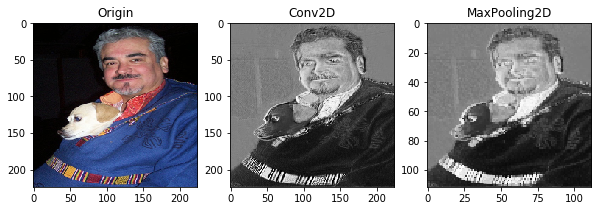

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torchvision.models as models
import torch
from JLib.pyn.layers import Conv2D, MaxPooling
from JLib.pyn.functions import preprocess_image

plt.figure(figsize=(10,10), facecolor='w')
imagePath = "data/ConvVisible01.jpg"

img = cv2.imread(imagePath)
basicImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
originImg = cv2.resize(basicImage, (224, 224))
plt.subplot(1, 3, 1)
plt.title('Origin')
plt.imshow(originImg)

convImage = np.expand_dims(originImg, axis=0)
conv = Conv2D(convImage.shape, 12, 3, 1, 'SAME')
convImage = conv.forward(convImage) # 这里使用的是初始化权重，还没有进行过迭代
feature = convImage[:, :, :, 0]
feature = np.reshape(feature, newshape=(feature.shape[1], convImage.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1, 3, 2)
plt.title('Conv2D')
plt.imshow(feature, cmap='gray')

pool1 = MaxPooling(convImage.shape, ksize=2, stride=2)
pool_img = pool1.forward(convImage)
feature = pool_img[:, :, :,0]
feature = np.reshape(feature, newshape=(feature.shape[1], feature.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1,3,3)
plt.title('MaxPooling2D')
plt.imshow(feature, cmap='gray')

# 5.最大池化层之梯度计算

# 6.最大池化层之反向算法

# 7.平均池化层之前向算法

In [ ]:
import numpy as np
x = None # picture
stride = 2
ksize = 2
output_channels = 64
out = np.zeros([x.shape[0], int(x.shape[1] / stride), int(x.shape[2] / stride), output_channels])

for b in range(x.shape[0]):
    for c in range(output_channels):
        for i in range(0, x.shape[1], stride):
            for j in range(0, x.shape[2], stride):
                out[b, int(i / stride), int(j / stride), c] = np.mean(
                    x[b, i:i + ksize, j:j + ksize, c])
                index = np.argmax(x[b, i:i + ksize, j:j + ksize, c])
                index[b, i + int(index / stride), j + index % stride, c] = 1

我们可以很明显的看到，跟最大池化的区别就是一个是求max，一个是求mean

# 8.平均池化层之梯度计算

# 9.平均池化层之反向算法

| 最大池化 | 平均池化 |
| ------- | ------- |
|![images](Images/05_03_006.png) | ![images](Images/05_03_007.png) |

# 10.全局平均池化Global Average Pool

In [2]:
import torch
import torch.nn.functional

a = torch.rand([4,3,4,4])
a.size()

torch.Size([4, 3, 4, 4])

In [3]:
b = torch.nn.functional.adaptive_avg_pool2d(a, [1,1])
b.size()

torch.Size([4, 3, 1, 1])